# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Unnamed: 0  Crime Against Category  \
0           1                       2   
1           2                       2   
2           3                       2   
3           5                       2   
4           6                       2   

                                       Offense  Sector  Beat  MCPP  Time  Day  \
0  Theft of Motor Vehicle Parts or Accessories      11    22    50   661    0   
1                                      Robbery      22    50    50  1753    6   
2     Destruction/Damage/Vandalism of Property      18    39    33   124    2   
3                                  Shoplifting      14    29    16  2005    1   
4     Destruction/Damage/Vandalism of Property      11    22    44  1753    1   

   Year  
0     0  
1     0  
2     0  
3     0  
4     0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210259 entries, 0 to 210258
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              210259 non-null  int64 
 1   Crime Against Category  210259 non-null  int64 
 2   Offense                 210259 non-null  object
 3   Sector                  210259 non-null  int64 
 4   Beat                    210259 non-null  int64 
 5   MCPP                    210259 non-null  int64 
 6   Time                    210259 non-null  int64 
 7   Day                     210259 non-null  int64 
 8   Year                    210259 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 14.4+ MB


## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [5]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [7]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

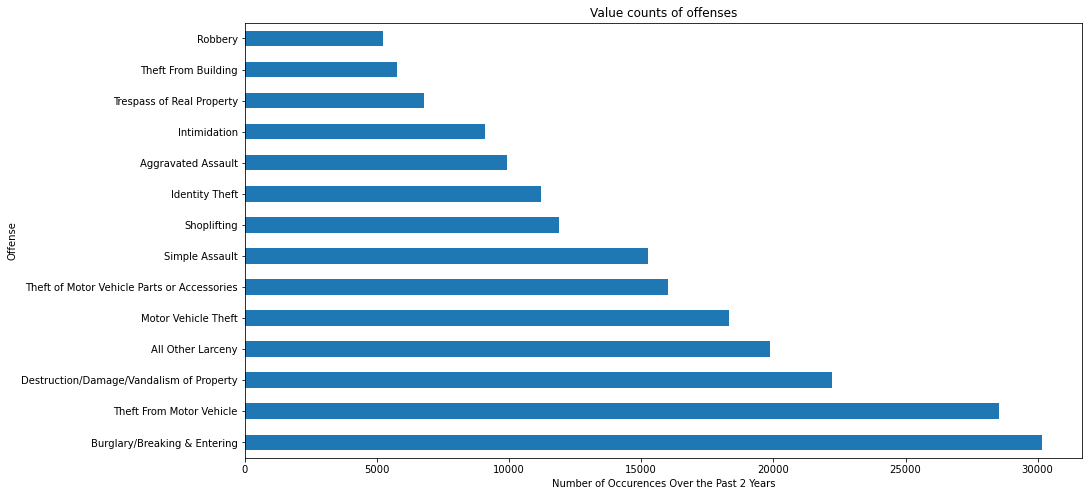

In [8]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [9]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [10]:
#rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

#rf.fit(X_train, y_train)
#rf_train_pred = rf.predict(X_train)
#rf_test_pred = rf.predict(X_test)

In [11]:
#print(classification_report(y_train, rf_train_pred))

In [12]:
#print(classification_report(y_test, rf_test_pred))

In [13]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

#cm = confusion_matrix(y_test, rf_test_pred);
#cmp = ConfusionMatrixDisplay(cm);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 615 crimes were correctly predicted as being "aggravated assault" crimes
* 1,225 crimes were wrongly predicted as not being "aggravated assault" crimes
* 1,030 crimes were wrongly predicted as being "aggravated assault" crimes
* 28,976 crimes were correctly predicted as not being "aggravated assault" crimes

**1) All Other Larceny**

* 578 crimes were correctly predicted as being "all other larceny" crimes
* 2,834 crimes were wrongly predicted as not being "all other larceny" crimes
* 2,389 crimes were wrongly precicted as being "all other larceny" crimes
* 26,045 crimes were correctly predicted as not being "all other larceny" crimes

**2) Burglary/Breaking & Entering**

* 1799 crimes were correctly predicted as being "burglary/breaking & entering" crimes
* 3,096 crimes were wrongly predicted as not being "burglary/breaking & entering" crimes
* 4,414 crimes were wrongly predicted as being "burglary/breaking & entering" crimes
* 23,722 crimes were correctly predicted as not being "burglary/breaking & entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 283 crimes were correctly predicted as being "destruction/damage/vandalism of property" crimes
* 3,579 crimes were wrongly predicted as not being "destruction/damage/vandalism of property" crimes
* 891 crimes were wrongly predicted as being "destruction/damage/vandalism of property" crimes
* 28,942 crimes were correctly predicted as not being "destruction/damage/vandalism of property" crimes

**4) Intimidation**

* 846 crimes were correctly predicted as being "intimidation" crimes
* 713 crimes were wrongly predicted as not being "intimidation" crimes
* 1,748 crimes were wrongly predicted as being "intimidation" crimes
* 29, 559 crimes were correctly predicted as not being "intimidation" crimes

**5) Motor Vehicle Theft**

* 796 crimes were correctly predicted as being "motor vehicle theft" crimes
* 2,548 crimes were wrongly predicted as not being "motor vehicle theft" crimes
* 3,583 crimes were wrongly predicted as being "motor vehicle theft" crimes
* 27,841 crimes were correctly predicted as not being "motor vehicle theft" crimes

**6) Shoplifting**

* 1559 crimes were correctly predicted as being "shoplifting" crimes
* 424 crimes were wrongly predicted as not being "shoplifting" crimes
* 7,522 crimes were wrongly predicted as being "shoplifting" crimes
* 27,652 crimes were correctly predicted as not being "shoplifting" crimes

**7) Simple Assault**

* 853 crimes were correctly predicted as being "simple assault" crimes
* 1,758 crimes were wrongly predicted as not being "simple assault" crimes
* 918 crimes were wrongly predicted as being "simple assault" crimes
* 30,993 crimes were correctly predicted as not being "simple assault" crimes

**8) Theft From Motor Vehicle**

* 244 crimes were correctly predicted as being "theft from motor vehicle" crimes
* 4,651 crimes were wrongly predicted as not being "theft from motor vehicle" crimes
* 549 crimes were wrongly predicted as being "theft from motor vehicle" crimes
* 31,282 crimes were correctly predicted as not being "theft from motor vehicle" crimes

**9)  Theft of Motor Vehicle Parts or Accessories**

* 244 crimes were correctly predicted as being "theft of motor vehicle parts or accessories" crimes
* 3,021 crimes were wrongly predicted as not being "theft of motor vehicle parts or accessories" crimes
* 985 crimes were wrongly predicted as not being "theft of motor vehicle parts or accessories" crimes
* 26,966 crimes were correctly predicted as not being "theft of motor vehicle parts or accessories" crimes

### Crime Classification Report ###

## Random Forest Tuning ##

In [14]:
#rf2 = RandomForestClassifier()

#param_grid = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [1, 2, 3, 4, 5],
   # 'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
   # 'min_samples_leaf': [0.1, 0.2, 0.3]
#}


#gs_rf = GridSearchCV(rf2, param_grid)
#gs_rf.fit(X_train, y_train)
#gs_rf.best_params_

In [15]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [16]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [17]:
#rf3 = RandomForestClassifier()

#param_grid2 = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [2, 3, 4],
    #'min_samples_split': [0.24, 0.25, 0.26],
   # 'min_samples_leaf': [0.1, 0.12, 0.13]
#}


#gs_rf2 = GridSearchCV(rf2, param_grid)
#gs_rf2.fit(X_train, y_train)
#gs_rf2.best_params_

In [18]:
#rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

#rf4.fit(X_train, y_train)
#rf_train_pred2 = rf4.predict(X_train)
#rf_test_pred2 = rf4.predict(X_test)

In [19]:
#cm2 = confusion_matrix(y_test, rf_test_pred2);
#cmp2 = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp2.plot(ax=ax);
#cmp2.ax_.set_title("Confusion Matrix");

In [20]:
#print(classification_report(y_train, rf_train_pred2))

In [21]:
#print(classification_report(y_test, rf_test_pred2))

In [22]:
#print ("My program took", time.time() - start_time, "to run")

## CatBoost Model ##

In [23]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    learning_rate=0.1
)

In [24]:
CBC.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

0:	learn: 2.3994295	test: 2.4682992	best: 2.4682992 (0)	total: 337ms	remaining: 5m 37s
1:	learn: 2.2879165	test: 2.3794276	best: 2.3794276 (1)	total: 532ms	remaining: 4m 25s
2:	learn: 2.2036095	test: 2.3098249	best: 2.3098249 (2)	total: 726ms	remaining: 4m 1s
3:	learn: 2.1389138	test: 2.2564134	best: 2.2564134 (3)	total: 930ms	remaining: 3m 51s
4:	learn: 2.0842228	test: 2.2093797	best: 2.2093797 (4)	total: 1.13s	remaining: 3m 44s
5:	learn: 2.0402753	test: 2.1718327	best: 2.1718327 (5)	total: 1.33s	remaining: 3m 40s
6:	learn: 2.0037238	test: 2.1404802	best: 2.1404802 (6)	total: 1.52s	remaining: 3m 36s
7:	learn: 1.9707708	test: 2.1120014	best: 2.1120014 (7)	total: 1.72s	remaining: 3m 33s
8:	learn: 1.9418242	test: 2.0866473	best: 2.0866473 (8)	total: 1.92s	remaining: 3m 31s
9:	learn: 1.9156965	test: 2.0640726	best: 2.0640726 (9)	total: 2.12s	remaining: 3m 30s
10:	learn: 1.8932480	test: 2.0440606	best: 2.0440606 (10)	total: 2.32s	remaining: 3m 28s
11:	learn: 1.8730486	test: 2.0261911	best:

94:	learn: 1.6206994	test: 1.8094899	best: 1.8094899 (94)	total: 18.8s	remaining: 2m 59s
95:	learn: 1.6202735	test: 1.8092816	best: 1.8092816 (95)	total: 19s	remaining: 2m 59s
96:	learn: 1.6193632	test: 1.8086262	best: 1.8086262 (96)	total: 19.2s	remaining: 2m 58s
97:	learn: 1.6185271	test: 1.8080298	best: 1.8080298 (97)	total: 19.4s	remaining: 2m 58s
98:	learn: 1.6177927	test: 1.8075223	best: 1.8075223 (98)	total: 19.6s	remaining: 2m 58s
99:	learn: 1.6170154	test: 1.8069774	best: 1.8069774 (99)	total: 19.8s	remaining: 2m 58s
100:	learn: 1.6163725	test: 1.8065068	best: 1.8065068 (100)	total: 20s	remaining: 2m 57s
101:	learn: 1.6155998	test: 1.8060246	best: 1.8060246 (101)	total: 20.2s	remaining: 2m 57s
102:	learn: 1.6151480	test: 1.8056055	best: 1.8056055 (102)	total: 20.4s	remaining: 2m 57s
103:	learn: 1.6139066	test: 1.8045581	best: 1.8045581 (103)	total: 20.6s	remaining: 2m 57s
104:	learn: 1.6131784	test: 1.8040377	best: 1.8040377 (104)	total: 20.8s	remaining: 2m 57s
105:	learn: 1.6

185:	learn: 1.5661103	test: 1.7687271	best: 1.7687271 (185)	total: 36.8s	remaining: 2m 40s
186:	learn: 1.5655119	test: 1.7680701	best: 1.7680701 (186)	total: 37s	remaining: 2m 40s
187:	learn: 1.5648423	test: 1.7675882	best: 1.7675882 (187)	total: 37.2s	remaining: 2m 40s
188:	learn: 1.5643907	test: 1.7672197	best: 1.7672197 (188)	total: 37.4s	remaining: 2m 40s
189:	learn: 1.5641064	test: 1.7669487	best: 1.7669487 (189)	total: 37.6s	remaining: 2m 40s
190:	learn: 1.5638272	test: 1.7667172	best: 1.7667172 (190)	total: 37.8s	remaining: 2m 39s
191:	learn: 1.5633010	test: 1.7663730	best: 1.7663730 (191)	total: 38s	remaining: 2m 39s
192:	learn: 1.5630343	test: 1.7661565	best: 1.7661565 (192)	total: 38.2s	remaining: 2m 39s
193:	learn: 1.5626668	test: 1.7659100	best: 1.7659100 (193)	total: 38.4s	remaining: 2m 39s
194:	learn: 1.5622171	test: 1.7655680	best: 1.7655680 (194)	total: 38.6s	remaining: 2m 39s
195:	learn: 1.5616601	test: 1.7651518	best: 1.7651518 (195)	total: 38.7s	remaining: 2m 38s
196

276:	learn: 1.5301190	test: 1.7444768	best: 1.7444768 (276)	total: 54.7s	remaining: 2m 22s
277:	learn: 1.5297409	test: 1.7441973	best: 1.7441973 (277)	total: 54.9s	remaining: 2m 22s
278:	learn: 1.5292494	test: 1.7439456	best: 1.7439456 (278)	total: 55.1s	remaining: 2m 22s
279:	learn: 1.5288863	test: 1.7438944	best: 1.7438944 (279)	total: 55.3s	remaining: 2m 22s
280:	learn: 1.5286538	test: 1.7438072	best: 1.7438072 (280)	total: 55.5s	remaining: 2m 21s
281:	learn: 1.5282577	test: 1.7435454	best: 1.7435454 (281)	total: 55.6s	remaining: 2m 21s
282:	learn: 1.5278979	test: 1.7433621	best: 1.7433621 (282)	total: 55.8s	remaining: 2m 21s
283:	learn: 1.5275377	test: 1.7431778	best: 1.7431778 (283)	total: 56s	remaining: 2m 21s
284:	learn: 1.5272382	test: 1.7430980	best: 1.7430980 (284)	total: 56.2s	remaining: 2m 21s
285:	learn: 1.5269105	test: 1.7429699	best: 1.7429699 (285)	total: 56.4s	remaining: 2m 20s
286:	learn: 1.5266114	test: 1.7428271	best: 1.7428271 (286)	total: 56.6s	remaining: 2m 20s
2

368:	learn: 1.5038245	test: 1.7301401	best: 1.7301401 (368)	total: 1m 12s	remaining: 2m 4s
369:	learn: 1.5035478	test: 1.7300158	best: 1.7300158 (369)	total: 1m 12s	remaining: 2m 4s
370:	learn: 1.5033011	test: 1.7298902	best: 1.7298902 (370)	total: 1m 13s	remaining: 2m 4s
371:	learn: 1.5030524	test: 1.7297905	best: 1.7297905 (371)	total: 1m 13s	remaining: 2m 3s
372:	learn: 1.5028686	test: 1.7296795	best: 1.7296795 (372)	total: 1m 13s	remaining: 2m 3s
373:	learn: 1.5025346	test: 1.7295249	best: 1.7295249 (373)	total: 1m 13s	remaining: 2m 3s
374:	learn: 1.5023481	test: 1.7293937	best: 1.7293937 (374)	total: 1m 14s	remaining: 2m 3s
375:	learn: 1.5020641	test: 1.7293107	best: 1.7293107 (375)	total: 1m 14s	remaining: 2m 3s
376:	learn: 1.5019264	test: 1.7292696	best: 1.7292696 (376)	total: 1m 14s	remaining: 2m 2s
377:	learn: 1.5016060	test: 1.7288756	best: 1.7288756 (377)	total: 1m 14s	remaining: 2m 2s
378:	learn: 1.5012866	test: 1.7286445	best: 1.7286445 (378)	total: 1m 14s	remaining: 2m 2s

458:	learn: 1.4839776	test: 1.7200345	best: 1.7200345 (458)	total: 1m 30s	remaining: 1m 46s
459:	learn: 1.4837934	test: 1.7200551	best: 1.7200345 (458)	total: 1m 30s	remaining: 1m 46s
460:	learn: 1.4834952	test: 1.7200428	best: 1.7200345 (458)	total: 1m 30s	remaining: 1m 46s
461:	learn: 1.4832657	test: 1.7198636	best: 1.7198636 (461)	total: 1m 31s	remaining: 1m 46s
462:	learn: 1.4831460	test: 1.7198513	best: 1.7198513 (462)	total: 1m 31s	remaining: 1m 45s
463:	learn: 1.4829774	test: 1.7197265	best: 1.7197265 (463)	total: 1m 31s	remaining: 1m 45s
464:	learn: 1.4827581	test: 1.7196538	best: 1.7196538 (464)	total: 1m 31s	remaining: 1m 45s
465:	learn: 1.4826283	test: 1.7196426	best: 1.7196426 (465)	total: 1m 31s	remaining: 1m 45s
466:	learn: 1.4823643	test: 1.7194166	best: 1.7194166 (466)	total: 1m 32s	remaining: 1m 45s
467:	learn: 1.4821906	test: 1.7193205	best: 1.7193205 (467)	total: 1m 32s	remaining: 1m 44s
468:	learn: 1.4819584	test: 1.7193009	best: 1.7193009 (468)	total: 1m 32s	remain

548:	learn: 1.4673348	test: 1.7135249	best: 1.7135249 (548)	total: 1m 48s	remaining: 1m 28s
549:	learn: 1.4670738	test: 1.7134737	best: 1.7134737 (549)	total: 1m 48s	remaining: 1m 28s
550:	learn: 1.4669612	test: 1.7134703	best: 1.7134703 (550)	total: 1m 48s	remaining: 1m 28s
551:	learn: 1.4667869	test: 1.7134261	best: 1.7134261 (551)	total: 1m 48s	remaining: 1m 28s
552:	learn: 1.4665768	test: 1.7133486	best: 1.7133486 (552)	total: 1m 49s	remaining: 1m 28s
553:	learn: 1.4664920	test: 1.7132906	best: 1.7132906 (553)	total: 1m 49s	remaining: 1m 27s
554:	learn: 1.4663774	test: 1.7132618	best: 1.7132618 (554)	total: 1m 49s	remaining: 1m 27s
555:	learn: 1.4661828	test: 1.7132810	best: 1.7132618 (554)	total: 1m 49s	remaining: 1m 27s
556:	learn: 1.4659881	test: 1.7131544	best: 1.7131544 (556)	total: 1m 49s	remaining: 1m 27s
557:	learn: 1.4658336	test: 1.7130438	best: 1.7130438 (557)	total: 1m 49s	remaining: 1m 27s
558:	learn: 1.4656600	test: 1.7129845	best: 1.7129845 (558)	total: 1m 50s	remain

638:	learn: 1.4525029	test: 1.7093134	best: 1.7093134 (638)	total: 2m 6s	remaining: 1m 11s
639:	learn: 1.4524015	test: 1.7092993	best: 1.7092993 (639)	total: 2m 6s	remaining: 1m 11s
640:	learn: 1.4522650	test: 1.7092534	best: 1.7092534 (640)	total: 2m 6s	remaining: 1m 10s
641:	learn: 1.4521194	test: 1.7092590	best: 1.7092534 (640)	total: 2m 6s	remaining: 1m 10s
642:	learn: 1.4520225	test: 1.7092335	best: 1.7092335 (642)	total: 2m 7s	remaining: 1m 10s
643:	learn: 1.4518920	test: 1.7091797	best: 1.7091797 (643)	total: 2m 7s	remaining: 1m 10s
644:	learn: 1.4517043	test: 1.7090628	best: 1.7090628 (644)	total: 2m 7s	remaining: 1m 10s
645:	learn: 1.4516158	test: 1.7090522	best: 1.7090522 (645)	total: 2m 7s	remaining: 1m 9s
646:	learn: 1.4515214	test: 1.7090515	best: 1.7090515 (646)	total: 2m 7s	remaining: 1m 9s
647:	learn: 1.4512700	test: 1.7090490	best: 1.7090490 (647)	total: 2m 8s	remaining: 1m 9s
648:	learn: 1.4511875	test: 1.7090340	best: 1.7090340 (648)	total: 2m 8s	remaining: 1m 9s
649

729:	learn: 1.4393373	test: 1.7060991	best: 1.7059478 (724)	total: 2m 24s	remaining: 53.4s
730:	learn: 1.4392732	test: 1.7061155	best: 1.7059478 (724)	total: 2m 24s	remaining: 53.2s
731:	learn: 1.4391423	test: 1.7060678	best: 1.7059478 (724)	total: 2m 24s	remaining: 53s
732:	learn: 1.4390478	test: 1.7060328	best: 1.7059478 (724)	total: 2m 24s	remaining: 52.8s
733:	learn: 1.4389269	test: 1.7060081	best: 1.7059478 (724)	total: 2m 25s	remaining: 52.6s
734:	learn: 1.4387437	test: 1.7060501	best: 1.7059478 (724)	total: 2m 25s	remaining: 52.4s
735:	learn: 1.4385153	test: 1.7060379	best: 1.7059478 (724)	total: 2m 25s	remaining: 52.2s
736:	learn: 1.4383690	test: 1.7059683	best: 1.7059478 (724)	total: 2m 25s	remaining: 52s
737:	learn: 1.4382613	test: 1.7058865	best: 1.7058865 (737)	total: 2m 25s	remaining: 51.8s
738:	learn: 1.4381203	test: 1.7058054	best: 1.7058054 (738)	total: 2m 26s	remaining: 51.6s
739:	learn: 1.4379642	test: 1.7057407	best: 1.7057407 (739)	total: 2m 26s	remaining: 51.4s
740

821:	learn: 1.4274025	test: 1.7033085	best: 1.7032644 (817)	total: 2m 42s	remaining: 35.2s
822:	learn: 1.4271615	test: 1.7032807	best: 1.7032644 (817)	total: 2m 42s	remaining: 35s
823:	learn: 1.4269626	test: 1.7031305	best: 1.7031305 (823)	total: 2m 42s	remaining: 34.8s
824:	learn: 1.4268314	test: 1.7030987	best: 1.7030987 (824)	total: 2m 43s	remaining: 34.6s
825:	learn: 1.4266182	test: 1.7029644	best: 1.7029644 (825)	total: 2m 43s	remaining: 34.4s
826:	learn: 1.4265290	test: 1.7029351	best: 1.7029351 (826)	total: 2m 43s	remaining: 34.2s
827:	learn: 1.4264123	test: 1.7029231	best: 1.7029231 (827)	total: 2m 43s	remaining: 34s
828:	learn: 1.4263110	test: 1.7028681	best: 1.7028681 (828)	total: 2m 43s	remaining: 33.8s
829:	learn: 1.4262070	test: 1.7028252	best: 1.7028252 (829)	total: 2m 44s	remaining: 33.6s
830:	learn: 1.4260989	test: 1.7027698	best: 1.7027698 (830)	total: 2m 44s	remaining: 33.4s
831:	learn: 1.4260081	test: 1.7027579	best: 1.7027579 (831)	total: 2m 44s	remaining: 33.2s
832

912:	learn: 1.4162331	test: 1.7013825	best: 1.7013284 (911)	total: 3m	remaining: 17.2s
913:	learn: 1.4161154	test: 1.7013786	best: 1.7013284 (911)	total: 3m	remaining: 17s
914:	learn: 1.4160040	test: 1.7013515	best: 1.7013284 (911)	total: 3m	remaining: 16.8s
915:	learn: 1.4159526	test: 1.7013373	best: 1.7013284 (911)	total: 3m	remaining: 16.6s
916:	learn: 1.4157863	test: 1.7012552	best: 1.7012552 (916)	total: 3m 1s	remaining: 16.4s
917:	learn: 1.4156981	test: 1.7012629	best: 1.7012552 (916)	total: 3m 1s	remaining: 16.2s
918:	learn: 1.4156206	test: 1.7012489	best: 1.7012489 (918)	total: 3m 1s	remaining: 16s
919:	learn: 1.4154867	test: 1.7012536	best: 1.7012489 (918)	total: 3m 1s	remaining: 15.8s
920:	learn: 1.4153929	test: 1.7012606	best: 1.7012489 (918)	total: 3m 1s	remaining: 15.6s
921:	learn: 1.4153098	test: 1.7012165	best: 1.7012165 (921)	total: 3m 2s	remaining: 15.4s
922:	learn: 1.4151548	test: 1.7011319	best: 1.7011319 (922)	total: 3m 2s	remaining: 15.2s
923:	learn: 1.4150396	test

In [25]:
 y_pred = CBC.predict(X_test)
print('Accuracy',accuracy_score(y_test, y_pred))
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)


Accuracy 0.34382193474745554


In [26]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.52      0.53     22703
                          All Other Larceny       0.27      0.15      0.20     22703
               Burglary/Breaking & Entering       0.34      0.43      0.38     22703
   Destruction/Damage/Vandalism of Property       0.29      0.14      0.19     22703
                             Identity Theft       0.74      0.81      0.77     22703
                               Intimidation       0.55      0.59      0.57     22703
                        Motor Vehicle Theft       0.32      0.31      0.32     22703
                                    Robbery       0.44      0.50      0.47     22703
                                Shoplifting       0.45      0.67      0.54     22703
                             Simple Assault       0.53      0.51      0.52     22703
                        Theft From Building       0.41      0.47

In [27]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.21      0.13      0.16      4879
               Burglary/Breaking & Entering       0.34      0.40      0.37      7460
   Destruction/Damage/Vandalism of Property       0.23      0.12      0.16      5540
                             Identity Theft       0.64      0.77      0.70      2921
                               Intimidation       0.36      0.34      0.35      2250
                        Motor Vehicle Theft       0.25      0.32      0.28      4563
                                    Robbery       0.13      0.10      0.11      1319
                                Shoplifting       0.33      0.63      0.44      2975
                             Simple Assault       0.47      0.55      0.51      3790
                        Theft From Building       0.09      0.09

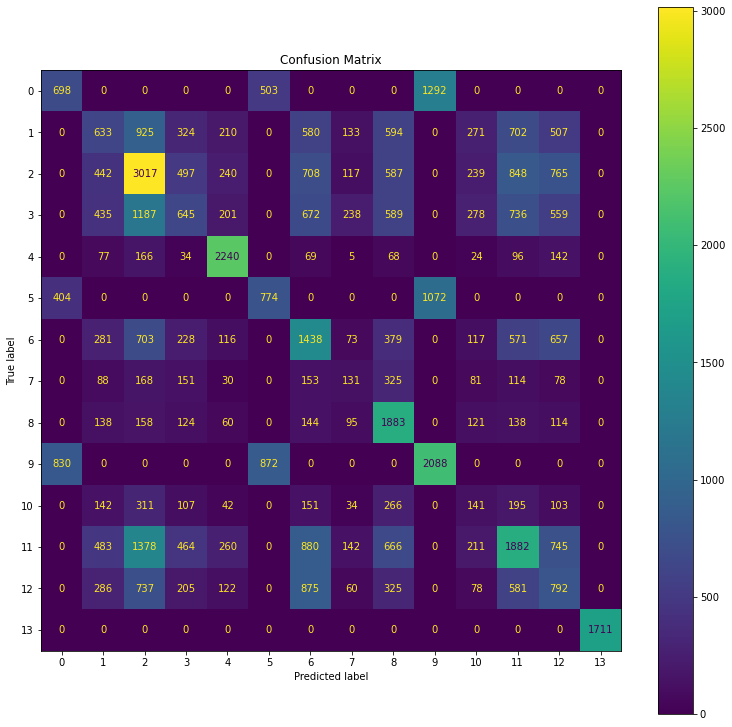

In [28]:
cm = confusion_matrix(y_test, y_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

In [29]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [30]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train)
CBC_gs.best_params_

0:	learn: 2.5419905	total: 72.9ms	remaining: 7.21s
1:	learn: 2.4762771	total: 146ms	remaining: 7.16s
2:	learn: 2.4237491	total: 218ms	remaining: 7.05s
3:	learn: 2.3795732	total: 289ms	remaining: 6.95s
4:	learn: 2.3413865	total: 364ms	remaining: 6.91s
5:	learn: 2.3077863	total: 437ms	remaining: 6.84s
6:	learn: 2.2778492	total: 509ms	remaining: 6.77s
7:	learn: 2.2509248	total: 585ms	remaining: 6.73s
8:	learn: 2.2265328	total: 658ms	remaining: 6.65s
9:	learn: 2.2043058	total: 732ms	remaining: 6.58s
10:	learn: 2.1839546	total: 806ms	remaining: 6.52s
11:	learn: 2.1652467	total: 878ms	remaining: 6.44s
12:	learn: 2.1479914	total: 953ms	remaining: 6.38s
13:	learn: 2.1252934	total: 1.04s	remaining: 6.37s
14:	learn: 2.1101739	total: 1.11s	remaining: 6.31s
15:	learn: 2.0961338	total: 1.19s	remaining: 6.24s
16:	learn: 2.0838991	total: 1.26s	remaining: 6.18s
17:	learn: 2.0673980	total: 1.35s	remaining: 6.14s
18:	learn: 2.0528886	total: 1.43s	remaining: 6.09s
19:	learn: 2.0442229	total: 1.5s	remaini

63:	learn: 1.8302573	total: 4.74s	remaining: 2.67s
64:	learn: 1.8284214	total: 4.82s	remaining: 2.59s
65:	learn: 1.8253694	total: 4.89s	remaining: 2.52s
66:	learn: 1.8237746	total: 4.97s	remaining: 2.45s
67:	learn: 1.8211112	total: 5.04s	remaining: 2.37s
68:	learn: 1.8198741	total: 5.11s	remaining: 2.3s
69:	learn: 1.8186841	total: 5.19s	remaining: 2.23s
70:	learn: 1.8171837	total: 5.27s	remaining: 2.15s
71:	learn: 1.8158670	total: 5.34s	remaining: 2.08s
72:	learn: 1.8145326	total: 5.41s	remaining: 2s
73:	learn: 1.8130992	total: 5.49s	remaining: 1.93s
74:	learn: 1.8118957	total: 5.56s	remaining: 1.85s
75:	learn: 1.8105046	total: 5.63s	remaining: 1.78s
76:	learn: 1.8080691	total: 5.71s	remaining: 1.71s
77:	learn: 1.8065677	total: 5.79s	remaining: 1.63s
78:	learn: 1.8043366	total: 5.86s	remaining: 1.56s
79:	learn: 1.8029659	total: 5.94s	remaining: 1.49s
80:	learn: 1.8017300	total: 6.02s	remaining: 1.41s
81:	learn: 1.8005989	total: 6.09s	remaining: 1.34s
82:	learn: 1.7983909	total: 6.17s	r

27:	learn: 1.9725346	total: 2.06s	remaining: 5.3s
28:	learn: 1.9647661	total: 2.14s	remaining: 5.23s
29:	learn: 1.9586431	total: 2.21s	remaining: 5.16s
30:	learn: 1.9541706	total: 2.28s	remaining: 5.08s
31:	learn: 1.9490849	total: 2.36s	remaining: 5.01s
32:	learn: 1.9419377	total: 2.43s	remaining: 4.93s
33:	learn: 1.9352078	total: 2.5s	remaining: 4.86s
34:	learn: 1.9288387	total: 2.58s	remaining: 4.79s
35:	learn: 1.9254477	total: 2.65s	remaining: 4.71s
36:	learn: 1.9194858	total: 2.72s	remaining: 4.63s
37:	learn: 1.9134560	total: 2.79s	remaining: 4.56s
38:	learn: 1.9095006	total: 2.87s	remaining: 4.48s
39:	learn: 1.9041165	total: 2.94s	remaining: 4.41s
40:	learn: 1.9012591	total: 3.01s	remaining: 4.33s
41:	learn: 1.8959963	total: 3.08s	remaining: 4.25s
42:	learn: 1.8927550	total: 3.15s	remaining: 4.18s
43:	learn: 1.8893108	total: 3.23s	remaining: 4.11s
44:	learn: 1.8861790	total: 3.3s	remaining: 4.04s
45:	learn: 1.8814268	total: 3.38s	remaining: 3.96s
46:	learn: 1.8791606	total: 3.45s	

90:	learn: 1.7874319	total: 6.76s	remaining: 669ms
91:	learn: 1.7864973	total: 6.83s	remaining: 594ms
92:	learn: 1.7855938	total: 6.91s	remaining: 520ms
93:	learn: 1.7847636	total: 6.98s	remaining: 445ms
94:	learn: 1.7839044	total: 7.05s	remaining: 371ms
95:	learn: 1.7828542	total: 7.13s	remaining: 297ms
96:	learn: 1.7822439	total: 7.2s	remaining: 223ms
97:	learn: 1.7804111	total: 7.28s	remaining: 149ms
98:	learn: 1.7798198	total: 7.35s	remaining: 74.3ms
99:	learn: 1.7789532	total: 7.42s	remaining: 0us
0:	learn: 2.4519228	total: 80.8ms	remaining: 8s
1:	learn: 2.3598816	total: 154ms	remaining: 7.55s
2:	learn: 2.2913345	total: 229ms	remaining: 7.39s
3:	learn: 2.2369306	total: 302ms	remaining: 7.25s
4:	learn: 2.1922573	total: 376ms	remaining: 7.15s
5:	learn: 2.1547818	total: 447ms	remaining: 7s
6:	learn: 2.1096249	total: 522ms	remaining: 6.93s
7:	learn: 2.0810384	total: 595ms	remaining: 6.84s
8:	learn: 2.0610386	total: 665ms	remaining: 6.72s
9:	learn: 2.0339150	total: 741ms	remaining: 6.6

54:	learn: 1.7652051	total: 4.08s	remaining: 3.34s
55:	learn: 1.7636349	total: 4.16s	remaining: 3.27s
56:	learn: 1.7624975	total: 4.23s	remaining: 3.19s
57:	learn: 1.7597105	total: 4.3s	remaining: 3.12s
58:	learn: 1.7583817	total: 4.38s	remaining: 3.04s
59:	learn: 1.7571494	total: 4.45s	remaining: 2.97s
60:	learn: 1.7561120	total: 4.53s	remaining: 2.9s
61:	learn: 1.7550224	total: 4.61s	remaining: 2.83s
62:	learn: 1.7535543	total: 4.68s	remaining: 2.75s
63:	learn: 1.7523811	total: 4.76s	remaining: 2.68s
64:	learn: 1.7512572	total: 4.83s	remaining: 2.6s
65:	learn: 1.7500789	total: 4.91s	remaining: 2.53s
66:	learn: 1.7488186	total: 4.98s	remaining: 2.45s
67:	learn: 1.7464908	total: 5.05s	remaining: 2.38s
68:	learn: 1.7457393	total: 5.13s	remaining: 2.3s
69:	learn: 1.7445844	total: 5.21s	remaining: 2.23s
70:	learn: 1.7438749	total: 5.28s	remaining: 2.16s
71:	learn: 1.7426163	total: 5.35s	remaining: 2.08s
72:	learn: 1.7418033	total: 5.42s	remaining: 2s
73:	learn: 1.7409005	total: 5.5s	remai

18:	learn: 1.9064374	total: 1.4s	remaining: 5.95s
19:	learn: 1.9003108	total: 1.47s	remaining: 5.87s
20:	learn: 1.8902486	total: 1.54s	remaining: 5.78s
21:	learn: 1.8806488	total: 1.61s	remaining: 5.7s
22:	learn: 1.8751574	total: 1.68s	remaining: 5.63s
23:	learn: 1.8705048	total: 1.75s	remaining: 5.55s
24:	learn: 1.8613739	total: 1.83s	remaining: 5.49s
25:	learn: 1.8533547	total: 1.91s	remaining: 5.43s
26:	learn: 1.8493173	total: 1.98s	remaining: 5.34s
27:	learn: 1.8452470	total: 2.05s	remaining: 5.27s
28:	learn: 1.8386294	total: 2.13s	remaining: 5.2s
29:	learn: 1.8346026	total: 2.2s	remaining: 5.13s
30:	learn: 1.8309692	total: 2.27s	remaining: 5.05s
31:	learn: 1.8275465	total: 2.35s	remaining: 4.98s
32:	learn: 1.8246360	total: 2.42s	remaining: 4.91s
33:	learn: 1.8221362	total: 2.49s	remaining: 4.84s
34:	learn: 1.8167910	total: 2.57s	remaining: 4.77s
35:	learn: 1.8137733	total: 2.65s	remaining: 4.7s
36:	learn: 1.8110526	total: 2.72s	remaining: 4.64s
37:	learn: 1.8061039	total: 2.8s	rem

81:	learn: 1.7352997	total: 6.06s	remaining: 1.33s
82:	learn: 1.7344170	total: 6.13s	remaining: 1.26s
83:	learn: 1.7334406	total: 6.21s	remaining: 1.18s
84:	learn: 1.7324309	total: 6.29s	remaining: 1.11s
85:	learn: 1.7318510	total: 6.36s	remaining: 1.03s
86:	learn: 1.7309758	total: 6.43s	remaining: 961ms
87:	learn: 1.7298600	total: 6.51s	remaining: 887ms
88:	learn: 1.7289056	total: 6.58s	remaining: 814ms
89:	learn: 1.7283871	total: 6.66s	remaining: 740ms
90:	learn: 1.7278366	total: 6.73s	remaining: 666ms
91:	learn: 1.7272552	total: 6.8s	remaining: 592ms
92:	learn: 1.7265151	total: 6.88s	remaining: 518ms
93:	learn: 1.7258266	total: 6.96s	remaining: 444ms
94:	learn: 1.7246685	total: 7.04s	remaining: 371ms
95:	learn: 1.7228301	total: 7.11s	remaining: 296ms
96:	learn: 1.7221540	total: 7.18s	remaining: 222ms
97:	learn: 1.7213413	total: 7.26s	remaining: 148ms
98:	learn: 1.7209677	total: 7.33s	remaining: 74.1ms
99:	learn: 1.7204735	total: 7.4s	remaining: 0us
0:	learn: 2.0757014	total: 72.2ms	

46:	learn: 1.6492756	total: 3.5s	remaining: 3.95s
47:	learn: 1.6480593	total: 3.58s	remaining: 3.87s
48:	learn: 1.6470255	total: 3.65s	remaining: 3.8s
49:	learn: 1.6455572	total: 3.73s	remaining: 3.73s
50:	learn: 1.6444124	total: 3.8s	remaining: 3.65s
51:	learn: 1.6432855	total: 3.88s	remaining: 3.58s
52:	learn: 1.6418961	total: 3.96s	remaining: 3.51s
53:	learn: 1.6408064	total: 4.03s	remaining: 3.44s
54:	learn: 1.6403319	total: 4.11s	remaining: 3.36s
55:	learn: 1.6397177	total: 4.18s	remaining: 3.28s
56:	learn: 1.6386257	total: 4.25s	remaining: 3.21s
57:	learn: 1.6371215	total: 4.33s	remaining: 3.13s
58:	learn: 1.6358551	total: 4.41s	remaining: 3.06s
59:	learn: 1.6350133	total: 4.49s	remaining: 2.99s
60:	learn: 1.6340615	total: 4.57s	remaining: 2.92s
61:	learn: 1.6334540	total: 4.65s	remaining: 2.85s
62:	learn: 1.6327912	total: 4.72s	remaining: 2.77s
63:	learn: 1.6301815	total: 4.79s	remaining: 2.69s
64:	learn: 1.6292991	total: 4.86s	remaining: 2.62s
65:	learn: 1.6287680	total: 4.93s	

9:	learn: 1.7454238	total: 760ms	remaining: 6.84s
10:	learn: 1.7410309	total: 837ms	remaining: 6.77s
11:	learn: 1.7378454	total: 908ms	remaining: 6.66s
12:	learn: 1.7331919	total: 980ms	remaining: 6.56s
13:	learn: 1.7310912	total: 1.05s	remaining: 6.46s
14:	learn: 1.7280418	total: 1.13s	remaining: 6.4s
15:	learn: 1.7252020	total: 1.21s	remaining: 6.33s
16:	learn: 1.7215864	total: 1.29s	remaining: 6.29s
17:	learn: 1.7171449	total: 1.36s	remaining: 6.21s
18:	learn: 1.7132794	total: 1.44s	remaining: 6.16s
19:	learn: 1.7111867	total: 1.52s	remaining: 6.09s
20:	learn: 1.7084456	total: 1.6s	remaining: 6.01s
21:	learn: 1.7063293	total: 1.67s	remaining: 5.92s
22:	learn: 1.7033019	total: 1.74s	remaining: 5.83s
23:	learn: 1.6987400	total: 1.82s	remaining: 5.75s
24:	learn: 1.6956918	total: 1.89s	remaining: 5.67s
25:	learn: 1.6946336	total: 1.96s	remaining: 5.59s
26:	learn: 1.6896534	total: 2.04s	remaining: 5.5s
27:	learn: 1.6884230	total: 2.11s	remaining: 5.42s
28:	learn: 1.6853232	total: 2.18s	r

72:	learn: 1.6072375	total: 5.49s	remaining: 2.03s
73:	learn: 1.6058259	total: 5.57s	remaining: 1.96s
74:	learn: 1.6040254	total: 5.65s	remaining: 1.88s
75:	learn: 1.6023440	total: 5.73s	remaining: 1.81s
76:	learn: 1.6017429	total: 5.81s	remaining: 1.73s
77:	learn: 1.5999763	total: 5.88s	remaining: 1.66s
78:	learn: 1.5993210	total: 5.96s	remaining: 1.58s
79:	learn: 1.5988775	total: 6.03s	remaining: 1.51s
80:	learn: 1.5984943	total: 6.11s	remaining: 1.43s
81:	learn: 1.5980986	total: 6.18s	remaining: 1.36s
82:	learn: 1.5960646	total: 6.26s	remaining: 1.28s
83:	learn: 1.5944814	total: 6.34s	remaining: 1.21s
84:	learn: 1.5932977	total: 6.42s	remaining: 1.13s
85:	learn: 1.5929867	total: 6.48s	remaining: 1.05s
86:	learn: 1.5906189	total: 6.56s	remaining: 981ms
87:	learn: 1.5898902	total: 6.64s	remaining: 906ms
88:	learn: 1.5893222	total: 6.71s	remaining: 829ms
89:	learn: 1.5884667	total: 6.79s	remaining: 755ms
90:	learn: 1.5882110	total: 6.86s	remaining: 679ms
91:	learn: 1.5870262	total: 6.9

135:	learn: 1.7487539	total: 10.2s	remaining: 27.2s
136:	learn: 1.7481358	total: 10.3s	remaining: 27.2s
137:	learn: 1.7468447	total: 10.3s	remaining: 27.1s
138:	learn: 1.7462898	total: 10.4s	remaining: 27s
139:	learn: 1.7457279	total: 10.5s	remaining: 27s
140:	learn: 1.7452195	total: 10.6s	remaining: 26.9s
141:	learn: 1.7446139	total: 10.6s	remaining: 26.8s
142:	learn: 1.7443273	total: 10.7s	remaining: 26.8s
143:	learn: 1.7439640	total: 10.8s	remaining: 26.7s
144:	learn: 1.7435607	total: 10.9s	remaining: 26.6s
145:	learn: 1.7423595	total: 10.9s	remaining: 26.5s
146:	learn: 1.7419007	total: 11s	remaining: 26.4s
147:	learn: 1.7414607	total: 11.1s	remaining: 26.4s
148:	learn: 1.7410304	total: 11.2s	remaining: 26.3s
149:	learn: 1.7404815	total: 11.2s	remaining: 26.2s
150:	learn: 1.7397806	total: 11.3s	remaining: 26.2s
151:	learn: 1.7392292	total: 11.4s	remaining: 26.1s
152:	learn: 1.7386959	total: 11.5s	remaining: 26s
153:	learn: 1.7383016	total: 11.5s	remaining: 25.9s
154:	learn: 1.737236

294:	learn: 1.6865648	total: 22.1s	remaining: 15.4s
295:	learn: 1.6862687	total: 22.2s	remaining: 15.3s
296:	learn: 1.6860129	total: 22.3s	remaining: 15.2s
297:	learn: 1.6857403	total: 22.3s	remaining: 15.1s
298:	learn: 1.6854844	total: 22.4s	remaining: 15.1s
299:	learn: 1.6853672	total: 22.5s	remaining: 15s
300:	learn: 1.6851390	total: 22.6s	remaining: 14.9s
301:	learn: 1.6849025	total: 22.6s	remaining: 14.8s
302:	learn: 1.6846212	total: 22.7s	remaining: 14.8s
303:	learn: 1.6844523	total: 22.8s	remaining: 14.7s
304:	learn: 1.6842435	total: 22.9s	remaining: 14.6s
305:	learn: 1.6841343	total: 22.9s	remaining: 14.5s
306:	learn: 1.6833419	total: 23s	remaining: 14.5s
307:	learn: 1.6831032	total: 23.1s	remaining: 14.4s
308:	learn: 1.6829269	total: 23.1s	remaining: 14.3s
309:	learn: 1.6826808	total: 23.2s	remaining: 14.2s
310:	learn: 1.6820022	total: 23.3s	remaining: 14.2s
311:	learn: 1.6815075	total: 23.4s	remaining: 14.1s
312:	learn: 1.6812788	total: 23.5s	remaining: 14s
313:	learn: 1.6809

453:	learn: 1.6498159	total: 34.1s	remaining: 3.45s
454:	learn: 1.6496838	total: 34.2s	remaining: 3.38s
455:	learn: 1.6491988	total: 34.2s	remaining: 3.3s
456:	learn: 1.6491274	total: 34.3s	remaining: 3.23s
457:	learn: 1.6488517	total: 34.4s	remaining: 3.15s
458:	learn: 1.6487313	total: 34.5s	remaining: 3.08s
459:	learn: 1.6486335	total: 34.5s	remaining: 3s
460:	learn: 1.6483859	total: 34.6s	remaining: 2.93s
461:	learn: 1.6482431	total: 34.7s	remaining: 2.85s
462:	learn: 1.6481330	total: 34.8s	remaining: 2.78s
463:	learn: 1.6479856	total: 34.9s	remaining: 2.7s
464:	learn: 1.6477912	total: 34.9s	remaining: 2.63s
465:	learn: 1.6476424	total: 35s	remaining: 2.55s
466:	learn: 1.6474199	total: 35.1s	remaining: 2.48s
467:	learn: 1.6472329	total: 35.2s	remaining: 2.4s
468:	learn: 1.6470919	total: 35.2s	remaining: 2.33s
469:	learn: 1.6466338	total: 35.3s	remaining: 2.25s
470:	learn: 1.6464705	total: 35.4s	remaining: 2.18s
471:	learn: 1.6463967	total: 35.5s	remaining: 2.1s
472:	learn: 1.6462934

114:	learn: 1.7634587	total: 8.62s	remaining: 28.9s
115:	learn: 1.7628024	total: 8.7s	remaining: 28.8s
116:	learn: 1.7622782	total: 8.77s	remaining: 28.7s
117:	learn: 1.7617458	total: 8.84s	remaining: 28.6s
118:	learn: 1.7609322	total: 8.92s	remaining: 28.6s
119:	learn: 1.7602834	total: 9s	remaining: 28.5s
120:	learn: 1.7595987	total: 9.08s	remaining: 28.4s
121:	learn: 1.7582101	total: 9.15s	remaining: 28.4s
122:	learn: 1.7575866	total: 9.23s	remaining: 28.3s
123:	learn: 1.7562554	total: 9.3s	remaining: 28.2s
124:	learn: 1.7555185	total: 9.38s	remaining: 28.1s
125:	learn: 1.7548552	total: 9.45s	remaining: 28.1s
126:	learn: 1.7544718	total: 9.52s	remaining: 28s
127:	learn: 1.7538685	total: 9.6s	remaining: 27.9s
128:	learn: 1.7534478	total: 9.67s	remaining: 27.8s
129:	learn: 1.7529364	total: 9.75s	remaining: 27.7s
130:	learn: 1.7522923	total: 9.82s	remaining: 27.7s
131:	learn: 1.7518748	total: 9.89s	remaining: 27.6s
132:	learn: 1.7512884	total: 9.96s	remaining: 27.5s
133:	learn: 1.750100

273:	learn: 1.6951403	total: 20.5s	remaining: 16.9s
274:	learn: 1.6948530	total: 20.6s	remaining: 16.8s
275:	learn: 1.6946946	total: 20.7s	remaining: 16.8s
276:	learn: 1.6945360	total: 20.7s	remaining: 16.7s
277:	learn: 1.6943941	total: 20.8s	remaining: 16.6s
278:	learn: 1.6941247	total: 20.9s	remaining: 16.5s
279:	learn: 1.6938211	total: 20.9s	remaining: 16.5s
280:	learn: 1.6935267	total: 21s	remaining: 16.4s
281:	learn: 1.6933466	total: 21.1s	remaining: 16.3s
282:	learn: 1.6932186	total: 21.2s	remaining: 16.2s
283:	learn: 1.6929707	total: 21.3s	remaining: 16.2s
284:	learn: 1.6928348	total: 21.3s	remaining: 16.1s
285:	learn: 1.6926912	total: 21.4s	remaining: 16s
286:	learn: 1.6924279	total: 21.5s	remaining: 15.9s
287:	learn: 1.6921629	total: 21.5s	remaining: 15.9s
288:	learn: 1.6919981	total: 21.6s	remaining: 15.8s
289:	learn: 1.6918891	total: 21.7s	remaining: 15.7s
290:	learn: 1.6916836	total: 21.8s	remaining: 15.6s
291:	learn: 1.6914768	total: 21.8s	remaining: 15.6s
292:	learn: 1.69

432:	learn: 1.6615981	total: 32.4s	remaining: 5.01s
433:	learn: 1.6613763	total: 32.5s	remaining: 4.94s
434:	learn: 1.6612433	total: 32.6s	remaining: 4.86s
435:	learn: 1.6610218	total: 32.6s	remaining: 4.79s
436:	learn: 1.6608991	total: 32.7s	remaining: 4.71s
437:	learn: 1.6607251	total: 32.8s	remaining: 4.64s
438:	learn: 1.6604744	total: 32.9s	remaining: 4.57s
439:	learn: 1.6603503	total: 33s	remaining: 4.49s
440:	learn: 1.6602265	total: 33s	remaining: 4.42s
441:	learn: 1.6600893	total: 33.1s	remaining: 4.34s
442:	learn: 1.6599262	total: 33.2s	remaining: 4.27s
443:	learn: 1.6598054	total: 33.3s	remaining: 4.2s
444:	learn: 1.6596961	total: 33.3s	remaining: 4.12s
445:	learn: 1.6595476	total: 33.4s	remaining: 4.05s
446:	learn: 1.6594757	total: 33.5s	remaining: 3.97s
447:	learn: 1.6592764	total: 33.6s	remaining: 3.9s
448:	learn: 1.6591290	total: 33.7s	remaining: 3.82s
449:	learn: 1.6589267	total: 33.7s	remaining: 3.75s
450:	learn: 1.6588447	total: 33.8s	remaining: 3.67s
451:	learn: 1.6584

94:	learn: 1.7838588	total: 7.03s	remaining: 30s
95:	learn: 1.7828348	total: 7.11s	remaining: 29.9s
96:	learn: 1.7809631	total: 7.18s	remaining: 29.8s
97:	learn: 1.7803154	total: 7.25s	remaining: 29.7s
98:	learn: 1.7793536	total: 7.33s	remaining: 29.7s
99:	learn: 1.7785978	total: 7.4s	remaining: 29.6s
100:	learn: 1.7777993	total: 7.48s	remaining: 29.5s
101:	learn: 1.7768408	total: 7.56s	remaining: 29.5s
102:	learn: 1.7760780	total: 7.63s	remaining: 29.4s
103:	learn: 1.7752158	total: 7.71s	remaining: 29.4s
104:	learn: 1.7744960	total: 7.79s	remaining: 29.3s
105:	learn: 1.7734761	total: 7.87s	remaining: 29.2s
106:	learn: 1.7718133	total: 7.94s	remaining: 29.2s
107:	learn: 1.7711327	total: 8.01s	remaining: 29.1s
108:	learn: 1.7695792	total: 8.09s	remaining: 29s
109:	learn: 1.7688338	total: 8.17s	remaining: 29s
110:	learn: 1.7682146	total: 8.24s	remaining: 28.9s
111:	learn: 1.7676256	total: 8.31s	remaining: 28.8s
112:	learn: 1.7667706	total: 8.38s	remaining: 28.7s
113:	learn: 1.7652665	tot

254:	learn: 1.7026488	total: 19s	remaining: 18.3s
255:	learn: 1.7023567	total: 19.1s	remaining: 18.2s
256:	learn: 1.7020550	total: 19.2s	remaining: 18.1s
257:	learn: 1.7018272	total: 19.2s	remaining: 18.1s
258:	learn: 1.7016419	total: 19.3s	remaining: 18s
259:	learn: 1.7013721	total: 19.4s	remaining: 17.9s
260:	learn: 1.7007547	total: 19.5s	remaining: 17.8s
261:	learn: 1.7005463	total: 19.5s	remaining: 17.7s
262:	learn: 1.7003176	total: 19.6s	remaining: 17.7s
263:	learn: 1.7001963	total: 19.7s	remaining: 17.6s
264:	learn: 1.7000036	total: 19.8s	remaining: 17.5s
265:	learn: 1.6997829	total: 19.8s	remaining: 17.4s
266:	learn: 1.6995606	total: 19.9s	remaining: 17.4s
267:	learn: 1.6993620	total: 20s	remaining: 17.3s
268:	learn: 1.6992438	total: 20.1s	remaining: 17.2s
269:	learn: 1.6989681	total: 20.1s	remaining: 17.1s
270:	learn: 1.6987660	total: 20.2s	remaining: 17.1s
271:	learn: 1.6985138	total: 20.3s	remaining: 17s
272:	learn: 1.6983879	total: 20.3s	remaining: 16.9s
273:	learn: 1.698207

415:	learn: 1.6676144	total: 31.1s	remaining: 6.28s
416:	learn: 1.6674865	total: 31.2s	remaining: 6.21s
417:	learn: 1.6674252	total: 31.2s	remaining: 6.13s
418:	learn: 1.6670427	total: 31.3s	remaining: 6.05s
419:	learn: 1.6669364	total: 31.4s	remaining: 5.98s
420:	learn: 1.6667684	total: 31.5s	remaining: 5.91s
421:	learn: 1.6666871	total: 31.5s	remaining: 5.83s
422:	learn: 1.6665365	total: 31.6s	remaining: 5.76s
423:	learn: 1.6664639	total: 31.7s	remaining: 5.68s
424:	learn: 1.6663102	total: 31.8s	remaining: 5.61s
425:	learn: 1.6662038	total: 31.8s	remaining: 5.53s
426:	learn: 1.6660651	total: 31.9s	remaining: 5.46s
427:	learn: 1.6659398	total: 32s	remaining: 5.38s
428:	learn: 1.6657047	total: 32.1s	remaining: 5.31s
429:	learn: 1.6655885	total: 32.1s	remaining: 5.23s
430:	learn: 1.6651434	total: 32.2s	remaining: 5.16s
431:	learn: 1.6649948	total: 32.3s	remaining: 5.08s
432:	learn: 1.6648804	total: 32.4s	remaining: 5.01s
433:	learn: 1.6646704	total: 32.4s	remaining: 4.93s
434:	learn: 1.

75:	learn: 1.8095005	total: 5.62s	remaining: 31.4s
76:	learn: 1.8081083	total: 5.7s	remaining: 31.3s
77:	learn: 1.8069084	total: 5.77s	remaining: 31.2s
78:	learn: 1.8046141	total: 5.84s	remaining: 31.1s
79:	learn: 1.8032500	total: 5.92s	remaining: 31.1s
80:	learn: 1.8020221	total: 5.99s	remaining: 31s
81:	learn: 1.8009161	total: 6.06s	remaining: 30.9s
82:	learn: 1.7986296	total: 6.14s	remaining: 30.8s
83:	learn: 1.7975551	total: 6.21s	remaining: 30.8s
84:	learn: 1.7966730	total: 6.29s	remaining: 30.7s
85:	learn: 1.7946716	total: 6.36s	remaining: 30.6s
86:	learn: 1.7936871	total: 6.43s	remaining: 30.5s
87:	learn: 1.7927640	total: 6.5s	remaining: 30.5s
88:	learn: 1.7919835	total: 6.58s	remaining: 30.4s
89:	learn: 1.7910834	total: 6.65s	remaining: 30.3s
90:	learn: 1.7902441	total: 6.72s	remaining: 30.2s
91:	learn: 1.7881940	total: 6.8s	remaining: 30.2s
92:	learn: 1.7872917	total: 6.87s	remaining: 30.1s
93:	learn: 1.7864227	total: 6.95s	remaining: 30s
94:	learn: 1.7853154	total: 7.03s	rema

237:	learn: 1.7059608	total: 17.8s	remaining: 19.6s
238:	learn: 1.7056493	total: 17.8s	remaining: 19.5s
239:	learn: 1.7052923	total: 17.9s	remaining: 19.4s
240:	learn: 1.7050510	total: 18s	remaining: 19.3s
241:	learn: 1.7045033	total: 18.1s	remaining: 19.3s
242:	learn: 1.7043724	total: 18.1s	remaining: 19.2s
243:	learn: 1.7042396	total: 18.2s	remaining: 19.1s
244:	learn: 1.7039445	total: 18.3s	remaining: 19s
245:	learn: 1.7035758	total: 18.4s	remaining: 19s
246:	learn: 1.7032603	total: 18.5s	remaining: 18.9s
247:	learn: 1.7031142	total: 18.5s	remaining: 18.8s
248:	learn: 1.7028804	total: 18.6s	remaining: 18.7s
249:	learn: 1.7026024	total: 18.7s	remaining: 18.7s
250:	learn: 1.7024474	total: 18.7s	remaining: 18.6s
251:	learn: 1.7021553	total: 18.8s	remaining: 18.5s
252:	learn: 1.7017470	total: 18.9s	remaining: 18.4s
253:	learn: 1.7015546	total: 19s	remaining: 18.4s
254:	learn: 1.7014007	total: 19s	remaining: 18.3s
255:	learn: 1.7012804	total: 19.1s	remaining: 18.2s
256:	learn: 1.7009586	

396:	learn: 1.6699218	total: 29.6s	remaining: 7.69s
397:	learn: 1.6697737	total: 29.7s	remaining: 7.61s
398:	learn: 1.6695973	total: 29.8s	remaining: 7.54s
399:	learn: 1.6693512	total: 29.9s	remaining: 7.47s
400:	learn: 1.6691951	total: 29.9s	remaining: 7.39s
401:	learn: 1.6687228	total: 30s	remaining: 7.32s
402:	learn: 1.6685808	total: 30.1s	remaining: 7.24s
403:	learn: 1.6683476	total: 30.2s	remaining: 7.17s
404:	learn: 1.6681936	total: 30.2s	remaining: 7.09s
405:	learn: 1.6680263	total: 30.3s	remaining: 7.02s
406:	learn: 1.6678436	total: 30.4s	remaining: 6.95s
407:	learn: 1.6676840	total: 30.5s	remaining: 6.87s
408:	learn: 1.6674266	total: 30.6s	remaining: 6.8s
409:	learn: 1.6669425	total: 30.6s	remaining: 6.72s
410:	learn: 1.6667277	total: 30.7s	remaining: 6.65s
411:	learn: 1.6666186	total: 30.8s	remaining: 6.57s
412:	learn: 1.6665356	total: 30.8s	remaining: 6.5s
413:	learn: 1.6664183	total: 30.9s	remaining: 6.42s
414:	learn: 1.6661853	total: 31s	remaining: 6.35s
415:	learn: 1.6659

57:	learn: 1.8437552	total: 4.3s	remaining: 32.7s
58:	learn: 1.8415285	total: 4.37s	remaining: 32.7s
59:	learn: 1.8381529	total: 4.45s	remaining: 32.6s
60:	learn: 1.8366117	total: 4.53s	remaining: 32.6s
61:	learn: 1.8351249	total: 4.6s	remaining: 32.5s
62:	learn: 1.8335780	total: 4.68s	remaining: 32.4s
63:	learn: 1.8318839	total: 4.75s	remaining: 32.3s
64:	learn: 1.8301649	total: 4.83s	remaining: 32.3s
65:	learn: 1.8281528	total: 4.9s	remaining: 32.3s
66:	learn: 1.8252838	total: 4.98s	remaining: 32.2s
67:	learn: 1.8223808	total: 5.05s	remaining: 32.1s
68:	learn: 1.8211312	total: 5.12s	remaining: 32s
69:	learn: 1.8194950	total: 5.2s	remaining: 32s
70:	learn: 1.8179696	total: 5.28s	remaining: 31.9s
71:	learn: 1.8154541	total: 5.35s	remaining: 31.8s
72:	learn: 1.8141648	total: 5.43s	remaining: 31.7s
73:	learn: 1.8127633	total: 5.5s	remaining: 31.7s
74:	learn: 1.8112909	total: 5.58s	remaining: 31.6s
75:	learn: 1.8098638	total: 5.65s	remaining: 31.5s
76:	learn: 1.8084912	total: 5.72s	remain

219:	learn: 1.7113379	total: 16.4s	remaining: 20.9s
220:	learn: 1.7110581	total: 16.5s	remaining: 20.8s
221:	learn: 1.7108758	total: 16.6s	remaining: 20.8s
222:	learn: 1.7107155	total: 16.6s	remaining: 20.7s
223:	learn: 1.7104843	total: 16.7s	remaining: 20.6s
224:	learn: 1.7101518	total: 16.8s	remaining: 20.5s
225:	learn: 1.7098148	total: 16.9s	remaining: 20.4s
226:	learn: 1.7095708	total: 16.9s	remaining: 20.4s
227:	learn: 1.7088761	total: 17s	remaining: 20.3s
228:	learn: 1.7086173	total: 17.1s	remaining: 20.2s
229:	learn: 1.7083372	total: 17.2s	remaining: 20.1s
230:	learn: 1.7080521	total: 17.2s	remaining: 20.1s
231:	learn: 1.7078839	total: 17.3s	remaining: 20s
232:	learn: 1.7075612	total: 17.4s	remaining: 19.9s
233:	learn: 1.7071600	total: 17.5s	remaining: 19.8s
234:	learn: 1.7067835	total: 17.5s	remaining: 19.8s
235:	learn: 1.7066050	total: 17.6s	remaining: 19.7s
236:	learn: 1.7062458	total: 17.7s	remaining: 19.6s
237:	learn: 1.7060211	total: 17.8s	remaining: 19.5s
238:	learn: 1.70

378:	learn: 1.6712439	total: 28.3s	remaining: 9.04s
379:	learn: 1.6709317	total: 28.4s	remaining: 8.96s
380:	learn: 1.6707072	total: 28.5s	remaining: 8.89s
381:	learn: 1.6704744	total: 28.5s	remaining: 8.81s
382:	learn: 1.6703467	total: 28.6s	remaining: 8.74s
383:	learn: 1.6700999	total: 28.7s	remaining: 8.66s
384:	learn: 1.6699840	total: 28.7s	remaining: 8.58s
385:	learn: 1.6696974	total: 28.8s	remaining: 8.51s
386:	learn: 1.6695203	total: 28.9s	remaining: 8.44s
387:	learn: 1.6693319	total: 29s	remaining: 8.36s
388:	learn: 1.6691166	total: 29.1s	remaining: 8.29s
389:	learn: 1.6689218	total: 29.1s	remaining: 8.22s
390:	learn: 1.6686512	total: 29.2s	remaining: 8.14s
391:	learn: 1.6680448	total: 29.3s	remaining: 8.07s
392:	learn: 1.6677842	total: 29.4s	remaining: 7.99s
393:	learn: 1.6675912	total: 29.4s	remaining: 7.92s
394:	learn: 1.6674172	total: 29.5s	remaining: 7.85s
395:	learn: 1.6672515	total: 29.6s	remaining: 7.77s
396:	learn: 1.6671055	total: 29.7s	remaining: 7.7s
397:	learn: 1.6

39:	learn: 1.8002158	total: 2.93s	remaining: 33.7s
40:	learn: 1.7978041	total: 3s	remaining: 33.6s
41:	learn: 1.7932520	total: 3.07s	remaining: 33.5s
42:	learn: 1.7893597	total: 3.14s	remaining: 33.4s
43:	learn: 1.7870374	total: 3.22s	remaining: 33.4s
44:	learn: 1.7850516	total: 3.3s	remaining: 33.3s
45:	learn: 1.7834296	total: 3.37s	remaining: 33.3s
46:	learn: 1.7815828	total: 3.45s	remaining: 33.3s
47:	learn: 1.7803059	total: 3.53s	remaining: 33.2s
48:	learn: 1.7784964	total: 3.6s	remaining: 33.2s
49:	learn: 1.7768262	total: 3.68s	remaining: 33.1s
50:	learn: 1.7755870	total: 3.75s	remaining: 33s
51:	learn: 1.7741581	total: 3.83s	remaining: 33s
52:	learn: 1.7707486	total: 3.9s	remaining: 32.9s
53:	learn: 1.7676806	total: 3.98s	remaining: 32.8s
54:	learn: 1.7662373	total: 4.05s	remaining: 32.8s
55:	learn: 1.7645728	total: 4.13s	remaining: 32.7s
56:	learn: 1.7636840	total: 4.19s	remaining: 32.6s
57:	learn: 1.7609943	total: 4.26s	remaining: 32.5s
58:	learn: 1.7595687	total: 4.34s	remaini

201:	learn: 1.6569538	total: 15.1s	remaining: 22.2s
202:	learn: 1.6565555	total: 15.2s	remaining: 22.2s
203:	learn: 1.6561093	total: 15.2s	remaining: 22.1s
204:	learn: 1.6556693	total: 15.3s	remaining: 22s
205:	learn: 1.6552546	total: 15.4s	remaining: 22s
206:	learn: 1.6548921	total: 15.5s	remaining: 21.9s
207:	learn: 1.6541200	total: 15.5s	remaining: 21.8s
208:	learn: 1.6538673	total: 15.6s	remaining: 21.7s
209:	learn: 1.6535803	total: 15.7s	remaining: 21.6s
210:	learn: 1.6532807	total: 15.7s	remaining: 21.6s
211:	learn: 1.6525729	total: 15.8s	remaining: 21.5s
212:	learn: 1.6523294	total: 15.9s	remaining: 21.4s
213:	learn: 1.6517706	total: 16s	remaining: 21.4s
214:	learn: 1.6515393	total: 16.1s	remaining: 21.3s
215:	learn: 1.6513093	total: 16.1s	remaining: 21.2s
216:	learn: 1.6509846	total: 16.2s	remaining: 21.1s
217:	learn: 1.6504697	total: 16.3s	remaining: 21.1s
218:	learn: 1.6501740	total: 16.4s	remaining: 21s
219:	learn: 1.6498523	total: 16.4s	remaining: 20.9s
220:	learn: 1.649499

360:	learn: 1.6084330	total: 27s	remaining: 10.4s
361:	learn: 1.6081350	total: 27s	remaining: 10.3s
362:	learn: 1.6078209	total: 27.1s	remaining: 10.2s
363:	learn: 1.6074613	total: 27.2s	remaining: 10.2s
364:	learn: 1.6071120	total: 27.3s	remaining: 10.1s
365:	learn: 1.6069481	total: 27.4s	remaining: 10s
366:	learn: 1.6064957	total: 27.4s	remaining: 9.94s
367:	learn: 1.6062947	total: 27.5s	remaining: 9.87s
368:	learn: 1.6061832	total: 27.6s	remaining: 9.79s
369:	learn: 1.6059993	total: 27.7s	remaining: 9.71s
370:	learn: 1.6057522	total: 27.7s	remaining: 9.64s
371:	learn: 1.6054637	total: 27.8s	remaining: 9.57s
372:	learn: 1.6052689	total: 27.9s	remaining: 9.5s
373:	learn: 1.6044139	total: 28s	remaining: 9.42s
374:	learn: 1.6040915	total: 28s	remaining: 9.35s
375:	learn: 1.6038306	total: 28.1s	remaining: 9.27s
376:	learn: 1.6035489	total: 28.2s	remaining: 9.2s
377:	learn: 1.6034745	total: 28.3s	remaining: 9.12s
378:	learn: 1.6032305	total: 28.4s	remaining: 9.05s
379:	learn: 1.6030755	to

22:	learn: 1.8735154	total: 1.68s	remaining: 34.8s
23:	learn: 1.8683267	total: 1.75s	remaining: 34.7s
24:	learn: 1.8600799	total: 1.82s	remaining: 34.6s
25:	learn: 1.8519566	total: 1.9s	remaining: 34.6s
26:	learn: 1.8478824	total: 1.97s	remaining: 34.5s
27:	learn: 1.8437325	total: 2.04s	remaining: 34.4s
28:	learn: 1.8370739	total: 2.11s	remaining: 34.3s
29:	learn: 1.8330161	total: 2.19s	remaining: 34.3s
30:	learn: 1.8273895	total: 2.26s	remaining: 34.2s
31:	learn: 1.8240895	total: 2.33s	remaining: 34.1s
32:	learn: 1.8206343	total: 2.41s	remaining: 34.1s
33:	learn: 1.8177383	total: 2.48s	remaining: 34s
34:	learn: 1.8125265	total: 2.56s	remaining: 34s
35:	learn: 1.8093497	total: 2.63s	remaining: 33.9s
36:	learn: 1.8070087	total: 2.7s	remaining: 33.8s
37:	learn: 1.8039696	total: 2.78s	remaining: 33.8s
38:	learn: 1.8016357	total: 2.85s	remaining: 33.7s
39:	learn: 1.7994008	total: 2.92s	remaining: 33.6s
40:	learn: 1.7970294	total: 2.99s	remaining: 33.5s
41:	learn: 1.7928609	total: 3.07s	rem

183:	learn: 1.6744106	total: 13.7s	remaining: 23.5s
184:	learn: 1.6742206	total: 13.8s	remaining: 23.4s
185:	learn: 1.6738496	total: 13.8s	remaining: 23.3s
186:	learn: 1.6735342	total: 13.9s	remaining: 23.3s
187:	learn: 1.6727090	total: 14s	remaining: 23.2s
188:	learn: 1.6718401	total: 14.1s	remaining: 23.1s
189:	learn: 1.6714676	total: 14.1s	remaining: 23.1s
190:	learn: 1.6710702	total: 14.2s	remaining: 23s
191:	learn: 1.6705736	total: 14.3s	remaining: 22.9s
192:	learn: 1.6695438	total: 14.4s	remaining: 22.9s
193:	learn: 1.6690290	total: 14.5s	remaining: 22.8s
194:	learn: 1.6688244	total: 14.5s	remaining: 22.7s
195:	learn: 1.6684827	total: 14.6s	remaining: 22.7s
196:	learn: 1.6676462	total: 14.7s	remaining: 22.6s
197:	learn: 1.6672926	total: 14.8s	remaining: 22.5s
198:	learn: 1.6670267	total: 14.8s	remaining: 22.4s
199:	learn: 1.6666741	total: 14.9s	remaining: 22.4s
200:	learn: 1.6663668	total: 15s	remaining: 22.3s
201:	learn: 1.6660988	total: 15.1s	remaining: 22.2s
202:	learn: 1.6658

342:	learn: 1.6278293	total: 25.7s	remaining: 11.8s
343:	learn: 1.6275994	total: 25.8s	remaining: 11.7s
344:	learn: 1.6275013	total: 25.8s	remaining: 11.6s
345:	learn: 1.6272006	total: 25.9s	remaining: 11.5s
346:	learn: 1.6270031	total: 26s	remaining: 11.5s
347:	learn: 1.6268065	total: 26.1s	remaining: 11.4s
348:	learn: 1.6267377	total: 26.1s	remaining: 11.3s
349:	learn: 1.6266076	total: 26.2s	remaining: 11.2s
350:	learn: 1.6264772	total: 26.3s	remaining: 11.2s
351:	learn: 1.6262352	total: 26.4s	remaining: 11.1s
352:	learn: 1.6260559	total: 26.4s	remaining: 11s
353:	learn: 1.6258546	total: 26.5s	remaining: 10.9s
354:	learn: 1.6257937	total: 26.6s	remaining: 10.9s
355:	learn: 1.6252720	total: 26.7s	remaining: 10.8s
356:	learn: 1.6251832	total: 26.7s	remaining: 10.7s
357:	learn: 1.6246882	total: 26.8s	remaining: 10.6s
358:	learn: 1.6245409	total: 26.9s	remaining: 10.6s
359:	learn: 1.6241617	total: 27s	remaining: 10.5s
360:	learn: 1.6238983	total: 27s	remaining: 10.4s
361:	learn: 1.623764

3:	learn: 2.2369305	total: 296ms	remaining: 36.7s
4:	learn: 2.1922575	total: 373ms	remaining: 36.9s
5:	learn: 2.1547822	total: 445ms	remaining: 36.6s
6:	learn: 2.1100680	total: 520ms	remaining: 36.6s
7:	learn: 2.0814807	total: 592ms	remaining: 36.4s
8:	learn: 2.0614867	total: 663ms	remaining: 36.2s
9:	learn: 2.0378105	total: 737ms	remaining: 36.1s
10:	learn: 2.0137419	total: 814ms	remaining: 36.2s
11:	learn: 1.9949747	total: 887ms	remaining: 36.1s
12:	learn: 1.9802001	total: 964ms	remaining: 36.1s
13:	learn: 1.9629797	total: 1.04s	remaining: 36.1s
14:	learn: 1.9479099	total: 1.11s	remaining: 35.9s
15:	learn: 1.9392328	total: 1.18s	remaining: 35.8s
16:	learn: 1.9264121	total: 1.26s	remaining: 35.7s
17:	learn: 1.9184929	total: 1.33s	remaining: 35.6s
18:	learn: 1.9060282	total: 1.4s	remaining: 35.5s
19:	learn: 1.8999278	total: 1.48s	remaining: 35.5s
20:	learn: 1.8898634	total: 1.55s	remaining: 35.4s
21:	learn: 1.8838331	total: 1.62s	remaining: 35.3s
22:	learn: 1.8742565	total: 1.7s	remain

165:	learn: 1.6827601	total: 12.5s	remaining: 25.1s
166:	learn: 1.6825538	total: 12.5s	remaining: 25s
167:	learn: 1.6824094	total: 12.6s	remaining: 24.9s
168:	learn: 1.6820956	total: 12.7s	remaining: 24.8s
169:	learn: 1.6817025	total: 12.8s	remaining: 24.8s
170:	learn: 1.6811632	total: 12.8s	remaining: 24.7s
171:	learn: 1.6806259	total: 12.9s	remaining: 24.6s
172:	learn: 1.6803403	total: 13s	remaining: 24.5s
173:	learn: 1.6801531	total: 13.1s	remaining: 24.5s
174:	learn: 1.6795717	total: 13.1s	remaining: 24.4s
175:	learn: 1.6792073	total: 13.2s	remaining: 24.4s
176:	learn: 1.6786208	total: 13.3s	remaining: 24.3s
177:	learn: 1.6782576	total: 13.4s	remaining: 24.2s
178:	learn: 1.6780630	total: 13.5s	remaining: 24.1s
179:	learn: 1.6777149	total: 13.5s	remaining: 24s
180:	learn: 1.6772669	total: 13.6s	remaining: 24s
181:	learn: 1.6761630	total: 13.7s	remaining: 23.9s
182:	learn: 1.6751784	total: 13.8s	remaining: 23.8s
183:	learn: 1.6749379	total: 13.8s	remaining: 23.7s
184:	learn: 1.674014

324:	learn: 1.6327761	total: 24.4s	remaining: 13.2s
325:	learn: 1.6327328	total: 24.5s	remaining: 13.1s
326:	learn: 1.6326460	total: 24.6s	remaining: 13s
327:	learn: 1.6324289	total: 24.7s	remaining: 12.9s
328:	learn: 1.6322567	total: 24.8s	remaining: 12.9s
329:	learn: 1.6321196	total: 24.8s	remaining: 12.8s
330:	learn: 1.6319013	total: 24.9s	remaining: 12.7s
331:	learn: 1.6316368	total: 25s	remaining: 12.6s
332:	learn: 1.6313580	total: 25.1s	remaining: 12.6s
333:	learn: 1.6312203	total: 25.1s	remaining: 12.5s
334:	learn: 1.6307188	total: 25.2s	remaining: 12.4s
335:	learn: 1.6306154	total: 25.3s	remaining: 12.3s
336:	learn: 1.6304332	total: 25.4s	remaining: 12.3s
337:	learn: 1.6302062	total: 25.5s	remaining: 12.2s
338:	learn: 1.6300637	total: 25.5s	remaining: 12.1s
339:	learn: 1.6294947	total: 25.6s	remaining: 12s
340:	learn: 1.6294302	total: 25.7s	remaining: 12s
341:	learn: 1.6292240	total: 25.8s	remaining: 11.9s
342:	learn: 1.6291299	total: 25.8s	remaining: 11.8s
343:	learn: 1.628899

483:	learn: 1.6054839	total: 36.5s	remaining: 1.21s
484:	learn: 1.6053378	total: 36.6s	remaining: 1.13s
485:	learn: 1.6052586	total: 36.7s	remaining: 1.06s
486:	learn: 1.6051360	total: 36.8s	remaining: 981ms
487:	learn: 1.6050717	total: 36.8s	remaining: 906ms
488:	learn: 1.6049643	total: 36.9s	remaining: 830ms
489:	learn: 1.6048749	total: 37s	remaining: 755ms
490:	learn: 1.6047922	total: 37.1s	remaining: 680ms
491:	learn: 1.6046859	total: 37.1s	remaining: 604ms
492:	learn: 1.6046380	total: 37.2s	remaining: 529ms
493:	learn: 1.6044561	total: 37.3s	remaining: 453ms
494:	learn: 1.6043421	total: 37.4s	remaining: 378ms
495:	learn: 1.6041652	total: 37.5s	remaining: 302ms
496:	learn: 1.6039202	total: 37.5s	remaining: 227ms
497:	learn: 1.6038366	total: 37.6s	remaining: 151ms
498:	learn: 1.6038050	total: 37.7s	remaining: 75.5ms
499:	learn: 1.6036971	total: 37.7s	remaining: 0us
0:	learn: 2.4519246	total: 73.4ms	remaining: 36.6s
1:	learn: 2.3598844	total: 146ms	remaining: 36.3s
2:	learn: 2.291338

144:	learn: 1.6942502	total: 10.8s	remaining: 26.5s
145:	learn: 1.6937009	total: 10.9s	remaining: 26.5s
146:	learn: 1.6935057	total: 11s	remaining: 26.4s
147:	learn: 1.6930455	total: 11.1s	remaining: 26.3s
148:	learn: 1.6927342	total: 11.1s	remaining: 26.3s
149:	learn: 1.6924792	total: 11.2s	remaining: 26.2s
150:	learn: 1.6921838	total: 11.3s	remaining: 26.1s
151:	learn: 1.6918243	total: 11.4s	remaining: 26s
152:	learn: 1.6912949	total: 11.4s	remaining: 25.9s
153:	learn: 1.6908508	total: 11.5s	remaining: 25.9s
154:	learn: 1.6902301	total: 11.6s	remaining: 25.8s
155:	learn: 1.6896572	total: 11.7s	remaining: 25.7s
156:	learn: 1.6892551	total: 11.7s	remaining: 25.6s
157:	learn: 1.6881184	total: 11.8s	remaining: 25.6s
158:	learn: 1.6877286	total: 11.9s	remaining: 25.5s
159:	learn: 1.6872745	total: 12s	remaining: 25.4s
160:	learn: 1.6868719	total: 12s	remaining: 25.4s
161:	learn: 1.6863096	total: 12.1s	remaining: 25.3s
162:	learn: 1.6860042	total: 12.2s	remaining: 25.2s
163:	learn: 1.685556

303:	learn: 1.6361617	total: 22.8s	remaining: 14.7s
304:	learn: 1.6359421	total: 22.9s	remaining: 14.6s
305:	learn: 1.6357004	total: 23s	remaining: 14.6s
306:	learn: 1.6355734	total: 23s	remaining: 14.5s
307:	learn: 1.6352848	total: 23.1s	remaining: 14.4s
308:	learn: 1.6344774	total: 23.2s	remaining: 14.3s
309:	learn: 1.6341927	total: 23.3s	remaining: 14.3s
310:	learn: 1.6340661	total: 23.3s	remaining: 14.2s
311:	learn: 1.6338599	total: 23.4s	remaining: 14.1s
312:	learn: 1.6332306	total: 23.5s	remaining: 14s
313:	learn: 1.6330345	total: 23.6s	remaining: 14s
314:	learn: 1.6328584	total: 23.6s	remaining: 13.9s
315:	learn: 1.6325606	total: 23.7s	remaining: 13.8s
316:	learn: 1.6324853	total: 23.8s	remaining: 13.7s
317:	learn: 1.6323015	total: 23.9s	remaining: 13.7s
318:	learn: 1.6322085	total: 23.9s	remaining: 13.6s
319:	learn: 1.6320007	total: 24s	remaining: 13.5s
320:	learn: 1.6318905	total: 24.1s	remaining: 13.4s
321:	learn: 1.6313021	total: 24.1s	remaining: 13.3s
322:	learn: 1.6311740	

462:	learn: 1.6031840	total: 34.8s	remaining: 2.78s
463:	learn: 1.6031156	total: 34.9s	remaining: 2.7s
464:	learn: 1.6029858	total: 34.9s	remaining: 2.63s
465:	learn: 1.6028841	total: 35s	remaining: 2.55s
466:	learn: 1.6027918	total: 35.1s	remaining: 2.48s
467:	learn: 1.6025951	total: 35.2s	remaining: 2.4s
468:	learn: 1.6022532	total: 35.2s	remaining: 2.33s
469:	learn: 1.6020430	total: 35.3s	remaining: 2.25s
470:	learn: 1.6017869	total: 35.4s	remaining: 2.18s
471:	learn: 1.6016529	total: 35.5s	remaining: 2.1s
472:	learn: 1.6012829	total: 35.6s	remaining: 2.03s
473:	learn: 1.6011591	total: 35.6s	remaining: 1.95s
474:	learn: 1.6009307	total: 35.7s	remaining: 1.88s
475:	learn: 1.6007294	total: 35.8s	remaining: 1.8s
476:	learn: 1.6006525	total: 35.8s	remaining: 1.73s
477:	learn: 1.6004467	total: 35.9s	remaining: 1.65s
478:	learn: 1.6002574	total: 36s	remaining: 1.58s
479:	learn: 1.6002147	total: 36.1s	remaining: 1.5s
480:	learn: 1.6001398	total: 36.1s	remaining: 1.43s
481:	learn: 1.5999313

123:	learn: 1.7022324	total: 9.21s	remaining: 27.9s
124:	learn: 1.7018218	total: 9.28s	remaining: 27.9s
125:	learn: 1.7014135	total: 9.36s	remaining: 27.8s
126:	learn: 1.7011237	total: 9.43s	remaining: 27.7s
127:	learn: 1.7007668	total: 9.5s	remaining: 27.6s
128:	learn: 1.7005347	total: 9.57s	remaining: 27.5s
129:	learn: 1.6999056	total: 9.66s	remaining: 27.5s
130:	learn: 1.6994136	total: 9.74s	remaining: 27.4s
131:	learn: 1.6991223	total: 9.81s	remaining: 27.3s
132:	learn: 1.6985773	total: 9.88s	remaining: 27.3s
133:	learn: 1.6979023	total: 9.97s	remaining: 27.2s
134:	learn: 1.6975479	total: 10s	remaining: 27.1s
135:	learn: 1.6970792	total: 10.1s	remaining: 27.1s
136:	learn: 1.6967060	total: 10.2s	remaining: 27s
137:	learn: 1.6963673	total: 10.3s	remaining: 26.9s
138:	learn: 1.6957667	total: 10.3s	remaining: 26.9s
139:	learn: 1.6952293	total: 10.4s	remaining: 26.8s
140:	learn: 1.6949023	total: 10.5s	remaining: 26.7s
141:	learn: 1.6942596	total: 10.6s	remaining: 26.6s
142:	learn: 1.693

282:	learn: 1.6395372	total: 21.4s	remaining: 16.4s
283:	learn: 1.6389417	total: 21.4s	remaining: 16.3s
284:	learn: 1.6387508	total: 21.5s	remaining: 16.2s
285:	learn: 1.6385565	total: 21.6s	remaining: 16.1s
286:	learn: 1.6382394	total: 21.7s	remaining: 16.1s
287:	learn: 1.6380880	total: 21.7s	remaining: 16s
288:	learn: 1.6378811	total: 21.8s	remaining: 15.9s
289:	learn: 1.6375562	total: 21.9s	remaining: 15.8s
290:	learn: 1.6373507	total: 22s	remaining: 15.8s
291:	learn: 1.6370977	total: 22s	remaining: 15.7s
292:	learn: 1.6367515	total: 22.1s	remaining: 15.6s
293:	learn: 1.6364974	total: 22.2s	remaining: 15.6s
294:	learn: 1.6362364	total: 22.3s	remaining: 15.5s
295:	learn: 1.6360834	total: 22.4s	remaining: 15.4s
296:	learn: 1.6358783	total: 22.4s	remaining: 15.3s
297:	learn: 1.6356110	total: 22.5s	remaining: 15.3s
298:	learn: 1.6354071	total: 22.6s	remaining: 15.2s
299:	learn: 1.6352929	total: 22.7s	remaining: 15.1s
300:	learn: 1.6351348	total: 22.7s	remaining: 15s
301:	learn: 1.634442

442:	learn: 1.6017386	total: 33.5s	remaining: 4.32s
443:	learn: 1.6014969	total: 33.6s	remaining: 4.24s
444:	learn: 1.6014466	total: 33.7s	remaining: 4.16s
445:	learn: 1.6012965	total: 33.8s	remaining: 4.09s
446:	learn: 1.6012651	total: 33.8s	remaining: 4.01s
447:	learn: 1.6011258	total: 33.9s	remaining: 3.94s
448:	learn: 1.6009469	total: 34s	remaining: 3.86s
449:	learn: 1.6008633	total: 34.1s	remaining: 3.79s
450:	learn: 1.6007927	total: 34.1s	remaining: 3.71s
451:	learn: 1.6006672	total: 34.2s	remaining: 3.63s
452:	learn: 1.6005075	total: 34.3s	remaining: 3.56s
453:	learn: 1.6004747	total: 34.4s	remaining: 3.48s
454:	learn: 1.6002828	total: 34.4s	remaining: 3.4s
455:	learn: 1.5999341	total: 34.5s	remaining: 3.33s
456:	learn: 1.5998110	total: 34.6s	remaining: 3.25s
457:	learn: 1.5997016	total: 34.7s	remaining: 3.18s
458:	learn: 1.5995477	total: 34.7s	remaining: 3.1s
459:	learn: 1.5994387	total: 34.8s	remaining: 3.02s
460:	learn: 1.5991098	total: 34.9s	remaining: 2.95s
461:	learn: 1.59

105:	learn: 1.5639692	total: 7.91s	remaining: 29.4s
106:	learn: 1.5634403	total: 7.99s	remaining: 29.3s
107:	learn: 1.5628043	total: 8.07s	remaining: 29.3s
108:	learn: 1.5624511	total: 8.13s	remaining: 29.2s
109:	learn: 1.5614439	total: 8.21s	remaining: 29.1s
110:	learn: 1.5611918	total: 8.28s	remaining: 29s
111:	learn: 1.5608037	total: 8.36s	remaining: 29s
112:	learn: 1.5592548	total: 8.44s	remaining: 28.9s
113:	learn: 1.5589830	total: 8.51s	remaining: 28.8s
114:	learn: 1.5588304	total: 8.57s	remaining: 28.7s
115:	learn: 1.5579680	total: 8.65s	remaining: 28.6s
116:	learn: 1.5570159	total: 8.72s	remaining: 28.6s
117:	learn: 1.5563085	total: 8.79s	remaining: 28.5s
118:	learn: 1.5553838	total: 8.87s	remaining: 28.4s
119:	learn: 1.5549167	total: 8.94s	remaining: 28.3s
120:	learn: 1.5546203	total: 9.02s	remaining: 28.2s
121:	learn: 1.5540431	total: 9.09s	remaining: 28.2s
122:	learn: 1.5536835	total: 9.16s	remaining: 28.1s
123:	learn: 1.5533231	total: 9.23s	remaining: 28s
124:	learn: 1.5530

264:	learn: 1.4920175	total: 19.8s	remaining: 17.6s
265:	learn: 1.4918255	total: 19.9s	remaining: 17.5s
266:	learn: 1.4915251	total: 19.9s	remaining: 17.4s
267:	learn: 1.4913500	total: 20s	remaining: 17.3s
268:	learn: 1.4912575	total: 20.1s	remaining: 17.3s
269:	learn: 1.4911422	total: 20.2s	remaining: 17.2s
270:	learn: 1.4909770	total: 20.2s	remaining: 17.1s
271:	learn: 1.4907618	total: 20.3s	remaining: 17s
272:	learn: 1.4906222	total: 20.4s	remaining: 17s
273:	learn: 1.4905033	total: 20.5s	remaining: 16.9s
274:	learn: 1.4904066	total: 20.5s	remaining: 16.8s
275:	learn: 1.4897210	total: 20.6s	remaining: 16.7s
276:	learn: 1.4893280	total: 20.7s	remaining: 16.7s
277:	learn: 1.4891418	total: 20.8s	remaining: 16.6s
278:	learn: 1.4886641	total: 20.9s	remaining: 16.5s
279:	learn: 1.4884836	total: 20.9s	remaining: 16.4s
280:	learn: 1.4882910	total: 21s	remaining: 16.4s
281:	learn: 1.4879590	total: 21.1s	remaining: 16.3s
282:	learn: 1.4878950	total: 21.1s	remaining: 16.2s
283:	learn: 1.487849

424:	learn: 1.4652804	total: 31.6s	remaining: 5.57s
425:	learn: 1.4650829	total: 31.6s	remaining: 5.5s
426:	learn: 1.4650016	total: 31.7s	remaining: 5.42s
427:	learn: 1.4649670	total: 31.8s	remaining: 5.35s
428:	learn: 1.4647297	total: 31.9s	remaining: 5.27s
429:	learn: 1.4646077	total: 31.9s	remaining: 5.2s
430:	learn: 1.4645436	total: 32s	remaining: 5.13s
431:	learn: 1.4642533	total: 32.1s	remaining: 5.05s
432:	learn: 1.4641525	total: 32.2s	remaining: 4.98s
433:	learn: 1.4639402	total: 32.3s	remaining: 4.9s
434:	learn: 1.4637366	total: 32.3s	remaining: 4.83s
435:	learn: 1.4636980	total: 32.4s	remaining: 4.76s
436:	learn: 1.4635688	total: 32.5s	remaining: 4.68s
437:	learn: 1.4635117	total: 32.5s	remaining: 4.61s
438:	learn: 1.4634167	total: 32.6s	remaining: 4.53s
439:	learn: 1.4633548	total: 32.7s	remaining: 4.46s
440:	learn: 1.4632751	total: 32.8s	remaining: 4.38s
441:	learn: 1.4631842	total: 32.8s	remaining: 4.31s
442:	learn: 1.4627526	total: 32.9s	remaining: 4.23s
443:	learn: 1.462

87:	learn: 1.6068264	total: 6.61s	remaining: 31s
88:	learn: 1.6057876	total: 6.69s	remaining: 30.9s
89:	learn: 1.6050162	total: 6.76s	remaining: 30.8s
90:	learn: 1.6042972	total: 6.85s	remaining: 30.8s
91:	learn: 1.6026577	total: 6.92s	remaining: 30.7s
92:	learn: 1.6023081	total: 6.99s	remaining: 30.6s
93:	learn: 1.6017423	total: 7.07s	remaining: 30.5s
94:	learn: 1.6011443	total: 7.15s	remaining: 30.5s
95:	learn: 1.6007855	total: 7.22s	remaining: 30.4s
96:	learn: 1.6001149	total: 7.3s	remaining: 30.3s
97:	learn: 1.5996734	total: 7.38s	remaining: 30.3s
98:	learn: 1.5994644	total: 7.45s	remaining: 30.2s
99:	learn: 1.5991793	total: 7.51s	remaining: 30s
100:	learn: 1.5978110	total: 7.59s	remaining: 30s
101:	learn: 1.5974501	total: 7.66s	remaining: 29.9s
102:	learn: 1.5967996	total: 7.74s	remaining: 29.8s
103:	learn: 1.5961687	total: 7.81s	remaining: 29.7s
104:	learn: 1.5958588	total: 7.88s	remaining: 29.6s
105:	learn: 1.5927141	total: 7.96s	remaining: 29.6s
106:	learn: 1.5907300	total: 8.0

246:	learn: 1.5381633	total: 18.5s	remaining: 19s
247:	learn: 1.5380442	total: 18.6s	remaining: 18.9s
248:	learn: 1.5379103	total: 18.6s	remaining: 18.8s
249:	learn: 1.5376075	total: 18.7s	remaining: 18.7s
250:	learn: 1.5375486	total: 18.8s	remaining: 18.6s
251:	learn: 1.5374685	total: 18.9s	remaining: 18.6s
252:	learn: 1.5373755	total: 18.9s	remaining: 18.5s
253:	learn: 1.5372774	total: 19s	remaining: 18.4s
254:	learn: 1.5370924	total: 19.1s	remaining: 18.3s
255:	learn: 1.5369815	total: 19.2s	remaining: 18.3s
256:	learn: 1.5367353	total: 19.2s	remaining: 18.2s
257:	learn: 1.5365966	total: 19.3s	remaining: 18.1s
258:	learn: 1.5364484	total: 19.4s	remaining: 18s
259:	learn: 1.5361392	total: 19.5s	remaining: 18s
260:	learn: 1.5359933	total: 19.6s	remaining: 17.9s
261:	learn: 1.5357833	total: 19.6s	remaining: 17.8s
262:	learn: 1.5352591	total: 19.7s	remaining: 17.8s
263:	learn: 1.5347623	total: 19.8s	remaining: 17.7s
264:	learn: 1.5343334	total: 19.9s	remaining: 17.6s
265:	learn: 1.534163

405:	learn: 1.5117802	total: 30.4s	remaining: 7.03s
406:	learn: 1.5116727	total: 30.4s	remaining: 6.96s
407:	learn: 1.5116246	total: 30.5s	remaining: 6.88s
408:	learn: 1.5114073	total: 30.6s	remaining: 6.81s
409:	learn: 1.5113889	total: 30.7s	remaining: 6.73s
410:	learn: 1.5113118	total: 30.7s	remaining: 6.66s
411:	learn: 1.5112751	total: 30.8s	remaining: 6.58s
412:	learn: 1.5109618	total: 30.9s	remaining: 6.51s
413:	learn: 1.5108862	total: 31s	remaining: 6.43s
414:	learn: 1.5108232	total: 31s	remaining: 6.36s
415:	learn: 1.5106355	total: 31.1s	remaining: 6.28s
416:	learn: 1.5103638	total: 31.2s	remaining: 6.21s
417:	learn: 1.5102980	total: 31.3s	remaining: 6.13s
418:	learn: 1.5102733	total: 31.3s	remaining: 6.06s
419:	learn: 1.5102140	total: 31.4s	remaining: 5.98s
420:	learn: 1.5100594	total: 31.5s	remaining: 5.91s
421:	learn: 1.5099553	total: 31.6s	remaining: 5.83s
422:	learn: 1.5099214	total: 31.6s	remaining: 5.75s
423:	learn: 1.5098215	total: 31.7s	remaining: 5.68s
424:	learn: 1.50

66:	learn: 1.6279338	total: 5.04s	remaining: 32.6s
67:	learn: 1.6268804	total: 5.13s	remaining: 32.6s
68:	learn: 1.6253862	total: 5.21s	remaining: 32.5s
69:	learn: 1.6243357	total: 5.28s	remaining: 32.4s
70:	learn: 1.6212447	total: 5.36s	remaining: 32.4s
71:	learn: 1.6204685	total: 5.44s	remaining: 32.3s
72:	learn: 1.6176017	total: 5.52s	remaining: 32.3s
73:	learn: 1.6173078	total: 5.59s	remaining: 32.2s
74:	learn: 1.6164145	total: 5.66s	remaining: 32.1s
75:	learn: 1.6161755	total: 5.73s	remaining: 32s
76:	learn: 1.6151519	total: 5.81s	remaining: 31.9s
77:	learn: 1.6141605	total: 5.89s	remaining: 31.9s
78:	learn: 1.6138594	total: 5.96s	remaining: 31.7s
79:	learn: 1.6132017	total: 6.04s	remaining: 31.7s
80:	learn: 1.6123020	total: 6.11s	remaining: 31.6s
81:	learn: 1.6119317	total: 6.18s	remaining: 31.5s
82:	learn: 1.6114326	total: 6.25s	remaining: 31.4s
83:	learn: 1.6106959	total: 6.33s	remaining: 31.4s
84:	learn: 1.6103826	total: 6.4s	remaining: 31.3s
85:	learn: 1.6094708	total: 6.48s	

228:	learn: 1.5482484	total: 17.2s	remaining: 20.3s
229:	learn: 1.5481212	total: 17.3s	remaining: 20.3s
230:	learn: 1.5478270	total: 17.3s	remaining: 20.2s
231:	learn: 1.5477245	total: 17.4s	remaining: 20.1s
232:	learn: 1.5475618	total: 17.5s	remaining: 20s
233:	learn: 1.5472004	total: 17.6s	remaining: 20s
234:	learn: 1.5469896	total: 17.6s	remaining: 19.9s
235:	learn: 1.5464461	total: 17.7s	remaining: 19.8s
236:	learn: 1.5457282	total: 17.8s	remaining: 19.7s
237:	learn: 1.5456563	total: 17.9s	remaining: 19.7s
238:	learn: 1.5454623	total: 17.9s	remaining: 19.6s
239:	learn: 1.5451396	total: 18s	remaining: 19.5s
240:	learn: 1.5450540	total: 18.1s	remaining: 19.4s
241:	learn: 1.5444442	total: 18.2s	remaining: 19.4s
242:	learn: 1.5443497	total: 18.2s	remaining: 19.3s
243:	learn: 1.5442723	total: 18.3s	remaining: 19.2s
244:	learn: 1.5439487	total: 18.4s	remaining: 19.1s
245:	learn: 1.5434464	total: 18.5s	remaining: 19.1s
246:	learn: 1.5432537	total: 18.5s	remaining: 19s
247:	learn: 1.543164

387:	learn: 1.5189264	total: 29s	remaining: 8.38s
388:	learn: 1.5187574	total: 29.1s	remaining: 8.3s
389:	learn: 1.5187054	total: 29.2s	remaining: 8.23s
390:	learn: 1.5186156	total: 29.2s	remaining: 8.15s
391:	learn: 1.5181708	total: 29.3s	remaining: 8.08s
392:	learn: 1.5180827	total: 29.4s	remaining: 8s
393:	learn: 1.5180297	total: 29.5s	remaining: 7.93s
394:	learn: 1.5179228	total: 29.5s	remaining: 7.85s
395:	learn: 1.5178540	total: 29.6s	remaining: 7.78s
396:	learn: 1.5178199	total: 29.7s	remaining: 7.7s
397:	learn: 1.5177546	total: 29.8s	remaining: 7.63s
398:	learn: 1.5177254	total: 29.8s	remaining: 7.55s
399:	learn: 1.5176157	total: 29.9s	remaining: 7.48s
400:	learn: 1.5175218	total: 30s	remaining: 7.41s
401:	learn: 1.5174548	total: 30.1s	remaining: 7.33s
402:	learn: 1.5172049	total: 30.2s	remaining: 7.26s
403:	learn: 1.5171533	total: 30.2s	remaining: 7.18s
404:	learn: 1.5170892	total: 30.3s	remaining: 7.11s
405:	learn: 1.5169407	total: 30.4s	remaining: 7.03s
406:	learn: 1.5168333

48:	learn: 1.6445918	total: 3.67s	remaining: 33.8s
49:	learn: 1.6440259	total: 3.75s	remaining: 33.7s
50:	learn: 1.6431295	total: 3.81s	remaining: 33.6s
51:	learn: 1.6411005	total: 3.89s	remaining: 33.6s
52:	learn: 1.6402420	total: 3.97s	remaining: 33.5s
53:	learn: 1.6382445	total: 4.05s	remaining: 33.4s
54:	learn: 1.6374877	total: 4.12s	remaining: 33.3s
55:	learn: 1.6361427	total: 4.2s	remaining: 33.3s
56:	learn: 1.6349525	total: 4.28s	remaining: 33.2s
57:	learn: 1.6341079	total: 4.35s	remaining: 33.1s
58:	learn: 1.6329160	total: 4.43s	remaining: 33.1s
59:	learn: 1.6309052	total: 4.5s	remaining: 33s
60:	learn: 1.6305343	total: 4.57s	remaining: 32.9s
61:	learn: 1.6290961	total: 4.64s	remaining: 32.8s
62:	learn: 1.6287412	total: 4.71s	remaining: 32.7s
63:	learn: 1.6278381	total: 4.79s	remaining: 32.6s
64:	learn: 1.6271676	total: 4.86s	remaining: 32.5s
65:	learn: 1.6262842	total: 4.93s	remaining: 32.4s
66:	learn: 1.6252082	total: 5.01s	remaining: 32.4s
67:	learn: 1.6244972	total: 5.09s	r

210:	learn: 1.5429736	total: 15.8s	remaining: 21.7s
211:	learn: 1.5425740	total: 15.9s	remaining: 21.6s
212:	learn: 1.5423093	total: 16s	remaining: 21.5s
213:	learn: 1.5421567	total: 16s	remaining: 21.4s
214:	learn: 1.5417215	total: 16.1s	remaining: 21.4s
215:	learn: 1.5414815	total: 16.2s	remaining: 21.3s
216:	learn: 1.5413490	total: 16.3s	remaining: 21.2s
217:	learn: 1.5410680	total: 16.3s	remaining: 21.1s
218:	learn: 1.5403822	total: 16.4s	remaining: 21.1s
219:	learn: 1.5401528	total: 16.5s	remaining: 21s
220:	learn: 1.5396393	total: 16.6s	remaining: 20.9s
221:	learn: 1.5389779	total: 16.7s	remaining: 20.9s
222:	learn: 1.5389017	total: 16.7s	remaining: 20.8s
223:	learn: 1.5387470	total: 16.8s	remaining: 20.7s
224:	learn: 1.5384684	total: 16.9s	remaining: 20.6s
225:	learn: 1.5384022	total: 17s	remaining: 20.6s
226:	learn: 1.5377300	total: 17s	remaining: 20.5s
227:	learn: 1.5376758	total: 17.1s	remaining: 20.4s
228:	learn: 1.5373643	total: 17.2s	remaining: 20.3s
229:	learn: 1.5370878	

370:	learn: 1.5103893	total: 27.9s	remaining: 9.69s
371:	learn: 1.5101959	total: 27.9s	remaining: 9.61s
372:	learn: 1.5101656	total: 28s	remaining: 9.54s
373:	learn: 1.5100981	total: 28.1s	remaining: 9.46s
374:	learn: 1.5100580	total: 28.1s	remaining: 9.38s
375:	learn: 1.5099641	total: 28.2s	remaining: 9.31s
376:	learn: 1.5098640	total: 28.3s	remaining: 9.23s
377:	learn: 1.5098095	total: 28.4s	remaining: 9.16s
378:	learn: 1.5097324	total: 28.4s	remaining: 9.08s
379:	learn: 1.5095079	total: 28.5s	remaining: 9.01s
380:	learn: 1.5093594	total: 28.6s	remaining: 8.93s
381:	learn: 1.5092340	total: 28.7s	remaining: 8.86s
382:	learn: 1.5087864	total: 28.8s	remaining: 8.79s
383:	learn: 1.5087122	total: 28.8s	remaining: 8.71s
384:	learn: 1.5085506	total: 28.9s	remaining: 8.64s
385:	learn: 1.5084560	total: 29s	remaining: 8.56s
386:	learn: 1.5084104	total: 29.1s	remaining: 8.48s
387:	learn: 1.5083404	total: 29.1s	remaining: 8.41s
388:	learn: 1.5083048	total: 29.2s	remaining: 8.33s
389:	learn: 1.50

30:	learn: 1.6824350	total: 2.32s	remaining: 35.2s
31:	learn: 1.6815200	total: 2.39s	remaining: 35s
32:	learn: 1.6797116	total: 2.46s	remaining: 34.9s
33:	learn: 1.6783782	total: 2.53s	remaining: 34.7s
34:	learn: 1.6765797	total: 2.61s	remaining: 34.7s
35:	learn: 1.6713110	total: 2.68s	remaining: 34.6s
36:	learn: 1.6693298	total: 2.76s	remaining: 34.5s
37:	learn: 1.6644689	total: 2.84s	remaining: 34.5s
38:	learn: 1.6634101	total: 2.92s	remaining: 34.5s
39:	learn: 1.6626317	total: 3s	remaining: 34.4s
40:	learn: 1.6612724	total: 3.07s	remaining: 34.4s
41:	learn: 1.6597018	total: 3.15s	remaining: 34.4s
42:	learn: 1.6590444	total: 3.22s	remaining: 34.3s
43:	learn: 1.6561047	total: 3.3s	remaining: 34.2s
44:	learn: 1.6545441	total: 3.37s	remaining: 34s
45:	learn: 1.6499753	total: 3.44s	remaining: 33.9s
46:	learn: 1.6457921	total: 3.52s	remaining: 33.9s
47:	learn: 1.6419957	total: 3.6s	remaining: 33.9s
48:	learn: 1.6408092	total: 3.67s	remaining: 33.8s
49:	learn: 1.6363903	total: 3.75s	remain

192:	learn: 1.5380083	total: 14.6s	remaining: 23.1s
193:	learn: 1.5368946	total: 14.6s	remaining: 23.1s
194:	learn: 1.5364701	total: 14.7s	remaining: 23s
195:	learn: 1.5363090	total: 14.8s	remaining: 22.9s
196:	learn: 1.5360609	total: 14.9s	remaining: 22.9s
197:	learn: 1.5358102	total: 14.9s	remaining: 22.8s
198:	learn: 1.5357188	total: 15s	remaining: 22.7s
199:	learn: 1.5355165	total: 15.1s	remaining: 22.6s
200:	learn: 1.5353545	total: 15.2s	remaining: 22.6s
201:	learn: 1.5350900	total: 15.2s	remaining: 22.5s
202:	learn: 1.5347331	total: 15.3s	remaining: 22.4s
203:	learn: 1.5341611	total: 15.4s	remaining: 22.3s
204:	learn: 1.5339916	total: 15.5s	remaining: 22.2s
205:	learn: 1.5338372	total: 15.5s	remaining: 22.2s
206:	learn: 1.5336347	total: 15.6s	remaining: 22.1s
207:	learn: 1.5333870	total: 15.7s	remaining: 22s
208:	learn: 1.5330819	total: 15.8s	remaining: 21.9s
209:	learn: 1.5329863	total: 15.8s	remaining: 21.9s
210:	learn: 1.5328599	total: 15.9s	remaining: 21.8s
211:	learn: 1.5326

351:	learn: 1.5015387	total: 26.5s	remaining: 11.1s
352:	learn: 1.5013365	total: 26.5s	remaining: 11.1s
353:	learn: 1.5012035	total: 26.6s	remaining: 11s
354:	learn: 1.5008907	total: 26.7s	remaining: 10.9s
355:	learn: 1.5006658	total: 26.8s	remaining: 10.8s
356:	learn: 1.5005731	total: 26.8s	remaining: 10.8s
357:	learn: 1.5005036	total: 26.9s	remaining: 10.7s
358:	learn: 1.5004625	total: 27s	remaining: 10.6s
359:	learn: 1.5003505	total: 27.1s	remaining: 10.5s
360:	learn: 1.5003068	total: 27.1s	remaining: 10.4s
361:	learn: 1.5002196	total: 27.2s	remaining: 10.4s
362:	learn: 1.5000082	total: 27.3s	remaining: 10.3s
363:	learn: 1.4989923	total: 27.4s	remaining: 10.2s
364:	learn: 1.4988229	total: 27.4s	remaining: 10.1s
365:	learn: 1.4986841	total: 27.5s	remaining: 10.1s
366:	learn: 1.4983667	total: 27.6s	remaining: 10s
367:	learn: 1.4982550	total: 27.7s	remaining: 9.93s
368:	learn: 1.4980576	total: 27.8s	remaining: 9.86s
369:	learn: 1.4979530	total: 27.8s	remaining: 9.78s
370:	learn: 1.4976

10:	learn: 2.1839546	total: 801ms	remaining: 1m 12s
11:	learn: 2.1652467	total: 873ms	remaining: 1m 11s
12:	learn: 2.1479914	total: 943ms	remaining: 1m 11s
13:	learn: 2.1252934	total: 1.02s	remaining: 1m 11s
14:	learn: 2.1101739	total: 1.09s	remaining: 1m 11s
15:	learn: 2.0961338	total: 1.16s	remaining: 1m 11s
16:	learn: 2.0838991	total: 1.23s	remaining: 1m 11s
17:	learn: 2.0673980	total: 1.3s	remaining: 1m 11s
18:	learn: 2.0528886	total: 1.38s	remaining: 1m 11s
19:	learn: 2.0442229	total: 1.46s	remaining: 1m 11s
20:	learn: 2.0329253	total: 1.53s	remaining: 1m 11s
21:	learn: 2.0208996	total: 1.6s	remaining: 1m 11s
22:	learn: 2.0108226	total: 1.68s	remaining: 1m 11s
23:	learn: 2.0043190	total: 1.74s	remaining: 1m 10s
24:	learn: 1.9950736	total: 1.81s	remaining: 1m 10s
25:	learn: 1.9855846	total: 1.89s	remaining: 1m 10s
26:	learn: 1.9800092	total: 1.96s	remaining: 1m 10s
27:	learn: 1.9712781	total: 2.03s	remaining: 1m 10s
28:	learn: 1.9665101	total: 2.1s	remaining: 1m 10s
29:	learn: 1.95

171:	learn: 1.7290190	total: 12.8s	remaining: 1m 1s
172:	learn: 1.7286624	total: 12.8s	remaining: 1m 1s
173:	learn: 1.7274842	total: 12.9s	remaining: 1m 1s
174:	learn: 1.7270571	total: 13s	remaining: 1m 1s
175:	learn: 1.7267138	total: 13.1s	remaining: 1m 1s
176:	learn: 1.7257592	total: 13.1s	remaining: 1m 1s
177:	learn: 1.7252860	total: 13.2s	remaining: 1m
178:	learn: 1.7247472	total: 13.3s	remaining: 1m
179:	learn: 1.7243078	total: 13.3s	remaining: 1m
180:	learn: 1.7234165	total: 13.4s	remaining: 1m
181:	learn: 1.7231577	total: 13.5s	remaining: 1m
182:	learn: 1.7228112	total: 13.6s	remaining: 1m
183:	learn: 1.7225322	total: 13.6s	remaining: 1m
184:	learn: 1.7220265	total: 13.7s	remaining: 1m
185:	learn: 1.7216648	total: 13.8s	remaining: 1m
186:	learn: 1.7210246	total: 13.9s	remaining: 1m
187:	learn: 1.7207583	total: 13.9s	remaining: 1m
188:	learn: 1.7203616	total: 14s	remaining: 1m
189:	learn: 1.7199954	total: 14.1s	remaining: 1m
190:	learn: 1.7196944	total: 14.2s	remaining: 59.9s
191

333:	learn: 1.6767624	total: 24.8s	remaining: 49.4s
334:	learn: 1.6765172	total: 24.8s	remaining: 49.3s
335:	learn: 1.6763246	total: 24.9s	remaining: 49.2s
336:	learn: 1.6760798	total: 25s	remaining: 49.2s
337:	learn: 1.6757421	total: 25.1s	remaining: 49.1s
338:	learn: 1.6752182	total: 25.1s	remaining: 49s
339:	learn: 1.6750411	total: 25.2s	remaining: 48.9s
340:	learn: 1.6749506	total: 25.3s	remaining: 48.9s
341:	learn: 1.6746472	total: 25.4s	remaining: 48.8s
342:	learn: 1.6744715	total: 25.4s	remaining: 48.7s
343:	learn: 1.6741972	total: 25.5s	remaining: 48.7s
344:	learn: 1.6739951	total: 25.6s	remaining: 48.6s
345:	learn: 1.6738761	total: 25.7s	remaining: 48.5s
346:	learn: 1.6737370	total: 25.7s	remaining: 48.4s
347:	learn: 1.6732427	total: 25.8s	remaining: 48.3s
348:	learn: 1.6730081	total: 25.9s	remaining: 48.3s
349:	learn: 1.6727700	total: 25.9s	remaining: 48.2s
350:	learn: 1.6721697	total: 26s	remaining: 48.1s
351:	learn: 1.6720380	total: 26.1s	remaining: 48s
352:	learn: 1.671839

492:	learn: 1.6434806	total: 36.7s	remaining: 37.8s
493:	learn: 1.6431708	total: 36.8s	remaining: 37.7s
494:	learn: 1.6430278	total: 36.9s	remaining: 37.6s
495:	learn: 1.6428796	total: 37s	remaining: 37.5s
496:	learn: 1.6427117	total: 37s	remaining: 37.5s
497:	learn: 1.6426526	total: 37.1s	remaining: 37.4s
498:	learn: 1.6425291	total: 37.2s	remaining: 37.3s
499:	learn: 1.6421807	total: 37.3s	remaining: 37.3s
500:	learn: 1.6419912	total: 37.3s	remaining: 37.2s
501:	learn: 1.6418834	total: 37.4s	remaining: 37.1s
502:	learn: 1.6414576	total: 37.5s	remaining: 37s
503:	learn: 1.6412645	total: 37.6s	remaining: 37s
504:	learn: 1.6408559	total: 37.6s	remaining: 36.9s
505:	learn: 1.6407167	total: 37.7s	remaining: 36.8s
506:	learn: 1.6404356	total: 37.8s	remaining: 36.7s
507:	learn: 1.6401916	total: 37.9s	remaining: 36.7s
508:	learn: 1.6400884	total: 37.9s	remaining: 36.6s
509:	learn: 1.6396744	total: 38s	remaining: 36.5s
510:	learn: 1.6395174	total: 38.1s	remaining: 36.4s
511:	learn: 1.6394557	

652:	learn: 1.6177109	total: 48.7s	remaining: 25.9s
653:	learn: 1.6176804	total: 48.8s	remaining: 25.8s
654:	learn: 1.6174255	total: 48.9s	remaining: 25.7s
655:	learn: 1.6173483	total: 48.9s	remaining: 25.7s
656:	learn: 1.6172078	total: 49s	remaining: 25.6s
657:	learn: 1.6167607	total: 49.1s	remaining: 25.5s
658:	learn: 1.6166129	total: 49.2s	remaining: 25.4s
659:	learn: 1.6164815	total: 49.2s	remaining: 25.4s
660:	learn: 1.6161824	total: 49.3s	remaining: 25.3s
661:	learn: 1.6161335	total: 49.4s	remaining: 25.2s
662:	learn: 1.6158601	total: 49.5s	remaining: 25.1s
663:	learn: 1.6158100	total: 49.5s	remaining: 25.1s
664:	learn: 1.6157286	total: 49.6s	remaining: 25s
665:	learn: 1.6156218	total: 49.7s	remaining: 24.9s
666:	learn: 1.6155237	total: 49.7s	remaining: 24.8s
667:	learn: 1.6153717	total: 49.8s	remaining: 24.8s
668:	learn: 1.6152414	total: 49.9s	remaining: 24.7s
669:	learn: 1.6151173	total: 50s	remaining: 24.6s
670:	learn: 1.6150425	total: 50.1s	remaining: 24.5s
671:	learn: 1.6149

813:	learn: 1.5981878	total: 1m	remaining: 13.9s
814:	learn: 1.5980261	total: 1m	remaining: 13.8s
815:	learn: 1.5979369	total: 1m	remaining: 13.7s
816:	learn: 1.5977888	total: 1m 1s	remaining: 13.7s
817:	learn: 1.5977189	total: 1m 1s	remaining: 13.6s
818:	learn: 1.5975853	total: 1m 1s	remaining: 13.5s
819:	learn: 1.5974807	total: 1m 1s	remaining: 13.4s
820:	learn: 1.5974203	total: 1m 1s	remaining: 13.4s
821:	learn: 1.5973070	total: 1m 1s	remaining: 13.3s
822:	learn: 1.5972792	total: 1m 1s	remaining: 13.2s
823:	learn: 1.5972146	total: 1m 1s	remaining: 13.1s
824:	learn: 1.5971859	total: 1m 1s	remaining: 13.1s
825:	learn: 1.5971222	total: 1m 1s	remaining: 13s
826:	learn: 1.5969372	total: 1m 1s	remaining: 12.9s
827:	learn: 1.5968542	total: 1m 1s	remaining: 12.8s
828:	learn: 1.5967337	total: 1m 1s	remaining: 12.8s
829:	learn: 1.5966027	total: 1m 1s	remaining: 12.7s
830:	learn: 1.5963977	total: 1m 2s	remaining: 12.6s
831:	learn: 1.5962957	total: 1m 2s	remaining: 12.5s
832:	learn: 1.5962358	t

972:	learn: 1.5825584	total: 1m 12s	remaining: 2.02s
973:	learn: 1.5824984	total: 1m 12s	remaining: 1.94s
974:	learn: 1.5824602	total: 1m 12s	remaining: 1.87s
975:	learn: 1.5824339	total: 1m 12s	remaining: 1.79s
976:	learn: 1.5823691	total: 1m 13s	remaining: 1.72s
977:	learn: 1.5822525	total: 1m 13s	remaining: 1.64s
978:	learn: 1.5821752	total: 1m 13s	remaining: 1.57s
979:	learn: 1.5821245	total: 1m 13s	remaining: 1.49s
980:	learn: 1.5820012	total: 1m 13s	remaining: 1.42s
981:	learn: 1.5819754	total: 1m 13s	remaining: 1.34s
982:	learn: 1.5819515	total: 1m 13s	remaining: 1.27s
983:	learn: 1.5818780	total: 1m 13s	remaining: 1.2s
984:	learn: 1.5818515	total: 1m 13s	remaining: 1.12s
985:	learn: 1.5817738	total: 1m 13s	remaining: 1.04s
986:	learn: 1.5815973	total: 1m 13s	remaining: 971ms
987:	learn: 1.5812819	total: 1m 13s	remaining: 897ms
988:	learn: 1.5812294	total: 1m 13s	remaining: 822ms
989:	learn: 1.5812120	total: 1m 13s	remaining: 747ms
990:	learn: 1.5811658	total: 1m 14s	remaining: 

132:	learn: 1.7512884	total: 9.83s	remaining: 1m 4s
133:	learn: 1.7501003	total: 9.9s	remaining: 1m 4s
134:	learn: 1.7488712	total: 9.98s	remaining: 1m 3s
135:	learn: 1.7482370	total: 10.1s	remaining: 1m 3s
136:	learn: 1.7476400	total: 10.1s	remaining: 1m 3s
137:	learn: 1.7471835	total: 10.2s	remaining: 1m 3s
138:	learn: 1.7465707	total: 10.3s	remaining: 1m 3s
139:	learn: 1.7461889	total: 10.4s	remaining: 1m 3s
140:	learn: 1.7455925	total: 10.4s	remaining: 1m 3s
141:	learn: 1.7451490	total: 10.5s	remaining: 1m 3s
142:	learn: 1.7446367	total: 10.6s	remaining: 1m 3s
143:	learn: 1.7440937	total: 10.7s	remaining: 1m 3s
144:	learn: 1.7435581	total: 10.7s	remaining: 1m 3s
145:	learn: 1.7430146	total: 10.8s	remaining: 1m 3s
146:	learn: 1.7425764	total: 10.9s	remaining: 1m 3s
147:	learn: 1.7421609	total: 11s	remaining: 1m 3s
148:	learn: 1.7416783	total: 11s	remaining: 1m 2s
149:	learn: 1.7412222	total: 11.1s	remaining: 1m 2s
150:	learn: 1.7405725	total: 11.2s	remaining: 1m 2s
151:	learn: 1.739

292:	learn: 1.6911968	total: 21.8s	remaining: 52.5s
293:	learn: 1.6909654	total: 21.8s	remaining: 52.5s
294:	learn: 1.6906957	total: 21.9s	remaining: 52.4s
295:	learn: 1.6904547	total: 22s	remaining: 52.3s
296:	learn: 1.6902299	total: 22.1s	remaining: 52.2s
297:	learn: 1.6899819	total: 22.1s	remaining: 52.1s
298:	learn: 1.6897565	total: 22.2s	remaining: 52.1s
299:	learn: 1.6896263	total: 22.3s	remaining: 52s
300:	learn: 1.6892891	total: 22.4s	remaining: 51.9s
301:	learn: 1.6888323	total: 22.4s	remaining: 51.9s
302:	learn: 1.6884282	total: 22.5s	remaining: 51.8s
303:	learn: 1.6881273	total: 22.6s	remaining: 51.7s
304:	learn: 1.6879479	total: 22.7s	remaining: 51.6s
305:	learn: 1.6876783	total: 22.7s	remaining: 51.6s
306:	learn: 1.6874564	total: 22.8s	remaining: 51.5s
307:	learn: 1.6872332	total: 22.9s	remaining: 51.4s
308:	learn: 1.6870740	total: 23s	remaining: 51.3s
309:	learn: 1.6868568	total: 23s	remaining: 51.3s
310:	learn: 1.6867072	total: 23.1s	remaining: 51.2s
311:	learn: 1.686499

452:	learn: 1.6583439	total: 33.7s	remaining: 40.7s
453:	learn: 1.6579765	total: 33.8s	remaining: 40.6s
454:	learn: 1.6578151	total: 33.9s	remaining: 40.5s
455:	learn: 1.6576198	total: 33.9s	remaining: 40.5s
456:	learn: 1.6574744	total: 34s	remaining: 40.4s
457:	learn: 1.6570988	total: 34.1s	remaining: 40.3s
458:	learn: 1.6570186	total: 34.1s	remaining: 40.2s
459:	learn: 1.6568412	total: 34.2s	remaining: 40.2s
460:	learn: 1.6566546	total: 34.3s	remaining: 40.1s
461:	learn: 1.6563023	total: 34.4s	remaining: 40s
462:	learn: 1.6561927	total: 34.5s	remaining: 40s
463:	learn: 1.6559852	total: 34.5s	remaining: 39.9s
464:	learn: 1.6558391	total: 34.6s	remaining: 39.8s
465:	learn: 1.6554930	total: 34.7s	remaining: 39.7s
466:	learn: 1.6553403	total: 34.8s	remaining: 39.7s
467:	learn: 1.6551636	total: 34.8s	remaining: 39.6s
468:	learn: 1.6548542	total: 34.9s	remaining: 39.5s
469:	learn: 1.6546561	total: 35s	remaining: 39.5s
470:	learn: 1.6545187	total: 35.1s	remaining: 39.4s
471:	learn: 1.654315

613:	learn: 1.6354553	total: 45.8s	remaining: 28.8s
614:	learn: 1.6353636	total: 45.8s	remaining: 28.7s
615:	learn: 1.6352174	total: 45.9s	remaining: 28.6s
616:	learn: 1.6351788	total: 46s	remaining: 28.5s
617:	learn: 1.6351172	total: 46s	remaining: 28.5s
618:	learn: 1.6350063	total: 46.1s	remaining: 28.4s
619:	learn: 1.6349382	total: 46.2s	remaining: 28.3s
620:	learn: 1.6348534	total: 46.3s	remaining: 28.2s
621:	learn: 1.6347603	total: 46.3s	remaining: 28.2s
622:	learn: 1.6346641	total: 46.4s	remaining: 28.1s
623:	learn: 1.6345139	total: 46.5s	remaining: 28s
624:	learn: 1.6342519	total: 46.6s	remaining: 27.9s
625:	learn: 1.6340295	total: 46.6s	remaining: 27.9s
626:	learn: 1.6339001	total: 46.7s	remaining: 27.8s
627:	learn: 1.6337267	total: 46.8s	remaining: 27.7s
628:	learn: 1.6335725	total: 46.9s	remaining: 27.6s
629:	learn: 1.6334069	total: 46.9s	remaining: 27.6s
630:	learn: 1.6332759	total: 47s	remaining: 27.5s
631:	learn: 1.6331549	total: 47.1s	remaining: 27.4s
632:	learn: 1.633060

772:	learn: 1.6197905	total: 57.7s	remaining: 16.9s
773:	learn: 1.6195628	total: 57.8s	remaining: 16.9s
774:	learn: 1.6194519	total: 57.9s	remaining: 16.8s
775:	learn: 1.6194163	total: 57.9s	remaining: 16.7s
776:	learn: 1.6193113	total: 58s	remaining: 16.6s
777:	learn: 1.6192394	total: 58.1s	remaining: 16.6s
778:	learn: 1.6191123	total: 58.2s	remaining: 16.5s
779:	learn: 1.6188994	total: 58.2s	remaining: 16.4s
780:	learn: 1.6188475	total: 58.3s	remaining: 16.4s
781:	learn: 1.6186642	total: 58.4s	remaining: 16.3s
782:	learn: 1.6185372	total: 58.5s	remaining: 16.2s
783:	learn: 1.6185167	total: 58.5s	remaining: 16.1s
784:	learn: 1.6184833	total: 58.6s	remaining: 16.1s
785:	learn: 1.6183823	total: 58.7s	remaining: 16s
786:	learn: 1.6183428	total: 58.8s	remaining: 15.9s
787:	learn: 1.6182279	total: 58.8s	remaining: 15.8s
788:	learn: 1.6181964	total: 58.9s	remaining: 15.8s
789:	learn: 1.6181462	total: 59s	remaining: 15.7s
790:	learn: 1.6180764	total: 59s	remaining: 15.6s
791:	learn: 1.618004

931:	learn: 1.6066048	total: 1m 9s	remaining: 5.08s
932:	learn: 1.6065759	total: 1m 9s	remaining: 5s
933:	learn: 1.6065500	total: 1m 9s	remaining: 4.93s
934:	learn: 1.6064450	total: 1m 9s	remaining: 4.85s
935:	learn: 1.6063859	total: 1m 9s	remaining: 4.78s
936:	learn: 1.6063570	total: 1m 9s	remaining: 4.7s
937:	learn: 1.6063038	total: 1m 10s	remaining: 4.63s
938:	learn: 1.6062482	total: 1m 10s	remaining: 4.56s
939:	learn: 1.6061860	total: 1m 10s	remaining: 4.48s
940:	learn: 1.6061211	total: 1m 10s	remaining: 4.41s
941:	learn: 1.6060617	total: 1m 10s	remaining: 4.33s
942:	learn: 1.6059482	total: 1m 10s	remaining: 4.26s
943:	learn: 1.6058993	total: 1m 10s	remaining: 4.18s
944:	learn: 1.6057756	total: 1m 10s	remaining: 4.11s
945:	learn: 1.6056918	total: 1m 10s	remaining: 4.03s
946:	learn: 1.6056120	total: 1m 10s	remaining: 3.96s
947:	learn: 1.6054916	total: 1m 10s	remaining: 3.88s
948:	learn: 1.6054615	total: 1m 10s	remaining: 3.81s
949:	learn: 1.6054404	total: 1m 10s	remaining: 3.73s
950

90:	learn: 1.7885339	total: 6.75s	remaining: 1m 7s
91:	learn: 1.7866113	total: 6.83s	remaining: 1m 7s
92:	learn: 1.7858583	total: 6.9s	remaining: 1m 7s
93:	learn: 1.7847216	total: 6.98s	remaining: 1m 7s
94:	learn: 1.7838588	total: 7.05s	remaining: 1m 7s
95:	learn: 1.7828348	total: 7.13s	remaining: 1m 7s
96:	learn: 1.7809631	total: 7.2s	remaining: 1m 6s
97:	learn: 1.7803154	total: 7.27s	remaining: 1m 6s
98:	learn: 1.7793536	total: 7.34s	remaining: 1m 6s
99:	learn: 1.7785978	total: 7.42s	remaining: 1m 6s
100:	learn: 1.7777993	total: 7.49s	remaining: 1m 6s
101:	learn: 1.7768408	total: 7.58s	remaining: 1m 6s
102:	learn: 1.7760780	total: 7.65s	remaining: 1m 6s
103:	learn: 1.7752158	total: 7.72s	remaining: 1m 6s
104:	learn: 1.7744960	total: 7.8s	remaining: 1m 6s
105:	learn: 1.7734761	total: 7.88s	remaining: 1m 6s
106:	learn: 1.7718133	total: 7.95s	remaining: 1m 6s
107:	learn: 1.7711327	total: 8.02s	remaining: 1m 6s
108:	learn: 1.7695792	total: 8.1s	remaining: 1m 6s
109:	learn: 1.7688338	tota

252:	learn: 1.7034793	total: 18.8s	remaining: 55.6s
253:	learn: 1.7028314	total: 18.9s	remaining: 55.5s
254:	learn: 1.7026488	total: 19s	remaining: 55.4s
255:	learn: 1.7023567	total: 19s	remaining: 55.4s
256:	learn: 1.7020550	total: 19.1s	remaining: 55.3s
257:	learn: 1.7018272	total: 19.2s	remaining: 55.2s
258:	learn: 1.7016419	total: 19.3s	remaining: 55.1s
259:	learn: 1.7013721	total: 19.4s	remaining: 55.1s
260:	learn: 1.7007547	total: 19.4s	remaining: 55s
261:	learn: 1.7005463	total: 19.5s	remaining: 54.9s
262:	learn: 1.7003176	total: 19.6s	remaining: 54.8s
263:	learn: 1.7001963	total: 19.6s	remaining: 54.8s
264:	learn: 1.7000036	total: 19.7s	remaining: 54.7s
265:	learn: 1.6997829	total: 19.8s	remaining: 54.6s
266:	learn: 1.6995606	total: 19.9s	remaining: 54.5s
267:	learn: 1.6993620	total: 19.9s	remaining: 54.5s
268:	learn: 1.6992438	total: 20s	remaining: 54.4s
269:	learn: 1.6989681	total: 20.1s	remaining: 54.3s
270:	learn: 1.6987660	total: 20.2s	remaining: 54.2s
271:	learn: 1.698513

411:	learn: 1.6685906	total: 30.7s	remaining: 43.8s
412:	learn: 1.6682075	total: 30.8s	remaining: 43.7s
413:	learn: 1.6679734	total: 30.8s	remaining: 43.7s
414:	learn: 1.6677343	total: 30.9s	remaining: 43.6s
415:	learn: 1.6676144	total: 31s	remaining: 43.5s
416:	learn: 1.6674865	total: 31.1s	remaining: 43.4s
417:	learn: 1.6674252	total: 31.1s	remaining: 43.4s
418:	learn: 1.6670427	total: 31.2s	remaining: 43.3s
419:	learn: 1.6669364	total: 31.3s	remaining: 43.2s
420:	learn: 1.6667684	total: 31.4s	remaining: 43.1s
421:	learn: 1.6666871	total: 31.4s	remaining: 43.1s
422:	learn: 1.6665365	total: 31.5s	remaining: 43s
423:	learn: 1.6664639	total: 31.6s	remaining: 42.9s
424:	learn: 1.6663102	total: 31.7s	remaining: 42.8s
425:	learn: 1.6662038	total: 31.7s	remaining: 42.8s
426:	learn: 1.6660651	total: 31.8s	remaining: 42.7s
427:	learn: 1.6659398	total: 31.9s	remaining: 42.6s
428:	learn: 1.6657047	total: 32s	remaining: 42.5s
429:	learn: 1.6655885	total: 32s	remaining: 42.5s
430:	learn: 1.665143

570:	learn: 1.6452560	total: 42.6s	remaining: 32s
571:	learn: 1.6451170	total: 42.6s	remaining: 31.9s
572:	learn: 1.6450828	total: 42.7s	remaining: 31.8s
573:	learn: 1.6449364	total: 42.8s	remaining: 31.8s
574:	learn: 1.6448491	total: 42.9s	remaining: 31.7s
575:	learn: 1.6447411	total: 43s	remaining: 31.6s
576:	learn: 1.6446059	total: 43s	remaining: 31.5s
577:	learn: 1.6442704	total: 43.1s	remaining: 31.5s
578:	learn: 1.6440974	total: 43.2s	remaining: 31.4s
579:	learn: 1.6439993	total: 43.3s	remaining: 31.3s
580:	learn: 1.6439051	total: 43.3s	remaining: 31.3s
581:	learn: 1.6437423	total: 43.4s	remaining: 31.2s
582:	learn: 1.6435978	total: 43.5s	remaining: 31.1s
583:	learn: 1.6435219	total: 43.6s	remaining: 31s
584:	learn: 1.6434329	total: 43.6s	remaining: 31s
585:	learn: 1.6433048	total: 43.7s	remaining: 30.9s
586:	learn: 1.6431887	total: 43.8s	remaining: 30.8s
587:	learn: 1.6431134	total: 43.9s	remaining: 30.7s
588:	learn: 1.6430153	total: 43.9s	remaining: 30.7s
589:	learn: 1.6429423	

729:	learn: 1.6273172	total: 54.4s	remaining: 20.1s
730:	learn: 1.6271833	total: 54.5s	remaining: 20.1s
731:	learn: 1.6269904	total: 54.6s	remaining: 20s
732:	learn: 1.6268738	total: 54.7s	remaining: 19.9s
733:	learn: 1.6267213	total: 54.8s	remaining: 19.8s
734:	learn: 1.6266205	total: 54.8s	remaining: 19.8s
735:	learn: 1.6264648	total: 54.9s	remaining: 19.7s
736:	learn: 1.6263551	total: 55s	remaining: 19.6s
737:	learn: 1.6262845	total: 55s	remaining: 19.5s
738:	learn: 1.6261122	total: 55.1s	remaining: 19.5s
739:	learn: 1.6260038	total: 55.2s	remaining: 19.4s
740:	learn: 1.6259150	total: 55.3s	remaining: 19.3s
741:	learn: 1.6258009	total: 55.4s	remaining: 19.3s
742:	learn: 1.6257363	total: 55.4s	remaining: 19.2s
743:	learn: 1.6256730	total: 55.5s	remaining: 19.1s
744:	learn: 1.6256293	total: 55.6s	remaining: 19s
745:	learn: 1.6255407	total: 55.7s	remaining: 18.9s
746:	learn: 1.6254210	total: 55.7s	remaining: 18.9s
747:	learn: 1.6253358	total: 55.8s	remaining: 18.8s
748:	learn: 1.625273

891:	learn: 1.6138041	total: 1m 6s	remaining: 8.06s
892:	learn: 1.6136789	total: 1m 6s	remaining: 7.99s
893:	learn: 1.6136076	total: 1m 6s	remaining: 7.91s
894:	learn: 1.6135654	total: 1m 6s	remaining: 7.84s
895:	learn: 1.6135104	total: 1m 6s	remaining: 7.76s
896:	learn: 1.6134785	total: 1m 6s	remaining: 7.69s
897:	learn: 1.6134303	total: 1m 7s	remaining: 7.61s
898:	learn: 1.6133586	total: 1m 7s	remaining: 7.54s
899:	learn: 1.6133070	total: 1m 7s	remaining: 7.46s
900:	learn: 1.6131658	total: 1m 7s	remaining: 7.39s
901:	learn: 1.6130108	total: 1m 7s	remaining: 7.31s
902:	learn: 1.6129572	total: 1m 7s	remaining: 7.24s
903:	learn: 1.6128830	total: 1m 7s	remaining: 7.16s
904:	learn: 1.6126123	total: 1m 7s	remaining: 7.09s
905:	learn: 1.6123723	total: 1m 7s	remaining: 7.01s
906:	learn: 1.6122444	total: 1m 7s	remaining: 6.94s
907:	learn: 1.6122204	total: 1m 7s	remaining: 6.87s
908:	learn: 1.6121835	total: 1m 7s	remaining: 6.79s
909:	learn: 1.6121265	total: 1m 7s	remaining: 6.72s
910:	learn: 

48:	learn: 1.8719682	total: 3.57s	remaining: 1m 9s
49:	learn: 1.8677848	total: 3.65s	remaining: 1m 9s
50:	learn: 1.8658521	total: 3.72s	remaining: 1m 9s
51:	learn: 1.8619074	total: 3.79s	remaining: 1m 9s
52:	learn: 1.8578772	total: 3.88s	remaining: 1m 9s
53:	learn: 1.8553775	total: 3.95s	remaining: 1m 9s
54:	learn: 1.8530719	total: 4.03s	remaining: 1m 9s
55:	learn: 1.8507491	total: 4.11s	remaining: 1m 9s
56:	learn: 1.8470034	total: 4.18s	remaining: 1m 9s
57:	learn: 1.8436920	total: 4.25s	remaining: 1m 9s
58:	learn: 1.8415185	total: 4.33s	remaining: 1m 9s
59:	learn: 1.8397278	total: 4.4s	remaining: 1m 8s
60:	learn: 1.8381827	total: 4.48s	remaining: 1m 8s
61:	learn: 1.8367007	total: 4.55s	remaining: 1m 8s
62:	learn: 1.8349038	total: 4.62s	remaining: 1m 8s
63:	learn: 1.8319114	total: 4.7s	remaining: 1m 8s
64:	learn: 1.8300874	total: 4.77s	remaining: 1m 8s
65:	learn: 1.8270190	total: 4.85s	remaining: 1m 8s
66:	learn: 1.8254024	total: 4.92s	remaining: 1m 8s
67:	learn: 1.8227488	total: 5s	re

210:	learn: 1.7151032	total: 15.6s	remaining: 58.5s
211:	learn: 1.7148030	total: 15.7s	remaining: 58.4s
212:	learn: 1.7143713	total: 15.8s	remaining: 58.4s
213:	learn: 1.7136883	total: 15.9s	remaining: 58.3s
214:	learn: 1.7134927	total: 15.9s	remaining: 58.2s
215:	learn: 1.7131066	total: 16s	remaining: 58.2s
216:	learn: 1.7129113	total: 16.1s	remaining: 58.1s
217:	learn: 1.7122969	total: 16.2s	remaining: 58s
218:	learn: 1.7120139	total: 16.2s	remaining: 57.9s
219:	learn: 1.7117622	total: 16.3s	remaining: 57.8s
220:	learn: 1.7115420	total: 16.4s	remaining: 57.7s
221:	learn: 1.7111652	total: 16.5s	remaining: 57.7s
222:	learn: 1.7109475	total: 16.5s	remaining: 57.6s
223:	learn: 1.7105478	total: 16.6s	remaining: 57.6s
224:	learn: 1.7102115	total: 16.7s	remaining: 57.5s
225:	learn: 1.7098807	total: 16.8s	remaining: 57.4s
226:	learn: 1.7093709	total: 16.8s	remaining: 57.3s
227:	learn: 1.7087083	total: 16.9s	remaining: 57.3s
228:	learn: 1.7084669	total: 17s	remaining: 57.2s
229:	learn: 1.7082

369:	learn: 1.6754750	total: 27.4s	remaining: 46.7s
370:	learn: 1.6753019	total: 27.5s	remaining: 46.6s
371:	learn: 1.6751451	total: 27.6s	remaining: 46.6s
372:	learn: 1.6749906	total: 27.7s	remaining: 46.5s
373:	learn: 1.6747628	total: 27.7s	remaining: 46.4s
374:	learn: 1.6744859	total: 27.8s	remaining: 46.4s
375:	learn: 1.6743184	total: 27.9s	remaining: 46.3s
376:	learn: 1.6742338	total: 28s	remaining: 46.2s
377:	learn: 1.6740687	total: 28s	remaining: 46.1s
378:	learn: 1.6739083	total: 28.1s	remaining: 46.1s
379:	learn: 1.6735432	total: 28.2s	remaining: 46s
380:	learn: 1.6733725	total: 28.3s	remaining: 45.9s
381:	learn: 1.6732294	total: 28.3s	remaining: 45.9s
382:	learn: 1.6730219	total: 28.4s	remaining: 45.8s
383:	learn: 1.6724617	total: 28.5s	remaining: 45.7s
384:	learn: 1.6722391	total: 28.6s	remaining: 45.6s
385:	learn: 1.6720802	total: 28.7s	remaining: 45.6s
386:	learn: 1.6719654	total: 28.7s	remaining: 45.5s
387:	learn: 1.6717580	total: 28.8s	remaining: 45.4s
388:	learn: 1.6715

528:	learn: 1.6466191	total: 39.3s	remaining: 35s
529:	learn: 1.6465157	total: 39.4s	remaining: 35s
530:	learn: 1.6464499	total: 39.5s	remaining: 34.9s
531:	learn: 1.6462394	total: 39.6s	remaining: 34.8s
532:	learn: 1.6461298	total: 39.6s	remaining: 34.7s
533:	learn: 1.6459558	total: 39.7s	remaining: 34.7s
534:	learn: 1.6458904	total: 39.8s	remaining: 34.6s
535:	learn: 1.6457790	total: 39.9s	remaining: 34.5s
536:	learn: 1.6456888	total: 39.9s	remaining: 34.4s
537:	learn: 1.6454597	total: 40s	remaining: 34.4s
538:	learn: 1.6453761	total: 40.1s	remaining: 34.3s
539:	learn: 1.6452740	total: 40.2s	remaining: 34.2s
540:	learn: 1.6451232	total: 40.2s	remaining: 34.1s
541:	learn: 1.6450228	total: 40.3s	remaining: 34.1s
542:	learn: 1.6449150	total: 40.4s	remaining: 34s
543:	learn: 1.6447627	total: 40.5s	remaining: 33.9s
544:	learn: 1.6447273	total: 40.5s	remaining: 33.8s
545:	learn: 1.6445550	total: 40.6s	remaining: 33.8s
546:	learn: 1.6445071	total: 40.7s	remaining: 33.7s
547:	learn: 1.644414

687:	learn: 1.6268178	total: 51.3s	remaining: 23.3s
688:	learn: 1.6266107	total: 51.4s	remaining: 23.2s
689:	learn: 1.6265547	total: 51.5s	remaining: 23.1s
690:	learn: 1.6264819	total: 51.6s	remaining: 23.1s
691:	learn: 1.6263959	total: 51.6s	remaining: 23s
692:	learn: 1.6262533	total: 51.7s	remaining: 22.9s
693:	learn: 1.6262224	total: 51.8s	remaining: 22.8s
694:	learn: 1.6261592	total: 51.9s	remaining: 22.8s
695:	learn: 1.6261074	total: 51.9s	remaining: 22.7s
696:	learn: 1.6260635	total: 52s	remaining: 22.6s
697:	learn: 1.6260008	total: 52.1s	remaining: 22.5s
698:	learn: 1.6259355	total: 52.1s	remaining: 22.5s
699:	learn: 1.6258395	total: 52.2s	remaining: 22.4s
700:	learn: 1.6257274	total: 52.3s	remaining: 22.3s
701:	learn: 1.6255955	total: 52.4s	remaining: 22.2s
702:	learn: 1.6255086	total: 52.4s	remaining: 22.2s
703:	learn: 1.6252174	total: 52.5s	remaining: 22.1s
704:	learn: 1.6251545	total: 52.6s	remaining: 22s
705:	learn: 1.6250832	total: 52.7s	remaining: 21.9s
706:	learn: 1.6250

849:	learn: 1.6111495	total: 1m 3s	remaining: 11.2s
850:	learn: 1.6110915	total: 1m 3s	remaining: 11.1s
851:	learn: 1.6109556	total: 1m 3s	remaining: 11s
852:	learn: 1.6109043	total: 1m 3s	remaining: 11s
853:	learn: 1.6108447	total: 1m 3s	remaining: 10.9s
854:	learn: 1.6107561	total: 1m 3s	remaining: 10.8s
855:	learn: 1.6106957	total: 1m 3s	remaining: 10.8s
856:	learn: 1.6106691	total: 1m 3s	remaining: 10.7s
857:	learn: 1.6105967	total: 1m 4s	remaining: 10.6s
858:	learn: 1.6105424	total: 1m 4s	remaining: 10.5s
859:	learn: 1.6103992	total: 1m 4s	remaining: 10.5s
860:	learn: 1.6102697	total: 1m 4s	remaining: 10.4s
861:	learn: 1.6102368	total: 1m 4s	remaining: 10.3s
862:	learn: 1.6101848	total: 1m 4s	remaining: 10.2s
863:	learn: 1.6101048	total: 1m 4s	remaining: 10.2s
864:	learn: 1.6100436	total: 1m 4s	remaining: 10.1s
865:	learn: 1.6099621	total: 1m 4s	remaining: 10s
866:	learn: 1.6099178	total: 1m 4s	remaining: 9.93s
867:	learn: 1.6098598	total: 1m 4s	remaining: 9.86s
868:	learn: 1.6098

6:	learn: 2.2778502	total: 519ms	remaining: 1m 13s
7:	learn: 2.2509259	total: 594ms	remaining: 1m 13s
8:	learn: 2.2265339	total: 667ms	remaining: 1m 13s
9:	learn: 2.2043069	total: 740ms	remaining: 1m 13s
10:	learn: 2.1839558	total: 817ms	remaining: 1m 13s
11:	learn: 2.1652479	total: 891ms	remaining: 1m 13s
12:	learn: 2.1479926	total: 965ms	remaining: 1m 13s
13:	learn: 2.1254419	total: 1.04s	remaining: 1m 13s
14:	learn: 2.1103223	total: 1.11s	remaining: 1m 12s
15:	learn: 2.0962821	total: 1.18s	remaining: 1m 12s
16:	learn: 2.0841821	total: 1.26s	remaining: 1m 12s
17:	learn: 2.0677783	total: 1.33s	remaining: 1m 12s
18:	learn: 2.0532792	total: 1.4s	remaining: 1m 12s
19:	learn: 2.0447163	total: 1.48s	remaining: 1m 12s
20:	learn: 2.0334185	total: 1.55s	remaining: 1m 12s
21:	learn: 2.0215916	total: 1.62s	remaining: 1m 12s
22:	learn: 2.0115144	total: 1.69s	remaining: 1m 11s
23:	learn: 2.0050536	total: 1.76s	remaining: 1m 11s
24:	learn: 1.9958082	total: 1.84s	remaining: 1m 11s
25:	learn: 1.9863

168:	learn: 1.7314803	total: 12.6s	remaining: 1m 1s
169:	learn: 1.7310839	total: 12.7s	remaining: 1m 1s
170:	learn: 1.7307153	total: 12.7s	remaining: 1m 1s
171:	learn: 1.7300103	total: 12.8s	remaining: 1m 1s
172:	learn: 1.7296787	total: 12.9s	remaining: 1m 1s
173:	learn: 1.7286136	total: 13s	remaining: 1m 1s
174:	learn: 1.7281478	total: 13s	remaining: 1m 1s
175:	learn: 1.7278009	total: 13.1s	remaining: 1m 1s
176:	learn: 1.7275177	total: 13.2s	remaining: 1m 1s
177:	learn: 1.7272237	total: 13.3s	remaining: 1m 1s
178:	learn: 1.7268134	total: 13.3s	remaining: 1m 1s
179:	learn: 1.7263624	total: 13.4s	remaining: 1m 1s
180:	learn: 1.7258655	total: 13.5s	remaining: 1m
181:	learn: 1.7256258	total: 13.5s	remaining: 1m
182:	learn: 1.7252854	total: 13.6s	remaining: 1m
183:	learn: 1.7250344	total: 13.7s	remaining: 1m
184:	learn: 1.7246186	total: 13.8s	remaining: 1m
185:	learn: 1.7241625	total: 13.8s	remaining: 1m
186:	learn: 1.7235140	total: 13.9s	remaining: 1m
187:	learn: 1.7232510	total: 14s	rema

330:	learn: 1.6818572	total: 24.6s	remaining: 49.7s
331:	learn: 1.6815724	total: 24.7s	remaining: 49.6s
332:	learn: 1.6813993	total: 24.7s	remaining: 49.5s
333:	learn: 1.6812580	total: 24.8s	remaining: 49.5s
334:	learn: 1.6810369	total: 24.9s	remaining: 49.4s
335:	learn: 1.6807882	total: 25s	remaining: 49.3s
336:	learn: 1.6807225	total: 25s	remaining: 49.2s
337:	learn: 1.6806024	total: 25.1s	remaining: 49.2s
338:	learn: 1.6804073	total: 25.2s	remaining: 49.1s
339:	learn: 1.6801957	total: 25.3s	remaining: 49s
340:	learn: 1.6799794	total: 25.3s	remaining: 49s
341:	learn: 1.6797261	total: 25.4s	remaining: 48.9s
342:	learn: 1.6796134	total: 25.5s	remaining: 48.8s
343:	learn: 1.6793728	total: 25.5s	remaining: 48.7s
344:	learn: 1.6788833	total: 25.6s	remaining: 48.6s
345:	learn: 1.6787668	total: 25.7s	remaining: 48.6s
346:	learn: 1.6785318	total: 25.8s	remaining: 48.5s
347:	learn: 1.6783672	total: 25.8s	remaining: 48.4s
348:	learn: 1.6781850	total: 25.9s	remaining: 48.4s
349:	learn: 1.678061

490:	learn: 1.6502219	total: 36.6s	remaining: 37.9s
491:	learn: 1.6500691	total: 36.6s	remaining: 37.8s
492:	learn: 1.6498835	total: 36.7s	remaining: 37.8s
493:	learn: 1.6496120	total: 36.8s	remaining: 37.7s
494:	learn: 1.6494340	total: 36.9s	remaining: 37.6s
495:	learn: 1.6492472	total: 36.9s	remaining: 37.5s
496:	learn: 1.6490551	total: 37s	remaining: 37.5s
497:	learn: 1.6489447	total: 37.1s	remaining: 37.4s
498:	learn: 1.6488930	total: 37.2s	remaining: 37.3s
499:	learn: 1.6483585	total: 37.2s	remaining: 37.2s
500:	learn: 1.6482295	total: 37.3s	remaining: 37.2s
501:	learn: 1.6481195	total: 37.4s	remaining: 37.1s
502:	learn: 1.6480280	total: 37.5s	remaining: 37s
503:	learn: 1.6478712	total: 37.5s	remaining: 36.9s
504:	learn: 1.6477375	total: 37.6s	remaining: 36.9s
505:	learn: 1.6473684	total: 37.7s	remaining: 36.8s
506:	learn: 1.6472614	total: 37.8s	remaining: 36.7s
507:	learn: 1.6471356	total: 37.9s	remaining: 36.7s
508:	learn: 1.6467819	total: 37.9s	remaining: 36.6s
509:	learn: 1.64

651:	learn: 1.6267810	total: 48.7s	remaining: 26s
652:	learn: 1.6266550	total: 48.7s	remaining: 25.9s
653:	learn: 1.6265285	total: 48.8s	remaining: 25.8s
654:	learn: 1.6264166	total: 48.9s	remaining: 25.8s
655:	learn: 1.6261906	total: 49s	remaining: 25.7s
656:	learn: 1.6260073	total: 49s	remaining: 25.6s
657:	learn: 1.6259348	total: 49.1s	remaining: 25.5s
658:	learn: 1.6258336	total: 49.2s	remaining: 25.5s
659:	learn: 1.6257856	total: 49.3s	remaining: 25.4s
660:	learn: 1.6257494	total: 49.3s	remaining: 25.3s
661:	learn: 1.6256820	total: 49.4s	remaining: 25.2s
662:	learn: 1.6256210	total: 49.5s	remaining: 25.1s
663:	learn: 1.6254370	total: 49.6s	remaining: 25.1s
664:	learn: 1.6252484	total: 49.6s	remaining: 25s
665:	learn: 1.6251703	total: 49.7s	remaining: 24.9s
666:	learn: 1.6250854	total: 49.8s	remaining: 24.9s
667:	learn: 1.6249444	total: 49.9s	remaining: 24.8s
668:	learn: 1.6248941	total: 49.9s	remaining: 24.7s
669:	learn: 1.6248546	total: 50s	remaining: 24.6s
670:	learn: 1.6247747	

813:	learn: 1.6097548	total: 1m	remaining: 13.9s
814:	learn: 1.6096892	total: 1m	remaining: 13.8s
815:	learn: 1.6096208	total: 1m	remaining: 13.7s
816:	learn: 1.6095343	total: 1m	remaining: 13.7s
817:	learn: 1.6093886	total: 1m 1s	remaining: 13.6s
818:	learn: 1.6093277	total: 1m 1s	remaining: 13.5s
819:	learn: 1.6092381	total: 1m 1s	remaining: 13.4s
820:	learn: 1.6090567	total: 1m 1s	remaining: 13.4s
821:	learn: 1.6090025	total: 1m 1s	remaining: 13.3s
822:	learn: 1.6088367	total: 1m 1s	remaining: 13.2s
823:	learn: 1.6088088	total: 1m 1s	remaining: 13.1s
824:	learn: 1.6087449	total: 1m 1s	remaining: 13.1s
825:	learn: 1.6086832	total: 1m 1s	remaining: 13s
826:	learn: 1.6086157	total: 1m 1s	remaining: 12.9s
827:	learn: 1.6084969	total: 1m 1s	remaining: 12.8s
828:	learn: 1.6084515	total: 1m 1s	remaining: 12.8s
829:	learn: 1.6083467	total: 1m 1s	remaining: 12.7s
830:	learn: 1.6082503	total: 1m 2s	remaining: 12.6s
831:	learn: 1.6080621	total: 1m 2s	remaining: 12.5s
832:	learn: 1.6079167	tota

972:	learn: 1.5950949	total: 1m 12s	remaining: 2.02s
973:	learn: 1.5949715	total: 1m 13s	remaining: 1.95s
974:	learn: 1.5948774	total: 1m 13s	remaining: 1.87s
975:	learn: 1.5948008	total: 1m 13s	remaining: 1.8s
976:	learn: 1.5947404	total: 1m 13s	remaining: 1.72s
977:	learn: 1.5947061	total: 1m 13s	remaining: 1.65s
978:	learn: 1.5946620	total: 1m 13s	remaining: 1.57s
979:	learn: 1.5946094	total: 1m 13s	remaining: 1.5s
980:	learn: 1.5945549	total: 1m 13s	remaining: 1.42s
981:	learn: 1.5944684	total: 1m 13s	remaining: 1.35s
982:	learn: 1.5944344	total: 1m 13s	remaining: 1.27s
983:	learn: 1.5943759	total: 1m 13s	remaining: 1.2s
984:	learn: 1.5942959	total: 1m 13s	remaining: 1.12s
985:	learn: 1.5942611	total: 1m 13s	remaining: 1.05s
986:	learn: 1.5940909	total: 1m 14s	remaining: 975ms
987:	learn: 1.5939627	total: 1m 14s	remaining: 900ms
988:	learn: 1.5939030	total: 1m 14s	remaining: 825ms
989:	learn: 1.5938658	total: 1m 14s	remaining: 750ms
990:	learn: 1.5938155	total: 1m 14s	remaining: 67

130:	learn: 1.6977889	total: 10.3s	remaining: 1m 8s
131:	learn: 1.6974065	total: 10.4s	remaining: 1m 8s
132:	learn: 1.6962904	total: 10.4s	remaining: 1m 8s
133:	learn: 1.6947607	total: 10.5s	remaining: 1m 7s
134:	learn: 1.6943722	total: 10.6s	remaining: 1m 7s
135:	learn: 1.6937784	total: 10.7s	remaining: 1m 7s
136:	learn: 1.6932310	total: 10.8s	remaining: 1m 7s
137:	learn: 1.6924731	total: 10.8s	remaining: 1m 7s
138:	learn: 1.6920518	total: 10.9s	remaining: 1m 7s
139:	learn: 1.6917978	total: 11s	remaining: 1m 7s
140:	learn: 1.6910951	total: 11.1s	remaining: 1m 7s
141:	learn: 1.6908288	total: 11.2s	remaining: 1m 7s
142:	learn: 1.6894154	total: 11.2s	remaining: 1m 7s
143:	learn: 1.6891366	total: 11.3s	remaining: 1m 7s
144:	learn: 1.6878541	total: 11.4s	remaining: 1m 7s
145:	learn: 1.6867462	total: 11.4s	remaining: 1m 6s
146:	learn: 1.6861493	total: 11.5s	remaining: 1m 6s
147:	learn: 1.6855866	total: 11.6s	remaining: 1m 6s
148:	learn: 1.6852405	total: 11.7s	remaining: 1m 6s
149:	learn: 1.

292:	learn: 1.6250905	total: 22.7s	remaining: 54.8s
293:	learn: 1.6247054	total: 22.8s	remaining: 54.8s
294:	learn: 1.6245100	total: 22.9s	remaining: 54.7s
295:	learn: 1.6242941	total: 23s	remaining: 54.6s
296:	learn: 1.6239789	total: 23s	remaining: 54.5s
297:	learn: 1.6238248	total: 23.1s	remaining: 54.4s
298:	learn: 1.6237445	total: 23.2s	remaining: 54.3s
299:	learn: 1.6231973	total: 23.2s	remaining: 54.2s
300:	learn: 1.6230994	total: 23.3s	remaining: 54.1s
301:	learn: 1.6227217	total: 23.4s	remaining: 54.1s
302:	learn: 1.6221944	total: 23.5s	remaining: 54s
303:	learn: 1.6220036	total: 23.5s	remaining: 53.9s
304:	learn: 1.6217805	total: 23.6s	remaining: 53.8s
305:	learn: 1.6214330	total: 23.7s	remaining: 53.7s
306:	learn: 1.6209648	total: 23.8s	remaining: 53.7s
307:	learn: 1.6207189	total: 23.8s	remaining: 53.6s
308:	learn: 1.6204767	total: 23.9s	remaining: 53.5s
309:	learn: 1.6202446	total: 24s	remaining: 53.4s
310:	learn: 1.6198640	total: 24.1s	remaining: 53.3s
311:	learn: 1.619756

451:	learn: 1.5882125	total: 35s	remaining: 42.5s
452:	learn: 1.5880921	total: 35.1s	remaining: 42.4s
453:	learn: 1.5880075	total: 35.2s	remaining: 42.3s
454:	learn: 1.5879410	total: 35.3s	remaining: 42.2s
455:	learn: 1.5877859	total: 35.4s	remaining: 42.2s
456:	learn: 1.5877016	total: 35.5s	remaining: 42.1s
457:	learn: 1.5874128	total: 35.5s	remaining: 42.1s
458:	learn: 1.5872604	total: 35.6s	remaining: 42s
459:	learn: 1.5871878	total: 35.7s	remaining: 41.9s
460:	learn: 1.5868969	total: 35.8s	remaining: 41.9s
461:	learn: 1.5865526	total: 35.9s	remaining: 41.8s
462:	learn: 1.5864986	total: 36s	remaining: 41.8s
463:	learn: 1.5863307	total: 36.1s	remaining: 41.7s
464:	learn: 1.5861142	total: 36.2s	remaining: 41.6s
465:	learn: 1.5857201	total: 36.2s	remaining: 41.5s
466:	learn: 1.5853904	total: 36.3s	remaining: 41.5s
467:	learn: 1.5851005	total: 36.4s	remaining: 41.4s
468:	learn: 1.5849581	total: 36.5s	remaining: 41.3s
469:	learn: 1.5844828	total: 36.6s	remaining: 41.3s
470:	learn: 1.5842

610:	learn: 1.5626991	total: 47.9s	remaining: 30.5s
611:	learn: 1.5624337	total: 48s	remaining: 30.4s
612:	learn: 1.5622859	total: 48.1s	remaining: 30.4s
613:	learn: 1.5621920	total: 48.2s	remaining: 30.3s
614:	learn: 1.5620601	total: 48.2s	remaining: 30.2s
615:	learn: 1.5619454	total: 48.3s	remaining: 30.1s
616:	learn: 1.5614920	total: 48.4s	remaining: 30s
617:	learn: 1.5613163	total: 48.5s	remaining: 30s
618:	learn: 1.5611639	total: 48.5s	remaining: 29.9s
619:	learn: 1.5609477	total: 48.6s	remaining: 29.8s
620:	learn: 1.5608782	total: 48.7s	remaining: 29.7s
621:	learn: 1.5604915	total: 48.8s	remaining: 29.6s
622:	learn: 1.5603763	total: 48.9s	remaining: 29.6s
623:	learn: 1.5601983	total: 48.9s	remaining: 29.5s
624:	learn: 1.5600701	total: 49s	remaining: 29.4s
625:	learn: 1.5599945	total: 49.1s	remaining: 29.3s
626:	learn: 1.5598155	total: 49.2s	remaining: 29.3s
627:	learn: 1.5594990	total: 49.3s	remaining: 29.2s
628:	learn: 1.5594354	total: 49.3s	remaining: 29.1s
629:	learn: 1.559282

772:	learn: 1.5430860	total: 1m	remaining: 17.9s
773:	learn: 1.5428803	total: 1m 1s	remaining: 17.8s
774:	learn: 1.5427258	total: 1m 1s	remaining: 17.7s
775:	learn: 1.5426651	total: 1m 1s	remaining: 17.7s
776:	learn: 1.5425393	total: 1m 1s	remaining: 17.6s
777:	learn: 1.5424101	total: 1m 1s	remaining: 17.5s
778:	learn: 1.5422721	total: 1m 1s	remaining: 17.4s
779:	learn: 1.5421763	total: 1m 1s	remaining: 17.4s
780:	learn: 1.5419660	total: 1m 1s	remaining: 17.3s
781:	learn: 1.5419090	total: 1m 1s	remaining: 17.2s
782:	learn: 1.5417700	total: 1m 1s	remaining: 17.1s
783:	learn: 1.5416987	total: 1m 1s	remaining: 17s
784:	learn: 1.5416637	total: 1m 1s	remaining: 17s
785:	learn: 1.5415846	total: 1m 2s	remaining: 16.9s
786:	learn: 1.5415337	total: 1m 2s	remaining: 16.8s
787:	learn: 1.5414838	total: 1m 2s	remaining: 16.7s
788:	learn: 1.5414209	total: 1m 2s	remaining: 16.7s
789:	learn: 1.5412824	total: 1m 2s	remaining: 16.6s
790:	learn: 1.5412245	total: 1m 2s	remaining: 16.5s
791:	learn: 1.54084

932:	learn: 1.5270785	total: 1m 13s	remaining: 5.28s
933:	learn: 1.5269970	total: 1m 13s	remaining: 5.2s
934:	learn: 1.5269475	total: 1m 13s	remaining: 5.12s
935:	learn: 1.5268789	total: 1m 13s	remaining: 5.04s
936:	learn: 1.5267665	total: 1m 13s	remaining: 4.96s
937:	learn: 1.5267503	total: 1m 13s	remaining: 4.88s
938:	learn: 1.5266379	total: 1m 13s	remaining: 4.8s
939:	learn: 1.5265771	total: 1m 14s	remaining: 4.73s
940:	learn: 1.5263158	total: 1m 14s	remaining: 4.65s
941:	learn: 1.5260639	total: 1m 14s	remaining: 4.57s
942:	learn: 1.5259228	total: 1m 14s	remaining: 4.49s
943:	learn: 1.5258355	total: 1m 14s	remaining: 4.41s
944:	learn: 1.5257840	total: 1m 14s	remaining: 4.33s
945:	learn: 1.5255673	total: 1m 14s	remaining: 4.25s
946:	learn: 1.5253359	total: 1m 14s	remaining: 4.17s
947:	learn: 1.5252608	total: 1m 14s	remaining: 4.1s
948:	learn: 1.5251872	total: 1m 14s	remaining: 4.02s
949:	learn: 1.5251121	total: 1m 14s	remaining: 3.94s
950:	learn: 1.5250120	total: 1m 14s	remaining: 3.

90:	learn: 1.7244578	total: 6.81s	remaining: 1m 7s
91:	learn: 1.7237453	total: 6.89s	remaining: 1m 8s
92:	learn: 1.7229131	total: 6.98s	remaining: 1m 8s
93:	learn: 1.7223185	total: 7.05s	remaining: 1m 7s
94:	learn: 1.7205804	total: 7.13s	remaining: 1m 7s
95:	learn: 1.7198497	total: 7.2s	remaining: 1m 7s
96:	learn: 1.7189312	total: 7.28s	remaining: 1m 7s
97:	learn: 1.7184301	total: 7.34s	remaining: 1m 7s
98:	learn: 1.7177489	total: 7.42s	remaining: 1m 7s
99:	learn: 1.7171221	total: 7.5s	remaining: 1m 7s
100:	learn: 1.7167088	total: 7.57s	remaining: 1m 7s
101:	learn: 1.7161277	total: 7.65s	remaining: 1m 7s
102:	learn: 1.7155958	total: 7.72s	remaining: 1m 7s
103:	learn: 1.7152346	total: 7.8s	remaining: 1m 7s
104:	learn: 1.7148746	total: 7.88s	remaining: 1m 7s
105:	learn: 1.7143416	total: 7.96s	remaining: 1m 7s
106:	learn: 1.7135915	total: 8.04s	remaining: 1m 7s
107:	learn: 1.7131401	total: 8.12s	remaining: 1m 7s
108:	learn: 1.7127353	total: 8.19s	remaining: 1m 6s
109:	learn: 1.7120974	tot

250:	learn: 1.6494304	total: 19.2s	remaining: 57.2s
251:	learn: 1.6490026	total: 19.3s	remaining: 57.1s
252:	learn: 1.6487669	total: 19.3s	remaining: 57.1s
253:	learn: 1.6485187	total: 19.4s	remaining: 57s
254:	learn: 1.6484337	total: 19.5s	remaining: 56.9s
255:	learn: 1.6482387	total: 19.5s	remaining: 56.8s
256:	learn: 1.6477644	total: 19.6s	remaining: 56.7s
257:	learn: 1.6473884	total: 19.7s	remaining: 56.7s
258:	learn: 1.6471746	total: 19.8s	remaining: 56.6s
259:	learn: 1.6468637	total: 19.9s	remaining: 56.6s
260:	learn: 1.6466584	total: 19.9s	remaining: 56.5s
261:	learn: 1.6460349	total: 20s	remaining: 56.4s
262:	learn: 1.6457413	total: 20.1s	remaining: 56.3s
263:	learn: 1.6454232	total: 20.2s	remaining: 56.3s
264:	learn: 1.6452211	total: 20.3s	remaining: 56.2s
265:	learn: 1.6449731	total: 20.3s	remaining: 56.1s
266:	learn: 1.6445177	total: 20.4s	remaining: 56.1s
267:	learn: 1.6442106	total: 20.5s	remaining: 56s
268:	learn: 1.6440778	total: 20.6s	remaining: 56s
269:	learn: 1.643754

410:	learn: 1.6155645	total: 31.9s	remaining: 45.7s
411:	learn: 1.6154336	total: 31.9s	remaining: 45.6s
412:	learn: 1.6153646	total: 32s	remaining: 45.5s
413:	learn: 1.6153003	total: 32.1s	remaining: 45.4s
414:	learn: 1.6150838	total: 32.2s	remaining: 45.3s
415:	learn: 1.6148644	total: 32.2s	remaining: 45.3s
416:	learn: 1.6147529	total: 32.3s	remaining: 45.2s
417:	learn: 1.6144907	total: 32.4s	remaining: 45.1s
418:	learn: 1.6140852	total: 32.5s	remaining: 45s
419:	learn: 1.6140159	total: 32.6s	remaining: 45s
420:	learn: 1.6139704	total: 32.6s	remaining: 44.9s
421:	learn: 1.6138269	total: 32.7s	remaining: 44.8s
422:	learn: 1.6136144	total: 32.8s	remaining: 44.8s
423:	learn: 1.6135682	total: 32.9s	remaining: 44.7s
424:	learn: 1.6133766	total: 33s	remaining: 44.6s
425:	learn: 1.6131914	total: 33.1s	remaining: 44.5s
426:	learn: 1.6131099	total: 33.1s	remaining: 44.5s
427:	learn: 1.6130181	total: 33.2s	remaining: 44.4s
428:	learn: 1.6129188	total: 33.3s	remaining: 44.3s
429:	learn: 1.612454

571:	learn: 1.5923910	total: 45.1s	remaining: 33.8s
572:	learn: 1.5922182	total: 45.2s	remaining: 33.7s
573:	learn: 1.5921590	total: 45.3s	remaining: 33.6s
574:	learn: 1.5920774	total: 45.3s	remaining: 33.5s
575:	learn: 1.5918447	total: 45.4s	remaining: 33.4s
576:	learn: 1.5916922	total: 45.5s	remaining: 33.4s
577:	learn: 1.5915941	total: 45.6s	remaining: 33.3s
578:	learn: 1.5915451	total: 45.7s	remaining: 33.2s
579:	learn: 1.5914871	total: 45.7s	remaining: 33.1s
580:	learn: 1.5913008	total: 45.8s	remaining: 33s
581:	learn: 1.5910650	total: 45.9s	remaining: 32.9s
582:	learn: 1.5908770	total: 46s	remaining: 32.9s
583:	learn: 1.5907778	total: 46s	remaining: 32.8s
584:	learn: 1.5906616	total: 46.1s	remaining: 32.7s
585:	learn: 1.5904594	total: 46.2s	remaining: 32.6s
586:	learn: 1.5903267	total: 46.3s	remaining: 32.6s
587:	learn: 1.5902232	total: 46.3s	remaining: 32.5s
588:	learn: 1.5901808	total: 46.4s	remaining: 32.4s
589:	learn: 1.5901019	total: 46.5s	remaining: 32.3s
590:	learn: 1.5898

732:	learn: 1.5762708	total: 58.3s	remaining: 21.2s
733:	learn: 1.5761928	total: 58.3s	remaining: 21.1s
734:	learn: 1.5761205	total: 58.4s	remaining: 21.1s
735:	learn: 1.5758064	total: 58.5s	remaining: 21s
736:	learn: 1.5757368	total: 58.6s	remaining: 20.9s
737:	learn: 1.5756423	total: 58.7s	remaining: 20.8s
738:	learn: 1.5755967	total: 58.7s	remaining: 20.7s
739:	learn: 1.5754902	total: 58.8s	remaining: 20.7s
740:	learn: 1.5754188	total: 58.9s	remaining: 20.6s
741:	learn: 1.5753801	total: 59s	remaining: 20.5s
742:	learn: 1.5753379	total: 59.1s	remaining: 20.4s
743:	learn: 1.5753186	total: 59.1s	remaining: 20.3s
744:	learn: 1.5752885	total: 59.2s	remaining: 20.3s
745:	learn: 1.5752103	total: 59.3s	remaining: 20.2s
746:	learn: 1.5751617	total: 59.4s	remaining: 20.1s
747:	learn: 1.5748136	total: 59.4s	remaining: 20s
748:	learn: 1.5746496	total: 59.5s	remaining: 19.9s
749:	learn: 1.5745626	total: 59.6s	remaining: 19.9s
750:	learn: 1.5744894	total: 59.7s	remaining: 19.8s
751:	learn: 1.5744

891:	learn: 1.5625337	total: 1m 10s	remaining: 8.52s
892:	learn: 1.5624900	total: 1m 10s	remaining: 8.44s
893:	learn: 1.5623645	total: 1m 10s	remaining: 8.36s
894:	learn: 1.5622702	total: 1m 10s	remaining: 8.28s
895:	learn: 1.5621470	total: 1m 10s	remaining: 8.2s
896:	learn: 1.5621193	total: 1m 10s	remaining: 8.12s
897:	learn: 1.5620291	total: 1m 10s	remaining: 8.04s
898:	learn: 1.5619912	total: 1m 10s	remaining: 7.96s
899:	learn: 1.5619343	total: 1m 10s	remaining: 7.88s
900:	learn: 1.5619106	total: 1m 11s	remaining: 7.8s
901:	learn: 1.5618889	total: 1m 11s	remaining: 7.72s
902:	learn: 1.5618570	total: 1m 11s	remaining: 7.64s
903:	learn: 1.5617177	total: 1m 11s	remaining: 7.57s
904:	learn: 1.5616823	total: 1m 11s	remaining: 7.49s
905:	learn: 1.5616376	total: 1m 11s	remaining: 7.41s
906:	learn: 1.5615643	total: 1m 11s	remaining: 7.33s
907:	learn: 1.5615353	total: 1m 11s	remaining: 7.25s
908:	learn: 1.5613862	total: 1m 11s	remaining: 7.17s
909:	learn: 1.5613671	total: 1m 11s	remaining: 7

48:	learn: 1.7763371	total: 3.63s	remaining: 1m 10s
49:	learn: 1.7747459	total: 3.71s	remaining: 1m 10s
50:	learn: 1.7730489	total: 3.78s	remaining: 1m 10s
51:	learn: 1.7710595	total: 3.87s	remaining: 1m 10s
52:	learn: 1.7695594	total: 3.95s	remaining: 1m 10s
53:	learn: 1.7664962	total: 4.02s	remaining: 1m 10s
54:	learn: 1.7651576	total: 4.1s	remaining: 1m 10s
55:	learn: 1.7635359	total: 4.17s	remaining: 1m 10s
56:	learn: 1.7623611	total: 4.24s	remaining: 1m 10s
57:	learn: 1.7615828	total: 4.31s	remaining: 1m 10s
58:	learn: 1.7600380	total: 4.39s	remaining: 1m 10s
59:	learn: 1.7586600	total: 4.48s	remaining: 1m 10s
60:	learn: 1.7572598	total: 4.55s	remaining: 1m 10s
61:	learn: 1.7563755	total: 4.63s	remaining: 1m 9s
62:	learn: 1.7552676	total: 4.7s	remaining: 1m 9s
63:	learn: 1.7542675	total: 4.78s	remaining: 1m 9s
64:	learn: 1.7531650	total: 4.86s	remaining: 1m 9s
65:	learn: 1.7505989	total: 4.93s	remaining: 1m 9s
66:	learn: 1.7494336	total: 5.01s	remaining: 1m 9s
67:	learn: 1.7466411

210:	learn: 1.6641546	total: 15.9s	remaining: 59.5s
211:	learn: 1.6638442	total: 16s	remaining: 59.4s
212:	learn: 1.6634023	total: 16.1s	remaining: 59.4s
213:	learn: 1.6629926	total: 16.1s	remaining: 59.3s
214:	learn: 1.6625377	total: 16.2s	remaining: 59.3s
215:	learn: 1.6622586	total: 16.3s	remaining: 59.2s
216:	learn: 1.6618509	total: 16.4s	remaining: 59.1s
217:	learn: 1.6615836	total: 16.5s	remaining: 59s
218:	learn: 1.6612253	total: 16.5s	remaining: 59s
219:	learn: 1.6611139	total: 16.6s	remaining: 58.9s
220:	learn: 1.6606507	total: 16.7s	remaining: 58.8s
221:	learn: 1.6600085	total: 16.8s	remaining: 58.7s
222:	learn: 1.6595747	total: 16.9s	remaining: 58.7s
223:	learn: 1.6593206	total: 16.9s	remaining: 58.7s
224:	learn: 1.6590520	total: 17s	remaining: 58.6s
225:	learn: 1.6587498	total: 17.1s	remaining: 58.5s
226:	learn: 1.6585263	total: 17.2s	remaining: 58.4s
227:	learn: 1.6581977	total: 17.2s	remaining: 58.4s
228:	learn: 1.6580477	total: 17.3s	remaining: 58.3s
229:	learn: 1.657836

369:	learn: 1.6240106	total: 28s	remaining: 47.6s
370:	learn: 1.6237115	total: 28s	remaining: 47.5s
371:	learn: 1.6235683	total: 28.1s	remaining: 47.5s
372:	learn: 1.6233056	total: 28.2s	remaining: 47.4s
373:	learn: 1.6232135	total: 28.3s	remaining: 47.3s
374:	learn: 1.6231079	total: 28.3s	remaining: 47.2s
375:	learn: 1.6229828	total: 28.4s	remaining: 47.2s
376:	learn: 1.6228715	total: 28.5s	remaining: 47.1s
377:	learn: 1.6227570	total: 28.6s	remaining: 47s
378:	learn: 1.6226401	total: 28.6s	remaining: 46.9s
379:	learn: 1.6224455	total: 28.7s	remaining: 46.8s
380:	learn: 1.6221491	total: 28.8s	remaining: 46.8s
381:	learn: 1.6220632	total: 28.9s	remaining: 46.7s
382:	learn: 1.6219077	total: 28.9s	remaining: 46.6s
383:	learn: 1.6217759	total: 29s	remaining: 46.5s
384:	learn: 1.6215069	total: 29.1s	remaining: 46.4s
385:	learn: 1.6212701	total: 29.2s	remaining: 46.4s
386:	learn: 1.6211942	total: 29.2s	remaining: 46.3s
387:	learn: 1.6209529	total: 29.3s	remaining: 46.2s
388:	learn: 1.620801

528:	learn: 1.5997853	total: 40.2s	remaining: 35.8s
529:	learn: 1.5997319	total: 40.3s	remaining: 35.7s
530:	learn: 1.5993969	total: 40.4s	remaining: 35.6s
531:	learn: 1.5992727	total: 40.4s	remaining: 35.6s
532:	learn: 1.5991530	total: 40.5s	remaining: 35.5s
533:	learn: 1.5990314	total: 40.6s	remaining: 35.4s
534:	learn: 1.5988259	total: 40.7s	remaining: 35.4s
535:	learn: 1.5986674	total: 40.7s	remaining: 35.3s
536:	learn: 1.5986127	total: 40.8s	remaining: 35.2s
537:	learn: 1.5984991	total: 40.9s	remaining: 35.1s
538:	learn: 1.5983532	total: 41s	remaining: 35s
539:	learn: 1.5982686	total: 41.1s	remaining: 35s
540:	learn: 1.5981541	total: 41.1s	remaining: 34.9s
541:	learn: 1.5980735	total: 41.2s	remaining: 34.8s
542:	learn: 1.5979593	total: 41.3s	remaining: 34.8s
543:	learn: 1.5978717	total: 41.4s	remaining: 34.7s
544:	learn: 1.5976475	total: 41.5s	remaining: 34.6s
545:	learn: 1.5974636	total: 41.5s	remaining: 34.5s
546:	learn: 1.5973906	total: 41.6s	remaining: 34.5s
547:	learn: 1.5972

689:	learn: 1.5818815	total: 53.1s	remaining: 23.9s
690:	learn: 1.5817892	total: 53.2s	remaining: 23.8s
691:	learn: 1.5817648	total: 53.3s	remaining: 23.7s
692:	learn: 1.5817419	total: 53.3s	remaining: 23.6s
693:	learn: 1.5817003	total: 53.4s	remaining: 23.5s
694:	learn: 1.5816462	total: 53.5s	remaining: 23.5s
695:	learn: 1.5815661	total: 53.6s	remaining: 23.4s
696:	learn: 1.5815408	total: 53.6s	remaining: 23.3s
697:	learn: 1.5814049	total: 53.7s	remaining: 23.2s
698:	learn: 1.5813601	total: 53.8s	remaining: 23.2s
699:	learn: 1.5812942	total: 53.9s	remaining: 23.1s
700:	learn: 1.5811552	total: 54s	remaining: 23s
701:	learn: 1.5811295	total: 54s	remaining: 22.9s
702:	learn: 1.5810755	total: 54.1s	remaining: 22.9s
703:	learn: 1.5809863	total: 54.2s	remaining: 22.8s
704:	learn: 1.5809496	total: 54.3s	remaining: 22.7s
705:	learn: 1.5809039	total: 54.4s	remaining: 22.6s
706:	learn: 1.5807322	total: 54.4s	remaining: 22.6s
707:	learn: 1.5806393	total: 54.5s	remaining: 22.5s
708:	learn: 1.5805

850:	learn: 1.5682009	total: 1m 5s	remaining: 11.5s
851:	learn: 1.5681540	total: 1m 5s	remaining: 11.4s
852:	learn: 1.5681199	total: 1m 5s	remaining: 11.3s
853:	learn: 1.5681044	total: 1m 5s	remaining: 11.2s
854:	learn: 1.5680824	total: 1m 5s	remaining: 11.2s
855:	learn: 1.5680193	total: 1m 5s	remaining: 11.1s
856:	learn: 1.5679754	total: 1m 6s	remaining: 11s
857:	learn: 1.5679083	total: 1m 6s	remaining: 10.9s
858:	learn: 1.5678590	total: 1m 6s	remaining: 10.9s
859:	learn: 1.5678241	total: 1m 6s	remaining: 10.8s
860:	learn: 1.5677089	total: 1m 6s	remaining: 10.7s
861:	learn: 1.5675857	total: 1m 6s	remaining: 10.6s
862:	learn: 1.5674468	total: 1m 6s	remaining: 10.5s
863:	learn: 1.5674229	total: 1m 6s	remaining: 10.5s
864:	learn: 1.5673126	total: 1m 6s	remaining: 10.4s
865:	learn: 1.5672492	total: 1m 6s	remaining: 10.3s
866:	learn: 1.5671587	total: 1m 6s	remaining: 10.2s
867:	learn: 1.5671028	total: 1m 6s	remaining: 10.2s
868:	learn: 1.5670716	total: 1m 6s	remaining: 10.1s
869:	learn: 1.

9:	learn: 2.0289973	total: 748ms	remaining: 1m 14s
10:	learn: 2.0140387	total: 827ms	remaining: 1m 14s
11:	learn: 1.9952742	total: 907ms	remaining: 1m 14s
12:	learn: 1.9805568	total: 988ms	remaining: 1m 14s
13:	learn: 1.9633860	total: 1.06s	remaining: 1m 15s
14:	learn: 1.9483160	total: 1.14s	remaining: 1m 14s
15:	learn: 1.9398404	total: 1.22s	remaining: 1m 14s
16:	learn: 1.9270219	total: 1.29s	remaining: 1m 14s
17:	learn: 1.9189720	total: 1.36s	remaining: 1m 14s
18:	learn: 1.9064374	total: 1.44s	remaining: 1m 14s
19:	learn: 1.9003108	total: 1.51s	remaining: 1m 13s
20:	learn: 1.8902486	total: 1.58s	remaining: 1m 13s
21:	learn: 1.8806488	total: 1.65s	remaining: 1m 13s
22:	learn: 1.8751574	total: 1.73s	remaining: 1m 13s
23:	learn: 1.8705048	total: 1.8s	remaining: 1m 13s
24:	learn: 1.8613739	total: 1.89s	remaining: 1m 13s
25:	learn: 1.8533547	total: 1.97s	remaining: 1m 13s
26:	learn: 1.8493173	total: 2.04s	remaining: 1m 13s
27:	learn: 1.8452470	total: 2.11s	remaining: 1m 13s
28:	learn: 1.8

168:	learn: 1.6827757	total: 13s	remaining: 1m 3s
169:	learn: 1.6823390	total: 13s	remaining: 1m 3s
170:	learn: 1.6810840	total: 13.1s	remaining: 1m 3s
171:	learn: 1.6809597	total: 13.2s	remaining: 1m 3s
172:	learn: 1.6806455	total: 13.3s	remaining: 1m 3s
173:	learn: 1.6801099	total: 13.3s	remaining: 1m 3s
174:	learn: 1.6796164	total: 13.4s	remaining: 1m 3s
175:	learn: 1.6793131	total: 13.5s	remaining: 1m 3s
176:	learn: 1.6790670	total: 13.6s	remaining: 1m 3s
177:	learn: 1.6786154	total: 13.6s	remaining: 1m 2s
178:	learn: 1.6783849	total: 13.7s	remaining: 1m 2s
179:	learn: 1.6779886	total: 13.8s	remaining: 1m 2s
180:	learn: 1.6776203	total: 13.9s	remaining: 1m 2s
181:	learn: 1.6772024	total: 13.9s	remaining: 1m 2s
182:	learn: 1.6768703	total: 14s	remaining: 1m 2s
183:	learn: 1.6758818	total: 14.1s	remaining: 1m 2s
184:	learn: 1.6756812	total: 14.2s	remaining: 1m 2s
185:	learn: 1.6754353	total: 14.2s	remaining: 1m 2s
186:	learn: 1.6750888	total: 14.3s	remaining: 1m 2s
187:	learn: 1.6745

329:	learn: 1.6295426	total: 25.6s	remaining: 51.9s
330:	learn: 1.6293723	total: 25.6s	remaining: 51.8s
331:	learn: 1.6286341	total: 25.7s	remaining: 51.7s
332:	learn: 1.6284152	total: 25.8s	remaining: 51.7s
333:	learn: 1.6282048	total: 25.9s	remaining: 51.6s
334:	learn: 1.6279665	total: 25.9s	remaining: 51.5s
335:	learn: 1.6278397	total: 26s	remaining: 51.4s
336:	learn: 1.6275414	total: 26.1s	remaining: 51.4s
337:	learn: 1.6274549	total: 26.2s	remaining: 51.3s
338:	learn: 1.6272301	total: 26.3s	remaining: 51.2s
339:	learn: 1.6268172	total: 26.3s	remaining: 51.1s
340:	learn: 1.6266302	total: 26.4s	remaining: 51.1s
341:	learn: 1.6263640	total: 26.5s	remaining: 51s
342:	learn: 1.6262770	total: 26.6s	remaining: 50.9s
343:	learn: 1.6261601	total: 26.6s	remaining: 50.8s
344:	learn: 1.6260066	total: 26.7s	remaining: 50.7s
345:	learn: 1.6258695	total: 26.8s	remaining: 50.7s
346:	learn: 1.6257049	total: 26.9s	remaining: 50.6s
347:	learn: 1.6255283	total: 26.9s	remaining: 50.5s
348:	learn: 1.62

488:	learn: 1.5985538	total: 37.7s	remaining: 39.4s
489:	learn: 1.5984393	total: 37.8s	remaining: 39.4s
490:	learn: 1.5981961	total: 37.9s	remaining: 39.3s
491:	learn: 1.5981057	total: 38s	remaining: 39.2s
492:	learn: 1.5979812	total: 38s	remaining: 39.1s
493:	learn: 1.5979045	total: 38.1s	remaining: 39s
494:	learn: 1.5977509	total: 38.2s	remaining: 39s
495:	learn: 1.5976551	total: 38.3s	remaining: 38.9s
496:	learn: 1.5975471	total: 38.4s	remaining: 38.8s
497:	learn: 1.5973734	total: 38.4s	remaining: 38.7s
498:	learn: 1.5970575	total: 38.5s	remaining: 38.7s
499:	learn: 1.5969683	total: 38.6s	remaining: 38.6s
500:	learn: 1.5969062	total: 38.7s	remaining: 38.5s
501:	learn: 1.5967436	total: 38.7s	remaining: 38.4s
502:	learn: 1.5966702	total: 38.8s	remaining: 38.4s
503:	learn: 1.5964923	total: 38.9s	remaining: 38.3s
504:	learn: 1.5962066	total: 39s	remaining: 38.2s
505:	learn: 1.5960999	total: 39.1s	remaining: 38.1s
506:	learn: 1.5960095	total: 39.1s	remaining: 38.1s
507:	learn: 1.5959545	

647:	learn: 1.5803582	total: 49.8s	remaining: 27.1s
648:	learn: 1.5802340	total: 49.9s	remaining: 27s
649:	learn: 1.5801248	total: 49.9s	remaining: 26.9s
650:	learn: 1.5800412	total: 50s	remaining: 26.8s
651:	learn: 1.5799572	total: 50.1s	remaining: 26.7s
652:	learn: 1.5799277	total: 50.2s	remaining: 26.7s
653:	learn: 1.5798302	total: 50.3s	remaining: 26.6s
654:	learn: 1.5797074	total: 50.3s	remaining: 26.5s
655:	learn: 1.5795697	total: 50.4s	remaining: 26.4s
656:	learn: 1.5794703	total: 50.5s	remaining: 26.4s
657:	learn: 1.5794093	total: 50.6s	remaining: 26.3s
658:	learn: 1.5793451	total: 50.6s	remaining: 26.2s
659:	learn: 1.5792505	total: 50.7s	remaining: 26.1s
660:	learn: 1.5791914	total: 50.8s	remaining: 26s
661:	learn: 1.5791284	total: 50.8s	remaining: 26s
662:	learn: 1.5790243	total: 50.9s	remaining: 25.9s
663:	learn: 1.5789253	total: 51s	remaining: 25.8s
664:	learn: 1.5787856	total: 51.1s	remaining: 25.7s
665:	learn: 1.5787161	total: 51.1s	remaining: 25.7s
666:	learn: 1.5786943	

809:	learn: 1.5646378	total: 1m 2s	remaining: 14.6s
810:	learn: 1.5645683	total: 1m 2s	remaining: 14.5s
811:	learn: 1.5645091	total: 1m 2s	remaining: 14.4s
812:	learn: 1.5642783	total: 1m 2s	remaining: 14.4s
813:	learn: 1.5642263	total: 1m 2s	remaining: 14.3s
814:	learn: 1.5641577	total: 1m 2s	remaining: 14.2s
815:	learn: 1.5638627	total: 1m 2s	remaining: 14.1s
816:	learn: 1.5637588	total: 1m 2s	remaining: 14.1s
817:	learn: 1.5635922	total: 1m 2s	remaining: 14s
818:	learn: 1.5635332	total: 1m 2s	remaining: 13.9s
819:	learn: 1.5635030	total: 1m 2s	remaining: 13.8s
820:	learn: 1.5634518	total: 1m 3s	remaining: 13.8s
821:	learn: 1.5633505	total: 1m 3s	remaining: 13.7s
822:	learn: 1.5632444	total: 1m 3s	remaining: 13.6s
823:	learn: 1.5632235	total: 1m 3s	remaining: 13.5s
824:	learn: 1.5631537	total: 1m 3s	remaining: 13.4s
825:	learn: 1.5630964	total: 1m 3s	remaining: 13.4s
826:	learn: 1.5630663	total: 1m 3s	remaining: 13.3s
827:	learn: 1.5630173	total: 1m 3s	remaining: 13.2s
828:	learn: 1.

967:	learn: 1.5533453	total: 1m 14s	remaining: 2.47s
968:	learn: 1.5532113	total: 1m 14s	remaining: 2.39s
969:	learn: 1.5531626	total: 1m 14s	remaining: 2.31s
970:	learn: 1.5530053	total: 1m 14s	remaining: 2.24s
971:	learn: 1.5528935	total: 1m 14s	remaining: 2.16s
972:	learn: 1.5527019	total: 1m 15s	remaining: 2.08s
973:	learn: 1.5526596	total: 1m 15s	remaining: 2.01s
974:	learn: 1.5524411	total: 1m 15s	remaining: 1.93s
975:	learn: 1.5524090	total: 1m 15s	remaining: 1.85s
976:	learn: 1.5523488	total: 1m 15s	remaining: 1.77s
977:	learn: 1.5522774	total: 1m 15s	remaining: 1.7s
978:	learn: 1.5522538	total: 1m 15s	remaining: 1.62s
979:	learn: 1.5522139	total: 1m 15s	remaining: 1.54s
980:	learn: 1.5521836	total: 1m 15s	remaining: 1.47s
981:	learn: 1.5520842	total: 1m 15s	remaining: 1.39s
982:	learn: 1.5520236	total: 1m 15s	remaining: 1.31s
983:	learn: 1.5519445	total: 1m 16s	remaining: 1.24s
984:	learn: 1.5518807	total: 1m 16s	remaining: 1.16s
985:	learn: 1.5518153	total: 1m 16s	remaining: 

128:	learn: 1.7005347	total: 9.76s	remaining: 1m 5s
129:	learn: 1.6999056	total: 9.84s	remaining: 1m 5s
130:	learn: 1.6994136	total: 9.92s	remaining: 1m 5s
131:	learn: 1.6991223	total: 9.99s	remaining: 1m 5s
132:	learn: 1.6985773	total: 10.1s	remaining: 1m 5s
133:	learn: 1.6979023	total: 10.1s	remaining: 1m 5s
134:	learn: 1.6975479	total: 10.2s	remaining: 1m 5s
135:	learn: 1.6970792	total: 10.3s	remaining: 1m 5s
136:	learn: 1.6967060	total: 10.4s	remaining: 1m 5s
137:	learn: 1.6963673	total: 10.5s	remaining: 1m 5s
138:	learn: 1.6957667	total: 10.6s	remaining: 1m 5s
139:	learn: 1.6952293	total: 10.6s	remaining: 1m 5s
140:	learn: 1.6949023	total: 10.7s	remaining: 1m 5s
141:	learn: 1.6942596	total: 10.8s	remaining: 1m 5s
142:	learn: 1.6936281	total: 10.9s	remaining: 1m 5s
143:	learn: 1.6930374	total: 11s	remaining: 1m 5s
144:	learn: 1.6928073	total: 11s	remaining: 1m 5s
145:	learn: 1.6922763	total: 11.1s	remaining: 1m 5s
146:	learn: 1.6910356	total: 11.2s	remaining: 1m 5s
147:	learn: 1.69

289:	learn: 1.6375562	total: 22.5s	remaining: 55.1s
290:	learn: 1.6373507	total: 22.6s	remaining: 55s
291:	learn: 1.6370977	total: 22.7s	remaining: 55s
292:	learn: 1.6367515	total: 22.7s	remaining: 54.9s
293:	learn: 1.6364974	total: 22.8s	remaining: 54.8s
294:	learn: 1.6362364	total: 22.9s	remaining: 54.7s
295:	learn: 1.6360834	total: 23s	remaining: 54.7s
296:	learn: 1.6358783	total: 23.1s	remaining: 54.6s
297:	learn: 1.6356110	total: 23.1s	remaining: 54.5s
298:	learn: 1.6354071	total: 23.2s	remaining: 54.4s
299:	learn: 1.6352929	total: 23.3s	remaining: 54.3s
300:	learn: 1.6351348	total: 23.4s	remaining: 54.3s
301:	learn: 1.6344421	total: 23.4s	remaining: 54.2s
302:	learn: 1.6341738	total: 23.5s	remaining: 54.1s
303:	learn: 1.6338924	total: 23.6s	remaining: 54.1s
304:	learn: 1.6335291	total: 23.7s	remaining: 54s
305:	learn: 1.6332401	total: 23.8s	remaining: 53.9s
306:	learn: 1.6330759	total: 23.8s	remaining: 53.8s
307:	learn: 1.6320907	total: 23.9s	remaining: 53.8s
308:	learn: 1.631764

448:	learn: 1.6009469	total: 35.3s	remaining: 43.4s
449:	learn: 1.6008633	total: 35.4s	remaining: 43.3s
450:	learn: 1.6007927	total: 35.5s	remaining: 43.2s
451:	learn: 1.6006672	total: 35.6s	remaining: 43.1s
452:	learn: 1.6005075	total: 35.6s	remaining: 43s
453:	learn: 1.6004747	total: 35.7s	remaining: 42.9s
454:	learn: 1.6002828	total: 35.8s	remaining: 42.9s
455:	learn: 1.5999341	total: 35.9s	remaining: 42.8s
456:	learn: 1.5998110	total: 35.9s	remaining: 42.7s
457:	learn: 1.5997016	total: 36s	remaining: 42.6s
458:	learn: 1.5995477	total: 36.1s	remaining: 42.5s
459:	learn: 1.5994387	total: 36.2s	remaining: 42.5s
460:	learn: 1.5991098	total: 36.3s	remaining: 42.4s
461:	learn: 1.5989797	total: 36.3s	remaining: 42.3s
462:	learn: 1.5986948	total: 36.4s	remaining: 42.2s
463:	learn: 1.5985752	total: 36.5s	remaining: 42.1s
464:	learn: 1.5981868	total: 36.6s	remaining: 42.1s
465:	learn: 1.5979523	total: 36.6s	remaining: 42s
466:	learn: 1.5978499	total: 36.7s	remaining: 41.9s
467:	learn: 1.5975

607:	learn: 1.5773036	total: 47.5s	remaining: 30.6s
608:	learn: 1.5771194	total: 47.6s	remaining: 30.6s
609:	learn: 1.5770393	total: 47.7s	remaining: 30.5s
610:	learn: 1.5768423	total: 47.8s	remaining: 30.4s
611:	learn: 1.5767697	total: 47.9s	remaining: 30.3s
612:	learn: 1.5766365	total: 47.9s	remaining: 30.3s
613:	learn: 1.5765750	total: 48s	remaining: 30.2s
614:	learn: 1.5765288	total: 48.1s	remaining: 30.1s
615:	learn: 1.5764983	total: 48.2s	remaining: 30s
616:	learn: 1.5764496	total: 48.2s	remaining: 29.9s
617:	learn: 1.5764110	total: 48.3s	remaining: 29.9s
618:	learn: 1.5763050	total: 48.4s	remaining: 29.8s
619:	learn: 1.5762639	total: 48.5s	remaining: 29.7s
620:	learn: 1.5761269	total: 48.5s	remaining: 29.6s
621:	learn: 1.5759841	total: 48.6s	remaining: 29.5s
622:	learn: 1.5759242	total: 48.7s	remaining: 29.5s
623:	learn: 1.5758827	total: 48.8s	remaining: 29.4s
624:	learn: 1.5757985	total: 48.8s	remaining: 29.3s
625:	learn: 1.5757125	total: 48.9s	remaining: 29.2s
626:	learn: 1.57

767:	learn: 1.5593862	total: 1m	remaining: 18.2s
768:	learn: 1.5592685	total: 1m	remaining: 18.1s
769:	learn: 1.5591873	total: 1m	remaining: 18s
770:	learn: 1.5590967	total: 1m	remaining: 17.9s
771:	learn: 1.5589839	total: 1m	remaining: 17.8s
772:	learn: 1.5588419	total: 1m	remaining: 17.8s
773:	learn: 1.5588038	total: 1m	remaining: 17.7s
774:	learn: 1.5587739	total: 1m	remaining: 17.6s
775:	learn: 1.5586860	total: 1m	remaining: 17.5s
776:	learn: 1.5586532	total: 1m	remaining: 17.4s
777:	learn: 1.5584740	total: 1m	remaining: 17.4s
778:	learn: 1.5584357	total: 1m	remaining: 17.3s
779:	learn: 1.5583771	total: 1m	remaining: 17.2s
780:	learn: 1.5582029	total: 1m 1s	remaining: 17.1s
781:	learn: 1.5581425	total: 1m 1s	remaining: 17s
782:	learn: 1.5581149	total: 1m 1s	remaining: 17s
783:	learn: 1.5580863	total: 1m 1s	remaining: 16.9s
784:	learn: 1.5580191	total: 1m 1s	remaining: 16.8s
785:	learn: 1.5579757	total: 1m 1s	remaining: 16.7s
786:	learn: 1.5578547	total: 1m 1s	remaining: 16.6s
787:	

926:	learn: 1.5463379	total: 1m 12s	remaining: 5.68s
927:	learn: 1.5461867	total: 1m 12s	remaining: 5.6s
928:	learn: 1.5461278	total: 1m 12s	remaining: 5.52s
929:	learn: 1.5461067	total: 1m 12s	remaining: 5.45s
930:	learn: 1.5460836	total: 1m 12s	remaining: 5.37s
931:	learn: 1.5459936	total: 1m 12s	remaining: 5.29s
932:	learn: 1.5459734	total: 1m 12s	remaining: 5.21s
933:	learn: 1.5458462	total: 1m 12s	remaining: 5.13s
934:	learn: 1.5457579	total: 1m 12s	remaining: 5.06s
935:	learn: 1.5456809	total: 1m 12s	remaining: 4.98s
936:	learn: 1.5455354	total: 1m 12s	remaining: 4.9s
937:	learn: 1.5454065	total: 1m 12s	remaining: 4.82s
938:	learn: 1.5453022	total: 1m 13s	remaining: 4.75s
939:	learn: 1.5451810	total: 1m 13s	remaining: 4.67s
940:	learn: 1.5450229	total: 1m 13s	remaining: 4.59s
941:	learn: 1.5447610	total: 1m 13s	remaining: 4.51s
942:	learn: 1.5447224	total: 1m 13s	remaining: 4.43s
943:	learn: 1.5446441	total: 1m 13s	remaining: 4.36s
944:	learn: 1.5445525	total: 1m 13s	remaining: 4

84:	learn: 1.5810293	total: 6.66s	remaining: 1m 11s
85:	learn: 1.5803302	total: 6.73s	remaining: 1m 11s
86:	learn: 1.5789154	total: 6.81s	remaining: 1m 11s
87:	learn: 1.5781755	total: 6.88s	remaining: 1m 11s
88:	learn: 1.5770789	total: 6.96s	remaining: 1m 11s
89:	learn: 1.5754799	total: 7.04s	remaining: 1m 11s
90:	learn: 1.5743930	total: 7.11s	remaining: 1m 11s
91:	learn: 1.5725201	total: 7.18s	remaining: 1m 10s
92:	learn: 1.5720100	total: 7.25s	remaining: 1m 10s
93:	learn: 1.5718204	total: 7.32s	remaining: 1m 10s
94:	learn: 1.5709468	total: 7.41s	remaining: 1m 10s
95:	learn: 1.5699444	total: 7.49s	remaining: 1m 10s
96:	learn: 1.5691273	total: 7.57s	remaining: 1m 10s
97:	learn: 1.5687332	total: 7.65s	remaining: 1m 10s
98:	learn: 1.5684300	total: 7.72s	remaining: 1m 10s
99:	learn: 1.5673915	total: 7.8s	remaining: 1m 10s
100:	learn: 1.5667425	total: 7.87s	remaining: 1m 10s
101:	learn: 1.5663993	total: 7.94s	remaining: 1m 9s
102:	learn: 1.5658584	total: 8.02s	remaining: 1m 9s
103:	learn: 

245:	learn: 1.4968381	total: 19.1s	remaining: 58.6s
246:	learn: 1.4962926	total: 19.2s	remaining: 58.6s
247:	learn: 1.4962554	total: 19.3s	remaining: 58.5s
248:	learn: 1.4960584	total: 19.4s	remaining: 58.4s
249:	learn: 1.4958130	total: 19.5s	remaining: 58.4s
250:	learn: 1.4956993	total: 19.5s	remaining: 58.3s
251:	learn: 1.4954772	total: 19.6s	remaining: 58.2s
252:	learn: 1.4953968	total: 19.7s	remaining: 58.1s
253:	learn: 1.4948914	total: 19.8s	remaining: 58.1s
254:	learn: 1.4947063	total: 19.9s	remaining: 58s
255:	learn: 1.4940950	total: 19.9s	remaining: 58s
256:	learn: 1.4938234	total: 20s	remaining: 57.9s
257:	learn: 1.4935645	total: 20.1s	remaining: 57.9s
258:	learn: 1.4933485	total: 20.2s	remaining: 57.9s
259:	learn: 1.4931602	total: 20.3s	remaining: 57.8s
260:	learn: 1.4929931	total: 20.4s	remaining: 57.7s
261:	learn: 1.4927458	total: 20.5s	remaining: 57.7s
262:	learn: 1.4922596	total: 20.6s	remaining: 57.6s
263:	learn: 1.4921408	total: 20.6s	remaining: 57.6s
264:	learn: 1.4920

404:	learn: 1.4681993	total: 31.7s	remaining: 46.6s
405:	learn: 1.4681409	total: 31.8s	remaining: 46.5s
406:	learn: 1.4680319	total: 31.9s	remaining: 46.5s
407:	learn: 1.4674188	total: 32s	remaining: 46.4s
408:	learn: 1.4672702	total: 32s	remaining: 46.3s
409:	learn: 1.4671125	total: 32.1s	remaining: 46.2s
410:	learn: 1.4670307	total: 32.2s	remaining: 46.1s
411:	learn: 1.4669865	total: 32.3s	remaining: 46s
412:	learn: 1.4668474	total: 32.3s	remaining: 46s
413:	learn: 1.4667980	total: 32.4s	remaining: 45.9s
414:	learn: 1.4665834	total: 32.5s	remaining: 45.8s
415:	learn: 1.4662274	total: 32.6s	remaining: 45.8s
416:	learn: 1.4661869	total: 32.7s	remaining: 45.7s
417:	learn: 1.4661181	total: 32.8s	remaining: 45.6s
418:	learn: 1.4660785	total: 32.9s	remaining: 45.6s
419:	learn: 1.4660495	total: 32.9s	remaining: 45.5s
420:	learn: 1.4658826	total: 33s	remaining: 45.4s
421:	learn: 1.4657584	total: 33.1s	remaining: 45.3s
422:	learn: 1.4655087	total: 33.2s	remaining: 45.3s
423:	learn: 1.4654039	

565:	learn: 1.4483565	total: 44.7s	remaining: 34.3s
566:	learn: 1.4483133	total: 44.8s	remaining: 34.2s
567:	learn: 1.4481738	total: 44.9s	remaining: 34.1s
568:	learn: 1.4479061	total: 45s	remaining: 34.1s
569:	learn: 1.4476935	total: 45s	remaining: 34s
570:	learn: 1.4476886	total: 45.1s	remaining: 33.9s
571:	learn: 1.4476500	total: 45.2s	remaining: 33.8s
572:	learn: 1.4475711	total: 45.3s	remaining: 33.7s
573:	learn: 1.4474515	total: 45.3s	remaining: 33.7s
574:	learn: 1.4472331	total: 45.4s	remaining: 33.6s
575:	learn: 1.4471955	total: 45.5s	remaining: 33.5s
576:	learn: 1.4471885	total: 45.6s	remaining: 33.4s
577:	learn: 1.4471640	total: 45.6s	remaining: 33.3s
578:	learn: 1.4471102	total: 45.7s	remaining: 33.2s
579:	learn: 1.4470552	total: 45.8s	remaining: 33.2s
580:	learn: 1.4469066	total: 45.9s	remaining: 33.1s
581:	learn: 1.4468201	total: 46s	remaining: 33s
582:	learn: 1.4467732	total: 46.1s	remaining: 32.9s
583:	learn: 1.4467402	total: 46.1s	remaining: 32.9s
584:	learn: 1.4466863	

724:	learn: 1.4366742	total: 57.2s	remaining: 21.7s
725:	learn: 1.4366351	total: 57.3s	remaining: 21.6s
726:	learn: 1.4365938	total: 57.4s	remaining: 21.6s
727:	learn: 1.4364697	total: 57.5s	remaining: 21.5s
728:	learn: 1.4363959	total: 57.5s	remaining: 21.4s
729:	learn: 1.4363718	total: 57.6s	remaining: 21.3s
730:	learn: 1.4363211	total: 57.7s	remaining: 21.2s
731:	learn: 1.4362724	total: 57.8s	remaining: 21.2s
732:	learn: 1.4362418	total: 57.9s	remaining: 21.1s
733:	learn: 1.4361860	total: 57.9s	remaining: 21s
734:	learn: 1.4361589	total: 58s	remaining: 20.9s
735:	learn: 1.4361341	total: 58.1s	remaining: 20.8s
736:	learn: 1.4360819	total: 58.2s	remaining: 20.8s
737:	learn: 1.4360330	total: 58.3s	remaining: 20.7s
738:	learn: 1.4359776	total: 58.3s	remaining: 20.6s
739:	learn: 1.4359737	total: 58.4s	remaining: 20.5s
740:	learn: 1.4359330	total: 58.5s	remaining: 20.4s
741:	learn: 1.4359000	total: 58.6s	remaining: 20.4s
742:	learn: 1.4358244	total: 58.7s	remaining: 20.3s
743:	learn: 1.43

883:	learn: 1.4282017	total: 1m 10s	remaining: 9.19s
884:	learn: 1.4281655	total: 1m 10s	remaining: 9.11s
885:	learn: 1.4280967	total: 1m 10s	remaining: 9.03s
886:	learn: 1.4280523	total: 1m 10s	remaining: 8.95s
887:	learn: 1.4280001	total: 1m 10s	remaining: 8.87s
888:	learn: 1.4279648	total: 1m 10s	remaining: 8.79s
889:	learn: 1.4279248	total: 1m 10s	remaining: 8.71s
890:	learn: 1.4277902	total: 1m 10s	remaining: 8.63s
891:	learn: 1.4277681	total: 1m 10s	remaining: 8.55s
892:	learn: 1.4277184	total: 1m 10s	remaining: 8.47s
893:	learn: 1.4277162	total: 1m 10s	remaining: 8.39s
894:	learn: 1.4276908	total: 1m 10s	remaining: 8.31s
895:	learn: 1.4276678	total: 1m 10s	remaining: 8.23s
896:	learn: 1.4276360	total: 1m 11s	remaining: 8.15s
897:	learn: 1.4276083	total: 1m 11s	remaining: 8.07s
898:	learn: 1.4275592	total: 1m 11s	remaining: 7.99s
899:	learn: 1.4275391	total: 1m 11s	remaining: 7.91s
900:	learn: 1.4275149	total: 1m 11s	remaining: 7.83s
901:	learn: 1.4273896	total: 1m 11s	remaining:

39:	learn: 1.6624564	total: 3.06s	remaining: 1m 13s
40:	learn: 1.6592868	total: 3.15s	remaining: 1m 13s
41:	learn: 1.6582279	total: 3.22s	remaining: 1m 13s
42:	learn: 1.6542044	total: 3.29s	remaining: 1m 13s
43:	learn: 1.6532318	total: 3.36s	remaining: 1m 13s
44:	learn: 1.6522323	total: 3.44s	remaining: 1m 13s
45:	learn: 1.6503372	total: 3.51s	remaining: 1m 12s
46:	learn: 1.6492756	total: 3.59s	remaining: 1m 12s
47:	learn: 1.6480593	total: 3.66s	remaining: 1m 12s
48:	learn: 1.6470255	total: 3.74s	remaining: 1m 12s
49:	learn: 1.6455572	total: 3.82s	remaining: 1m 12s
50:	learn: 1.6444124	total: 3.89s	remaining: 1m 12s
51:	learn: 1.6432855	total: 3.97s	remaining: 1m 12s
52:	learn: 1.6418961	total: 4.05s	remaining: 1m 12s
53:	learn: 1.6408064	total: 4.14s	remaining: 1m 12s
54:	learn: 1.6403319	total: 4.21s	remaining: 1m 12s
55:	learn: 1.6397177	total: 4.28s	remaining: 1m 12s
56:	learn: 1.6386257	total: 4.36s	remaining: 1m 12s
57:	learn: 1.6371215	total: 4.43s	remaining: 1m 12s
58:	learn: 1

197:	learn: 1.5534252	total: 15.3s	remaining: 1m 1s
198:	learn: 1.5533066	total: 15.3s	remaining: 1m 1s
199:	learn: 1.5530813	total: 15.4s	remaining: 1m 1s
200:	learn: 1.5529052	total: 15.5s	remaining: 1m 1s
201:	learn: 1.5527962	total: 15.6s	remaining: 1m 1s
202:	learn: 1.5523712	total: 15.7s	remaining: 1m 1s
203:	learn: 1.5518613	total: 15.7s	remaining: 1m 1s
204:	learn: 1.5514698	total: 15.8s	remaining: 1m 1s
205:	learn: 1.5509312	total: 15.9s	remaining: 1m 1s
206:	learn: 1.5506790	total: 16s	remaining: 1m 1s
207:	learn: 1.5500451	total: 16.1s	remaining: 1m 1s
208:	learn: 1.5496955	total: 16.2s	remaining: 1m 1s
209:	learn: 1.5495126	total: 16.2s	remaining: 1m 1s
210:	learn: 1.5489295	total: 16.3s	remaining: 1m 1s
211:	learn: 1.5480769	total: 16.4s	remaining: 1m 1s
212:	learn: 1.5477167	total: 16.5s	remaining: 1m
213:	learn: 1.5471496	total: 16.6s	remaining: 1m
214:	learn: 1.5469260	total: 16.7s	remaining: 1m
215:	learn: 1.5467245	total: 16.7s	remaining: 1m
216:	learn: 1.5466301	tota

357:	learn: 1.5171920	total: 27.8s	remaining: 49.8s
358:	learn: 1.5171196	total: 27.8s	remaining: 49.7s
359:	learn: 1.5170302	total: 27.9s	remaining: 49.6s
360:	learn: 1.5168665	total: 28s	remaining: 49.5s
361:	learn: 1.5167296	total: 28.1s	remaining: 49.4s
362:	learn: 1.5166834	total: 28.1s	remaining: 49.4s
363:	learn: 1.5165993	total: 28.2s	remaining: 49.3s
364:	learn: 1.5163899	total: 28.3s	remaining: 49.2s
365:	learn: 1.5162648	total: 28.4s	remaining: 49.1s
366:	learn: 1.5162146	total: 28.4s	remaining: 49.1s
367:	learn: 1.5160600	total: 28.5s	remaining: 49s
368:	learn: 1.5160082	total: 28.6s	remaining: 48.9s
369:	learn: 1.5159265	total: 28.7s	remaining: 48.8s
370:	learn: 1.5158620	total: 28.7s	remaining: 48.7s
371:	learn: 1.5157993	total: 28.8s	remaining: 48.7s
372:	learn: 1.5155816	total: 28.9s	remaining: 48.6s
373:	learn: 1.5154964	total: 29s	remaining: 48.5s
374:	learn: 1.5154050	total: 29.1s	remaining: 48.4s
375:	learn: 1.5151212	total: 29.1s	remaining: 48.4s
376:	learn: 1.5150

516:	learn: 1.5003908	total: 40s	remaining: 37.4s
517:	learn: 1.5001723	total: 40.1s	remaining: 37.3s
518:	learn: 1.5001084	total: 40.1s	remaining: 37.2s
519:	learn: 1.4999342	total: 40.2s	remaining: 37.1s
520:	learn: 1.4997893	total: 40.3s	remaining: 37.1s
521:	learn: 1.4997328	total: 40.4s	remaining: 37s
522:	learn: 1.4996278	total: 40.5s	remaining: 36.9s
523:	learn: 1.4996215	total: 40.5s	remaining: 36.8s
524:	learn: 1.4995630	total: 40.6s	remaining: 36.7s
525:	learn: 1.4995533	total: 40.7s	remaining: 36.7s
526:	learn: 1.4994551	total: 40.8s	remaining: 36.6s
527:	learn: 1.4992711	total: 40.8s	remaining: 36.5s
528:	learn: 1.4992060	total: 40.9s	remaining: 36.4s
529:	learn: 1.4990679	total: 41s	remaining: 36.4s
530:	learn: 1.4990238	total: 41.1s	remaining: 36.3s
531:	learn: 1.4989931	total: 41.2s	remaining: 36.2s
532:	learn: 1.4988562	total: 41.3s	remaining: 36.2s
533:	learn: 1.4987753	total: 41.3s	remaining: 36.1s
534:	learn: 1.4986651	total: 41.4s	remaining: 36s
535:	learn: 1.498629

675:	learn: 1.4877093	total: 52s	remaining: 24.9s
676:	learn: 1.4876798	total: 52.1s	remaining: 24.9s
677:	learn: 1.4876034	total: 52.2s	remaining: 24.8s
678:	learn: 1.4875694	total: 52.3s	remaining: 24.7s
679:	learn: 1.4872884	total: 52.3s	remaining: 24.6s
680:	learn: 1.4872172	total: 52.4s	remaining: 24.6s
681:	learn: 1.4871218	total: 52.5s	remaining: 24.5s
682:	learn: 1.4870936	total: 52.6s	remaining: 24.4s
683:	learn: 1.4870676	total: 52.7s	remaining: 24.3s
684:	learn: 1.4870385	total: 52.7s	remaining: 24.2s
685:	learn: 1.4869083	total: 52.8s	remaining: 24.2s
686:	learn: 1.4868643	total: 52.9s	remaining: 24.1s
687:	learn: 1.4868099	total: 53s	remaining: 24s
688:	learn: 1.4867531	total: 53s	remaining: 23.9s
689:	learn: 1.4867267	total: 53.1s	remaining: 23.9s
690:	learn: 1.4865599	total: 53.2s	remaining: 23.8s
691:	learn: 1.4865280	total: 53.3s	remaining: 23.7s
692:	learn: 1.4865035	total: 53.3s	remaining: 23.6s
693:	learn: 1.4862909	total: 53.4s	remaining: 23.6s
694:	learn: 1.486224

836:	learn: 1.4790649	total: 1m 4s	remaining: 12.5s
837:	learn: 1.4790440	total: 1m 4s	remaining: 12.4s
838:	learn: 1.4789852	total: 1m 4s	remaining: 12.4s
839:	learn: 1.4789782	total: 1m 4s	remaining: 12.3s
840:	learn: 1.4789648	total: 1m 4s	remaining: 12.2s
841:	learn: 1.4789374	total: 1m 4s	remaining: 12.1s
842:	learn: 1.4788958	total: 1m 4s	remaining: 12s
843:	learn: 1.4788777	total: 1m 4s	remaining: 12s
844:	learn: 1.4788522	total: 1m 4s	remaining: 11.9s
845:	learn: 1.4787343	total: 1m 4s	remaining: 11.8s
846:	learn: 1.4787028	total: 1m 5s	remaining: 11.7s
847:	learn: 1.4787009	total: 1m 5s	remaining: 11.7s
848:	learn: 1.4786554	total: 1m 5s	remaining: 11.6s
849:	learn: 1.4786430	total: 1m 5s	remaining: 11.5s
850:	learn: 1.4786076	total: 1m 5s	remaining: 11.4s
851:	learn: 1.4785598	total: 1m 5s	remaining: 11.4s
852:	learn: 1.4785232	total: 1m 5s	remaining: 11.3s
853:	learn: 1.4785016	total: 1m 5s	remaining: 11.2s
854:	learn: 1.4784816	total: 1m 5s	remaining: 11.1s
855:	learn: 1.47

995:	learn: 1.4731699	total: 1m 16s	remaining: 307ms
996:	learn: 1.4731526	total: 1m 16s	remaining: 230ms
997:	learn: 1.4731291	total: 1m 16s	remaining: 153ms
998:	learn: 1.4731000	total: 1m 16s	remaining: 76.7ms
999:	learn: 1.4730610	total: 1m 16s	remaining: 0us
0:	learn: 2.0757018	total: 74.1ms	remaining: 1m 14s
1:	learn: 1.9663506	total: 148ms	remaining: 1m 14s
2:	learn: 1.8700178	total: 221ms	remaining: 1m 13s
3:	learn: 1.8174280	total: 295ms	remaining: 1m 13s
4:	learn: 1.7886973	total: 373ms	remaining: 1m 14s
5:	learn: 1.7727166	total: 452ms	remaining: 1m 14s
6:	learn: 1.7648157	total: 538ms	remaining: 1m 16s
7:	learn: 1.7584485	total: 617ms	remaining: 1m 16s
8:	learn: 1.7536883	total: 692ms	remaining: 1m 16s
9:	learn: 1.7431103	total: 763ms	remaining: 1m 15s
10:	learn: 1.7395249	total: 840ms	remaining: 1m 15s
11:	learn: 1.7324119	total: 923ms	remaining: 1m 15s
12:	learn: 1.7303471	total: 1000ms	remaining: 1m 15s
13:	learn: 1.7268330	total: 1.08s	remaining: 1m 16s
14:	learn: 1.724

154:	learn: 1.5715658	total: 12.3s	remaining: 1m 7s
155:	learn: 1.5709196	total: 12.4s	remaining: 1m 7s
156:	learn: 1.5704494	total: 12.5s	remaining: 1m 7s
157:	learn: 1.5698509	total: 12.6s	remaining: 1m 7s
158:	learn: 1.5693256	total: 12.7s	remaining: 1m 7s
159:	learn: 1.5689221	total: 12.8s	remaining: 1m 6s
160:	learn: 1.5687350	total: 12.8s	remaining: 1m 6s
161:	learn: 1.5686231	total: 12.9s	remaining: 1m 6s
162:	learn: 1.5681073	total: 13s	remaining: 1m 6s
163:	learn: 1.5678878	total: 13.1s	remaining: 1m 6s
164:	learn: 1.5676643	total: 13.2s	remaining: 1m 6s
165:	learn: 1.5675320	total: 13.2s	remaining: 1m 6s
166:	learn: 1.5674151	total: 13.3s	remaining: 1m 6s
167:	learn: 1.5672806	total: 13.4s	remaining: 1m 6s
168:	learn: 1.5669737	total: 13.5s	remaining: 1m 6s
169:	learn: 1.5667776	total: 13.5s	remaining: 1m 6s
170:	learn: 1.5665186	total: 13.6s	remaining: 1m 6s
171:	learn: 1.5662717	total: 13.7s	remaining: 1m 5s
172:	learn: 1.5659345	total: 13.8s	remaining: 1m 5s
173:	learn: 1.

315:	learn: 1.5297621	total: 25.6s	remaining: 55.4s
316:	learn: 1.5290480	total: 25.7s	remaining: 55.3s
317:	learn: 1.5288669	total: 25.8s	remaining: 55.2s
318:	learn: 1.5287679	total: 25.8s	remaining: 55.2s
319:	learn: 1.5285260	total: 25.9s	remaining: 55.1s
320:	learn: 1.5284684	total: 26s	remaining: 55s
321:	learn: 1.5283704	total: 26.1s	remaining: 55s
322:	learn: 1.5282917	total: 26.2s	remaining: 54.9s
323:	learn: 1.5281973	total: 26.3s	remaining: 54.8s
324:	learn: 1.5277467	total: 26.3s	remaining: 54.7s
325:	learn: 1.5273637	total: 26.4s	remaining: 54.6s
326:	learn: 1.5273210	total: 26.5s	remaining: 54.5s
327:	learn: 1.5272508	total: 26.6s	remaining: 54.5s
328:	learn: 1.5266934	total: 26.7s	remaining: 54.4s
329:	learn: 1.5264630	total: 26.7s	remaining: 54.3s
330:	learn: 1.5262711	total: 26.8s	remaining: 54.3s
331:	learn: 1.5260855	total: 26.9s	remaining: 54.2s
332:	learn: 1.5259872	total: 27s	remaining: 54.1s
333:	learn: 1.5259000	total: 27.1s	remaining: 54s
334:	learn: 1.5258449	

475:	learn: 1.5091008	total: 38.6s	remaining: 42.4s
476:	learn: 1.5090678	total: 38.6s	remaining: 42.4s
477:	learn: 1.5090295	total: 38.7s	remaining: 42.3s
478:	learn: 1.5089162	total: 38.8s	remaining: 42.2s
479:	learn: 1.5088018	total: 38.9s	remaining: 42.1s
480:	learn: 1.5087628	total: 39s	remaining: 42s
481:	learn: 1.5086298	total: 39s	remaining: 42s
482:	learn: 1.5085402	total: 39.1s	remaining: 41.9s
483:	learn: 1.5084414	total: 39.2s	remaining: 41.8s
484:	learn: 1.5083863	total: 39.3s	remaining: 41.7s
485:	learn: 1.5081866	total: 39.4s	remaining: 41.7s
486:	learn: 1.5081421	total: 39.5s	remaining: 41.6s
487:	learn: 1.5081327	total: 39.5s	remaining: 41.5s
488:	learn: 1.5080305	total: 39.6s	remaining: 41.4s
489:	learn: 1.5079788	total: 39.7s	remaining: 41.3s
490:	learn: 1.5078957	total: 39.8s	remaining: 41.2s
491:	learn: 1.5078221	total: 39.8s	remaining: 41.1s
492:	learn: 1.5077358	total: 39.9s	remaining: 41s
493:	learn: 1.5076772	total: 40s	remaining: 41s
494:	learn: 1.5075698	tota

634:	learn: 1.4975439	total: 50.6s	remaining: 29.1s
635:	learn: 1.4975253	total: 50.7s	remaining: 29s
636:	learn: 1.4974884	total: 50.8s	remaining: 28.9s
637:	learn: 1.4974176	total: 50.9s	remaining: 28.9s
638:	learn: 1.4973808	total: 50.9s	remaining: 28.8s
639:	learn: 1.4973724	total: 51s	remaining: 28.7s
640:	learn: 1.4973056	total: 51.1s	remaining: 28.6s
641:	learn: 1.4972976	total: 51.2s	remaining: 28.5s
642:	learn: 1.4972621	total: 51.3s	remaining: 28.5s
643:	learn: 1.4972093	total: 51.3s	remaining: 28.4s
644:	learn: 1.4971413	total: 51.4s	remaining: 28.3s
645:	learn: 1.4970059	total: 51.5s	remaining: 28.2s
646:	learn: 1.4969672	total: 51.6s	remaining: 28.1s
647:	learn: 1.4969583	total: 51.7s	remaining: 28.1s
648:	learn: 1.4968849	total: 51.8s	remaining: 28s
649:	learn: 1.4968314	total: 51.8s	remaining: 27.9s
650:	learn: 1.4967749	total: 51.9s	remaining: 27.8s
651:	learn: 1.4967708	total: 52s	remaining: 27.8s
652:	learn: 1.4966516	total: 52.1s	remaining: 27.7s
653:	learn: 1.496588

797:	learn: 1.4889163	total: 1m 3s	remaining: 16s
798:	learn: 1.4889085	total: 1m 3s	remaining: 15.9s
799:	learn: 1.4888586	total: 1m 3s	remaining: 15.8s
800:	learn: 1.4888541	total: 1m 3s	remaining: 15.7s
801:	learn: 1.4888472	total: 1m 3s	remaining: 15.6s
802:	learn: 1.4888258	total: 1m 3s	remaining: 15.6s
803:	learn: 1.4886662	total: 1m 3s	remaining: 15.5s
804:	learn: 1.4886240	total: 1m 3s	remaining: 15.4s
805:	learn: 1.4885789	total: 1m 3s	remaining: 15.3s
806:	learn: 1.4885522	total: 1m 3s	remaining: 15.2s
807:	learn: 1.4885106	total: 1m 3s	remaining: 15.2s
808:	learn: 1.4885070	total: 1m 3s	remaining: 15.1s
809:	learn: 1.4884852	total: 1m 3s	remaining: 15s
810:	learn: 1.4884154	total: 1m 3s	remaining: 14.9s
811:	learn: 1.4883217	total: 1m 4s	remaining: 14.8s
812:	learn: 1.4883067	total: 1m 4s	remaining: 14.8s
813:	learn: 1.4882650	total: 1m 4s	remaining: 14.7s
814:	learn: 1.4882573	total: 1m 4s	remaining: 14.6s
815:	learn: 1.4882317	total: 1m 4s	remaining: 14.5s
816:	learn: 1.48

954:	learn: 1.4825409	total: 1m 15s	remaining: 3.54s
955:	learn: 1.4825388	total: 1m 15s	remaining: 3.46s
956:	learn: 1.4825334	total: 1m 15s	remaining: 3.39s
957:	learn: 1.4825318	total: 1m 15s	remaining: 3.31s
958:	learn: 1.4824772	total: 1m 15s	remaining: 3.23s
959:	learn: 1.4824317	total: 1m 15s	remaining: 3.15s
960:	learn: 1.4824051	total: 1m 15s	remaining: 3.07s
961:	learn: 1.4823396	total: 1m 15s	remaining: 2.99s
962:	learn: 1.4822877	total: 1m 15s	remaining: 2.92s
963:	learn: 1.4822667	total: 1m 15s	remaining: 2.84s
964:	learn: 1.4822314	total: 1m 16s	remaining: 2.76s
965:	learn: 1.4822188	total: 1m 16s	remaining: 2.68s
966:	learn: 1.4821919	total: 1m 16s	remaining: 2.6s
967:	learn: 1.4821642	total: 1m 16s	remaining: 2.52s
968:	learn: 1.4820999	total: 1m 16s	remaining: 2.44s
969:	learn: 1.4820542	total: 1m 16s	remaining: 2.37s
970:	learn: 1.4820410	total: 1m 16s	remaining: 2.29s
971:	learn: 1.4819830	total: 1m 16s	remaining: 2.21s
972:	learn: 1.4819427	total: 1m 16s	remaining: 

114:	learn: 1.5840691	total: 9.13s	remaining: 1m 10s
115:	learn: 1.5834041	total: 9.21s	remaining: 1m 10s
116:	learn: 1.5832895	total: 9.28s	remaining: 1m 10s
117:	learn: 1.5829459	total: 9.36s	remaining: 1m 9s
118:	learn: 1.5826554	total: 9.44s	remaining: 1m 9s
119:	learn: 1.5823517	total: 9.53s	remaining: 1m 9s
120:	learn: 1.5792616	total: 9.62s	remaining: 1m 9s
121:	learn: 1.5790268	total: 9.7s	remaining: 1m 9s
122:	learn: 1.5786848	total: 9.77s	remaining: 1m 9s
123:	learn: 1.5779886	total: 9.85s	remaining: 1m 9s
124:	learn: 1.5775891	total: 9.92s	remaining: 1m 9s
125:	learn: 1.5772648	total: 9.99s	remaining: 1m 9s
126:	learn: 1.5758141	total: 10.1s	remaining: 1m 9s
127:	learn: 1.5755287	total: 10.2s	remaining: 1m 9s
128:	learn: 1.5741400	total: 10.2s	remaining: 1m 9s
129:	learn: 1.5734237	total: 10.3s	remaining: 1m 9s
130:	learn: 1.5725389	total: 10.4s	remaining: 1m 9s
131:	learn: 1.5719094	total: 10.5s	remaining: 1m 9s
132:	learn: 1.5714834	total: 10.6s	remaining: 1m 9s
133:	learn

274:	learn: 1.5264669	total: 21.9s	remaining: 57.8s
275:	learn: 1.5262699	total: 22s	remaining: 57.7s
276:	learn: 1.5261922	total: 22.1s	remaining: 57.6s
277:	learn: 1.5261166	total: 22.2s	remaining: 57.6s
278:	learn: 1.5260655	total: 22.2s	remaining: 57.5s
279:	learn: 1.5258635	total: 22.3s	remaining: 57.4s
280:	learn: 1.5257034	total: 22.4s	remaining: 57.3s
281:	learn: 1.5254638	total: 22.5s	remaining: 57.2s
282:	learn: 1.5253596	total: 22.6s	remaining: 57.1s
283:	learn: 1.5252257	total: 22.6s	remaining: 57.1s
284:	learn: 1.5250994	total: 22.7s	remaining: 57s
285:	learn: 1.5250724	total: 22.8s	remaining: 56.9s
286:	learn: 1.5250063	total: 22.9s	remaining: 56.8s
287:	learn: 1.5249356	total: 22.9s	remaining: 56.7s
288:	learn: 1.5247271	total: 23s	remaining: 56.6s
289:	learn: 1.5245330	total: 23.1s	remaining: 56.6s
290:	learn: 1.5244573	total: 23.2s	remaining: 56.5s
291:	learn: 1.5243645	total: 23.3s	remaining: 56.4s
292:	learn: 1.5241345	total: 23.3s	remaining: 56.3s
293:	learn: 1.5236

435:	learn: 1.5024068	total: 34.7s	remaining: 44.8s
436:	learn: 1.5022878	total: 34.7s	remaining: 44.8s
437:	learn: 1.5022127	total: 34.8s	remaining: 44.7s
438:	learn: 1.5021706	total: 34.9s	remaining: 44.6s
439:	learn: 1.5019931	total: 35s	remaining: 44.5s
440:	learn: 1.5018930	total: 35.1s	remaining: 44.5s
441:	learn: 1.5018498	total: 35.2s	remaining: 44.4s
442:	learn: 1.5017683	total: 35.2s	remaining: 44.3s
443:	learn: 1.5017283	total: 35.3s	remaining: 44.2s
444:	learn: 1.5015091	total: 35.4s	remaining: 44.1s
445:	learn: 1.5013759	total: 35.5s	remaining: 44s
446:	learn: 1.5013035	total: 35.5s	remaining: 43.9s
447:	learn: 1.5009502	total: 35.6s	remaining: 43.9s
448:	learn: 1.5008951	total: 35.7s	remaining: 43.8s
449:	learn: 1.5008141	total: 35.8s	remaining: 43.7s
450:	learn: 1.5007181	total: 35.8s	remaining: 43.6s
451:	learn: 1.5006450	total: 35.9s	remaining: 43.6s
452:	learn: 1.5006142	total: 36s	remaining: 43.5s
453:	learn: 1.5005377	total: 36.1s	remaining: 43.4s
454:	learn: 1.5003

596:	learn: 1.4884144	total: 46.9s	remaining: 31.7s
597:	learn: 1.4883767	total: 47s	remaining: 31.6s
598:	learn: 1.4883644	total: 47.1s	remaining: 31.5s
599:	learn: 1.4882945	total: 47.2s	remaining: 31.4s
600:	learn: 1.4882823	total: 47.2s	remaining: 31.4s
601:	learn: 1.4881779	total: 47.3s	remaining: 31.3s
602:	learn: 1.4881337	total: 47.4s	remaining: 31.2s
603:	learn: 1.4881042	total: 47.4s	remaining: 31.1s
604:	learn: 1.4880559	total: 47.5s	remaining: 31s
605:	learn: 1.4880181	total: 47.6s	remaining: 30.9s
606:	learn: 1.4879756	total: 47.6s	remaining: 30.9s
607:	learn: 1.4879675	total: 47.7s	remaining: 30.8s
608:	learn: 1.4878778	total: 47.8s	remaining: 30.7s
609:	learn: 1.4878324	total: 47.9s	remaining: 30.6s
610:	learn: 1.4877927	total: 47.9s	remaining: 30.5s
611:	learn: 1.4877620	total: 48s	remaining: 30.4s
612:	learn: 1.4877426	total: 48.1s	remaining: 30.4s
613:	learn: 1.4877244	total: 48.2s	remaining: 30.3s
614:	learn: 1.4876366	total: 48.2s	remaining: 30.2s
615:	learn: 1.4875

755:	learn: 1.4795536	total: 58.8s	remaining: 19s
756:	learn: 1.4794935	total: 58.9s	remaining: 18.9s
757:	learn: 1.4794688	total: 59s	remaining: 18.8s
758:	learn: 1.4794352	total: 59.1s	remaining: 18.8s
759:	learn: 1.4794219	total: 59.1s	remaining: 18.7s
760:	learn: 1.4794114	total: 59.2s	remaining: 18.6s
761:	learn: 1.4793898	total: 59.3s	remaining: 18.5s
762:	learn: 1.4793568	total: 59.4s	remaining: 18.4s
763:	learn: 1.4792748	total: 59.5s	remaining: 18.4s
764:	learn: 1.4792356	total: 59.5s	remaining: 18.3s
765:	learn: 1.4790958	total: 59.6s	remaining: 18.2s
766:	learn: 1.4790540	total: 59.7s	remaining: 18.1s
767:	learn: 1.4789889	total: 59.8s	remaining: 18.1s
768:	learn: 1.4789263	total: 59.8s	remaining: 18s
769:	learn: 1.4788629	total: 59.9s	remaining: 17.9s
770:	learn: 1.4788424	total: 60s	remaining: 17.8s
771:	learn: 1.4788197	total: 1m	remaining: 17.7s
772:	learn: 1.4787403	total: 1m	remaining: 17.7s
773:	learn: 1.4786814	total: 1m	remaining: 17.6s
774:	learn: 1.4786314	total: 

914:	learn: 1.4725015	total: 1m 11s	remaining: 6.62s
915:	learn: 1.4724948	total: 1m 11s	remaining: 6.54s
916:	learn: 1.4724641	total: 1m 11s	remaining: 6.46s
917:	learn: 1.4724540	total: 1m 11s	remaining: 6.38s
918:	learn: 1.4724291	total: 1m 11s	remaining: 6.3s
919:	learn: 1.4724191	total: 1m 11s	remaining: 6.22s
920:	learn: 1.4723973	total: 1m 11s	remaining: 6.15s
921:	learn: 1.4723763	total: 1m 11s	remaining: 6.07s
922:	learn: 1.4723384	total: 1m 11s	remaining: 5.99s
923:	learn: 1.4722697	total: 1m 11s	remaining: 5.91s
924:	learn: 1.4722484	total: 1m 11s	remaining: 5.83s
925:	learn: 1.4722234	total: 1m 12s	remaining: 5.76s
926:	learn: 1.4721913	total: 1m 12s	remaining: 5.68s
927:	learn: 1.4721631	total: 1m 12s	remaining: 5.6s
928:	learn: 1.4721244	total: 1m 12s	remaining: 5.53s
929:	learn: 1.4720827	total: 1m 12s	remaining: 5.45s
930:	learn: 1.4720800	total: 1m 12s	remaining: 5.37s
931:	learn: 1.4720399	total: 1m 12s	remaining: 5.29s
932:	learn: 1.4719816	total: 1m 12s	remaining: 5

72:	learn: 1.6072375	total: 5.49s	remaining: 1m 9s
73:	learn: 1.6058259	total: 5.57s	remaining: 1m 9s
74:	learn: 1.6040254	total: 5.64s	remaining: 1m 9s
75:	learn: 1.6023440	total: 5.72s	remaining: 1m 9s
76:	learn: 1.6017429	total: 5.8s	remaining: 1m 9s
77:	learn: 1.5999763	total: 5.88s	remaining: 1m 9s
78:	learn: 1.5993210	total: 5.95s	remaining: 1m 9s
79:	learn: 1.5988775	total: 6.02s	remaining: 1m 9s
80:	learn: 1.5984943	total: 6.1s	remaining: 1m 9s
81:	learn: 1.5980986	total: 6.18s	remaining: 1m 9s
82:	learn: 1.5960646	total: 6.26s	remaining: 1m 9s
83:	learn: 1.5944814	total: 6.35s	remaining: 1m 9s
84:	learn: 1.5932977	total: 6.43s	remaining: 1m 9s
85:	learn: 1.5929867	total: 6.5s	remaining: 1m 9s
86:	learn: 1.5906189	total: 6.59s	remaining: 1m 9s
87:	learn: 1.5898902	total: 6.68s	remaining: 1m 9s
88:	learn: 1.5893222	total: 6.75s	remaining: 1m 9s
89:	learn: 1.5884667	total: 6.84s	remaining: 1m 9s
90:	learn: 1.5882110	total: 6.91s	remaining: 1m 9s
91:	learn: 1.5870262	total: 6.99s	

233:	learn: 1.5273556	total: 18s	remaining: 58.9s
234:	learn: 1.5268880	total: 18.1s	remaining: 58.8s
235:	learn: 1.5266448	total: 18.2s	remaining: 58.8s
236:	learn: 1.5264633	total: 18.2s	remaining: 58.7s
237:	learn: 1.5263434	total: 18.3s	remaining: 58.6s
238:	learn: 1.5261695	total: 18.4s	remaining: 58.5s
239:	learn: 1.5260715	total: 18.5s	remaining: 58.5s
240:	learn: 1.5257354	total: 18.5s	remaining: 58.4s
241:	learn: 1.5255746	total: 18.6s	remaining: 58.3s
242:	learn: 1.5253300	total: 18.7s	remaining: 58.3s
243:	learn: 1.5246201	total: 18.8s	remaining: 58.2s
244:	learn: 1.5241695	total: 18.9s	remaining: 58.2s
245:	learn: 1.5231769	total: 19s	remaining: 58.1s
246:	learn: 1.5229825	total: 19.1s	remaining: 58.1s
247:	learn: 1.5221868	total: 19.1s	remaining: 58s
248:	learn: 1.5214640	total: 19.2s	remaining: 58s
249:	learn: 1.5211722	total: 19.3s	remaining: 57.9s
250:	learn: 1.5210512	total: 19.4s	remaining: 57.9s
251:	learn: 1.5207993	total: 19.5s	remaining: 57.8s
252:	learn: 1.520561

394:	learn: 1.4946231	total: 31.4s	remaining: 48.1s
395:	learn: 1.4943937	total: 31.5s	remaining: 48s
396:	learn: 1.4938663	total: 31.6s	remaining: 48s
397:	learn: 1.4936644	total: 31.7s	remaining: 47.9s
398:	learn: 1.4936093	total: 31.7s	remaining: 47.8s
399:	learn: 1.4934685	total: 31.8s	remaining: 47.7s
400:	learn: 1.4934140	total: 31.9s	remaining: 47.6s
401:	learn: 1.4933659	total: 31.9s	remaining: 47.5s
402:	learn: 1.4932198	total: 32s	remaining: 47.5s
403:	learn: 1.4930761	total: 32.1s	remaining: 47.4s
404:	learn: 1.4929665	total: 32.2s	remaining: 47.3s
405:	learn: 1.4928558	total: 32.3s	remaining: 47.2s
406:	learn: 1.4928049	total: 32.4s	remaining: 47.2s
407:	learn: 1.4927180	total: 32.4s	remaining: 47.1s
408:	learn: 1.4926471	total: 32.5s	remaining: 47s
409:	learn: 1.4924316	total: 32.6s	remaining: 46.9s
410:	learn: 1.4923023	total: 32.7s	remaining: 46.9s
411:	learn: 1.4922146	total: 32.8s	remaining: 46.8s
412:	learn: 1.4921167	total: 32.8s	remaining: 46.7s
413:	learn: 1.491973

555:	learn: 1.4794321	total: 43.8s	remaining: 35s
556:	learn: 1.4793955	total: 43.9s	remaining: 34.9s
557:	learn: 1.4793586	total: 44s	remaining: 34.8s
558:	learn: 1.4793038	total: 44s	remaining: 34.7s
559:	learn: 1.4792731	total: 44.1s	remaining: 34.7s
560:	learn: 1.4792063	total: 44.2s	remaining: 34.6s
561:	learn: 1.4791055	total: 44.3s	remaining: 34.5s
562:	learn: 1.4790422	total: 44.3s	remaining: 34.4s
563:	learn: 1.4790019	total: 44.4s	remaining: 34.3s
564:	learn: 1.4787288	total: 44.5s	remaining: 34.3s
565:	learn: 1.4786711	total: 44.6s	remaining: 34.2s
566:	learn: 1.4786465	total: 44.6s	remaining: 34.1s
567:	learn: 1.4786042	total: 44.7s	remaining: 34s
568:	learn: 1.4785441	total: 44.8s	remaining: 33.9s
569:	learn: 1.4784979	total: 44.9s	remaining: 33.8s
570:	learn: 1.4784041	total: 44.9s	remaining: 33.8s
571:	learn: 1.4783494	total: 45s	remaining: 33.7s
572:	learn: 1.4783035	total: 45.1s	remaining: 33.6s
573:	learn: 1.4781117	total: 45.2s	remaining: 33.5s
574:	learn: 1.4780973	

714:	learn: 1.4681072	total: 55.7s	remaining: 22.2s
715:	learn: 1.4680885	total: 55.8s	remaining: 22.1s
716:	learn: 1.4680546	total: 55.9s	remaining: 22.1s
717:	learn: 1.4680161	total: 56s	remaining: 22s
718:	learn: 1.4679853	total: 56s	remaining: 21.9s
719:	learn: 1.4679014	total: 56.1s	remaining: 21.8s
720:	learn: 1.4678963	total: 56.2s	remaining: 21.7s
721:	learn: 1.4678511	total: 56.3s	remaining: 21.7s
722:	learn: 1.4678154	total: 56.3s	remaining: 21.6s
723:	learn: 1.4677367	total: 56.4s	remaining: 21.5s
724:	learn: 1.4677125	total: 56.5s	remaining: 21.4s
725:	learn: 1.4677073	total: 56.6s	remaining: 21.4s
726:	learn: 1.4676605	total: 56.7s	remaining: 21.3s
727:	learn: 1.4676562	total: 56.7s	remaining: 21.2s
728:	learn: 1.4676303	total: 56.8s	remaining: 21.1s
729:	learn: 1.4675702	total: 56.9s	remaining: 21s
730:	learn: 1.4675618	total: 56.9s	remaining: 20.9s
731:	learn: 1.4674997	total: 57s	remaining: 20.9s
732:	learn: 1.4674572	total: 57.1s	remaining: 20.8s
733:	learn: 1.4674087	

876:	learn: 1.4604216	total: 1m 7s	remaining: 9.5s
877:	learn: 1.4603671	total: 1m 7s	remaining: 9.42s
878:	learn: 1.4603157	total: 1m 7s	remaining: 9.35s
879:	learn: 1.4602827	total: 1m 7s	remaining: 9.27s
880:	learn: 1.4602748	total: 1m 8s	remaining: 9.19s
881:	learn: 1.4602547	total: 1m 8s	remaining: 9.11s
882:	learn: 1.4601947	total: 1m 8s	remaining: 9.04s
883:	learn: 1.4601581	total: 1m 8s	remaining: 8.96s
884:	learn: 1.4600932	total: 1m 8s	remaining: 8.88s
885:	learn: 1.4600587	total: 1m 8s	remaining: 8.8s
886:	learn: 1.4600319	total: 1m 8s	remaining: 8.73s
887:	learn: 1.4600154	total: 1m 8s	remaining: 8.65s
888:	learn: 1.4599863	total: 1m 8s	remaining: 8.57s
889:	learn: 1.4599772	total: 1m 8s	remaining: 8.49s
890:	learn: 1.4599515	total: 1m 8s	remaining: 8.41s
891:	learn: 1.4599412	total: 1m 8s	remaining: 8.34s
892:	learn: 1.4599339	total: 1m 8s	remaining: 8.26s
893:	learn: 1.4599092	total: 1m 8s	remaining: 8.18s
894:	learn: 1.4598907	total: 1m 9s	remaining: 8.1s
895:	learn: 1.4

34:	learn: 1.8276176	total: 3.1s	remaining: 5.77s
35:	learn: 1.8220964	total: 3.19s	remaining: 5.68s
36:	learn: 1.8168697	total: 3.28s	remaining: 5.59s
37:	learn: 1.8125869	total: 3.38s	remaining: 5.51s
38:	learn: 1.8078878	total: 3.47s	remaining: 5.43s
39:	learn: 1.8036954	total: 3.56s	remaining: 5.33s
40:	learn: 1.7993774	total: 3.64s	remaining: 5.25s
41:	learn: 1.7958266	total: 3.73s	remaining: 5.15s
42:	learn: 1.7923159	total: 3.82s	remaining: 5.06s
43:	learn: 1.7888483	total: 3.92s	remaining: 4.98s
44:	learn: 1.7859263	total: 4.01s	remaining: 4.9s
45:	learn: 1.7827063	total: 4.11s	remaining: 4.83s
46:	learn: 1.7794112	total: 4.2s	remaining: 4.74s
47:	learn: 1.7764146	total: 4.29s	remaining: 4.65s
48:	learn: 1.7731641	total: 4.39s	remaining: 4.57s
49:	learn: 1.7716003	total: 4.48s	remaining: 4.48s
50:	learn: 1.7698682	total: 4.58s	remaining: 4.4s
51:	learn: 1.7673552	total: 4.67s	remaining: 4.31s
52:	learn: 1.7649400	total: 4.76s	remaining: 4.22s
53:	learn: 1.7624413	total: 4.84s	r

96:	learn: 1.7086402	total: 9.57s	remaining: 296ms
97:	learn: 1.7077408	total: 9.67s	remaining: 197ms
98:	learn: 1.7068607	total: 9.77s	remaining: 98.7ms
99:	learn: 1.7058774	total: 9.88s	remaining: 0us
0:	learn: 2.5197309	total: 111ms	remaining: 11s
1:	learn: 2.4409925	total: 209ms	remaining: 10.3s
2:	learn: 2.3791264	total: 306ms	remaining: 9.91s
3:	learn: 2.3254479	total: 399ms	remaining: 9.58s
4:	learn: 2.2808476	total: 493ms	remaining: 9.36s
5:	learn: 2.2409131	total: 586ms	remaining: 9.18s
6:	learn: 2.2057843	total: 679ms	remaining: 9.02s
7:	learn: 2.1748714	total: 771ms	remaining: 8.87s
8:	learn: 2.1466220	total: 860ms	remaining: 8.7s
9:	learn: 2.1210744	total: 953ms	remaining: 8.57s
10:	learn: 2.0977145	total: 1.04s	remaining: 8.46s
11:	learn: 2.0763801	total: 1.14s	remaining: 8.35s
12:	learn: 2.0569111	total: 1.23s	remaining: 8.23s
13:	learn: 2.0377798	total: 1.32s	remaining: 8.12s
14:	learn: 2.0200991	total: 1.42s	remaining: 8.02s
15:	learn: 2.0033442	total: 1.51s	remaining: 

58:	learn: 1.7544018	total: 5.59s	remaining: 3.88s
59:	learn: 1.7532774	total: 5.68s	remaining: 3.78s
60:	learn: 1.7517815	total: 5.76s	remaining: 3.68s
61:	learn: 1.7496315	total: 5.86s	remaining: 3.59s
62:	learn: 1.7475987	total: 5.95s	remaining: 3.49s
63:	learn: 1.7464576	total: 6.04s	remaining: 3.39s
64:	learn: 1.7453458	total: 6.12s	remaining: 3.29s
65:	learn: 1.7435641	total: 6.21s	remaining: 3.2s
66:	learn: 1.7422822	total: 6.3s	remaining: 3.1s
67:	learn: 1.7409736	total: 6.41s	remaining: 3.02s
68:	learn: 1.7399062	total: 6.5s	remaining: 2.92s
69:	learn: 1.7380929	total: 6.59s	remaining: 2.82s
70:	learn: 1.7366339	total: 6.7s	remaining: 2.73s
71:	learn: 1.7349821	total: 6.79s	remaining: 2.64s
72:	learn: 1.7335510	total: 6.87s	remaining: 2.54s
73:	learn: 1.7326447	total: 6.97s	remaining: 2.45s
74:	learn: 1.7313018	total: 7.06s	remaining: 2.35s
75:	learn: 1.7296833	total: 7.17s	remaining: 2.27s
76:	learn: 1.7289225	total: 7.27s	remaining: 2.17s
77:	learn: 1.7273445	total: 7.37s	re

21:	learn: 1.7864300	total: 1.99s	remaining: 7.04s
22:	learn: 1.7793336	total: 2.08s	remaining: 6.97s
23:	learn: 1.7737821	total: 2.17s	remaining: 6.88s
24:	learn: 1.7678741	total: 2.27s	remaining: 6.82s
25:	learn: 1.7629251	total: 2.37s	remaining: 6.74s
26:	learn: 1.7597922	total: 2.46s	remaining: 6.66s
27:	learn: 1.7550463	total: 2.55s	remaining: 6.56s
28:	learn: 1.7508254	total: 2.65s	remaining: 6.48s
29:	learn: 1.7489444	total: 2.74s	remaining: 6.39s
30:	learn: 1.7456206	total: 2.83s	remaining: 6.31s
31:	learn: 1.7420634	total: 2.94s	remaining: 6.25s
32:	learn: 1.7387196	total: 3.03s	remaining: 6.16s
33:	learn: 1.7359597	total: 3.12s	remaining: 6.06s
34:	learn: 1.7324639	total: 3.21s	remaining: 5.97s
35:	learn: 1.7297076	total: 3.3s	remaining: 5.87s
36:	learn: 1.7279013	total: 3.39s	remaining: 5.77s
37:	learn: 1.7259284	total: 3.48s	remaining: 5.69s
38:	learn: 1.7240753	total: 3.58s	remaining: 5.59s
39:	learn: 1.7223890	total: 3.68s	remaining: 5.52s
40:	learn: 1.7202825	total: 3.78

83:	learn: 1.6680755	total: 8.34s	remaining: 1.59s
84:	learn: 1.6674408	total: 8.44s	remaining: 1.49s
85:	learn: 1.6668680	total: 8.54s	remaining: 1.39s
86:	learn: 1.6663390	total: 8.65s	remaining: 1.29s
87:	learn: 1.6655519	total: 8.75s	remaining: 1.19s
88:	learn: 1.6646900	total: 8.86s	remaining: 1.09s
89:	learn: 1.6636686	total: 8.96s	remaining: 996ms
90:	learn: 1.6631068	total: 9.05s	remaining: 895ms
91:	learn: 1.6621588	total: 9.14s	remaining: 794ms
92:	learn: 1.6613683	total: 9.23s	remaining: 695ms
93:	learn: 1.6607746	total: 9.34s	remaining: 596ms
94:	learn: 1.6602439	total: 9.43s	remaining: 496ms
95:	learn: 1.6596617	total: 9.54s	remaining: 397ms
96:	learn: 1.6591124	total: 9.65s	remaining: 298ms
97:	learn: 1.6583215	total: 9.75s	remaining: 199ms
98:	learn: 1.6578925	total: 9.85s	remaining: 99.5ms
99:	learn: 1.6574171	total: 9.95s	remaining: 0us
0:	learn: 2.4090201	total: 89.7ms	remaining: 8.88s
1:	learn: 2.3007865	total: 179ms	remaining: 8.75s
2:	learn: 2.2192853	total: 267ms	

45:	learn: 1.7141851	total: 4.26s	remaining: 5s
46:	learn: 1.7126472	total: 4.36s	remaining: 4.92s
47:	learn: 1.7113279	total: 4.45s	remaining: 4.82s
48:	learn: 1.7091620	total: 4.54s	remaining: 4.73s
49:	learn: 1.7063900	total: 4.63s	remaining: 4.63s
50:	learn: 1.7043486	total: 4.71s	remaining: 4.53s
51:	learn: 1.7029854	total: 4.81s	remaining: 4.44s
52:	learn: 1.7016116	total: 4.9s	remaining: 4.34s
53:	learn: 1.6998670	total: 4.99s	remaining: 4.25s
54:	learn: 1.6984160	total: 5.08s	remaining: 4.16s
55:	learn: 1.6972407	total: 5.17s	remaining: 4.06s
56:	learn: 1.6965033	total: 5.25s	remaining: 3.96s
57:	learn: 1.6951515	total: 5.35s	remaining: 3.87s
58:	learn: 1.6940758	total: 5.45s	remaining: 3.78s
59:	learn: 1.6932171	total: 5.53s	remaining: 3.69s
60:	learn: 1.6918351	total: 5.62s	remaining: 3.59s
61:	learn: 1.6906270	total: 5.72s	remaining: 3.51s
62:	learn: 1.6894859	total: 5.81s	remaining: 3.41s
63:	learn: 1.6887655	total: 5.89s	remaining: 3.31s
64:	learn: 1.6879183	total: 5.98s	r

7:	learn: 1.7164553	total: 756ms	remaining: 8.69s
8:	learn: 1.7081687	total: 846ms	remaining: 8.56s
9:	learn: 1.6995981	total: 943ms	remaining: 8.49s
10:	learn: 1.6910154	total: 1.03s	remaining: 8.36s
11:	learn: 1.6847355	total: 1.13s	remaining: 8.32s
12:	learn: 1.6791198	total: 1.24s	remaining: 8.31s
13:	learn: 1.6721883	total: 1.34s	remaining: 8.25s
14:	learn: 1.6678576	total: 1.44s	remaining: 8.13s
15:	learn: 1.6623667	total: 1.54s	remaining: 8.11s
16:	learn: 1.6583339	total: 1.63s	remaining: 7.97s
17:	learn: 1.6536131	total: 1.72s	remaining: 7.85s
18:	learn: 1.6510316	total: 1.81s	remaining: 7.71s
19:	learn: 1.6466159	total: 1.92s	remaining: 7.66s
20:	learn: 1.6444170	total: 2s	remaining: 7.53s
21:	learn: 1.6412580	total: 2.11s	remaining: 7.47s
22:	learn: 1.6374051	total: 2.19s	remaining: 7.33s
23:	learn: 1.6305320	total: 2.27s	remaining: 7.21s
24:	learn: 1.6277365	total: 2.36s	remaining: 7.08s
25:	learn: 1.6258581	total: 2.44s	remaining: 6.96s
26:	learn: 1.6238458	total: 2.54s	rem

69:	learn: 1.5562791	total: 6.86s	remaining: 2.94s
70:	learn: 1.5552335	total: 6.95s	remaining: 2.84s
71:	learn: 1.5545770	total: 7.04s	remaining: 2.74s
72:	learn: 1.5532451	total: 7.14s	remaining: 2.64s
73:	learn: 1.5520005	total: 7.24s	remaining: 2.54s
74:	learn: 1.5506174	total: 7.33s	remaining: 2.44s
75:	learn: 1.5486347	total: 7.43s	remaining: 2.35s
76:	learn: 1.5476780	total: 7.52s	remaining: 2.25s
77:	learn: 1.5473013	total: 7.63s	remaining: 2.15s
78:	learn: 1.5464373	total: 7.73s	remaining: 2.06s
79:	learn: 1.5453947	total: 7.83s	remaining: 1.96s
80:	learn: 1.5447693	total: 7.92s	remaining: 1.86s
81:	learn: 1.5439272	total: 8.02s	remaining: 1.76s
82:	learn: 1.5420189	total: 8.13s	remaining: 1.67s
83:	learn: 1.5415048	total: 8.23s	remaining: 1.57s
84:	learn: 1.5409364	total: 8.32s	remaining: 1.47s
85:	learn: 1.5401884	total: 8.41s	remaining: 1.37s
86:	learn: 1.5395988	total: 8.49s	remaining: 1.27s
87:	learn: 1.5392238	total: 8.57s	remaining: 1.17s
88:	learn: 1.5383134	total: 8.6

31:	learn: 1.6145860	total: 2.98s	remaining: 6.33s
32:	learn: 1.6094235	total: 3.07s	remaining: 6.23s
33:	learn: 1.6065880	total: 3.16s	remaining: 6.13s
34:	learn: 1.6034376	total: 3.26s	remaining: 6.05s
35:	learn: 1.6004054	total: 3.34s	remaining: 5.95s
36:	learn: 1.5990203	total: 3.43s	remaining: 5.85s
37:	learn: 1.5978795	total: 3.52s	remaining: 5.74s
38:	learn: 1.5947950	total: 3.62s	remaining: 5.66s
39:	learn: 1.5924768	total: 3.71s	remaining: 5.57s
40:	learn: 1.5905908	total: 3.81s	remaining: 5.49s
41:	learn: 1.5883105	total: 3.91s	remaining: 5.4s
42:	learn: 1.5875228	total: 4s	remaining: 5.3s
43:	learn: 1.5862634	total: 4.09s	remaining: 5.2s
44:	learn: 1.5837295	total: 4.18s	remaining: 5.11s
45:	learn: 1.5826398	total: 4.29s	remaining: 5.04s
46:	learn: 1.5819687	total: 4.37s	remaining: 4.93s
47:	learn: 1.5808960	total: 4.46s	remaining: 4.83s
48:	learn: 1.5798452	total: 4.55s	remaining: 4.73s
49:	learn: 1.5773793	total: 4.65s	remaining: 4.65s
50:	learn: 1.5766009	total: 4.73s	rem

94:	learn: 1.5219651	total: 9.05s	remaining: 476ms
95:	learn: 1.5211735	total: 9.16s	remaining: 382ms
96:	learn: 1.5203533	total: 9.27s	remaining: 287ms
97:	learn: 1.5199978	total: 9.38s	remaining: 191ms
98:	learn: 1.5195248	total: 9.48s	remaining: 95.8ms
99:	learn: 1.5190891	total: 9.56s	remaining: 0us
0:	learn: 2.5196024	total: 88.8ms	remaining: 44.3s
1:	learn: 2.4411717	total: 179ms	remaining: 44.5s
2:	learn: 2.3793218	total: 273ms	remaining: 45.2s
3:	learn: 2.3258993	total: 363ms	remaining: 45s
4:	learn: 2.2812163	total: 451ms	remaining: 44.6s
5:	learn: 2.2422209	total: 542ms	remaining: 44.7s
6:	learn: 2.2068843	total: 632ms	remaining: 44.5s
7:	learn: 2.1759870	total: 719ms	remaining: 44.2s
8:	learn: 2.1475557	total: 806ms	remaining: 44s
9:	learn: 2.1218590	total: 898ms	remaining: 44s
10:	learn: 2.0984046	total: 987ms	remaining: 43.9s
11:	learn: 2.0757569	total: 1.07s	remaining: 43.7s
12:	learn: 2.0561825	total: 1.16s	remaining: 43.6s
13:	learn: 2.0369569	total: 1.25s	remaining: 43

155:	learn: 1.6676120	total: 14.3s	remaining: 31.6s
156:	learn: 1.6673257	total: 14.4s	remaining: 31.5s
157:	learn: 1.6666653	total: 14.5s	remaining: 31.4s
158:	learn: 1.6660212	total: 14.6s	remaining: 31.3s
159:	learn: 1.6657518	total: 14.7s	remaining: 31.2s
160:	learn: 1.6653792	total: 14.8s	remaining: 31.1s
161:	learn: 1.6648849	total: 14.9s	remaining: 31.1s
162:	learn: 1.6645049	total: 15s	remaining: 31s
163:	learn: 1.6640372	total: 15.1s	remaining: 30.9s
164:	learn: 1.6635818	total: 15.2s	remaining: 30.8s
165:	learn: 1.6629775	total: 15.3s	remaining: 30.7s
166:	learn: 1.6624674	total: 15.4s	remaining: 30.6s
167:	learn: 1.6620490	total: 15.5s	remaining: 30.6s
168:	learn: 1.6616669	total: 15.6s	remaining: 30.5s
169:	learn: 1.6610048	total: 15.7s	remaining: 30.4s
170:	learn: 1.6605354	total: 15.8s	remaining: 30.3s
171:	learn: 1.6600137	total: 15.9s	remaining: 30.3s
172:	learn: 1.6594847	total: 16s	remaining: 30.2s
173:	learn: 1.6589547	total: 16.1s	remaining: 30.1s
174:	learn: 1.6583

314:	learn: 1.6086672	total: 29.4s	remaining: 17.3s
315:	learn: 1.6083915	total: 29.5s	remaining: 17.2s
316:	learn: 1.6081194	total: 29.6s	remaining: 17.1s
317:	learn: 1.6078297	total: 29.7s	remaining: 17s
318:	learn: 1.6077041	total: 29.8s	remaining: 16.9s
319:	learn: 1.6075268	total: 29.8s	remaining: 16.8s
320:	learn: 1.6073053	total: 29.9s	remaining: 16.7s
321:	learn: 1.6071069	total: 30s	remaining: 16.6s
322:	learn: 1.6066530	total: 30.1s	remaining: 16.5s
323:	learn: 1.6063074	total: 30.2s	remaining: 16.4s
324:	learn: 1.6060838	total: 30.3s	remaining: 16.3s
325:	learn: 1.6057021	total: 30.4s	remaining: 16.2s
326:	learn: 1.6054475	total: 30.5s	remaining: 16.1s
327:	learn: 1.6050697	total: 30.6s	remaining: 16s
328:	learn: 1.6048286	total: 30.7s	remaining: 16s
329:	learn: 1.6043670	total: 30.8s	remaining: 15.9s
330:	learn: 1.6041436	total: 30.9s	remaining: 15.8s
331:	learn: 1.6038093	total: 31s	remaining: 15.7s
332:	learn: 1.6035396	total: 31.1s	remaining: 15.6s
333:	learn: 1.6031616	

473:	learn: 1.5693376	total: 45s	remaining: 2.47s
474:	learn: 1.5691811	total: 45.1s	remaining: 2.37s
475:	learn: 1.5689606	total: 45.2s	remaining: 2.28s
476:	learn: 1.5685582	total: 45.3s	remaining: 2.18s
477:	learn: 1.5681791	total: 45.4s	remaining: 2.09s
478:	learn: 1.5679689	total: 45.5s	remaining: 1.99s
479:	learn: 1.5678173	total: 45.6s	remaining: 1.9s
480:	learn: 1.5677013	total: 45.6s	remaining: 1.8s
481:	learn: 1.5672821	total: 45.8s	remaining: 1.71s
482:	learn: 1.5669900	total: 45.9s	remaining: 1.61s
483:	learn: 1.5667706	total: 46s	remaining: 1.52s
484:	learn: 1.5666796	total: 46s	remaining: 1.42s
485:	learn: 1.5664432	total: 46.1s	remaining: 1.33s
486:	learn: 1.5660987	total: 46.2s	remaining: 1.23s
487:	learn: 1.5658636	total: 46.4s	remaining: 1.14s
488:	learn: 1.5657823	total: 46.5s	remaining: 1.04s
489:	learn: 1.5656505	total: 46.5s	remaining: 950ms
490:	learn: 1.5655239	total: 46.6s	remaining: 855ms
491:	learn: 1.5652955	total: 46.7s	remaining: 760ms
492:	learn: 1.565124

135:	learn: 1.6826482	total: 12.7s	remaining: 34s
136:	learn: 1.6821043	total: 12.8s	remaining: 33.9s
137:	learn: 1.6813939	total: 12.9s	remaining: 33.9s
138:	learn: 1.6807419	total: 13s	remaining: 33.8s
139:	learn: 1.6802258	total: 13.1s	remaining: 33.7s
140:	learn: 1.6796329	total: 13.2s	remaining: 33.6s
141:	learn: 1.6790700	total: 13.3s	remaining: 33.6s
142:	learn: 1.6784676	total: 13.4s	remaining: 33.5s
143:	learn: 1.6781358	total: 13.5s	remaining: 33.4s
144:	learn: 1.6775415	total: 13.6s	remaining: 33.3s
145:	learn: 1.6771710	total: 13.7s	remaining: 33.1s
146:	learn: 1.6767666	total: 13.8s	remaining: 33.1s
147:	learn: 1.6762158	total: 13.9s	remaining: 33s
148:	learn: 1.6756998	total: 14s	remaining: 32.9s
149:	learn: 1.6750039	total: 14.1s	remaining: 32.8s
150:	learn: 1.6746623	total: 14.2s	remaining: 32.7s
151:	learn: 1.6742729	total: 14.2s	remaining: 32.6s
152:	learn: 1.6738620	total: 14.3s	remaining: 32.5s
153:	learn: 1.6734776	total: 14.4s	remaining: 32.4s
154:	learn: 1.673061

295:	learn: 1.6258468	total: 27.6s	remaining: 19.1s
296:	learn: 1.6256326	total: 27.7s	remaining: 19s
297:	learn: 1.6253823	total: 27.8s	remaining: 18.9s
298:	learn: 1.6251876	total: 27.9s	remaining: 18.8s
299:	learn: 1.6248641	total: 28s	remaining: 18.7s
300:	learn: 1.6246061	total: 28.1s	remaining: 18.6s
301:	learn: 1.6244087	total: 28.2s	remaining: 18.5s
302:	learn: 1.6240481	total: 28.3s	remaining: 18.4s
303:	learn: 1.6238962	total: 28.4s	remaining: 18.3s
304:	learn: 1.6235137	total: 28.5s	remaining: 18.2s
305:	learn: 1.6231164	total: 28.6s	remaining: 18.1s
306:	learn: 1.6228895	total: 28.6s	remaining: 18s
307:	learn: 1.6227612	total: 28.7s	remaining: 17.9s
308:	learn: 1.6224305	total: 28.8s	remaining: 17.8s
309:	learn: 1.6221842	total: 28.9s	remaining: 17.7s
310:	learn: 1.6220099	total: 29s	remaining: 17.6s
311:	learn: 1.6218314	total: 29.1s	remaining: 17.5s
312:	learn: 1.6216633	total: 29.2s	remaining: 17.4s
313:	learn: 1.6214411	total: 29.3s	remaining: 17.3s
314:	learn: 1.621226

454:	learn: 1.5908375	total: 42.7s	remaining: 4.22s
455:	learn: 1.5906121	total: 42.8s	remaining: 4.13s
456:	learn: 1.5904376	total: 42.9s	remaining: 4.03s
457:	learn: 1.5903327	total: 43s	remaining: 3.94s
458:	learn: 1.5900584	total: 43.1s	remaining: 3.85s
459:	learn: 1.5898520	total: 43.2s	remaining: 3.75s
460:	learn: 1.5897680	total: 43.2s	remaining: 3.66s
461:	learn: 1.5896705	total: 43.3s	remaining: 3.56s
462:	learn: 1.5895670	total: 43.4s	remaining: 3.47s
463:	learn: 1.5893849	total: 43.5s	remaining: 3.38s
464:	learn: 1.5892894	total: 43.6s	remaining: 3.28s
465:	learn: 1.5891781	total: 43.7s	remaining: 3.19s
466:	learn: 1.5889516	total: 43.8s	remaining: 3.1s
467:	learn: 1.5888213	total: 43.9s	remaining: 3s
468:	learn: 1.5886629	total: 44s	remaining: 2.91s
469:	learn: 1.5885960	total: 44.1s	remaining: 2.81s
470:	learn: 1.5885043	total: 44.2s	remaining: 2.72s
471:	learn: 1.5882929	total: 44.3s	remaining: 2.63s
472:	learn: 1.5881541	total: 44.4s	remaining: 2.53s
473:	learn: 1.587969

116:	learn: 1.6971116	total: 10.9s	remaining: 35.6s
117:	learn: 1.6962353	total: 11s	remaining: 35.5s
118:	learn: 1.6959186	total: 11.1s	remaining: 35.5s
119:	learn: 1.6954206	total: 11.2s	remaining: 35.4s
120:	learn: 1.6946765	total: 11.3s	remaining: 35.3s
121:	learn: 1.6942033	total: 11.4s	remaining: 35.2s
122:	learn: 1.6933856	total: 11.5s	remaining: 35.1s
123:	learn: 1.6927889	total: 11.6s	remaining: 35s
124:	learn: 1.6919112	total: 11.7s	remaining: 35s
125:	learn: 1.6911513	total: 11.8s	remaining: 34.9s
126:	learn: 1.6903964	total: 11.9s	remaining: 34.8s
127:	learn: 1.6898778	total: 12s	remaining: 34.7s
128:	learn: 1.6892794	total: 12s	remaining: 34.6s
129:	learn: 1.6886414	total: 12.1s	remaining: 34.5s
130:	learn: 1.6879485	total: 12.2s	remaining: 34.5s
131:	learn: 1.6874369	total: 12.3s	remaining: 34.3s
132:	learn: 1.6869136	total: 12.4s	remaining: 34.2s
133:	learn: 1.6863430	total: 12.5s	remaining: 34.1s
134:	learn: 1.6857353	total: 12.6s	remaining: 34s
135:	learn: 1.6853284	to

275:	learn: 1.6346187	total: 25.9s	remaining: 21s
276:	learn: 1.6343621	total: 25.9s	remaining: 20.9s
277:	learn: 1.6341578	total: 26s	remaining: 20.8s
278:	learn: 1.6338870	total: 26.1s	remaining: 20.7s
279:	learn: 1.6336929	total: 26.2s	remaining: 20.6s
280:	learn: 1.6334772	total: 26.3s	remaining: 20.5s
281:	learn: 1.6332479	total: 26.4s	remaining: 20.4s
282:	learn: 1.6330829	total: 26.5s	remaining: 20.3s
283:	learn: 1.6328493	total: 26.6s	remaining: 20.2s
284:	learn: 1.6325167	total: 26.7s	remaining: 20.1s
285:	learn: 1.6323028	total: 26.8s	remaining: 20s
286:	learn: 1.6321938	total: 26.9s	remaining: 19.9s
287:	learn: 1.6318249	total: 27s	remaining: 19.8s
288:	learn: 1.6316747	total: 27s	remaining: 19.7s
289:	learn: 1.6314095	total: 27.2s	remaining: 19.7s
290:	learn: 1.6312344	total: 27.2s	remaining: 19.6s
291:	learn: 1.6308673	total: 27.3s	remaining: 19.5s
292:	learn: 1.6306395	total: 27.4s	remaining: 19.4s
293:	learn: 1.6304295	total: 27.5s	remaining: 19.3s
294:	learn: 1.6300952	

434:	learn: 1.5982927	total: 40.7s	remaining: 6.08s
435:	learn: 1.5980390	total: 40.8s	remaining: 5.99s
436:	learn: 1.5978839	total: 40.9s	remaining: 5.9s
437:	learn: 1.5977704	total: 41s	remaining: 5.8s
438:	learn: 1.5976664	total: 41.1s	remaining: 5.71s
439:	learn: 1.5975419	total: 41.2s	remaining: 5.61s
440:	learn: 1.5972754	total: 41.3s	remaining: 5.52s
441:	learn: 1.5970782	total: 41.4s	remaining: 5.43s
442:	learn: 1.5969314	total: 41.5s	remaining: 5.34s
443:	learn: 1.5966762	total: 41.6s	remaining: 5.24s
444:	learn: 1.5964303	total: 41.7s	remaining: 5.15s
445:	learn: 1.5963181	total: 41.8s	remaining: 5.06s
446:	learn: 1.5962246	total: 41.9s	remaining: 4.96s
447:	learn: 1.5960172	total: 42s	remaining: 4.87s
448:	learn: 1.5957846	total: 42s	remaining: 4.77s
449:	learn: 1.5955796	total: 42.1s	remaining: 4.68s
450:	learn: 1.5953596	total: 42.2s	remaining: 4.59s
451:	learn: 1.5951924	total: 42.3s	remaining: 4.5s
452:	learn: 1.5949826	total: 42.4s	remaining: 4.4s
453:	learn: 1.5947699	

96:	learn: 1.7096033	total: 9.13s	remaining: 37.9s
97:	learn: 1.7089319	total: 9.23s	remaining: 37.9s
98:	learn: 1.7079772	total: 9.33s	remaining: 37.8s
99:	learn: 1.7067933	total: 9.42s	remaining: 37.7s
100:	learn: 1.7057151	total: 9.53s	remaining: 37.6s
101:	learn: 1.7052048	total: 9.61s	remaining: 37.5s
102:	learn: 1.7042777	total: 9.71s	remaining: 37.4s
103:	learn: 1.7036828	total: 9.81s	remaining: 37.4s
104:	learn: 1.7028131	total: 9.9s	remaining: 37.2s
105:	learn: 1.7020177	total: 10s	remaining: 37.2s
106:	learn: 1.7014063	total: 10.1s	remaining: 37.1s
107:	learn: 1.7006147	total: 10.2s	remaining: 37s
108:	learn: 1.7001326	total: 10.3s	remaining: 37s
109:	learn: 1.6992345	total: 10.4s	remaining: 36.9s
110:	learn: 1.6987995	total: 10.5s	remaining: 36.7s
111:	learn: 1.6983793	total: 10.6s	remaining: 36.7s
112:	learn: 1.6976287	total: 10.7s	remaining: 36.6s
113:	learn: 1.6966835	total: 10.8s	remaining: 36.5s
114:	learn: 1.6961913	total: 10.9s	remaining: 36.4s
115:	learn: 1.6956976	t

256:	learn: 1.6363083	total: 24.2s	remaining: 22.9s
257:	learn: 1.6360882	total: 24.3s	remaining: 22.8s
258:	learn: 1.6358517	total: 24.3s	remaining: 22.7s
259:	learn: 1.6356012	total: 24.4s	remaining: 22.6s
260:	learn: 1.6349471	total: 24.5s	remaining: 22.5s
261:	learn: 1.6347673	total: 24.6s	remaining: 22.4s
262:	learn: 1.6345134	total: 24.7s	remaining: 22.3s
263:	learn: 1.6342113	total: 24.8s	remaining: 22.2s
264:	learn: 1.6339999	total: 24.9s	remaining: 22.1s
265:	learn: 1.6336996	total: 25s	remaining: 22s
266:	learn: 1.6334723	total: 25.1s	remaining: 21.9s
267:	learn: 1.6330826	total: 25.2s	remaining: 21.8s
268:	learn: 1.6327155	total: 25.3s	remaining: 21.7s
269:	learn: 1.6324396	total: 25.4s	remaining: 21.6s
270:	learn: 1.6321963	total: 25.5s	remaining: 21.5s
271:	learn: 1.6320353	total: 25.6s	remaining: 21.4s
272:	learn: 1.6317690	total: 25.7s	remaining: 21.4s
273:	learn: 1.6314796	total: 25.8s	remaining: 21.2s
274:	learn: 1.6311527	total: 25.8s	remaining: 21.1s
275:	learn: 1.63

415:	learn: 1.5965629	total: 39.2s	remaining: 7.92s
416:	learn: 1.5964843	total: 39.3s	remaining: 7.83s
417:	learn: 1.5962466	total: 39.5s	remaining: 7.74s
418:	learn: 1.5959415	total: 39.6s	remaining: 7.65s
419:	learn: 1.5958627	total: 39.6s	remaining: 7.55s
420:	learn: 1.5957346	total: 39.7s	remaining: 7.46s
421:	learn: 1.5954488	total: 39.9s	remaining: 7.37s
422:	learn: 1.5953346	total: 39.9s	remaining: 7.27s
423:	learn: 1.5951407	total: 40.1s	remaining: 7.18s
424:	learn: 1.5949582	total: 40.2s	remaining: 7.09s
425:	learn: 1.5946289	total: 40.3s	remaining: 6.99s
426:	learn: 1.5943036	total: 40.4s	remaining: 6.9s
427:	learn: 1.5941413	total: 40.5s	remaining: 6.8s
428:	learn: 1.5939186	total: 40.5s	remaining: 6.71s
429:	learn: 1.5938007	total: 40.6s	remaining: 6.61s
430:	learn: 1.5936828	total: 40.7s	remaining: 6.52s
431:	learn: 1.5934566	total: 40.8s	remaining: 6.42s
432:	learn: 1.5932205	total: 40.9s	remaining: 6.33s
433:	learn: 1.5930143	total: 41s	remaining: 6.24s
434:	learn: 1.59

77:	learn: 1.7281043	total: 7.47s	remaining: 40.4s
78:	learn: 1.7270057	total: 7.56s	remaining: 40.3s
79:	learn: 1.7257300	total: 7.64s	remaining: 40.1s
80:	learn: 1.7244961	total: 7.73s	remaining: 40s
81:	learn: 1.7235144	total: 7.83s	remaining: 39.9s
82:	learn: 1.7225440	total: 7.95s	remaining: 39.9s
83:	learn: 1.7217213	total: 8.04s	remaining: 39.8s
84:	learn: 1.7207196	total: 8.13s	remaining: 39.7s
85:	learn: 1.7199203	total: 8.22s	remaining: 39.6s
86:	learn: 1.7188867	total: 8.32s	remaining: 39.5s
87:	learn: 1.7182054	total: 8.41s	remaining: 39.4s
88:	learn: 1.7171165	total: 8.5s	remaining: 39.3s
89:	learn: 1.7163651	total: 8.6s	remaining: 39.2s
90:	learn: 1.7152964	total: 8.69s	remaining: 39s
91:	learn: 1.7143320	total: 8.79s	remaining: 39s
92:	learn: 1.7134553	total: 8.88s	remaining: 38.9s
93:	learn: 1.7125986	total: 8.97s	remaining: 38.7s
94:	learn: 1.7113422	total: 9.05s	remaining: 38.6s
95:	learn: 1.7104492	total: 9.14s	remaining: 38.5s
96:	learn: 1.7098379	total: 9.22s	remai

238:	learn: 1.6398185	total: 22.9s	remaining: 25s
239:	learn: 1.6394399	total: 23s	remaining: 24.9s
240:	learn: 1.6392253	total: 23.1s	remaining: 24.8s
241:	learn: 1.6389362	total: 23.2s	remaining: 24.7s
242:	learn: 1.6387460	total: 23.3s	remaining: 24.6s
243:	learn: 1.6385372	total: 23.4s	remaining: 24.5s
244:	learn: 1.6383855	total: 23.5s	remaining: 24.4s
245:	learn: 1.6380061	total: 23.5s	remaining: 24.3s
246:	learn: 1.6377112	total: 23.6s	remaining: 24.2s
247:	learn: 1.6375095	total: 23.7s	remaining: 24.1s
248:	learn: 1.6373763	total: 23.8s	remaining: 24s
249:	learn: 1.6372024	total: 23.9s	remaining: 23.9s
250:	learn: 1.6367337	total: 24s	remaining: 23.8s
251:	learn: 1.6364043	total: 24.1s	remaining: 23.7s
252:	learn: 1.6361031	total: 24.2s	remaining: 23.6s
253:	learn: 1.6355899	total: 24.3s	remaining: 23.5s
254:	learn: 1.6352548	total: 24.4s	remaining: 23.4s
255:	learn: 1.6348549	total: 24.5s	remaining: 23.3s
256:	learn: 1.6344595	total: 24.6s	remaining: 23.2s
257:	learn: 1.634188

398:	learn: 1.5970728	total: 38.6s	remaining: 9.77s
399:	learn: 1.5967662	total: 38.7s	remaining: 9.68s
400:	learn: 1.5965405	total: 38.8s	remaining: 9.58s
401:	learn: 1.5962901	total: 38.9s	remaining: 9.49s
402:	learn: 1.5962055	total: 39s	remaining: 9.39s
403:	learn: 1.5959635	total: 39.1s	remaining: 9.3s
404:	learn: 1.5956715	total: 39.2s	remaining: 9.21s
405:	learn: 1.5953001	total: 39.4s	remaining: 9.11s
406:	learn: 1.5949527	total: 39.5s	remaining: 9.02s
407:	learn: 1.5947258	total: 39.5s	remaining: 8.92s
408:	learn: 1.5945797	total: 39.6s	remaining: 8.82s
409:	learn: 1.5943472	total: 39.8s	remaining: 8.73s
410:	learn: 1.5940435	total: 39.9s	remaining: 8.63s
411:	learn: 1.5938980	total: 40s	remaining: 8.54s
412:	learn: 1.5935954	total: 40.1s	remaining: 8.44s
413:	learn: 1.5934437	total: 40.2s	remaining: 8.34s
414:	learn: 1.5931190	total: 40.3s	remaining: 8.24s
415:	learn: 1.5928416	total: 40.4s	remaining: 8.15s
416:	learn: 1.5927171	total: 40.4s	remaining: 8.05s
417:	learn: 1.592

58:	learn: 1.6874465	total: 5.71s	remaining: 42.6s
59:	learn: 1.6859377	total: 5.8s	remaining: 42.5s
60:	learn: 1.6844041	total: 5.88s	remaining: 42.3s
61:	learn: 1.6831960	total: 5.97s	remaining: 42.2s
62:	learn: 1.6821569	total: 6.06s	remaining: 42s
63:	learn: 1.6807747	total: 6.15s	remaining: 41.9s
64:	learn: 1.6797922	total: 6.23s	remaining: 41.7s
65:	learn: 1.6789407	total: 6.33s	remaining: 41.6s
66:	learn: 1.6775468	total: 6.42s	remaining: 41.5s
67:	learn: 1.6762359	total: 6.51s	remaining: 41.4s
68:	learn: 1.6750835	total: 6.61s	remaining: 41.3s
69:	learn: 1.6737591	total: 6.72s	remaining: 41.3s
70:	learn: 1.6727435	total: 6.82s	remaining: 41.2s
71:	learn: 1.6711047	total: 6.92s	remaining: 41.1s
72:	learn: 1.6699829	total: 7.01s	remaining: 41s
73:	learn: 1.6688797	total: 7.1s	remaining: 40.9s
74:	learn: 1.6676710	total: 7.21s	remaining: 40.8s
75:	learn: 1.6667642	total: 7.3s	remaining: 40.7s
76:	learn: 1.6649349	total: 7.39s	remaining: 40.6s
77:	learn: 1.6634555	total: 7.48s	rema

219:	learn: 1.5731456	total: 21s	remaining: 26.7s
220:	learn: 1.5724614	total: 21.1s	remaining: 26.6s
221:	learn: 1.5717230	total: 21.2s	remaining: 26.5s
222:	learn: 1.5712033	total: 21.3s	remaining: 26.4s
223:	learn: 1.5705529	total: 21.4s	remaining: 26.3s
224:	learn: 1.5702168	total: 21.5s	remaining: 26.3s
225:	learn: 1.5697807	total: 21.6s	remaining: 26.2s
226:	learn: 1.5693054	total: 21.7s	remaining: 26.1s
227:	learn: 1.5688644	total: 21.8s	remaining: 26s
228:	learn: 1.5686270	total: 21.9s	remaining: 25.9s
229:	learn: 1.5682763	total: 22s	remaining: 25.8s
230:	learn: 1.5676515	total: 22.1s	remaining: 25.7s
231:	learn: 1.5671417	total: 22.2s	remaining: 25.6s
232:	learn: 1.5666234	total: 22.3s	remaining: 25.5s
233:	learn: 1.5662798	total: 22.4s	remaining: 25.4s
234:	learn: 1.5658877	total: 22.5s	remaining: 25.3s
235:	learn: 1.5654279	total: 22.6s	remaining: 25.3s
236:	learn: 1.5648491	total: 22.7s	remaining: 25.2s
237:	learn: 1.5643277	total: 22.8s	remaining: 25.1s
238:	learn: 1.5636

379:	learn: 1.5194244	total: 36.8s	remaining: 11.6s
380:	learn: 1.5192262	total: 36.8s	remaining: 11.5s
381:	learn: 1.5188669	total: 36.9s	remaining: 11.4s
382:	learn: 1.5185455	total: 37s	remaining: 11.3s
383:	learn: 1.5182345	total: 37.1s	remaining: 11.2s
384:	learn: 1.5181408	total: 37.2s	remaining: 11.1s
385:	learn: 1.5179918	total: 37.3s	remaining: 11s
386:	learn: 1.5177728	total: 37.4s	remaining: 10.9s
387:	learn: 1.5176373	total: 37.5s	remaining: 10.8s
388:	learn: 1.5174206	total: 37.6s	remaining: 10.7s
389:	learn: 1.5171440	total: 37.7s	remaining: 10.6s
390:	learn: 1.5168719	total: 37.8s	remaining: 10.5s
391:	learn: 1.5165910	total: 37.9s	remaining: 10.4s
392:	learn: 1.5163276	total: 38s	remaining: 10.3s
393:	learn: 1.5159782	total: 38.1s	remaining: 10.2s
394:	learn: 1.5157992	total: 38.2s	remaining: 10.1s
395:	learn: 1.5155862	total: 38.3s	remaining: 10.1s
396:	learn: 1.5154111	total: 38.4s	remaining: 9.95s
397:	learn: 1.5151460	total: 38.5s	remaining: 9.86s
398:	learn: 1.5148

39:	learn: 1.7231370	total: 3.71s	remaining: 42.7s
40:	learn: 1.7212990	total: 3.81s	remaining: 42.7s
41:	learn: 1.7194876	total: 3.9s	remaining: 42.5s
42:	learn: 1.7178424	total: 4s	remaining: 42.5s
43:	learn: 1.7160250	total: 4.11s	remaining: 42.6s
44:	learn: 1.7142194	total: 4.22s	remaining: 42.7s
45:	learn: 1.7129058	total: 4.31s	remaining: 42.6s
46:	learn: 1.7115307	total: 4.4s	remaining: 42.4s
47:	learn: 1.7093659	total: 4.49s	remaining: 42.3s
48:	learn: 1.7070771	total: 4.58s	remaining: 42.2s
49:	learn: 1.7050670	total: 4.69s	remaining: 42.2s
50:	learn: 1.7036168	total: 4.79s	remaining: 42.2s
51:	learn: 1.7016559	total: 4.91s	remaining: 42.3s
52:	learn: 1.7001745	total: 5s	remaining: 42.2s
53:	learn: 1.6993442	total: 5.1s	remaining: 42.1s
54:	learn: 1.6976464	total: 5.21s	remaining: 42.2s
55:	learn: 1.6965851	total: 5.32s	remaining: 42.2s
56:	learn: 1.6947682	total: 5.42s	remaining: 42.1s
57:	learn: 1.6937862	total: 5.52s	remaining: 42.1s
58:	learn: 1.6927224	total: 5.61s	remain

200:	learn: 1.6012383	total: 19.4s	remaining: 28.8s
201:	learn: 1.6008409	total: 19.5s	remaining: 28.7s
202:	learn: 1.6004168	total: 19.6s	remaining: 28.6s
203:	learn: 1.6002141	total: 19.7s	remaining: 28.5s
204:	learn: 1.5994997	total: 19.7s	remaining: 28.4s
205:	learn: 1.5988278	total: 19.8s	remaining: 28.3s
206:	learn: 1.5985746	total: 19.9s	remaining: 28.2s
207:	learn: 1.5981239	total: 20s	remaining: 28.1s
208:	learn: 1.5975209	total: 20.1s	remaining: 28s
209:	learn: 1.5969161	total: 20.2s	remaining: 27.9s
210:	learn: 1.5965784	total: 20.3s	remaining: 27.8s
211:	learn: 1.5959588	total: 20.4s	remaining: 27.8s
212:	learn: 1.5957387	total: 20.5s	remaining: 27.7s
213:	learn: 1.5952375	total: 20.6s	remaining: 27.6s
214:	learn: 1.5948359	total: 20.7s	remaining: 27.5s
215:	learn: 1.5945432	total: 20.8s	remaining: 27.4s
216:	learn: 1.5941132	total: 20.9s	remaining: 27.3s
217:	learn: 1.5938239	total: 21s	remaining: 27.2s
218:	learn: 1.5934756	total: 21.1s	remaining: 27.1s
219:	learn: 1.5932

360:	learn: 1.5548234	total: 35.3s	remaining: 13.6s
361:	learn: 1.5546389	total: 35.4s	remaining: 13.5s
362:	learn: 1.5544953	total: 35.5s	remaining: 13.4s
363:	learn: 1.5543443	total: 35.6s	remaining: 13.3s
364:	learn: 1.5541235	total: 35.7s	remaining: 13.2s
365:	learn: 1.5539819	total: 35.8s	remaining: 13.1s
366:	learn: 1.5538401	total: 35.9s	remaining: 13s
367:	learn: 1.5535582	total: 36s	remaining: 12.9s
368:	learn: 1.5532084	total: 36.1s	remaining: 12.8s
369:	learn: 1.5530715	total: 36.2s	remaining: 12.7s
370:	learn: 1.5528165	total: 36.3s	remaining: 12.6s
371:	learn: 1.5525668	total: 36.4s	remaining: 12.5s
372:	learn: 1.5523487	total: 36.5s	remaining: 12.4s
373:	learn: 1.5521429	total: 36.6s	remaining: 12.3s
374:	learn: 1.5519943	total: 36.7s	remaining: 12.2s
375:	learn: 1.5517211	total: 36.8s	remaining: 12.1s
376:	learn: 1.5514465	total: 36.9s	remaining: 12s
377:	learn: 1.5513377	total: 37s	remaining: 12s
378:	learn: 1.5511736	total: 37.1s	remaining: 11.9s
379:	learn: 1.5510459	

21:	learn: 1.7856330	total: 2.05s	remaining: 44.6s
22:	learn: 1.7801598	total: 2.14s	remaining: 44.4s
23:	learn: 1.7747691	total: 2.23s	remaining: 44.3s
24:	learn: 1.7717956	total: 2.32s	remaining: 44s
25:	learn: 1.7667232	total: 2.42s	remaining: 44s
26:	learn: 1.7638375	total: 2.51s	remaining: 43.9s
27:	learn: 1.7604791	total: 2.6s	remaining: 43.9s
28:	learn: 1.7560289	total: 2.69s	remaining: 43.8s
29:	learn: 1.7531667	total: 2.8s	remaining: 43.9s
30:	learn: 1.7508191	total: 2.9s	remaining: 43.8s
31:	learn: 1.7473202	total: 2.99s	remaining: 43.7s
32:	learn: 1.7437187	total: 3.08s	remaining: 43.7s
33:	learn: 1.7408587	total: 3.18s	remaining: 43.5s
34:	learn: 1.7382112	total: 3.28s	remaining: 43.6s
35:	learn: 1.7365004	total: 3.36s	remaining: 43.4s
36:	learn: 1.7336514	total: 3.46s	remaining: 43.2s
37:	learn: 1.7307569	total: 3.54s	remaining: 43.1s
38:	learn: 1.7281278	total: 3.64s	remaining: 43.1s
39:	learn: 1.7262270	total: 3.74s	remaining: 43s
40:	learn: 1.7242984	total: 3.85s	remain

183:	learn: 1.6100735	total: 17.1s	remaining: 29.4s
184:	learn: 1.6095324	total: 17.2s	remaining: 29.4s
185:	learn: 1.6091829	total: 17.3s	remaining: 29.3s
186:	learn: 1.6087384	total: 17.4s	remaining: 29.2s
187:	learn: 1.6084668	total: 17.5s	remaining: 29.1s
188:	learn: 1.6082013	total: 17.6s	remaining: 29s
189:	learn: 1.6079670	total: 17.7s	remaining: 28.9s
190:	learn: 1.6073481	total: 17.8s	remaining: 28.8s
191:	learn: 1.6071351	total: 17.9s	remaining: 28.7s
192:	learn: 1.6068802	total: 18s	remaining: 28.6s
193:	learn: 1.6066520	total: 18.1s	remaining: 28.5s
194:	learn: 1.6061626	total: 18.2s	remaining: 28.4s
195:	learn: 1.6058343	total: 18.3s	remaining: 28.3s
196:	learn: 1.6053705	total: 18.3s	remaining: 28.2s
197:	learn: 1.6049995	total: 18.4s	remaining: 28.1s
198:	learn: 1.6045809	total: 18.5s	remaining: 28s
199:	learn: 1.6040783	total: 18.6s	remaining: 27.9s
200:	learn: 1.6037650	total: 18.7s	remaining: 27.8s
201:	learn: 1.6032441	total: 18.8s	remaining: 27.8s
202:	learn: 1.6028

342:	learn: 1.5621927	total: 32.3s	remaining: 14.8s
343:	learn: 1.5620503	total: 32.4s	remaining: 14.7s
344:	learn: 1.5618967	total: 32.5s	remaining: 14.6s
345:	learn: 1.5615777	total: 32.6s	remaining: 14.5s
346:	learn: 1.5613005	total: 32.7s	remaining: 14.4s
347:	learn: 1.5611466	total: 32.8s	remaining: 14.3s
348:	learn: 1.5607781	total: 32.9s	remaining: 14.2s
349:	learn: 1.5605306	total: 33s	remaining: 14.1s
350:	learn: 1.5603216	total: 33.1s	remaining: 14s
351:	learn: 1.5601383	total: 33.2s	remaining: 13.9s
352:	learn: 1.5599784	total: 33.2s	remaining: 13.8s
353:	learn: 1.5597249	total: 33.3s	remaining: 13.8s
354:	learn: 1.5594299	total: 33.4s	remaining: 13.7s
355:	learn: 1.5593160	total: 33.5s	remaining: 13.6s
356:	learn: 1.5590813	total: 33.6s	remaining: 13.5s
357:	learn: 1.5588987	total: 33.7s	remaining: 13.4s
358:	learn: 1.5586893	total: 33.8s	remaining: 13.3s
359:	learn: 1.5585933	total: 33.9s	remaining: 13.2s
360:	learn: 1.5584529	total: 34s	remaining: 13.1s
361:	learn: 1.5583

3:	learn: 2.1567826	total: 376ms	remaining: 46.7s
4:	learn: 2.1043037	total: 474ms	remaining: 46.9s
5:	learn: 2.0602089	total: 563ms	remaining: 46.4s
6:	learn: 2.0238411	total: 653ms	remaining: 46s
7:	learn: 1.9915355	total: 748ms	remaining: 46s
8:	learn: 1.9631630	total: 849ms	remaining: 46.3s
9:	learn: 1.9398606	total: 946ms	remaining: 46.3s
10:	learn: 1.9195050	total: 1.04s	remaining: 46.3s
11:	learn: 1.8990480	total: 1.14s	remaining: 46.4s
12:	learn: 1.8812802	total: 1.23s	remaining: 46s
13:	learn: 1.8663031	total: 1.32s	remaining: 45.8s
14:	learn: 1.8516764	total: 1.41s	remaining: 45.6s
15:	learn: 1.8396263	total: 1.5s	remaining: 45.5s
16:	learn: 1.8286588	total: 1.6s	remaining: 45.4s
17:	learn: 1.8185060	total: 1.69s	remaining: 45.3s
18:	learn: 1.8090125	total: 1.8s	remaining: 45.6s
19:	learn: 1.8003589	total: 1.9s	remaining: 45.7s
20:	learn: 1.7931359	total: 2s	remaining: 45.6s
21:	learn: 1.7867061	total: 2.09s	remaining: 45.5s
22:	learn: 1.7808461	total: 2.18s	remaining: 45.3s


165:	learn: 1.6148166	total: 15.7s	remaining: 31.6s
166:	learn: 1.6143387	total: 15.8s	remaining: 31.6s
167:	learn: 1.6131858	total: 15.9s	remaining: 31.5s
168:	learn: 1.6129431	total: 16s	remaining: 31.4s
169:	learn: 1.6123725	total: 16.1s	remaining: 31.3s
170:	learn: 1.6119858	total: 16.2s	remaining: 31.2s
171:	learn: 1.6112308	total: 16.3s	remaining: 31.1s
172:	learn: 1.6106755	total: 16.4s	remaining: 31.1s
173:	learn: 1.6103032	total: 16.5s	remaining: 31s
174:	learn: 1.6096402	total: 16.6s	remaining: 30.9s
175:	learn: 1.6092763	total: 16.7s	remaining: 30.8s
176:	learn: 1.6089274	total: 16.8s	remaining: 30.7s
177:	learn: 1.6086307	total: 16.9s	remaining: 30.6s
178:	learn: 1.6078624	total: 17s	remaining: 30.5s
179:	learn: 1.6070725	total: 17.1s	remaining: 30.4s
180:	learn: 1.6064982	total: 17.2s	remaining: 30.3s
181:	learn: 1.6059925	total: 17.3s	remaining: 30.2s
182:	learn: 1.6055700	total: 17.4s	remaining: 30.1s
183:	learn: 1.6052949	total: 17.5s	remaining: 30s
184:	learn: 1.604913

324:	learn: 1.5578024	total: 31.3s	remaining: 16.8s
325:	learn: 1.5575684	total: 31.4s	remaining: 16.8s
326:	learn: 1.5572970	total: 31.5s	remaining: 16.7s
327:	learn: 1.5571103	total: 31.6s	remaining: 16.6s
328:	learn: 1.5569168	total: 31.7s	remaining: 16.5s
329:	learn: 1.5567903	total: 31.8s	remaining: 16.4s
330:	learn: 1.5564745	total: 31.9s	remaining: 16.3s
331:	learn: 1.5562693	total: 32s	remaining: 16.2s
332:	learn: 1.5560302	total: 32.1s	remaining: 16.1s
333:	learn: 1.5556848	total: 32.2s	remaining: 16s
334:	learn: 1.5552195	total: 32.4s	remaining: 15.9s
335:	learn: 1.5549339	total: 32.5s	remaining: 15.8s
336:	learn: 1.5547137	total: 32.6s	remaining: 15.8s
337:	learn: 1.5544718	total: 32.7s	remaining: 15.7s
338:	learn: 1.5542660	total: 32.8s	remaining: 15.6s
339:	learn: 1.5540466	total: 32.9s	remaining: 15.5s
340:	learn: 1.5538349	total: 33s	remaining: 15.4s
341:	learn: 1.5535909	total: 33.1s	remaining: 15.3s
342:	learn: 1.5534594	total: 33.2s	remaining: 15.2s
343:	learn: 1.5532

483:	learn: 1.5290526	total: 46.9s	remaining: 1.55s
484:	learn: 1.5287993	total: 47s	remaining: 1.45s
485:	learn: 1.5287096	total: 47.1s	remaining: 1.36s
486:	learn: 1.5285981	total: 47.2s	remaining: 1.26s
487:	learn: 1.5283839	total: 47.3s	remaining: 1.16s
488:	learn: 1.5282427	total: 47.4s	remaining: 1.07s
489:	learn: 1.5280765	total: 47.5s	remaining: 969ms
490:	learn: 1.5280092	total: 47.6s	remaining: 872ms
491:	learn: 1.5278681	total: 47.7s	remaining: 775ms
492:	learn: 1.5276932	total: 47.8s	remaining: 678ms
493:	learn: 1.5275545	total: 47.9s	remaining: 581ms
494:	learn: 1.5274006	total: 48s	remaining: 484ms
495:	learn: 1.5272203	total: 48.1s	remaining: 388ms
496:	learn: 1.5270705	total: 48.2s	remaining: 291ms
497:	learn: 1.5270012	total: 48.3s	remaining: 194ms
498:	learn: 1.5268284	total: 48.4s	remaining: 96.9ms
499:	learn: 1.5266680	total: 48.5s	remaining: 0us
0:	learn: 2.4089792	total: 89.7ms	remaining: 44.8s
1:	learn: 2.2978927	total: 182ms	remaining: 45.2s
2:	learn: 2.2186083	

144:	learn: 1.6233753	total: 14.2s	remaining: 34.7s
145:	learn: 1.6229544	total: 14.3s	remaining: 34.6s
146:	learn: 1.6219899	total: 14.4s	remaining: 34.5s
147:	learn: 1.6209944	total: 14.5s	remaining: 34.4s
148:	learn: 1.6207248	total: 14.6s	remaining: 34.3s
149:	learn: 1.6201793	total: 14.6s	remaining: 34.2s
150:	learn: 1.6197886	total: 14.7s	remaining: 34s
151:	learn: 1.6194258	total: 14.8s	remaining: 33.9s
152:	learn: 1.6190080	total: 14.9s	remaining: 33.8s
153:	learn: 1.6186544	total: 15s	remaining: 33.7s
154:	learn: 1.6181193	total: 15.1s	remaining: 33.6s
155:	learn: 1.6174033	total: 15.2s	remaining: 33.5s
156:	learn: 1.6167671	total: 15.3s	remaining: 33.4s
157:	learn: 1.6162061	total: 15.4s	remaining: 33.3s
158:	learn: 1.6156803	total: 15.5s	remaining: 33.2s
159:	learn: 1.6149673	total: 15.6s	remaining: 33.1s
160:	learn: 1.6146301	total: 15.7s	remaining: 33s
161:	learn: 1.6139371	total: 15.8s	remaining: 32.9s
162:	learn: 1.6136934	total: 15.9s	remaining: 32.8s
163:	learn: 1.6128

304:	learn: 1.5586845	total: 29.6s	remaining: 18.9s
305:	learn: 1.5584187	total: 29.7s	remaining: 18.8s
306:	learn: 1.5582565	total: 29.8s	remaining: 18.7s
307:	learn: 1.5581380	total: 29.9s	remaining: 18.6s
308:	learn: 1.5579012	total: 30s	remaining: 18.5s
309:	learn: 1.5576350	total: 30.1s	remaining: 18.4s
310:	learn: 1.5574398	total: 30.2s	remaining: 18.3s
311:	learn: 1.5572365	total: 30.3s	remaining: 18.2s
312:	learn: 1.5569447	total: 30.4s	remaining: 18.1s
313:	learn: 1.5563774	total: 30.5s	remaining: 18s
314:	learn: 1.5562680	total: 30.6s	remaining: 17.9s
315:	learn: 1.5560411	total: 30.6s	remaining: 17.8s
316:	learn: 1.5557383	total: 30.8s	remaining: 17.8s
317:	learn: 1.5554570	total: 30.8s	remaining: 17.7s
318:	learn: 1.5551384	total: 31s	remaining: 17.6s
319:	learn: 1.5547855	total: 31.1s	remaining: 17.5s
320:	learn: 1.5545119	total: 31.2s	remaining: 17.4s
321:	learn: 1.5540968	total: 31.3s	remaining: 17.3s
322:	learn: 1.5538782	total: 31.4s	remaining: 17.2s
323:	learn: 1.5537

464:	learn: 1.5245299	total: 45.3s	remaining: 3.41s
465:	learn: 1.5243042	total: 45.4s	remaining: 3.31s
466:	learn: 1.5241420	total: 45.5s	remaining: 3.21s
467:	learn: 1.5240051	total: 45.6s	remaining: 3.12s
468:	learn: 1.5239000	total: 45.6s	remaining: 3.02s
469:	learn: 1.5235432	total: 45.7s	remaining: 2.92s
470:	learn: 1.5233484	total: 45.8s	remaining: 2.82s
471:	learn: 1.5232531	total: 45.9s	remaining: 2.72s
472:	learn: 1.5230807	total: 46s	remaining: 2.63s
473:	learn: 1.5229263	total: 46.1s	remaining: 2.53s
474:	learn: 1.5227966	total: 46.2s	remaining: 2.43s
475:	learn: 1.5226826	total: 46.3s	remaining: 2.33s
476:	learn: 1.5224761	total: 46.4s	remaining: 2.24s
477:	learn: 1.5223890	total: 46.5s	remaining: 2.14s
478:	learn: 1.5223007	total: 46.6s	remaining: 2.04s
479:	learn: 1.5220927	total: 46.7s	remaining: 1.94s
480:	learn: 1.5219516	total: 46.8s	remaining: 1.85s
481:	learn: 1.5218280	total: 46.9s	remaining: 1.75s
482:	learn: 1.5216315	total: 47s	remaining: 1.65s
483:	learn: 1.52

125:	learn: 1.4737763	total: 12.2s	remaining: 36.3s
126:	learn: 1.4729037	total: 12.3s	remaining: 36.2s
127:	learn: 1.4721073	total: 12.4s	remaining: 36.2s
128:	learn: 1.4716138	total: 12.5s	remaining: 36.1s
129:	learn: 1.4710111	total: 12.6s	remaining: 36s
130:	learn: 1.4699859	total: 12.8s	remaining: 35.9s
131:	learn: 1.4696214	total: 12.9s	remaining: 35.8s
132:	learn: 1.4684008	total: 13s	remaining: 35.8s
133:	learn: 1.4681993	total: 13s	remaining: 35.6s
134:	learn: 1.4670936	total: 13.1s	remaining: 35.5s
135:	learn: 1.4666475	total: 13.2s	remaining: 35.4s
136:	learn: 1.4658710	total: 13.3s	remaining: 35.3s
137:	learn: 1.4654617	total: 13.4s	remaining: 35.2s
138:	learn: 1.4650508	total: 13.5s	remaining: 35.1s
139:	learn: 1.4646357	total: 13.6s	remaining: 35s
140:	learn: 1.4641288	total: 13.7s	remaining: 34.9s
141:	learn: 1.4635363	total: 13.8s	remaining: 34.8s
142:	learn: 1.4629040	total: 13.9s	remaining: 34.8s
143:	learn: 1.4622742	total: 14s	remaining: 34.7s
144:	learn: 1.4619329	

285:	learn: 1.4079871	total: 28.8s	remaining: 21.5s
286:	learn: 1.4078760	total: 28.8s	remaining: 21.4s
287:	learn: 1.4077697	total: 28.9s	remaining: 21.3s
288:	learn: 1.4074198	total: 29s	remaining: 21.2s
289:	learn: 1.4071791	total: 29.1s	remaining: 21.1s
290:	learn: 1.4067777	total: 29.2s	remaining: 21s
291:	learn: 1.4066765	total: 29.3s	remaining: 20.9s
292:	learn: 1.4064361	total: 29.4s	remaining: 20.8s
293:	learn: 1.4061953	total: 29.5s	remaining: 20.7s
294:	learn: 1.4058575	total: 29.6s	remaining: 20.6s
295:	learn: 1.4055937	total: 29.7s	remaining: 20.5s
296:	learn: 1.4052410	total: 29.8s	remaining: 20.4s
297:	learn: 1.4046400	total: 29.9s	remaining: 20.3s
298:	learn: 1.4042167	total: 30s	remaining: 20.2s
299:	learn: 1.4039814	total: 30.1s	remaining: 20.1s
300:	learn: 1.4036007	total: 30.2s	remaining: 20s
301:	learn: 1.4033265	total: 30.3s	remaining: 19.9s
302:	learn: 1.4032105	total: 30.4s	remaining: 19.8s
303:	learn: 1.4028523	total: 30.5s	remaining: 19.7s
304:	learn: 1.402558

444:	learn: 1.3735380	total: 44.1s	remaining: 5.45s
445:	learn: 1.3734395	total: 44.2s	remaining: 5.35s
446:	learn: 1.3733736	total: 44.3s	remaining: 5.25s
447:	learn: 1.3730448	total: 44.4s	remaining: 5.15s
448:	learn: 1.3728934	total: 44.4s	remaining: 5.05s
449:	learn: 1.3727828	total: 44.5s	remaining: 4.95s
450:	learn: 1.3727131	total: 44.6s	remaining: 4.85s
451:	learn: 1.3725286	total: 44.7s	remaining: 4.75s
452:	learn: 1.3724701	total: 44.8s	remaining: 4.65s
453:	learn: 1.3723046	total: 44.9s	remaining: 4.55s
454:	learn: 1.3721134	total: 45s	remaining: 4.45s
455:	learn: 1.3717909	total: 45.1s	remaining: 4.35s
456:	learn: 1.3716906	total: 45.2s	remaining: 4.25s
457:	learn: 1.3714852	total: 45.3s	remaining: 4.15s
458:	learn: 1.3712473	total: 45.4s	remaining: 4.05s
459:	learn: 1.3710220	total: 45.5s	remaining: 3.95s
460:	learn: 1.3707594	total: 45.6s	remaining: 3.85s
461:	learn: 1.3705150	total: 45.6s	remaining: 3.75s
462:	learn: 1.3703834	total: 45.7s	remaining: 3.65s
463:	learn: 1.

105:	learn: 1.5269093	total: 10.3s	remaining: 38.3s
106:	learn: 1.5263237	total: 10.4s	remaining: 38.2s
107:	learn: 1.5255601	total: 10.5s	remaining: 38.2s
108:	learn: 1.5248864	total: 10.6s	remaining: 38.1s
109:	learn: 1.5239927	total: 10.7s	remaining: 38s
110:	learn: 1.5231188	total: 10.8s	remaining: 37.9s
111:	learn: 1.5221630	total: 10.9s	remaining: 37.9s
112:	learn: 1.5213543	total: 11s	remaining: 37.8s
113:	learn: 1.5205478	total: 11.1s	remaining: 37.7s
114:	learn: 1.5203643	total: 11.2s	remaining: 37.6s
115:	learn: 1.5196295	total: 11.3s	remaining: 37.5s
116:	learn: 1.5191540	total: 11.4s	remaining: 37.5s
117:	learn: 1.5186377	total: 11.5s	remaining: 37.4s
118:	learn: 1.5183046	total: 11.6s	remaining: 37.2s
119:	learn: 1.5177033	total: 11.7s	remaining: 37.2s
120:	learn: 1.5170297	total: 11.8s	remaining: 37.1s
121:	learn: 1.5166267	total: 11.9s	remaining: 36.9s
122:	learn: 1.5163057	total: 12s	remaining: 36.8s
123:	learn: 1.5154655	total: 12.1s	remaining: 36.8s
124:	learn: 1.5150

264:	learn: 1.4637196	total: 26.3s	remaining: 23.3s
265:	learn: 1.4632239	total: 26.4s	remaining: 23.2s
266:	learn: 1.4629519	total: 26.5s	remaining: 23.1s
267:	learn: 1.4626703	total: 26.6s	remaining: 23s
268:	learn: 1.4625607	total: 26.7s	remaining: 22.9s
269:	learn: 1.4623228	total: 26.8s	remaining: 22.8s
270:	learn: 1.4620714	total: 26.9s	remaining: 22.7s
271:	learn: 1.4619110	total: 27s	remaining: 22.6s
272:	learn: 1.4614467	total: 27.1s	remaining: 22.5s
273:	learn: 1.4609509	total: 27.2s	remaining: 22.4s
274:	learn: 1.4607425	total: 27.3s	remaining: 22.3s
275:	learn: 1.4606478	total: 27.4s	remaining: 22.2s
276:	learn: 1.4602540	total: 27.5s	remaining: 22.1s
277:	learn: 1.4601494	total: 27.6s	remaining: 22s
278:	learn: 1.4598690	total: 27.7s	remaining: 21.9s
279:	learn: 1.4596963	total: 27.8s	remaining: 21.8s
280:	learn: 1.4593469	total: 27.9s	remaining: 21.7s
281:	learn: 1.4589750	total: 28s	remaining: 21.6s
282:	learn: 1.4588508	total: 28s	remaining: 21.5s
283:	learn: 1.4584629	

424:	learn: 1.4288320	total: 41.8s	remaining: 7.38s
425:	learn: 1.4286923	total: 41.9s	remaining: 7.28s
426:	learn: 1.4284899	total: 42s	remaining: 7.18s
427:	learn: 1.4283894	total: 42.1s	remaining: 7.09s
428:	learn: 1.4281268	total: 42.2s	remaining: 6.99s
429:	learn: 1.4278955	total: 42.3s	remaining: 6.89s
430:	learn: 1.4277934	total: 42.4s	remaining: 6.79s
431:	learn: 1.4275774	total: 42.5s	remaining: 6.69s
432:	learn: 1.4274401	total: 42.6s	remaining: 6.59s
433:	learn: 1.4272165	total: 42.7s	remaining: 6.5s
434:	learn: 1.4271155	total: 42.8s	remaining: 6.39s
435:	learn: 1.4268633	total: 42.9s	remaining: 6.3s
436:	learn: 1.4266134	total: 43s	remaining: 6.2s
437:	learn: 1.4263143	total: 43.1s	remaining: 6.1s
438:	learn: 1.4260873	total: 43.2s	remaining: 6s
439:	learn: 1.4259592	total: 43.3s	remaining: 5.9s
440:	learn: 1.4259010	total: 43.4s	remaining: 5.8s
441:	learn: 1.4258565	total: 43.5s	remaining: 5.7s
442:	learn: 1.4255973	total: 43.6s	remaining: 5.61s
443:	learn: 1.4252930	tota

85:	learn: 1.5466416	total: 8.32s	remaining: 40.1s
86:	learn: 1.5458247	total: 8.42s	remaining: 40s
87:	learn: 1.5454526	total: 8.51s	remaining: 39.8s
88:	learn: 1.5447204	total: 8.6s	remaining: 39.7s
89:	learn: 1.5442828	total: 8.68s	remaining: 39.6s
90:	learn: 1.5438701	total: 8.77s	remaining: 39.4s
91:	learn: 1.5429722	total: 8.86s	remaining: 39.3s
92:	learn: 1.5420462	total: 8.96s	remaining: 39.2s
93:	learn: 1.5410520	total: 9.05s	remaining: 39.1s
94:	learn: 1.5404231	total: 9.14s	remaining: 39s
95:	learn: 1.5398246	total: 9.25s	remaining: 38.9s
96:	learn: 1.5389348	total: 9.35s	remaining: 38.8s
97:	learn: 1.5378790	total: 9.44s	remaining: 38.7s
98:	learn: 1.5367328	total: 9.55s	remaining: 38.7s
99:	learn: 1.5358926	total: 9.67s	remaining: 38.7s
100:	learn: 1.5345143	total: 9.77s	remaining: 38.6s
101:	learn: 1.5332646	total: 9.87s	remaining: 38.5s
102:	learn: 1.5325422	total: 9.98s	remaining: 38.5s
103:	learn: 1.5322233	total: 10.1s	remaining: 38.4s
104:	learn: 1.5317164	total: 10.

246:	learn: 1.4754075	total: 23.6s	remaining: 24.2s
247:	learn: 1.4750284	total: 23.7s	remaining: 24.1s
248:	learn: 1.4747587	total: 23.8s	remaining: 24s
249:	learn: 1.4743337	total: 23.9s	remaining: 23.9s
250:	learn: 1.4741797	total: 24s	remaining: 23.8s
251:	learn: 1.4740174	total: 24.1s	remaining: 23.7s
252:	learn: 1.4737845	total: 24.2s	remaining: 23.6s
253:	learn: 1.4732730	total: 24.3s	remaining: 23.5s
254:	learn: 1.4730543	total: 24.4s	remaining: 23.4s
255:	learn: 1.4727965	total: 24.5s	remaining: 23.3s
256:	learn: 1.4726616	total: 24.5s	remaining: 23.2s
257:	learn: 1.4723012	total: 24.6s	remaining: 23.1s
258:	learn: 1.4719458	total: 24.7s	remaining: 23s
259:	learn: 1.4716073	total: 24.8s	remaining: 22.9s
260:	learn: 1.4713544	total: 24.9s	remaining: 22.8s
261:	learn: 1.4712067	total: 25s	remaining: 22.7s
262:	learn: 1.4710687	total: 25.1s	remaining: 22.6s
263:	learn: 1.4709005	total: 25.2s	remaining: 22.5s
264:	learn: 1.4707546	total: 25.3s	remaining: 22.4s
265:	learn: 1.470426

407:	learn: 1.4421346	total: 38.6s	remaining: 8.71s
408:	learn: 1.4420580	total: 38.7s	remaining: 8.61s
409:	learn: 1.4418535	total: 38.8s	remaining: 8.52s
410:	learn: 1.4416732	total: 38.9s	remaining: 8.42s
411:	learn: 1.4415438	total: 39s	remaining: 8.32s
412:	learn: 1.4414602	total: 39.1s	remaining: 8.23s
413:	learn: 1.4412092	total: 39.2s	remaining: 8.13s
414:	learn: 1.4409069	total: 39.3s	remaining: 8.04s
415:	learn: 1.4407808	total: 39.4s	remaining: 7.95s
416:	learn: 1.4406433	total: 39.5s	remaining: 7.85s
417:	learn: 1.4405132	total: 39.6s	remaining: 7.76s
418:	learn: 1.4403585	total: 39.6s	remaining: 7.67s
419:	learn: 1.4400314	total: 39.8s	remaining: 7.57s
420:	learn: 1.4398857	total: 39.8s	remaining: 7.47s
421:	learn: 1.4397698	total: 39.9s	remaining: 7.38s
422:	learn: 1.4394395	total: 40s	remaining: 7.29s
423:	learn: 1.4392596	total: 40.1s	remaining: 7.19s
424:	learn: 1.4391311	total: 40.2s	remaining: 7.1s
425:	learn: 1.4388971	total: 40.3s	remaining: 7s
426:	learn: 1.438836

68:	learn: 1.5528842	total: 6.52s	remaining: 40.8s
69:	learn: 1.5522779	total: 6.62s	remaining: 40.7s
70:	learn: 1.5512563	total: 6.72s	remaining: 40.6s
71:	learn: 1.5502036	total: 6.82s	remaining: 40.6s
72:	learn: 1.5495181	total: 6.92s	remaining: 40.5s
73:	learn: 1.5487489	total: 7.01s	remaining: 40.4s
74:	learn: 1.5475738	total: 7.11s	remaining: 40.3s
75:	learn: 1.5466974	total: 7.19s	remaining: 40.1s
76:	learn: 1.5455301	total: 7.3s	remaining: 40.1s
77:	learn: 1.5448421	total: 7.39s	remaining: 40s
78:	learn: 1.5442447	total: 7.48s	remaining: 39.9s
79:	learn: 1.5434219	total: 7.57s	remaining: 39.7s
80:	learn: 1.5425078	total: 7.66s	remaining: 39.6s
81:	learn: 1.5416386	total: 7.75s	remaining: 39.5s
82:	learn: 1.5411988	total: 7.84s	remaining: 39.4s
83:	learn: 1.5405339	total: 7.93s	remaining: 39.3s
84:	learn: 1.5393325	total: 8.04s	remaining: 39.2s
85:	learn: 1.5387118	total: 8.12s	remaining: 39.1s
86:	learn: 1.5376949	total: 8.22s	remaining: 39s
87:	learn: 1.5364189	total: 8.32s	re

228:	learn: 1.4725009	total: 22.2s	remaining: 26.2s
229:	learn: 1.4721645	total: 22.3s	remaining: 26.1s
230:	learn: 1.4720325	total: 22.3s	remaining: 26s
231:	learn: 1.4715955	total: 22.4s	remaining: 25.9s
232:	learn: 1.4711985	total: 22.5s	remaining: 25.8s
233:	learn: 1.4708723	total: 22.6s	remaining: 25.7s
234:	learn: 1.4705083	total: 22.7s	remaining: 25.6s
235:	learn: 1.4702894	total: 22.8s	remaining: 25.5s
236:	learn: 1.4700292	total: 22.9s	remaining: 25.4s
237:	learn: 1.4697615	total: 23s	remaining: 25.3s
238:	learn: 1.4694124	total: 23.1s	remaining: 25.3s
239:	learn: 1.4692820	total: 23.2s	remaining: 25.2s
240:	learn: 1.4690383	total: 23.3s	remaining: 25.1s
241:	learn: 1.4686830	total: 23.4s	remaining: 25s
242:	learn: 1.4685003	total: 23.5s	remaining: 24.9s
243:	learn: 1.4681148	total: 23.6s	remaining: 24.8s
244:	learn: 1.4679733	total: 23.7s	remaining: 24.7s
245:	learn: 1.4676107	total: 23.8s	remaining: 24.6s
246:	learn: 1.4671206	total: 23.9s	remaining: 24.5s
247:	learn: 1.4669

389:	learn: 1.4387112	total: 37.6s	remaining: 10.6s
390:	learn: 1.4384642	total: 37.7s	remaining: 10.5s
391:	learn: 1.4383781	total: 37.7s	remaining: 10.4s
392:	learn: 1.4379154	total: 37.8s	remaining: 10.3s
393:	learn: 1.4376443	total: 37.9s	remaining: 10.2s
394:	learn: 1.4375578	total: 38s	remaining: 10.1s
395:	learn: 1.4372159	total: 38.1s	remaining: 10s
396:	learn: 1.4370889	total: 38.2s	remaining: 9.91s
397:	learn: 1.4369079	total: 38.3s	remaining: 9.81s
398:	learn: 1.4365728	total: 38.4s	remaining: 9.72s
399:	learn: 1.4364463	total: 38.5s	remaining: 9.62s
400:	learn: 1.4363703	total: 38.6s	remaining: 9.52s
401:	learn: 1.4360690	total: 38.7s	remaining: 9.43s
402:	learn: 1.4359469	total: 38.8s	remaining: 9.33s
403:	learn: 1.4358958	total: 38.8s	remaining: 9.23s
404:	learn: 1.4356312	total: 38.9s	remaining: 9.13s
405:	learn: 1.4354592	total: 39s	remaining: 9.04s
406:	learn: 1.4353727	total: 39.1s	remaining: 8.94s
407:	learn: 1.4352713	total: 39.2s	remaining: 8.84s
408:	learn: 1.4351

49:	learn: 1.5751125	total: 4.74s	remaining: 42.7s
50:	learn: 1.5737490	total: 4.83s	remaining: 42.5s
51:	learn: 1.5713027	total: 4.93s	remaining: 42.5s
52:	learn: 1.5683525	total: 5.03s	remaining: 42.4s
53:	learn: 1.5671547	total: 5.12s	remaining: 42.3s
54:	learn: 1.5651720	total: 5.22s	remaining: 42.3s
55:	learn: 1.5643828	total: 5.31s	remaining: 42.1s
56:	learn: 1.5632935	total: 5.4s	remaining: 42s
57:	learn: 1.5622623	total: 5.49s	remaining: 41.9s
58:	learn: 1.5612955	total: 5.58s	remaining: 41.7s
59:	learn: 1.5602818	total: 5.67s	remaining: 41.6s
60:	learn: 1.5589334	total: 5.76s	remaining: 41.5s
61:	learn: 1.5574954	total: 5.86s	remaining: 41.4s
62:	learn: 1.5559029	total: 5.96s	remaining: 41.4s
63:	learn: 1.5553026	total: 6.06s	remaining: 41.3s
64:	learn: 1.5544953	total: 6.16s	remaining: 41.2s
65:	learn: 1.5532760	total: 6.26s	remaining: 41.2s
66:	learn: 1.5525009	total: 6.35s	remaining: 41s
67:	learn: 1.5505057	total: 6.45s	remaining: 41s
68:	learn: 1.5491885	total: 6.54s	rema

209:	learn: 1.4677476	total: 20s	remaining: 27.7s
210:	learn: 1.4675245	total: 20.1s	remaining: 27.6s
211:	learn: 1.4672989	total: 20.2s	remaining: 27.5s
212:	learn: 1.4669155	total: 20.3s	remaining: 27.4s
213:	learn: 1.4666990	total: 20.4s	remaining: 27.3s
214:	learn: 1.4664621	total: 20.5s	remaining: 27.2s
215:	learn: 1.4658525	total: 20.6s	remaining: 27.1s
216:	learn: 1.4653490	total: 20.7s	remaining: 27s
217:	learn: 1.4649102	total: 20.8s	remaining: 26.9s
218:	learn: 1.4646034	total: 20.9s	remaining: 26.8s
219:	learn: 1.4644907	total: 21s	remaining: 26.7s
220:	learn: 1.4643436	total: 21.1s	remaining: 26.6s
221:	learn: 1.4641443	total: 21.2s	remaining: 26.5s
222:	learn: 1.4639129	total: 21.3s	remaining: 26.4s
223:	learn: 1.4635426	total: 21.4s	remaining: 26.4s
224:	learn: 1.4633528	total: 21.5s	remaining: 26.3s
225:	learn: 1.4629945	total: 21.6s	remaining: 26.2s
226:	learn: 1.4627388	total: 21.7s	remaining: 26.1s
227:	learn: 1.4625845	total: 21.8s	remaining: 26s
228:	learn: 1.462404

370:	learn: 1.4304378	total: 35.1s	remaining: 12.2s
371:	learn: 1.4302290	total: 35.2s	remaining: 12.1s
372:	learn: 1.4300806	total: 35.3s	remaining: 12s
373:	learn: 1.4298390	total: 35.4s	remaining: 11.9s
374:	learn: 1.4295550	total: 35.5s	remaining: 11.8s
375:	learn: 1.4293018	total: 35.6s	remaining: 11.7s
376:	learn: 1.4292079	total: 35.7s	remaining: 11.6s
377:	learn: 1.4288647	total: 35.8s	remaining: 11.5s
378:	learn: 1.4286259	total: 35.9s	remaining: 11.5s
379:	learn: 1.4285095	total: 36s	remaining: 11.4s
380:	learn: 1.4283353	total: 36.1s	remaining: 11.3s
381:	learn: 1.4282321	total: 36.1s	remaining: 11.2s
382:	learn: 1.4280133	total: 36.2s	remaining: 11.1s
383:	learn: 1.4278396	total: 36.3s	remaining: 11s
384:	learn: 1.4274706	total: 36.4s	remaining: 10.9s
385:	learn: 1.4273205	total: 36.5s	remaining: 10.8s
386:	learn: 1.4271764	total: 36.6s	remaining: 10.7s
387:	learn: 1.4270225	total: 36.7s	remaining: 10.6s
388:	learn: 1.4266809	total: 36.8s	remaining: 10.5s
389:	learn: 1.4266

29:	learn: 1.8572142	total: 2.86s	remaining: 1m 32s
30:	learn: 1.8507066	total: 2.95s	remaining: 1m 32s
31:	learn: 1.8444534	total: 3.04s	remaining: 1m 32s
32:	learn: 1.8387166	total: 3.13s	remaining: 1m 31s
33:	learn: 1.8329545	total: 3.22s	remaining: 1m 31s
34:	learn: 1.8276176	total: 3.32s	remaining: 1m 31s
35:	learn: 1.8220964	total: 3.41s	remaining: 1m 31s
36:	learn: 1.8168697	total: 3.5s	remaining: 1m 31s
37:	learn: 1.8125869	total: 3.6s	remaining: 1m 31s
38:	learn: 1.8078878	total: 3.7s	remaining: 1m 31s
39:	learn: 1.8036954	total: 3.78s	remaining: 1m 30s
40:	learn: 1.7993774	total: 3.87s	remaining: 1m 30s
41:	learn: 1.7958266	total: 3.96s	remaining: 1m 30s
42:	learn: 1.7923159	total: 4.05s	remaining: 1m 30s
43:	learn: 1.7888483	total: 4.15s	remaining: 1m 30s
44:	learn: 1.7859263	total: 4.24s	remaining: 1m 30s
45:	learn: 1.7827063	total: 4.34s	remaining: 1m 29s
46:	learn: 1.7794112	total: 4.42s	remaining: 1m 29s
47:	learn: 1.7764146	total: 4.52s	remaining: 1m 29s
48:	learn: 1.77

187:	learn: 1.6529773	total: 18s	remaining: 1m 17s
188:	learn: 1.6522677	total: 18.1s	remaining: 1m 17s
189:	learn: 1.6518055	total: 18.2s	remaining: 1m 17s
190:	learn: 1.6511289	total: 18.3s	remaining: 1m 17s
191:	learn: 1.6507040	total: 18.4s	remaining: 1m 17s
192:	learn: 1.6503260	total: 18.5s	remaining: 1m 17s
193:	learn: 1.6500769	total: 18.6s	remaining: 1m 17s
194:	learn: 1.6497923	total: 18.7s	remaining: 1m 17s
195:	learn: 1.6495170	total: 18.8s	remaining: 1m 17s
196:	learn: 1.6492992	total: 18.9s	remaining: 1m 16s
197:	learn: 1.6488174	total: 19s	remaining: 1m 16s
198:	learn: 1.6485890	total: 19.1s	remaining: 1m 16s
199:	learn: 1.6481382	total: 19.2s	remaining: 1m 16s
200:	learn: 1.6475894	total: 19.3s	remaining: 1m 16s
201:	learn: 1.6470530	total: 19.4s	remaining: 1m 16s
202:	learn: 1.6466338	total: 19.4s	remaining: 1m 16s
203:	learn: 1.6463499	total: 19.5s	remaining: 1m 16s
204:	learn: 1.6460698	total: 19.6s	remaining: 1m 16s
205:	learn: 1.6458146	total: 19.7s	remaining: 1m 1

344:	learn: 1.5994986	total: 32.8s	remaining: 1m 2s
345:	learn: 1.5993559	total: 32.9s	remaining: 1m 2s
346:	learn: 1.5987930	total: 33s	remaining: 1m 2s
347:	learn: 1.5984439	total: 33.1s	remaining: 1m 2s
348:	learn: 1.5981463	total: 33.2s	remaining: 1m 1s
349:	learn: 1.5977456	total: 33.3s	remaining: 1m 1s
350:	learn: 1.5975577	total: 33.4s	remaining: 1m 1s
351:	learn: 1.5973120	total: 33.5s	remaining: 1m 1s
352:	learn: 1.5970118	total: 33.6s	remaining: 1m 1s
353:	learn: 1.5968655	total: 33.7s	remaining: 1m 1s
354:	learn: 1.5966978	total: 33.8s	remaining: 1m 1s
355:	learn: 1.5963684	total: 33.9s	remaining: 1m 1s
356:	learn: 1.5960999	total: 34s	remaining: 1m 1s
357:	learn: 1.5957806	total: 34.2s	remaining: 1m 1s
358:	learn: 1.5953110	total: 34.3s	remaining: 1m 1s
359:	learn: 1.5950643	total: 34.4s	remaining: 1m 1s
360:	learn: 1.5948717	total: 34.5s	remaining: 1m 1s
361:	learn: 1.5946286	total: 34.6s	remaining: 1m
362:	learn: 1.5943856	total: 34.7s	remaining: 1m
363:	learn: 1.5940769	

506:	learn: 1.5622827	total: 48.8s	remaining: 47.5s
507:	learn: 1.5621553	total: 48.9s	remaining: 47.3s
508:	learn: 1.5620146	total: 49s	remaining: 47.2s
509:	learn: 1.5617873	total: 49.1s	remaining: 47.1s
510:	learn: 1.5616856	total: 49.2s	remaining: 47s
511:	learn: 1.5616125	total: 49.3s	remaining: 46.9s
512:	learn: 1.5614022	total: 49.3s	remaining: 46.8s
513:	learn: 1.5612925	total: 49.5s	remaining: 46.8s
514:	learn: 1.5611812	total: 49.5s	remaining: 46.6s
515:	learn: 1.5611166	total: 49.6s	remaining: 46.5s
516:	learn: 1.5608890	total: 49.7s	remaining: 46.5s
517:	learn: 1.5606806	total: 49.8s	remaining: 46.3s
518:	learn: 1.5604495	total: 49.9s	remaining: 46.3s
519:	learn: 1.5602370	total: 50s	remaining: 46.2s
520:	learn: 1.5600976	total: 50.1s	remaining: 46s
521:	learn: 1.5600237	total: 50.2s	remaining: 45.9s
522:	learn: 1.5597667	total: 50.3s	remaining: 45.9s
523:	learn: 1.5595424	total: 50.4s	remaining: 45.8s
524:	learn: 1.5593096	total: 50.5s	remaining: 45.7s
525:	learn: 1.559064

666:	learn: 1.5353461	total: 1m 4s	remaining: 32.1s
667:	learn: 1.5352320	total: 1m 4s	remaining: 32s
668:	learn: 1.5351289	total: 1m 4s	remaining: 31.9s
669:	learn: 1.5350036	total: 1m 4s	remaining: 31.8s
670:	learn: 1.5348535	total: 1m 4s	remaining: 31.8s
671:	learn: 1.5347170	total: 1m 4s	remaining: 31.7s
672:	learn: 1.5344524	total: 1m 4s	remaining: 31.6s
673:	learn: 1.5343178	total: 1m 5s	remaining: 31.5s
674:	learn: 1.5341349	total: 1m 5s	remaining: 31.4s
675:	learn: 1.5339791	total: 1m 5s	remaining: 31.3s
676:	learn: 1.5338871	total: 1m 5s	remaining: 31.2s
677:	learn: 1.5338044	total: 1m 5s	remaining: 31.1s
678:	learn: 1.5335970	total: 1m 5s	remaining: 31.1s
679:	learn: 1.5334367	total: 1m 5s	remaining: 31s
680:	learn: 1.5333446	total: 1m 5s	remaining: 30.9s
681:	learn: 1.5331233	total: 1m 6s	remaining: 30.8s
682:	learn: 1.5329360	total: 1m 6s	remaining: 30.7s
683:	learn: 1.5327730	total: 1m 6s	remaining: 30.6s
684:	learn: 1.5325993	total: 1m 6s	remaining: 30.5s
685:	learn: 1.53

823:	learn: 1.5153043	total: 1m 20s	remaining: 17.1s
824:	learn: 1.5152710	total: 1m 20s	remaining: 17s
825:	learn: 1.5151364	total: 1m 20s	remaining: 16.9s
826:	learn: 1.5149628	total: 1m 20s	remaining: 16.8s
827:	learn: 1.5148747	total: 1m 20s	remaining: 16.7s
828:	learn: 1.5147854	total: 1m 20s	remaining: 16.6s
829:	learn: 1.5146433	total: 1m 20s	remaining: 16.5s
830:	learn: 1.5144749	total: 1m 20s	remaining: 16.4s
831:	learn: 1.5143458	total: 1m 20s	remaining: 16.3s
832:	learn: 1.5141727	total: 1m 20s	remaining: 16.2s
833:	learn: 1.5140930	total: 1m 21s	remaining: 16.1s
834:	learn: 1.5139708	total: 1m 21s	remaining: 16s
835:	learn: 1.5138073	total: 1m 21s	remaining: 15.9s
836:	learn: 1.5135958	total: 1m 21s	remaining: 15.8s
837:	learn: 1.5135128	total: 1m 21s	remaining: 15.7s
838:	learn: 1.5133664	total: 1m 21s	remaining: 15.6s
839:	learn: 1.5132367	total: 1m 21s	remaining: 15.5s
840:	learn: 1.5131531	total: 1m 21s	remaining: 15.4s
841:	learn: 1.5130661	total: 1m 21s	remaining: 15.

979:	learn: 1.4989904	total: 1m 35s	remaining: 1.95s
980:	learn: 1.4989413	total: 1m 35s	remaining: 1.85s
981:	learn: 1.4988854	total: 1m 35s	remaining: 1.75s
982:	learn: 1.4988453	total: 1m 35s	remaining: 1.66s
983:	learn: 1.4987599	total: 1m 35s	remaining: 1.56s
984:	learn: 1.4987131	total: 1m 35s	remaining: 1.46s
985:	learn: 1.4985884	total: 1m 36s	remaining: 1.36s
986:	learn: 1.4984991	total: 1m 36s	remaining: 1.27s
987:	learn: 1.4983971	total: 1m 36s	remaining: 1.17s
988:	learn: 1.4983269	total: 1m 36s	remaining: 1.07s
989:	learn: 1.4982597	total: 1m 36s	remaining: 974ms
990:	learn: 1.4982248	total: 1m 36s	remaining: 877ms
991:	learn: 1.4980722	total: 1m 36s	remaining: 780ms
992:	learn: 1.4979943	total: 1m 36s	remaining: 682ms
993:	learn: 1.4978348	total: 1m 36s	remaining: 585ms
994:	learn: 1.4977317	total: 1m 36s	remaining: 487ms
995:	learn: 1.4976842	total: 1m 37s	remaining: 390ms
996:	learn: 1.4976281	total: 1m 37s	remaining: 292ms
997:	learn: 1.4975128	total: 1m 37s	remaining:

138:	learn: 1.6807419	total: 13.4s	remaining: 1m 23s
139:	learn: 1.6802258	total: 13.5s	remaining: 1m 22s
140:	learn: 1.6796329	total: 13.6s	remaining: 1m 22s
141:	learn: 1.6790700	total: 13.7s	remaining: 1m 22s
142:	learn: 1.6784676	total: 13.8s	remaining: 1m 22s
143:	learn: 1.6781358	total: 13.9s	remaining: 1m 22s
144:	learn: 1.6775415	total: 14s	remaining: 1m 22s
145:	learn: 1.6771710	total: 14.1s	remaining: 1m 22s
146:	learn: 1.6767666	total: 14.1s	remaining: 1m 22s
147:	learn: 1.6762158	total: 14.2s	remaining: 1m 21s
148:	learn: 1.6756998	total: 14.3s	remaining: 1m 21s
149:	learn: 1.6750039	total: 14.4s	remaining: 1m 21s
150:	learn: 1.6746623	total: 14.5s	remaining: 1m 21s
151:	learn: 1.6742729	total: 14.6s	remaining: 1m 21s
152:	learn: 1.6738620	total: 14.7s	remaining: 1m 21s
153:	learn: 1.6734776	total: 14.8s	remaining: 1m 21s
154:	learn: 1.6730619	total: 14.9s	remaining: 1m 21s
155:	learn: 1.6725106	total: 15s	remaining: 1m 21s
156:	learn: 1.6719234	total: 15.1s	remaining: 1m 2

295:	learn: 1.6258468	total: 28.3s	remaining: 1m 7s
296:	learn: 1.6256326	total: 28.4s	remaining: 1m 7s
297:	learn: 1.6253823	total: 28.5s	remaining: 1m 7s
298:	learn: 1.6251876	total: 28.6s	remaining: 1m 6s
299:	learn: 1.6248641	total: 28.7s	remaining: 1m 6s
300:	learn: 1.6246061	total: 28.8s	remaining: 1m 6s
301:	learn: 1.6244087	total: 28.9s	remaining: 1m 6s
302:	learn: 1.6240481	total: 28.9s	remaining: 1m 6s
303:	learn: 1.6238962	total: 29s	remaining: 1m 6s
304:	learn: 1.6235137	total: 29.1s	remaining: 1m 6s
305:	learn: 1.6231164	total: 29.2s	remaining: 1m 6s
306:	learn: 1.6228895	total: 29.3s	remaining: 1m 6s
307:	learn: 1.6227612	total: 29.4s	remaining: 1m 6s
308:	learn: 1.6224305	total: 29.5s	remaining: 1m 5s
309:	learn: 1.6221842	total: 29.6s	remaining: 1m 5s
310:	learn: 1.6220099	total: 29.7s	remaining: 1m 5s
311:	learn: 1.6218314	total: 29.8s	remaining: 1m 5s
312:	learn: 1.6216633	total: 29.9s	remaining: 1m 5s
313:	learn: 1.6214411	total: 29.9s	remaining: 1m 5s
314:	learn: 1.

456:	learn: 1.5904376	total: 43.3s	remaining: 51.5s
457:	learn: 1.5903327	total: 43.4s	remaining: 51.4s
458:	learn: 1.5900584	total: 43.5s	remaining: 51.3s
459:	learn: 1.5898520	total: 43.6s	remaining: 51.2s
460:	learn: 1.5897680	total: 43.7s	remaining: 51.1s
461:	learn: 1.5896705	total: 43.8s	remaining: 51s
462:	learn: 1.5895670	total: 43.9s	remaining: 50.9s
463:	learn: 1.5893849	total: 44s	remaining: 50.8s
464:	learn: 1.5892894	total: 44.1s	remaining: 50.7s
465:	learn: 1.5891781	total: 44.2s	remaining: 50.6s
466:	learn: 1.5889516	total: 44.3s	remaining: 50.5s
467:	learn: 1.5888213	total: 44.4s	remaining: 50.4s
468:	learn: 1.5886629	total: 44.5s	remaining: 50.3s
469:	learn: 1.5885960	total: 44.5s	remaining: 50.2s
470:	learn: 1.5885043	total: 44.6s	remaining: 50.1s
471:	learn: 1.5882929	total: 44.8s	remaining: 50.1s
472:	learn: 1.5881541	total: 44.8s	remaining: 50s
473:	learn: 1.5879691	total: 44.9s	remaining: 49.9s
474:	learn: 1.5877806	total: 45s	remaining: 49.8s
475:	learn: 1.587633

615:	learn: 1.5668902	total: 58.4s	remaining: 36.4s
616:	learn: 1.5667509	total: 58.5s	remaining: 36.3s
617:	learn: 1.5666532	total: 58.6s	remaining: 36.2s
618:	learn: 1.5665427	total: 58.7s	remaining: 36.1s
619:	learn: 1.5663112	total: 58.8s	remaining: 36s
620:	learn: 1.5661661	total: 58.9s	remaining: 35.9s
621:	learn: 1.5660550	total: 59s	remaining: 35.8s
622:	learn: 1.5659424	total: 59s	remaining: 35.7s
623:	learn: 1.5657348	total: 59.2s	remaining: 35.6s
624:	learn: 1.5655121	total: 59.3s	remaining: 35.6s
625:	learn: 1.5653593	total: 59.4s	remaining: 35.5s
626:	learn: 1.5652852	total: 59.4s	remaining: 35.4s
627:	learn: 1.5652044	total: 59.5s	remaining: 35.3s
628:	learn: 1.5651329	total: 59.6s	remaining: 35.2s
629:	learn: 1.5650523	total: 59.7s	remaining: 35.1s
630:	learn: 1.5649690	total: 59.8s	remaining: 35s
631:	learn: 1.5648443	total: 59.9s	remaining: 34.9s
632:	learn: 1.5647482	total: 1m	remaining: 34.8s
633:	learn: 1.5645670	total: 1m	remaining: 34.7s
634:	learn: 1.5644388	tota

775:	learn: 1.5486317	total: 1m 13s	remaining: 21.3s
776:	learn: 1.5485664	total: 1m 14s	remaining: 21.2s
777:	learn: 1.5483968	total: 1m 14s	remaining: 21.1s
778:	learn: 1.5482957	total: 1m 14s	remaining: 21s
779:	learn: 1.5481705	total: 1m 14s	remaining: 21s
780:	learn: 1.5480953	total: 1m 14s	remaining: 20.9s
781:	learn: 1.5480296	total: 1m 14s	remaining: 20.8s
782:	learn: 1.5479610	total: 1m 14s	remaining: 20.7s
783:	learn: 1.5479381	total: 1m 14s	remaining: 20.6s
784:	learn: 1.5478535	total: 1m 14s	remaining: 20.5s
785:	learn: 1.5477878	total: 1m 14s	remaining: 20.4s
786:	learn: 1.5477517	total: 1m 14s	remaining: 20.3s
787:	learn: 1.5476416	total: 1m 15s	remaining: 20.2s
788:	learn: 1.5474973	total: 1m 15s	remaining: 20.1s
789:	learn: 1.5474218	total: 1m 15s	remaining: 20s
790:	learn: 1.5473882	total: 1m 15s	remaining: 19.9s
791:	learn: 1.5472974	total: 1m 15s	remaining: 19.8s
792:	learn: 1.5471546	total: 1m 15s	remaining: 19.7s
793:	learn: 1.5471024	total: 1m 15s	remaining: 19.6s

931:	learn: 1.5351419	total: 1m 28s	remaining: 6.48s
932:	learn: 1.5350450	total: 1m 28s	remaining: 6.38s
933:	learn: 1.5348866	total: 1m 28s	remaining: 6.29s
934:	learn: 1.5347415	total: 1m 29s	remaining: 6.19s
935:	learn: 1.5346935	total: 1m 29s	remaining: 6.1s
936:	learn: 1.5346069	total: 1m 29s	remaining: 6s
937:	learn: 1.5344769	total: 1m 29s	remaining: 5.91s
938:	learn: 1.5343748	total: 1m 29s	remaining: 5.81s
939:	learn: 1.5343238	total: 1m 29s	remaining: 5.71s
940:	learn: 1.5342424	total: 1m 29s	remaining: 5.62s
941:	learn: 1.5341865	total: 1m 29s	remaining: 5.52s
942:	learn: 1.5340747	total: 1m 29s	remaining: 5.43s
943:	learn: 1.5340318	total: 1m 29s	remaining: 5.33s
944:	learn: 1.5339616	total: 1m 29s	remaining: 5.24s
945:	learn: 1.5338772	total: 1m 30s	remaining: 5.14s
946:	learn: 1.5337979	total: 1m 30s	remaining: 5.05s
947:	learn: 1.5337456	total: 1m 30s	remaining: 4.95s
948:	learn: 1.5337012	total: 1m 30s	remaining: 4.86s
949:	learn: 1.5336307	total: 1m 30s	remaining: 4.7

89:	learn: 1.7159764	total: 8.35s	remaining: 1m 24s
90:	learn: 1.7150483	total: 8.44s	remaining: 1m 24s
91:	learn: 1.7142551	total: 8.54s	remaining: 1m 24s
92:	learn: 1.7137170	total: 8.64s	remaining: 1m 24s
93:	learn: 1.7130454	total: 8.75s	remaining: 1m 24s
94:	learn: 1.7119272	total: 8.83s	remaining: 1m 24s
95:	learn: 1.7111063	total: 8.92s	remaining: 1m 23s
96:	learn: 1.7105589	total: 9.01s	remaining: 1m 23s
97:	learn: 1.7099556	total: 9.12s	remaining: 1m 23s
98:	learn: 1.7090516	total: 9.22s	remaining: 1m 23s
99:	learn: 1.7082128	total: 9.31s	remaining: 1m 23s
100:	learn: 1.7076559	total: 9.4s	remaining: 1m 23s
101:	learn: 1.7069789	total: 9.48s	remaining: 1m 23s
102:	learn: 1.7060419	total: 9.58s	remaining: 1m 23s
103:	learn: 1.7054681	total: 9.68s	remaining: 1m 23s
104:	learn: 1.7046644	total: 9.78s	remaining: 1m 23s
105:	learn: 1.7041719	total: 9.87s	remaining: 1m 23s
106:	learn: 1.7035983	total: 9.97s	remaining: 1m 23s
107:	learn: 1.7027872	total: 10.1s	remaining: 1m 23s
108:	

246:	learn: 1.6428972	total: 23.4s	remaining: 1m 11s
247:	learn: 1.6425254	total: 23.5s	remaining: 1m 11s
248:	learn: 1.6423563	total: 23.6s	remaining: 1m 11s
249:	learn: 1.6422014	total: 23.7s	remaining: 1m 11s
250:	learn: 1.6419142	total: 23.8s	remaining: 1m 11s
251:	learn: 1.6415626	total: 23.9s	remaining: 1m 10s
252:	learn: 1.6412434	total: 24s	remaining: 1m 10s
253:	learn: 1.6409659	total: 24.1s	remaining: 1m 10s
254:	learn: 1.6408314	total: 24.2s	remaining: 1m 10s
255:	learn: 1.6406380	total: 24.3s	remaining: 1m 10s
256:	learn: 1.6404145	total: 24.4s	remaining: 1m 10s
257:	learn: 1.6400354	total: 24.4s	remaining: 1m 10s
258:	learn: 1.6396442	total: 24.6s	remaining: 1m 10s
259:	learn: 1.6394723	total: 24.6s	remaining: 1m 10s
260:	learn: 1.6390329	total: 24.7s	remaining: 1m 10s
261:	learn: 1.6388222	total: 24.8s	remaining: 1m 9s
262:	learn: 1.6386222	total: 24.9s	remaining: 1m 9s
263:	learn: 1.6384332	total: 25s	remaining: 1m 9s
264:	learn: 1.6382146	total: 25.1s	remaining: 1m 9s
2

407:	learn: 1.6035761	total: 38.6s	remaining: 56s
408:	learn: 1.6032996	total: 38.7s	remaining: 55.9s
409:	learn: 1.6030586	total: 38.8s	remaining: 55.8s
410:	learn: 1.6029063	total: 38.8s	remaining: 55.7s
411:	learn: 1.6026497	total: 38.9s	remaining: 55.6s
412:	learn: 1.6024858	total: 39s	remaining: 55.5s
413:	learn: 1.6023587	total: 39.1s	remaining: 55.4s
414:	learn: 1.6021987	total: 39.2s	remaining: 55.3s
415:	learn: 1.6020209	total: 39.3s	remaining: 55.2s
416:	learn: 1.6018859	total: 39.4s	remaining: 55.1s
417:	learn: 1.6016699	total: 39.5s	remaining: 55s
418:	learn: 1.6014734	total: 39.6s	remaining: 54.9s
419:	learn: 1.6013522	total: 39.7s	remaining: 54.8s
420:	learn: 1.6011268	total: 39.8s	remaining: 54.7s
421:	learn: 1.6008474	total: 39.9s	remaining: 54.6s
422:	learn: 1.6006565	total: 40s	remaining: 54.5s
423:	learn: 1.6005038	total: 40.1s	remaining: 54.4s
424:	learn: 1.6003816	total: 40.1s	remaining: 54.3s
425:	learn: 1.6002433	total: 40.2s	remaining: 54.2s
426:	learn: 1.600160

567:	learn: 1.5774199	total: 53.8s	remaining: 40.9s
568:	learn: 1.5773454	total: 53.9s	remaining: 40.8s
569:	learn: 1.5771831	total: 54s	remaining: 40.7s
570:	learn: 1.5770152	total: 54.1s	remaining: 40.6s
571:	learn: 1.5769137	total: 54.1s	remaining: 40.5s
572:	learn: 1.5768032	total: 54.2s	remaining: 40.4s
573:	learn: 1.5767004	total: 54.3s	remaining: 40.3s
574:	learn: 1.5765506	total: 54.4s	remaining: 40.2s
575:	learn: 1.5763955	total: 54.5s	remaining: 40.1s
576:	learn: 1.5762900	total: 54.6s	remaining: 40s
577:	learn: 1.5761909	total: 54.7s	remaining: 39.9s
578:	learn: 1.5759705	total: 54.8s	remaining: 39.9s
579:	learn: 1.5758804	total: 54.9s	remaining: 39.8s
580:	learn: 1.5756959	total: 55s	remaining: 39.7s
581:	learn: 1.5756263	total: 55.1s	remaining: 39.6s
582:	learn: 1.5755102	total: 55.2s	remaining: 39.5s
583:	learn: 1.5754014	total: 55.3s	remaining: 39.4s
584:	learn: 1.5752268	total: 55.4s	remaining: 39.3s
585:	learn: 1.5751006	total: 55.4s	remaining: 39.2s
586:	learn: 1.5749

726:	learn: 1.5584698	total: 1m 9s	remaining: 26.2s
727:	learn: 1.5583867	total: 1m 9s	remaining: 26.1s
728:	learn: 1.5582352	total: 1m 9s	remaining: 26s
729:	learn: 1.5581490	total: 1m 10s	remaining: 25.9s
730:	learn: 1.5580425	total: 1m 10s	remaining: 25.8s
731:	learn: 1.5579507	total: 1m 10s	remaining: 25.7s
732:	learn: 1.5578025	total: 1m 10s	remaining: 25.6s
733:	learn: 1.5577371	total: 1m 10s	remaining: 25.5s
734:	learn: 1.5576826	total: 1m 10s	remaining: 25.4s
735:	learn: 1.5575785	total: 1m 10s	remaining: 25.3s
736:	learn: 1.5574877	total: 1m 10s	remaining: 25.2s
737:	learn: 1.5573901	total: 1m 10s	remaining: 25.1s
738:	learn: 1.5572707	total: 1m 10s	remaining: 25s
739:	learn: 1.5571518	total: 1m 10s	remaining: 24.9s
740:	learn: 1.5570764	total: 1m 11s	remaining: 24.8s
741:	learn: 1.5570271	total: 1m 11s	remaining: 24.7s
742:	learn: 1.5569601	total: 1m 11s	remaining: 24.6s
743:	learn: 1.5568739	total: 1m 11s	remaining: 24.5s
744:	learn: 1.5567432	total: 1m 11s	remaining: 24.4s


882:	learn: 1.5441604	total: 1m 24s	remaining: 11.2s
883:	learn: 1.5441094	total: 1m 24s	remaining: 11.1s
884:	learn: 1.5440191	total: 1m 24s	remaining: 11s
885:	learn: 1.5439107	total: 1m 25s	remaining: 10.9s
886:	learn: 1.5438489	total: 1m 25s	remaining: 10.8s
887:	learn: 1.5437069	total: 1m 25s	remaining: 10.8s
888:	learn: 1.5435905	total: 1m 25s	remaining: 10.7s
889:	learn: 1.5435048	total: 1m 25s	remaining: 10.6s
890:	learn: 1.5434109	total: 1m 25s	remaining: 10.5s
891:	learn: 1.5433637	total: 1m 25s	remaining: 10.4s
892:	learn: 1.5432849	total: 1m 25s	remaining: 10.3s
893:	learn: 1.5432224	total: 1m 25s	remaining: 10.2s
894:	learn: 1.5431731	total: 1m 25s	remaining: 10.1s
895:	learn: 1.5430925	total: 1m 25s	remaining: 9.98s
896:	learn: 1.5430187	total: 1m 26s	remaining: 9.88s
897:	learn: 1.5428666	total: 1m 26s	remaining: 9.79s
898:	learn: 1.5427934	total: 1m 26s	remaining: 9.7s
899:	learn: 1.5427388	total: 1m 26s	remaining: 9.6s
900:	learn: 1.5426868	total: 1m 26s	remaining: 9.5

39:	learn: 1.8051743	total: 3.67s	remaining: 1m 28s
40:	learn: 1.8013032	total: 3.76s	remaining: 1m 27s
41:	learn: 1.7975604	total: 3.85s	remaining: 1m 27s
42:	learn: 1.7940123	total: 3.95s	remaining: 1m 27s
43:	learn: 1.7905717	total: 4.04s	remaining: 1m 27s
44:	learn: 1.7875454	total: 4.14s	remaining: 1m 27s
45:	learn: 1.7840044	total: 4.24s	remaining: 1m 27s
46:	learn: 1.7806872	total: 4.33s	remaining: 1m 27s
47:	learn: 1.7774332	total: 4.43s	remaining: 1m 27s
48:	learn: 1.7745335	total: 4.52s	remaining: 1m 27s
49:	learn: 1.7729444	total: 4.61s	remaining: 1m 27s
50:	learn: 1.7712048	total: 4.7s	remaining: 1m 27s
51:	learn: 1.7682769	total: 4.8s	remaining: 1m 27s
52:	learn: 1.7655212	total: 4.9s	remaining: 1m 27s
53:	learn: 1.7629794	total: 5.01s	remaining: 1m 27s
54:	learn: 1.7616253	total: 5.1s	remaining: 1m 27s
55:	learn: 1.7593568	total: 5.19s	remaining: 1m 27s
56:	learn: 1.7573945	total: 5.28s	remaining: 1m 27s
57:	learn: 1.7558613	total: 5.38s	remaining: 1m 27s
58:	learn: 1.754

197:	learn: 1.6558391	total: 18.8s	remaining: 1m 16s
198:	learn: 1.6554581	total: 18.9s	remaining: 1m 16s
199:	learn: 1.6551612	total: 19s	remaining: 1m 15s
200:	learn: 1.6547559	total: 19.1s	remaining: 1m 15s
201:	learn: 1.6541309	total: 19.2s	remaining: 1m 15s
202:	learn: 1.6538137	total: 19.3s	remaining: 1m 15s
203:	learn: 1.6533864	total: 19.4s	remaining: 1m 15s
204:	learn: 1.6530923	total: 19.5s	remaining: 1m 15s
205:	learn: 1.6528133	total: 19.6s	remaining: 1m 15s
206:	learn: 1.6524384	total: 19.6s	remaining: 1m 15s
207:	learn: 1.6520612	total: 19.7s	remaining: 1m 15s
208:	learn: 1.6517157	total: 19.8s	remaining: 1m 15s
209:	learn: 1.6513587	total: 19.9s	remaining: 1m 15s
210:	learn: 1.6509516	total: 20s	remaining: 1m 14s
211:	learn: 1.6506777	total: 20.1s	remaining: 1m 14s
212:	learn: 1.6501568	total: 20.2s	remaining: 1m 14s
213:	learn: 1.6498316	total: 20.3s	remaining: 1m 14s
214:	learn: 1.6494688	total: 20.4s	remaining: 1m 14s
215:	learn: 1.6488931	total: 20.5s	remaining: 1m 1

354:	learn: 1.6105492	total: 34s	remaining: 1m 1s
355:	learn: 1.6102506	total: 34.1s	remaining: 1m 1s
356:	learn: 1.6101194	total: 34.2s	remaining: 1m 1s
357:	learn: 1.6099694	total: 34.3s	remaining: 1m 1s
358:	learn: 1.6096860	total: 34.4s	remaining: 1m 1s
359:	learn: 1.6093675	total: 34.5s	remaining: 1m 1s
360:	learn: 1.6091217	total: 34.6s	remaining: 1m 1s
361:	learn: 1.6087576	total: 34.7s	remaining: 1m 1s
362:	learn: 1.6084587	total: 34.8s	remaining: 1m 1s
363:	learn: 1.6082546	total: 34.9s	remaining: 1m 1s
364:	learn: 1.6080707	total: 35s	remaining: 1m
365:	learn: 1.6078057	total: 35.1s	remaining: 1m
366:	learn: 1.6076330	total: 35.2s	remaining: 1m
367:	learn: 1.6073282	total: 35.3s	remaining: 1m
368:	learn: 1.6069004	total: 35.4s	remaining: 1m
369:	learn: 1.6066946	total: 35.5s	remaining: 1m
370:	learn: 1.6065572	total: 35.6s	remaining: 1m
371:	learn: 1.6063196	total: 35.7s	remaining: 1m
372:	learn: 1.6059795	total: 35.9s	remaining: 1m
373:	learn: 1.6056713	total: 36s	remaining:

516:	learn: 1.5790074	total: 49.9s	remaining: 46.6s
517:	learn: 1.5788521	total: 50s	remaining: 46.5s
518:	learn: 1.5787021	total: 50s	remaining: 46.4s
519:	learn: 1.5785843	total: 50.2s	remaining: 46.3s
520:	learn: 1.5783988	total: 50.3s	remaining: 46.2s
521:	learn: 1.5781271	total: 50.4s	remaining: 46.1s
522:	learn: 1.5780159	total: 50.5s	remaining: 46s
523:	learn: 1.5778351	total: 50.5s	remaining: 45.9s
524:	learn: 1.5776497	total: 50.6s	remaining: 45.8s
525:	learn: 1.5774431	total: 50.7s	remaining: 45.7s
526:	learn: 1.5773022	total: 50.8s	remaining: 45.6s
527:	learn: 1.5771375	total: 50.9s	remaining: 45.5s
528:	learn: 1.5770466	total: 51s	remaining: 45.4s
529:	learn: 1.5768849	total: 51.1s	remaining: 45.3s
530:	learn: 1.5768083	total: 51.2s	remaining: 45.2s
531:	learn: 1.5766824	total: 51.3s	remaining: 45.1s
532:	learn: 1.5764829	total: 51.4s	remaining: 45.1s
533:	learn: 1.5763637	total: 51.5s	remaining: 45s
534:	learn: 1.5761992	total: 51.6s	remaining: 44.9s
535:	learn: 1.5760299	

677:	learn: 1.5559161	total: 1m 5s	remaining: 31.1s
678:	learn: 1.5557452	total: 1m 5s	remaining: 31s
679:	learn: 1.5556525	total: 1m 5s	remaining: 30.9s
680:	learn: 1.5555056	total: 1m 5s	remaining: 30.8s
681:	learn: 1.5552988	total: 1m 5s	remaining: 30.7s
682:	learn: 1.5552094	total: 1m 5s	remaining: 30.6s
683:	learn: 1.5551226	total: 1m 6s	remaining: 30.5s
684:	learn: 1.5550681	total: 1m 6s	remaining: 30.4s
685:	learn: 1.5549838	total: 1m 6s	remaining: 30.3s
686:	learn: 1.5549004	total: 1m 6s	remaining: 30.2s
687:	learn: 1.5548246	total: 1m 6s	remaining: 30.1s
688:	learn: 1.5547259	total: 1m 6s	remaining: 30s
689:	learn: 1.5546345	total: 1m 6s	remaining: 29.9s
690:	learn: 1.5545431	total: 1m 6s	remaining: 29.8s
691:	learn: 1.5544870	total: 1m 6s	remaining: 29.7s
692:	learn: 1.5544222	total: 1m 6s	remaining: 29.6s
693:	learn: 1.5542843	total: 1m 7s	remaining: 29.6s
694:	learn: 1.5541897	total: 1m 7s	remaining: 29.5s
695:	learn: 1.5539563	total: 1m 7s	remaining: 29.4s
696:	learn: 1.55

835:	learn: 1.5396576	total: 1m 20s	remaining: 15.8s
836:	learn: 1.5395847	total: 1m 20s	remaining: 15.7s
837:	learn: 1.5395047	total: 1m 20s	remaining: 15.6s
838:	learn: 1.5394252	total: 1m 21s	remaining: 15.5s
839:	learn: 1.5393504	total: 1m 21s	remaining: 15.4s
840:	learn: 1.5391802	total: 1m 21s	remaining: 15.4s
841:	learn: 1.5390936	total: 1m 21s	remaining: 15.3s
842:	learn: 1.5389957	total: 1m 21s	remaining: 15.2s
843:	learn: 1.5389231	total: 1m 21s	remaining: 15.1s
844:	learn: 1.5387886	total: 1m 21s	remaining: 15s
845:	learn: 1.5387110	total: 1m 21s	remaining: 14.9s
846:	learn: 1.5386433	total: 1m 21s	remaining: 14.8s
847:	learn: 1.5385756	total: 1m 21s	remaining: 14.7s
848:	learn: 1.5384636	total: 1m 22s	remaining: 14.6s
849:	learn: 1.5383345	total: 1m 22s	remaining: 14.5s
850:	learn: 1.5382327	total: 1m 22s	remaining: 14.4s
851:	learn: 1.5381658	total: 1m 22s	remaining: 14.3s
852:	learn: 1.5380946	total: 1m 22s	remaining: 14.2s
853:	learn: 1.5380045	total: 1m 22s	remaining: 1

990:	learn: 1.5273611	total: 1m 35s	remaining: 868ms
991:	learn: 1.5272933	total: 1m 35s	remaining: 772ms
992:	learn: 1.5272082	total: 1m 35s	remaining: 676ms
993:	learn: 1.5271347	total: 1m 35s	remaining: 579ms
994:	learn: 1.5270449	total: 1m 36s	remaining: 483ms
995:	learn: 1.5270172	total: 1m 36s	remaining: 386ms
996:	learn: 1.5269008	total: 1m 36s	remaining: 290ms
997:	learn: 1.5268704	total: 1m 36s	remaining: 193ms
998:	learn: 1.5267937	total: 1m 36s	remaining: 96.5ms
999:	learn: 1.5267451	total: 1m 36s	remaining: 0us
0:	learn: 2.5197101	total: 90.5ms	remaining: 1m 30s
1:	learn: 2.4407637	total: 182ms	remaining: 1m 30s
2:	learn: 2.3789295	total: 272ms	remaining: 1m 30s
3:	learn: 2.3251651	total: 362ms	remaining: 1m 30s
4:	learn: 2.2804642	total: 463ms	remaining: 1m 32s
5:	learn: 2.2415128	total: 560ms	remaining: 1m 32s
6:	learn: 2.2061251	total: 653ms	remaining: 1m 32s
7:	learn: 2.1751144	total: 754ms	remaining: 1m 33s
8:	learn: 2.1467635	total: 845ms	remaining: 1m 33s
9:	learn: 2

148:	learn: 1.6749053	total: 14.5s	remaining: 1m 22s
149:	learn: 1.6743751	total: 14.6s	remaining: 1m 22s
150:	learn: 1.6739044	total: 14.7s	remaining: 1m 22s
151:	learn: 1.6735788	total: 14.8s	remaining: 1m 22s
152:	learn: 1.6731706	total: 14.9s	remaining: 1m 22s
153:	learn: 1.6728406	total: 15s	remaining: 1m 22s
154:	learn: 1.6724124	total: 15.1s	remaining: 1m 22s
155:	learn: 1.6719072	total: 15.2s	remaining: 1m 22s
156:	learn: 1.6709803	total: 15.3s	remaining: 1m 21s
157:	learn: 1.6705230	total: 15.4s	remaining: 1m 21s
158:	learn: 1.6702402	total: 15.5s	remaining: 1m 21s
159:	learn: 1.6699273	total: 15.6s	remaining: 1m 21s
160:	learn: 1.6696421	total: 15.7s	remaining: 1m 21s
161:	learn: 1.6693361	total: 15.8s	remaining: 1m 21s
162:	learn: 1.6689969	total: 15.9s	remaining: 1m 21s
163:	learn: 1.6685186	total: 16s	remaining: 1m 21s
164:	learn: 1.6680849	total: 16.1s	remaining: 1m 21s
165:	learn: 1.6676560	total: 16.2s	remaining: 1m 21s
166:	learn: 1.6672538	total: 16.3s	remaining: 1m 2

305:	learn: 1.6203504	total: 29.4s	remaining: 1m 6s
306:	learn: 1.6201874	total: 29.5s	remaining: 1m 6s
307:	learn: 1.6198180	total: 29.6s	remaining: 1m 6s
308:	learn: 1.6195038	total: 29.7s	remaining: 1m 6s
309:	learn: 1.6193713	total: 29.8s	remaining: 1m 6s
310:	learn: 1.6189546	total: 29.9s	remaining: 1m 6s
311:	learn: 1.6187597	total: 29.9s	remaining: 1m 6s
312:	learn: 1.6186315	total: 30s	remaining: 1m 5s
313:	learn: 1.6184340	total: 30.1s	remaining: 1m 5s
314:	learn: 1.6182654	total: 30.2s	remaining: 1m 5s
315:	learn: 1.6180591	total: 30.3s	remaining: 1m 5s
316:	learn: 1.6176358	total: 30.4s	remaining: 1m 5s
317:	learn: 1.6173080	total: 30.5s	remaining: 1m 5s
318:	learn: 1.6171549	total: 30.6s	remaining: 1m 5s
319:	learn: 1.6168968	total: 30.7s	remaining: 1m 5s
320:	learn: 1.6164483	total: 30.8s	remaining: 1m 5s
321:	learn: 1.6162696	total: 30.9s	remaining: 1m 4s
322:	learn: 1.6160863	total: 31s	remaining: 1m 4s
323:	learn: 1.6158374	total: 31.1s	remaining: 1m 4s
324:	learn: 1.61

465:	learn: 1.5829566	total: 44.7s	remaining: 51.2s
466:	learn: 1.5827795	total: 44.8s	remaining: 51.1s
467:	learn: 1.5823429	total: 44.9s	remaining: 51s
468:	learn: 1.5822467	total: 45s	remaining: 51s
469:	learn: 1.5819697	total: 45.1s	remaining: 50.9s
470:	learn: 1.5817000	total: 45.2s	remaining: 50.8s
471:	learn: 1.5815365	total: 45.3s	remaining: 50.7s
472:	learn: 1.5812334	total: 45.4s	remaining: 50.6s
473:	learn: 1.5810927	total: 45.5s	remaining: 50.5s
474:	learn: 1.5809727	total: 45.6s	remaining: 50.4s
475:	learn: 1.5807528	total: 45.7s	remaining: 50.3s
476:	learn: 1.5805506	total: 45.8s	remaining: 50.2s
477:	learn: 1.5804868	total: 45.9s	remaining: 50.1s
478:	learn: 1.5803642	total: 46s	remaining: 50s
479:	learn: 1.5802318	total: 46.1s	remaining: 49.9s
480:	learn: 1.5800319	total: 46.2s	remaining: 49.8s
481:	learn: 1.5799087	total: 46.3s	remaining: 49.7s
482:	learn: 1.5797907	total: 46.4s	remaining: 49.7s
483:	learn: 1.5796972	total: 46.5s	remaining: 49.6s
484:	learn: 1.5794483	

626:	learn: 1.5572088	total: 1m	remaining: 35.8s
627:	learn: 1.5571566	total: 1m	remaining: 35.7s
628:	learn: 1.5569673	total: 1m	remaining: 35.6s
629:	learn: 1.5568175	total: 1m	remaining: 35.5s
630:	learn: 1.5567037	total: 1m	remaining: 35.4s
631:	learn: 1.5566275	total: 1m	remaining: 35.3s
632:	learn: 1.5563854	total: 1m	remaining: 35.2s
633:	learn: 1.5561754	total: 1m	remaining: 35.1s
634:	learn: 1.5560486	total: 1m	remaining: 35s
635:	learn: 1.5559445	total: 1m	remaining: 34.9s
636:	learn: 1.5557863	total: 1m 1s	remaining: 34.8s
637:	learn: 1.5556171	total: 1m 1s	remaining: 34.7s
638:	learn: 1.5554824	total: 1m 1s	remaining: 34.6s
639:	learn: 1.5553535	total: 1m 1s	remaining: 34.5s
640:	learn: 1.5552484	total: 1m 1s	remaining: 34.4s
641:	learn: 1.5550761	total: 1m 1s	remaining: 34.3s
642:	learn: 1.5549097	total: 1m 1s	remaining: 34.2s
643:	learn: 1.5548112	total: 1m 1s	remaining: 34.1s
644:	learn: 1.5547088	total: 1m 1s	remaining: 34s
645:	learn: 1.5545859	total: 1m 1s	remaining: 

784:	learn: 1.5386245	total: 1m 15s	remaining: 20.7s
785:	learn: 1.5385226	total: 1m 15s	remaining: 20.6s
786:	learn: 1.5384414	total: 1m 15s	remaining: 20.5s
787:	learn: 1.5383739	total: 1m 15s	remaining: 20.4s
788:	learn: 1.5383192	total: 1m 15s	remaining: 20.3s
789:	learn: 1.5381638	total: 1m 15s	remaining: 20.2s
790:	learn: 1.5379618	total: 1m 15s	remaining: 20.1s
791:	learn: 1.5378486	total: 1m 16s	remaining: 20s
792:	learn: 1.5377862	total: 1m 16s	remaining: 19.9s
793:	learn: 1.5376982	total: 1m 16s	remaining: 19.8s
794:	learn: 1.5376081	total: 1m 16s	remaining: 19.7s
795:	learn: 1.5375409	total: 1m 16s	remaining: 19.6s
796:	learn: 1.5374957	total: 1m 16s	remaining: 19.5s
797:	learn: 1.5374452	total: 1m 16s	remaining: 19.4s
798:	learn: 1.5374006	total: 1m 16s	remaining: 19.3s
799:	learn: 1.5373581	total: 1m 16s	remaining: 19.2s
800:	learn: 1.5372433	total: 1m 16s	remaining: 19.1s
801:	learn: 1.5371265	total: 1m 17s	remaining: 19s
802:	learn: 1.5370484	total: 1m 17s	remaining: 18.

940:	learn: 1.5245698	total: 1m 30s	remaining: 5.67s
941:	learn: 1.5245041	total: 1m 30s	remaining: 5.57s
942:	learn: 1.5243957	total: 1m 30s	remaining: 5.47s
943:	learn: 1.5242892	total: 1m 30s	remaining: 5.38s
944:	learn: 1.5242069	total: 1m 30s	remaining: 5.28s
945:	learn: 1.5241535	total: 1m 30s	remaining: 5.19s
946:	learn: 1.5241054	total: 1m 30s	remaining: 5.09s
947:	learn: 1.5240474	total: 1m 31s	remaining: 4.99s
948:	learn: 1.5239847	total: 1m 31s	remaining: 4.9s
949:	learn: 1.5239156	total: 1m 31s	remaining: 4.8s
950:	learn: 1.5238535	total: 1m 31s	remaining: 4.71s
951:	learn: 1.5237598	total: 1m 31s	remaining: 4.61s
952:	learn: 1.5236696	total: 1m 31s	remaining: 4.51s
953:	learn: 1.5235804	total: 1m 31s	remaining: 4.42s
954:	learn: 1.5235047	total: 1m 31s	remaining: 4.32s
955:	learn: 1.5234164	total: 1m 31s	remaining: 4.23s
956:	learn: 1.5233157	total: 1m 31s	remaining: 4.13s
957:	learn: 1.5232274	total: 1m 32s	remaining: 4.03s
958:	learn: 1.5231662	total: 1m 32s	remaining: 3

98:	learn: 1.6461091	total: 9.38s	remaining: 1m 25s
99:	learn: 1.6449799	total: 9.48s	remaining: 1m 25s
100:	learn: 1.6436174	total: 9.58s	remaining: 1m 25s
101:	learn: 1.6428043	total: 9.69s	remaining: 1m 25s
102:	learn: 1.6418777	total: 9.79s	remaining: 1m 25s
103:	learn: 1.6413304	total: 9.89s	remaining: 1m 25s
104:	learn: 1.6401889	total: 9.98s	remaining: 1m 25s
105:	learn: 1.6395973	total: 10.1s	remaining: 1m 25s
106:	learn: 1.6386805	total: 10.2s	remaining: 1m 25s
107:	learn: 1.6381615	total: 10.3s	remaining: 1m 24s
108:	learn: 1.6376281	total: 10.4s	remaining: 1m 24s
109:	learn: 1.6368300	total: 10.5s	remaining: 1m 24s
110:	learn: 1.6364686	total: 10.6s	remaining: 1m 24s
111:	learn: 1.6358874	total: 10.7s	remaining: 1m 24s
112:	learn: 1.6343178	total: 10.7s	remaining: 1m 24s
113:	learn: 1.6335361	total: 10.8s	remaining: 1m 24s
114:	learn: 1.6330858	total: 10.9s	remaining: 1m 24s
115:	learn: 1.6326319	total: 11s	remaining: 1m 24s
116:	learn: 1.6317764	total: 11.1s	remaining: 1m 2

254:	learn: 1.5582495	total: 24.2s	remaining: 1m 10s
255:	learn: 1.5578842	total: 24.3s	remaining: 1m 10s
256:	learn: 1.5573311	total: 24.4s	remaining: 1m 10s
257:	learn: 1.5571474	total: 24.5s	remaining: 1m 10s
258:	learn: 1.5567605	total: 24.6s	remaining: 1m 10s
259:	learn: 1.5563146	total: 24.7s	remaining: 1m 10s
260:	learn: 1.5559647	total: 24.8s	remaining: 1m 10s
261:	learn: 1.5553588	total: 24.9s	remaining: 1m 10s
262:	learn: 1.5551096	total: 25s	remaining: 1m 10s
263:	learn: 1.5546019	total: 25.1s	remaining: 1m 9s
264:	learn: 1.5543822	total: 25.2s	remaining: 1m 9s
265:	learn: 1.5542004	total: 25.3s	remaining: 1m 9s
266:	learn: 1.5536108	total: 25.4s	remaining: 1m 9s
267:	learn: 1.5534387	total: 25.5s	remaining: 1m 9s
268:	learn: 1.5526357	total: 25.6s	remaining: 1m 9s
269:	learn: 1.5519802	total: 25.7s	remaining: 1m 9s
270:	learn: 1.5513630	total: 25.8s	remaining: 1m 9s
271:	learn: 1.5509872	total: 25.9s	remaining: 1m 9s
272:	learn: 1.5506113	total: 26s	remaining: 1m 9s
273:	le

413:	learn: 1.5116594	total: 39.8s	remaining: 56.4s
414:	learn: 1.5114863	total: 39.9s	remaining: 56.3s
415:	learn: 1.5113024	total: 40s	remaining: 56.2s
416:	learn: 1.5111891	total: 40.1s	remaining: 56.1s
417:	learn: 1.5109049	total: 40.2s	remaining: 56s
418:	learn: 1.5107609	total: 40.3s	remaining: 55.9s
419:	learn: 1.5103335	total: 40.5s	remaining: 55.9s
420:	learn: 1.5099755	total: 40.6s	remaining: 55.8s
421:	learn: 1.5096477	total: 40.7s	remaining: 55.7s
422:	learn: 1.5093970	total: 40.8s	remaining: 55.6s
423:	learn: 1.5090060	total: 40.9s	remaining: 55.5s
424:	learn: 1.5085492	total: 41s	remaining: 55.5s
425:	learn: 1.5083307	total: 41.1s	remaining: 55.4s
426:	learn: 1.5081972	total: 41.2s	remaining: 55.3s
427:	learn: 1.5078594	total: 41.3s	remaining: 55.2s
428:	learn: 1.5076621	total: 41.4s	remaining: 55.1s
429:	learn: 1.5075270	total: 41.5s	remaining: 55s
430:	learn: 1.5072262	total: 41.6s	remaining: 54.9s
431:	learn: 1.5070808	total: 41.7s	remaining: 54.8s
432:	learn: 1.507015

574:	learn: 1.4820040	total: 55.4s	remaining: 40.9s
575:	learn: 1.4819404	total: 55.5s	remaining: 40.8s
576:	learn: 1.4816543	total: 55.6s	remaining: 40.7s
577:	learn: 1.4814795	total: 55.7s	remaining: 40.6s
578:	learn: 1.4813399	total: 55.8s	remaining: 40.5s
579:	learn: 1.4811217	total: 55.9s	remaining: 40.5s
580:	learn: 1.4810418	total: 56s	remaining: 40.4s
581:	learn: 1.4808530	total: 56.1s	remaining: 40.3s
582:	learn: 1.4805607	total: 56.2s	remaining: 40.2s
583:	learn: 1.4804693	total: 56.2s	remaining: 40.1s
584:	learn: 1.4802988	total: 56.3s	remaining: 40s
585:	learn: 1.4800245	total: 56.4s	remaining: 39.9s
586:	learn: 1.4798416	total: 56.5s	remaining: 39.8s
587:	learn: 1.4796555	total: 56.6s	remaining: 39.7s
588:	learn: 1.4794599	total: 56.7s	remaining: 39.6s
589:	learn: 1.4792644	total: 56.8s	remaining: 39.5s
590:	learn: 1.4791129	total: 56.9s	remaining: 39.4s
591:	learn: 1.4790025	total: 57s	remaining: 39.3s
592:	learn: 1.4789289	total: 57.1s	remaining: 39.2s
593:	learn: 1.4787

735:	learn: 1.4607155	total: 1m 10s	remaining: 25.3s
736:	learn: 1.4606832	total: 1m 10s	remaining: 25.2s
737:	learn: 1.4605295	total: 1m 10s	remaining: 25.1s
738:	learn: 1.4603545	total: 1m 10s	remaining: 25s
739:	learn: 1.4601202	total: 1m 10s	remaining: 24.9s
740:	learn: 1.4600213	total: 1m 10s	remaining: 24.8s
741:	learn: 1.4599764	total: 1m 11s	remaining: 24.7s
742:	learn: 1.4599090	total: 1m 11s	remaining: 24.6s
743:	learn: 1.4598797	total: 1m 11s	remaining: 24.5s
744:	learn: 1.4598197	total: 1m 11s	remaining: 24.4s
745:	learn: 1.4596984	total: 1m 11s	remaining: 24.3s
746:	learn: 1.4595919	total: 1m 11s	remaining: 24.2s
747:	learn: 1.4595129	total: 1m 11s	remaining: 24.1s
748:	learn: 1.4593988	total: 1m 11s	remaining: 24s
749:	learn: 1.4592899	total: 1m 11s	remaining: 23.9s
750:	learn: 1.4591679	total: 1m 11s	remaining: 23.8s
751:	learn: 1.4589686	total: 1m 11s	remaining: 23.7s
752:	learn: 1.4589014	total: 1m 12s	remaining: 23.6s
753:	learn: 1.4587356	total: 1m 12s	remaining: 23.

891:	learn: 1.4449080	total: 1m 25s	remaining: 10.3s
892:	learn: 1.4448128	total: 1m 25s	remaining: 10.2s
893:	learn: 1.4447619	total: 1m 25s	remaining: 10.1s
894:	learn: 1.4446877	total: 1m 25s	remaining: 10s
895:	learn: 1.4446308	total: 1m 25s	remaining: 9.91s
896:	learn: 1.4445711	total: 1m 25s	remaining: 9.82s
897:	learn: 1.4445005	total: 1m 25s	remaining: 9.72s
898:	learn: 1.4443972	total: 1m 25s	remaining: 9.63s
899:	learn: 1.4442206	total: 1m 25s	remaining: 9.53s
900:	learn: 1.4440443	total: 1m 25s	remaining: 9.44s
901:	learn: 1.4439623	total: 1m 25s	remaining: 9.34s
902:	learn: 1.4438592	total: 1m 26s	remaining: 9.25s
903:	learn: 1.4437385	total: 1m 26s	remaining: 9.15s
904:	learn: 1.4436501	total: 1m 26s	remaining: 9.05s
905:	learn: 1.4435151	total: 1m 26s	remaining: 8.96s
906:	learn: 1.4434786	total: 1m 26s	remaining: 8.86s
907:	learn: 1.4433656	total: 1m 26s	remaining: 8.77s
908:	learn: 1.4432709	total: 1m 26s	remaining: 8.67s
909:	learn: 1.4431831	total: 1m 26s	remaining: 8

48:	learn: 1.7070771	total: 4.51s	remaining: 1m 27s
49:	learn: 1.7050670	total: 4.6s	remaining: 1m 27s
50:	learn: 1.7036168	total: 4.69s	remaining: 1m 27s
51:	learn: 1.7016559	total: 4.79s	remaining: 1m 27s
52:	learn: 1.7001745	total: 4.87s	remaining: 1m 26s
53:	learn: 1.6993442	total: 4.96s	remaining: 1m 26s
54:	learn: 1.6976464	total: 5.05s	remaining: 1m 26s
55:	learn: 1.6965851	total: 5.15s	remaining: 1m 26s
56:	learn: 1.6947682	total: 5.25s	remaining: 1m 26s
57:	learn: 1.6937862	total: 5.33s	remaining: 1m 26s
58:	learn: 1.6927224	total: 5.42s	remaining: 1m 26s
59:	learn: 1.6912953	total: 5.51s	remaining: 1m 26s
60:	learn: 1.6902527	total: 5.6s	remaining: 1m 26s
61:	learn: 1.6890759	total: 5.71s	remaining: 1m 26s
62:	learn: 1.6879227	total: 5.8s	remaining: 1m 26s
63:	learn: 1.6868624	total: 5.89s	remaining: 1m 26s
64:	learn: 1.6859355	total: 5.97s	remaining: 1m 25s
65:	learn: 1.6849106	total: 6.06s	remaining: 1m 25s
66:	learn: 1.6835592	total: 6.15s	remaining: 1m 25s
67:	learn: 1.68

206:	learn: 1.5985746	total: 19.1s	remaining: 1m 13s
207:	learn: 1.5981239	total: 19.2s	remaining: 1m 12s
208:	learn: 1.5975209	total: 19.3s	remaining: 1m 12s
209:	learn: 1.5969161	total: 19.4s	remaining: 1m 12s
210:	learn: 1.5965784	total: 19.4s	remaining: 1m 12s
211:	learn: 1.5959588	total: 19.6s	remaining: 1m 12s
212:	learn: 1.5957387	total: 19.6s	remaining: 1m 12s
213:	learn: 1.5952375	total: 19.7s	remaining: 1m 12s
214:	learn: 1.5948359	total: 19.8s	remaining: 1m 12s
215:	learn: 1.5945432	total: 19.9s	remaining: 1m 12s
216:	learn: 1.5941132	total: 20s	remaining: 1m 12s
217:	learn: 1.5938239	total: 20.1s	remaining: 1m 12s
218:	learn: 1.5934756	total: 20.2s	remaining: 1m 11s
219:	learn: 1.5932422	total: 20.3s	remaining: 1m 11s
220:	learn: 1.5927805	total: 20.4s	remaining: 1m 11s
221:	learn: 1.5924411	total: 20.5s	remaining: 1m 11s
222:	learn: 1.5922024	total: 20.6s	remaining: 1m 11s
223:	learn: 1.5918039	total: 20.6s	remaining: 1m 11s
224:	learn: 1.5915478	total: 20.7s	remaining: 1m

366:	learn: 1.5538401	total: 34s	remaining: 58.6s
367:	learn: 1.5535582	total: 34.1s	remaining: 58.5s
368:	learn: 1.5532084	total: 34.2s	remaining: 58.5s
369:	learn: 1.5530715	total: 34.3s	remaining: 58.4s
370:	learn: 1.5528165	total: 34.4s	remaining: 58.3s
371:	learn: 1.5525668	total: 34.5s	remaining: 58.2s
372:	learn: 1.5523487	total: 34.6s	remaining: 58.1s
373:	learn: 1.5521429	total: 34.7s	remaining: 58s
374:	learn: 1.5519943	total: 34.8s	remaining: 57.9s
375:	learn: 1.5517211	total: 34.8s	remaining: 57.8s
376:	learn: 1.5514465	total: 34.9s	remaining: 57.7s
377:	learn: 1.5513377	total: 35s	remaining: 57.7s
378:	learn: 1.5511736	total: 35.1s	remaining: 57.6s
379:	learn: 1.5510459	total: 35.2s	remaining: 57.5s
380:	learn: 1.5507086	total: 35.3s	remaining: 57.4s
381:	learn: 1.5503863	total: 35.4s	remaining: 57.3s
382:	learn: 1.5501176	total: 35.5s	remaining: 57.2s
383:	learn: 1.5498216	total: 35.6s	remaining: 57.2s
384:	learn: 1.5496592	total: 35.7s	remaining: 57s
385:	learn: 1.549501

527:	learn: 1.5260572	total: 49.1s	remaining: 43.9s
528:	learn: 1.5258577	total: 49.2s	remaining: 43.8s
529:	learn: 1.5256928	total: 49.3s	remaining: 43.7s
530:	learn: 1.5254761	total: 49.4s	remaining: 43.7s
531:	learn: 1.5253894	total: 49.5s	remaining: 43.6s
532:	learn: 1.5252906	total: 49.6s	remaining: 43.5s
533:	learn: 1.5252362	total: 49.7s	remaining: 43.4s
534:	learn: 1.5251532	total: 49.8s	remaining: 43.3s
535:	learn: 1.5249397	total: 49.9s	remaining: 43.2s
536:	learn: 1.5247661	total: 50s	remaining: 43.1s
537:	learn: 1.5246647	total: 50.1s	remaining: 43s
538:	learn: 1.5245823	total: 50.2s	remaining: 42.9s
539:	learn: 1.5244085	total: 50.3s	remaining: 42.8s
540:	learn: 1.5243188	total: 50.3s	remaining: 42.7s
541:	learn: 1.5241481	total: 50.5s	remaining: 42.6s
542:	learn: 1.5239371	total: 50.6s	remaining: 42.5s
543:	learn: 1.5238365	total: 50.6s	remaining: 42.5s
544:	learn: 1.5237425	total: 50.7s	remaining: 42.4s
545:	learn: 1.5235914	total: 50.8s	remaining: 42.3s
546:	learn: 1.52

689:	learn: 1.5060733	total: 1m 4s	remaining: 28.9s
690:	learn: 1.5060018	total: 1m 4s	remaining: 28.8s
691:	learn: 1.5058812	total: 1m 4s	remaining: 28.7s
692:	learn: 1.5057561	total: 1m 4s	remaining: 28.6s
693:	learn: 1.5056206	total: 1m 4s	remaining: 28.6s
694:	learn: 1.5055208	total: 1m 4s	remaining: 28.5s
695:	learn: 1.5053915	total: 1m 4s	remaining: 28.4s
696:	learn: 1.5052925	total: 1m 5s	remaining: 28.3s
697:	learn: 1.5051977	total: 1m 5s	remaining: 28.2s
698:	learn: 1.5049697	total: 1m 5s	remaining: 28.1s
699:	learn: 1.5048637	total: 1m 5s	remaining: 28s
700:	learn: 1.5048002	total: 1m 5s	remaining: 27.9s
701:	learn: 1.5046547	total: 1m 5s	remaining: 27.8s
702:	learn: 1.5046062	total: 1m 5s	remaining: 27.7s
703:	learn: 1.5044831	total: 1m 5s	remaining: 27.6s
704:	learn: 1.5043775	total: 1m 5s	remaining: 27.5s
705:	learn: 1.5042377	total: 1m 5s	remaining: 27.4s
706:	learn: 1.5041402	total: 1m 5s	remaining: 27.3s
707:	learn: 1.5040559	total: 1m 6s	remaining: 27.2s
708:	learn: 1.

848:	learn: 1.4911929	total: 1m 19s	remaining: 14.1s
849:	learn: 1.4910741	total: 1m 19s	remaining: 14s
850:	learn: 1.4910504	total: 1m 19s	remaining: 13.9s
851:	learn: 1.4909492	total: 1m 19s	remaining: 13.8s
852:	learn: 1.4908695	total: 1m 19s	remaining: 13.7s
853:	learn: 1.4907896	total: 1m 19s	remaining: 13.6s
854:	learn: 1.4907029	total: 1m 19s	remaining: 13.5s
855:	learn: 1.4906288	total: 1m 19s	remaining: 13.4s
856:	learn: 1.4905173	total: 1m 19s	remaining: 13.3s
857:	learn: 1.4904171	total: 1m 19s	remaining: 13.2s
858:	learn: 1.4903262	total: 1m 20s	remaining: 13.1s
859:	learn: 1.4902690	total: 1m 20s	remaining: 13s
860:	learn: 1.4901783	total: 1m 20s	remaining: 12.9s
861:	learn: 1.4901138	total: 1m 20s	remaining: 12.9s
862:	learn: 1.4900156	total: 1m 20s	remaining: 12.8s
863:	learn: 1.4899275	total: 1m 20s	remaining: 12.7s
864:	learn: 1.4898492	total: 1m 20s	remaining: 12.6s
865:	learn: 1.4897540	total: 1m 20s	remaining: 12.5s
866:	learn: 1.4897298	total: 1m 20s	remaining: 12.

5:	learn: 2.0597649	total: 537ms	remaining: 1m 28s
6:	learn: 2.0236022	total: 623ms	remaining: 1m 28s
7:	learn: 1.9914055	total: 711ms	remaining: 1m 28s
8:	learn: 1.9646763	total: 799ms	remaining: 1m 27s
9:	learn: 1.9415707	total: 894ms	remaining: 1m 28s
10:	learn: 1.9186267	total: 985ms	remaining: 1m 28s
11:	learn: 1.8979121	total: 1.08s	remaining: 1m 28s
12:	learn: 1.8805462	total: 1.17s	remaining: 1m 28s
13:	learn: 1.8656280	total: 1.26s	remaining: 1m 28s
14:	learn: 1.8517244	total: 1.35s	remaining: 1m 28s
15:	learn: 1.8395233	total: 1.44s	remaining: 1m 28s
16:	learn: 1.8286682	total: 1.53s	remaining: 1m 28s
17:	learn: 1.8178857	total: 1.62s	remaining: 1m 28s
18:	learn: 1.8083024	total: 1.72s	remaining: 1m 28s
19:	learn: 1.7995238	total: 1.81s	remaining: 1m 28s
20:	learn: 1.7921609	total: 1.9s	remaining: 1m 28s
21:	learn: 1.7856330	total: 1.99s	remaining: 1m 28s
22:	learn: 1.7801598	total: 2.08s	remaining: 1m 28s
23:	learn: 1.7747691	total: 2.17s	remaining: 1m 28s
24:	learn: 1.77179

162:	learn: 1.6203862	total: 15.1s	remaining: 1m 17s
163:	learn: 1.6200740	total: 15.2s	remaining: 1m 17s
164:	learn: 1.6192553	total: 15.3s	remaining: 1m 17s
165:	learn: 1.6189361	total: 15.3s	remaining: 1m 17s
166:	learn: 1.6185938	total: 15.4s	remaining: 1m 16s
167:	learn: 1.6180274	total: 15.5s	remaining: 1m 16s
168:	learn: 1.6177195	total: 15.6s	remaining: 1m 16s
169:	learn: 1.6171953	total: 15.7s	remaining: 1m 16s
170:	learn: 1.6168270	total: 15.8s	remaining: 1m 16s
171:	learn: 1.6162129	total: 15.9s	remaining: 1m 16s
172:	learn: 1.6153037	total: 16s	remaining: 1m 16s
173:	learn: 1.6146404	total: 16.1s	remaining: 1m 16s
174:	learn: 1.6140379	total: 16.2s	remaining: 1m 16s
175:	learn: 1.6137712	total: 16.3s	remaining: 1m 16s
176:	learn: 1.6135288	total: 16.4s	remaining: 1m 16s
177:	learn: 1.6131681	total: 16.5s	remaining: 1m 15s
178:	learn: 1.6126293	total: 16.5s	remaining: 1m 15s
179:	learn: 1.6120484	total: 16.7s	remaining: 1m 15s
180:	learn: 1.6113557	total: 16.7s	remaining: 1m

319:	learn: 1.5667018	total: 30.1s	remaining: 1m 3s
320:	learn: 1.5663721	total: 30.2s	remaining: 1m 3s
321:	learn: 1.5662160	total: 30.3s	remaining: 1m 3s
322:	learn: 1.5660367	total: 30.4s	remaining: 1m 3s
323:	learn: 1.5657692	total: 30.5s	remaining: 1m 3s
324:	learn: 1.5655557	total: 30.6s	remaining: 1m 3s
325:	learn: 1.5654501	total: 30.7s	remaining: 1m 3s
326:	learn: 1.5651830	total: 30.8s	remaining: 1m 3s
327:	learn: 1.5650277	total: 30.9s	remaining: 1m 3s
328:	learn: 1.5648559	total: 31s	remaining: 1m 3s
329:	learn: 1.5647312	total: 31.1s	remaining: 1m 3s
330:	learn: 1.5646437	total: 31.2s	remaining: 1m 3s
331:	learn: 1.5644365	total: 31.3s	remaining: 1m 2s
332:	learn: 1.5643498	total: 31.4s	remaining: 1m 2s
333:	learn: 1.5641185	total: 31.5s	remaining: 1m 2s
334:	learn: 1.5638229	total: 31.6s	remaining: 1m 2s
335:	learn: 1.5635978	total: 31.6s	remaining: 1m 2s
336:	learn: 1.5633927	total: 31.7s	remaining: 1m 2s
337:	learn: 1.5632662	total: 31.8s	remaining: 1m 2s
338:	learn: 1.

481:	learn: 1.5369418	total: 45.7s	remaining: 49.1s
482:	learn: 1.5368367	total: 45.8s	remaining: 49s
483:	learn: 1.5366808	total: 45.9s	remaining: 48.9s
484:	learn: 1.5364365	total: 46s	remaining: 48.8s
485:	learn: 1.5363367	total: 46.1s	remaining: 48.7s
486:	learn: 1.5361410	total: 46.2s	remaining: 48.6s
487:	learn: 1.5359413	total: 46.3s	remaining: 48.5s
488:	learn: 1.5358329	total: 46.4s	remaining: 48.4s
489:	learn: 1.5356083	total: 46.5s	remaining: 48.4s
490:	learn: 1.5354497	total: 46.5s	remaining: 48.3s
491:	learn: 1.5353030	total: 46.6s	remaining: 48.2s
492:	learn: 1.5351692	total: 46.7s	remaining: 48.1s
493:	learn: 1.5350565	total: 46.8s	remaining: 48s
494:	learn: 1.5348406	total: 47s	remaining: 47.9s
495:	learn: 1.5346111	total: 47.1s	remaining: 47.8s
496:	learn: 1.5344121	total: 47.2s	remaining: 47.7s
497:	learn: 1.5342838	total: 47.3s	remaining: 47.7s
498:	learn: 1.5340938	total: 47.4s	remaining: 47.6s
499:	learn: 1.5339290	total: 47.5s	remaining: 47.5s
500:	learn: 1.533744

642:	learn: 1.5157835	total: 1m	remaining: 33.8s
643:	learn: 1.5156403	total: 1m 1s	remaining: 33.7s
644:	learn: 1.5155408	total: 1m 1s	remaining: 33.6s
645:	learn: 1.5153652	total: 1m 1s	remaining: 33.6s
646:	learn: 1.5153030	total: 1m 1s	remaining: 33.5s
647:	learn: 1.5152163	total: 1m 1s	remaining: 33.4s
648:	learn: 1.5151150	total: 1m 1s	remaining: 33.3s
649:	learn: 1.5150240	total: 1m 1s	remaining: 33.2s
650:	learn: 1.5149104	total: 1m 1s	remaining: 33.1s
651:	learn: 1.5147521	total: 1m 1s	remaining: 33s
652:	learn: 1.5146868	total: 1m 1s	remaining: 32.9s
653:	learn: 1.5146233	total: 1m 1s	remaining: 32.8s
654:	learn: 1.5145557	total: 1m 2s	remaining: 32.7s
655:	learn: 1.5144827	total: 1m 2s	remaining: 32.6s
656:	learn: 1.5144291	total: 1m 2s	remaining: 32.5s
657:	learn: 1.5141982	total: 1m 2s	remaining: 32.4s
658:	learn: 1.5141358	total: 1m 2s	remaining: 32.3s
659:	learn: 1.5140412	total: 1m 2s	remaining: 32.2s
660:	learn: 1.5139678	total: 1m 2s	remaining: 32.1s
661:	learn: 1.513

800:	learn: 1.5016209	total: 1m 15s	remaining: 18.8s
801:	learn: 1.5015230	total: 1m 15s	remaining: 18.7s
802:	learn: 1.5014174	total: 1m 15s	remaining: 18.6s
803:	learn: 1.5013730	total: 1m 15s	remaining: 18.5s
804:	learn: 1.5013330	total: 1m 15s	remaining: 18.4s
805:	learn: 1.5012667	total: 1m 16s	remaining: 18.3s
806:	learn: 1.5011920	total: 1m 16s	remaining: 18.2s
807:	learn: 1.5011276	total: 1m 16s	remaining: 18.1s
808:	learn: 1.5010710	total: 1m 16s	remaining: 18s
809:	learn: 1.5010113	total: 1m 16s	remaining: 17.9s
810:	learn: 1.5008985	total: 1m 16s	remaining: 17.8s
811:	learn: 1.5007733	total: 1m 16s	remaining: 17.8s
812:	learn: 1.5006549	total: 1m 16s	remaining: 17.7s
813:	learn: 1.5006368	total: 1m 16s	remaining: 17.6s
814:	learn: 1.5005649	total: 1m 16s	remaining: 17.5s
815:	learn: 1.5004793	total: 1m 17s	remaining: 17.4s
816:	learn: 1.5003843	total: 1m 17s	remaining: 17.3s
817:	learn: 1.5003339	total: 1m 17s	remaining: 17.2s
818:	learn: 1.5002921	total: 1m 17s	remaining: 1

957:	learn: 1.4898291	total: 1m 31s	remaining: 3.99s
958:	learn: 1.4897436	total: 1m 31s	remaining: 3.9s
959:	learn: 1.4897121	total: 1m 31s	remaining: 3.8s
960:	learn: 1.4896606	total: 1m 31s	remaining: 3.71s
961:	learn: 1.4895831	total: 1m 31s	remaining: 3.61s
962:	learn: 1.4894752	total: 1m 31s	remaining: 3.52s
963:	learn: 1.4894215	total: 1m 31s	remaining: 3.42s
964:	learn: 1.4893350	total: 1m 31s	remaining: 3.33s
965:	learn: 1.4893128	total: 1m 31s	remaining: 3.23s
966:	learn: 1.4892780	total: 1m 31s	remaining: 3.14s
967:	learn: 1.4891942	total: 1m 32s	remaining: 3.04s
968:	learn: 1.4890204	total: 1m 32s	remaining: 2.95s
969:	learn: 1.4889900	total: 1m 32s	remaining: 2.85s
970:	learn: 1.4889604	total: 1m 32s	remaining: 2.76s
971:	learn: 1.4889065	total: 1m 32s	remaining: 2.66s
972:	learn: 1.4888378	total: 1m 32s	remaining: 2.57s
973:	learn: 1.4887781	total: 1m 32s	remaining: 2.47s
974:	learn: 1.4887268	total: 1m 32s	remaining: 2.38s
975:	learn: 1.4886914	total: 1m 32s	remaining: 2

116:	learn: 1.6442567	total: 11.5s	remaining: 1m 26s
117:	learn: 1.6432745	total: 11.6s	remaining: 1m 26s
118:	learn: 1.6425617	total: 11.7s	remaining: 1m 26s
119:	learn: 1.6419393	total: 11.8s	remaining: 1m 26s
120:	learn: 1.6412702	total: 11.9s	remaining: 1m 26s
121:	learn: 1.6407075	total: 12s	remaining: 1m 26s
122:	learn: 1.6401057	total: 12.1s	remaining: 1m 26s
123:	learn: 1.6393650	total: 12.2s	remaining: 1m 26s
124:	learn: 1.6384568	total: 12.3s	remaining: 1m 25s
125:	learn: 1.6377610	total: 12.4s	remaining: 1m 25s
126:	learn: 1.6371230	total: 12.5s	remaining: 1m 25s
127:	learn: 1.6363515	total: 12.6s	remaining: 1m 25s
128:	learn: 1.6357741	total: 12.7s	remaining: 1m 25s
129:	learn: 1.6351765	total: 12.7s	remaining: 1m 25s
130:	learn: 1.6347280	total: 12.8s	remaining: 1m 25s
131:	learn: 1.6339995	total: 12.9s	remaining: 1m 24s
132:	learn: 1.6333002	total: 13s	remaining: 1m 24s
133:	learn: 1.6327815	total: 13.1s	remaining: 1m 24s
134:	learn: 1.6322751	total: 13.2s	remaining: 1m 2

272:	learn: 1.5718339	total: 26.5s	remaining: 1m 10s
273:	learn: 1.5715524	total: 26.6s	remaining: 1m 10s
274:	learn: 1.5711872	total: 26.7s	remaining: 1m 10s
275:	learn: 1.5709339	total: 26.8s	remaining: 1m 10s
276:	learn: 1.5706913	total: 26.9s	remaining: 1m 10s
277:	learn: 1.5702401	total: 27s	remaining: 1m 10s
278:	learn: 1.5699498	total: 27.1s	remaining: 1m 10s
279:	learn: 1.5697764	total: 27.2s	remaining: 1m 9s
280:	learn: 1.5695544	total: 27.3s	remaining: 1m 9s
281:	learn: 1.5694499	total: 27.4s	remaining: 1m 9s
282:	learn: 1.5691562	total: 27.5s	remaining: 1m 9s
283:	learn: 1.5689659	total: 27.6s	remaining: 1m 9s
284:	learn: 1.5686436	total: 27.7s	remaining: 1m 9s
285:	learn: 1.5683382	total: 27.8s	remaining: 1m 9s
286:	learn: 1.5680306	total: 27.9s	remaining: 1m 9s
287:	learn: 1.5678583	total: 28s	remaining: 1m 9s
288:	learn: 1.5673718	total: 28.1s	remaining: 1m 9s
289:	learn: 1.5670234	total: 28.2s	remaining: 1m 8s
290:	learn: 1.5668008	total: 28.2s	remaining: 1m 8s
291:	lear

432:	learn: 1.5368123	total: 42.3s	remaining: 55.4s
433:	learn: 1.5366411	total: 42.4s	remaining: 55.4s
434:	learn: 1.5364951	total: 42.5s	remaining: 55.3s
435:	learn: 1.5363284	total: 42.6s	remaining: 55.2s
436:	learn: 1.5361292	total: 42.7s	remaining: 55.1s
437:	learn: 1.5360372	total: 42.8s	remaining: 54.9s
438:	learn: 1.5358994	total: 42.9s	remaining: 54.8s
439:	learn: 1.5355550	total: 43s	remaining: 54.7s
440:	learn: 1.5353489	total: 43.1s	remaining: 54.6s
441:	learn: 1.5352568	total: 43.2s	remaining: 54.5s
442:	learn: 1.5351097	total: 43.3s	remaining: 54.4s
443:	learn: 1.5349162	total: 43.4s	remaining: 54.3s
444:	learn: 1.5347641	total: 43.5s	remaining: 54.2s
445:	learn: 1.5347004	total: 43.6s	remaining: 54.1s
446:	learn: 1.5345353	total: 43.7s	remaining: 54s
447:	learn: 1.5344046	total: 43.8s	remaining: 53.9s
448:	learn: 1.5342009	total: 43.9s	remaining: 53.8s
449:	learn: 1.5341406	total: 44s	remaining: 53.7s
450:	learn: 1.5340160	total: 44.1s	remaining: 53.6s
451:	learn: 1.5338

591:	learn: 1.5151050	total: 57.8s	remaining: 39.8s
592:	learn: 1.5149188	total: 57.9s	remaining: 39.7s
593:	learn: 1.5147875	total: 58s	remaining: 39.6s
594:	learn: 1.5147242	total: 58s	remaining: 39.5s
595:	learn: 1.5146252	total: 58.1s	remaining: 39.4s
596:	learn: 1.5144803	total: 58.2s	remaining: 39.3s
597:	learn: 1.5143938	total: 58.3s	remaining: 39.2s
598:	learn: 1.5143257	total: 58.4s	remaining: 39.1s
599:	learn: 1.5142000	total: 58.5s	remaining: 39s
600:	learn: 1.5141311	total: 58.6s	remaining: 38.9s
601:	learn: 1.5138533	total: 58.7s	remaining: 38.8s
602:	learn: 1.5137119	total: 58.8s	remaining: 38.7s
603:	learn: 1.5135780	total: 58.9s	remaining: 38.6s
604:	learn: 1.5134062	total: 59s	remaining: 38.5s
605:	learn: 1.5133490	total: 59.1s	remaining: 38.4s
606:	learn: 1.5130937	total: 59.2s	remaining: 38.3s
607:	learn: 1.5130228	total: 59.3s	remaining: 38.2s
608:	learn: 1.5129671	total: 59.3s	remaining: 38.1s
609:	learn: 1.5128120	total: 59.4s	remaining: 38s
610:	learn: 1.5126726	

750:	learn: 1.4976657	total: 1m 12s	remaining: 24.2s
751:	learn: 1.4975935	total: 1m 13s	remaining: 24.1s
752:	learn: 1.4975073	total: 1m 13s	remaining: 24s
753:	learn: 1.4974358	total: 1m 13s	remaining: 23.9s
754:	learn: 1.4973680	total: 1m 13s	remaining: 23.8s
755:	learn: 1.4973143	total: 1m 13s	remaining: 23.7s
756:	learn: 1.4972364	total: 1m 13s	remaining: 23.6s
757:	learn: 1.4971334	total: 1m 13s	remaining: 23.5s
758:	learn: 1.4970683	total: 1m 13s	remaining: 23.4s
759:	learn: 1.4969547	total: 1m 13s	remaining: 23.3s
760:	learn: 1.4968561	total: 1m 13s	remaining: 23.2s
761:	learn: 1.4967667	total: 1m 13s	remaining: 23.1s
762:	learn: 1.4967449	total: 1m 14s	remaining: 23s
763:	learn: 1.4966404	total: 1m 14s	remaining: 22.9s
764:	learn: 1.4965556	total: 1m 14s	remaining: 22.8s
765:	learn: 1.4964345	total: 1m 14s	remaining: 22.7s
766:	learn: 1.4962719	total: 1m 14s	remaining: 22.6s
767:	learn: 1.4961900	total: 1m 14s	remaining: 22.5s
768:	learn: 1.4960596	total: 1m 14s	remaining: 22.

906:	learn: 1.4849108	total: 1m 27s	remaining: 8.97s
907:	learn: 1.4848213	total: 1m 27s	remaining: 8.88s
908:	learn: 1.4847577	total: 1m 27s	remaining: 8.78s
909:	learn: 1.4846926	total: 1m 27s	remaining: 8.69s
910:	learn: 1.4846030	total: 1m 27s	remaining: 8.59s
911:	learn: 1.4845149	total: 1m 28s	remaining: 8.49s
912:	learn: 1.4844913	total: 1m 28s	remaining: 8.39s
913:	learn: 1.4844636	total: 1m 28s	remaining: 8.3s
914:	learn: 1.4843388	total: 1m 28s	remaining: 8.2s
915:	learn: 1.4842998	total: 1m 28s	remaining: 8.11s
916:	learn: 1.4842289	total: 1m 28s	remaining: 8.01s
917:	learn: 1.4841389	total: 1m 28s	remaining: 7.91s
918:	learn: 1.4840463	total: 1m 28s	remaining: 7.82s
919:	learn: 1.4839699	total: 1m 28s	remaining: 7.72s
920:	learn: 1.4838635	total: 1m 28s	remaining: 7.62s
921:	learn: 1.4838364	total: 1m 28s	remaining: 7.53s
922:	learn: 1.4837556	total: 1m 29s	remaining: 7.43s
923:	learn: 1.4836983	total: 1m 29s	remaining: 7.33s
924:	learn: 1.4836571	total: 1m 29s	remaining: 7

64:	learn: 1.6857267	total: 6.18s	remaining: 1m 28s
65:	learn: 1.6844178	total: 6.28s	remaining: 1m 28s
66:	learn: 1.6821799	total: 6.37s	remaining: 1m 28s
67:	learn: 1.6811733	total: 6.46s	remaining: 1m 28s
68:	learn: 1.6803470	total: 6.55s	remaining: 1m 28s
69:	learn: 1.6788252	total: 6.65s	remaining: 1m 28s
70:	learn: 1.6778845	total: 6.75s	remaining: 1m 28s
71:	learn: 1.6772006	total: 6.85s	remaining: 1m 28s
72:	learn: 1.6759639	total: 6.96s	remaining: 1m 28s
73:	learn: 1.6750828	total: 7.05s	remaining: 1m 28s
74:	learn: 1.6743994	total: 7.15s	remaining: 1m 28s
75:	learn: 1.6731405	total: 7.25s	remaining: 1m 28s
76:	learn: 1.6719522	total: 7.35s	remaining: 1m 28s
77:	learn: 1.6709548	total: 7.44s	remaining: 1m 27s
78:	learn: 1.6701728	total: 7.53s	remaining: 1m 27s
79:	learn: 1.6694797	total: 7.61s	remaining: 1m 27s
80:	learn: 1.6683553	total: 7.7s	remaining: 1m 27s
81:	learn: 1.6675856	total: 7.79s	remaining: 1m 27s
82:	learn: 1.6668715	total: 7.91s	remaining: 1m 27s
83:	learn: 1.

220:	learn: 1.5858773	total: 20.9s	remaining: 1m 13s
221:	learn: 1.5854370	total: 21s	remaining: 1m 13s
222:	learn: 1.5849539	total: 21.1s	remaining: 1m 13s
223:	learn: 1.5843514	total: 21.2s	remaining: 1m 13s
224:	learn: 1.5840981	total: 21.3s	remaining: 1m 13s
225:	learn: 1.5837182	total: 21.4s	remaining: 1m 13s
226:	learn: 1.5833368	total: 21.5s	remaining: 1m 13s
227:	learn: 1.5831121	total: 21.6s	remaining: 1m 13s
228:	learn: 1.5827410	total: 21.7s	remaining: 1m 12s
229:	learn: 1.5823700	total: 21.8s	remaining: 1m 12s
230:	learn: 1.5819628	total: 21.9s	remaining: 1m 12s
231:	learn: 1.5816578	total: 22s	remaining: 1m 12s
232:	learn: 1.5812052	total: 22.1s	remaining: 1m 12s
233:	learn: 1.5808245	total: 22.2s	remaining: 1m 12s
234:	learn: 1.5801264	total: 22.3s	remaining: 1m 12s
235:	learn: 1.5797020	total: 22.4s	remaining: 1m 12s
236:	learn: 1.5794744	total: 22.5s	remaining: 1m 12s
237:	learn: 1.5793569	total: 22.6s	remaining: 1m 12s
238:	learn: 1.5790071	total: 22.7s	remaining: 1m 1

379:	learn: 1.5401674	total: 36.1s	remaining: 58.9s
380:	learn: 1.5400089	total: 36.2s	remaining: 58.8s
381:	learn: 1.5397913	total: 36.3s	remaining: 58.7s
382:	learn: 1.5395487	total: 36.4s	remaining: 58.6s
383:	learn: 1.5393417	total: 36.5s	remaining: 58.5s
384:	learn: 1.5391162	total: 36.6s	remaining: 58.4s
385:	learn: 1.5389619	total: 36.7s	remaining: 58.3s
386:	learn: 1.5387754	total: 36.7s	remaining: 58.2s
387:	learn: 1.5386059	total: 36.8s	remaining: 58.1s
388:	learn: 1.5384355	total: 36.9s	remaining: 58s
389:	learn: 1.5381947	total: 37s	remaining: 57.9s
390:	learn: 1.5380790	total: 37.1s	remaining: 57.8s
391:	learn: 1.5378561	total: 37.2s	remaining: 57.7s
392:	learn: 1.5377658	total: 37.3s	remaining: 57.6s
393:	learn: 1.5375345	total: 37.4s	remaining: 57.5s
394:	learn: 1.5373534	total: 37.5s	remaining: 57.4s
395:	learn: 1.5372634	total: 37.6s	remaining: 57.3s
396:	learn: 1.5371455	total: 37.7s	remaining: 57.2s
397:	learn: 1.5369020	total: 37.8s	remaining: 57.1s
398:	learn: 1.53

538:	learn: 1.5139781	total: 50.9s	remaining: 43.5s
539:	learn: 1.5138734	total: 51s	remaining: 43.4s
540:	learn: 1.5137889	total: 51.1s	remaining: 43.3s
541:	learn: 1.5135927	total: 51.2s	remaining: 43.2s
542:	learn: 1.5134437	total: 51.3s	remaining: 43.1s
543:	learn: 1.5133506	total: 51.3s	remaining: 43s
544:	learn: 1.5132178	total: 51.4s	remaining: 42.9s
545:	learn: 1.5130136	total: 51.5s	remaining: 42.9s
546:	learn: 1.5129232	total: 51.6s	remaining: 42.8s
547:	learn: 1.5128339	total: 51.7s	remaining: 42.7s
548:	learn: 1.5127673	total: 51.8s	remaining: 42.6s
549:	learn: 1.5126644	total: 51.9s	remaining: 42.5s
550:	learn: 1.5125155	total: 52s	remaining: 42.4s
551:	learn: 1.5124559	total: 52.1s	remaining: 42.3s
552:	learn: 1.5121721	total: 52.2s	remaining: 42.2s
553:	learn: 1.5120406	total: 52.3s	remaining: 42.1s
554:	learn: 1.5119837	total: 52.4s	remaining: 42s
555:	learn: 1.5118218	total: 52.4s	remaining: 41.9s
556:	learn: 1.5116158	total: 52.5s	remaining: 41.8s
557:	learn: 1.511570

699:	learn: 1.4952115	total: 1m 6s	remaining: 28.5s
700:	learn: 1.4950874	total: 1m 6s	remaining: 28.4s
701:	learn: 1.4950374	total: 1m 6s	remaining: 28.3s
702:	learn: 1.4948895	total: 1m 6s	remaining: 28.2s
703:	learn: 1.4947163	total: 1m 6s	remaining: 28.1s
704:	learn: 1.4946404	total: 1m 7s	remaining: 28s
705:	learn: 1.4945865	total: 1m 7s	remaining: 27.9s
706:	learn: 1.4945524	total: 1m 7s	remaining: 27.9s
707:	learn: 1.4944154	total: 1m 7s	remaining: 27.8s
708:	learn: 1.4943395	total: 1m 7s	remaining: 27.7s
709:	learn: 1.4942247	total: 1m 7s	remaining: 27.6s
710:	learn: 1.4941706	total: 1m 7s	remaining: 27.5s
711:	learn: 1.4941034	total: 1m 7s	remaining: 27.4s
712:	learn: 1.4940152	total: 1m 7s	remaining: 27.3s
713:	learn: 1.4939680	total: 1m 7s	remaining: 27.2s
714:	learn: 1.4938422	total: 1m 8s	remaining: 27.1s
715:	learn: 1.4937031	total: 1m 8s	remaining: 27s
716:	learn: 1.4936200	total: 1m 8s	remaining: 27s
717:	learn: 1.4935865	total: 1m 8s	remaining: 26.9s
718:	learn: 1.4935

856:	learn: 1.4810485	total: 1m 21s	remaining: 13.6s
857:	learn: 1.4810115	total: 1m 21s	remaining: 13.5s
858:	learn: 1.4809527	total: 1m 21s	remaining: 13.4s
859:	learn: 1.4808532	total: 1m 21s	remaining: 13.3s
860:	learn: 1.4808308	total: 1m 21s	remaining: 13.2s
861:	learn: 1.4807397	total: 1m 22s	remaining: 13.1s
862:	learn: 1.4806528	total: 1m 22s	remaining: 13s
863:	learn: 1.4806255	total: 1m 22s	remaining: 12.9s
864:	learn: 1.4805984	total: 1m 22s	remaining: 12.8s
865:	learn: 1.4804832	total: 1m 22s	remaining: 12.8s
866:	learn: 1.4803623	total: 1m 22s	remaining: 12.7s
867:	learn: 1.4802564	total: 1m 22s	remaining: 12.6s
868:	learn: 1.4801570	total: 1m 22s	remaining: 12.5s
869:	learn: 1.4800974	total: 1m 22s	remaining: 12.4s
870:	learn: 1.4800239	total: 1m 22s	remaining: 12.3s
871:	learn: 1.4799751	total: 1m 23s	remaining: 12.2s
872:	learn: 1.4798840	total: 1m 23s	remaining: 12.1s
873:	learn: 1.4798391	total: 1m 23s	remaining: 12s
874:	learn: 1.4796697	total: 1m 23s	remaining: 11.

12:	learn: 1.6791198	total: 1.25s	remaining: 1m 35s
13:	learn: 1.6721883	total: 1.36s	remaining: 1m 35s
14:	learn: 1.6678576	total: 1.45s	remaining: 1m 35s
15:	learn: 1.6623667	total: 1.55s	remaining: 1m 35s
16:	learn: 1.6583339	total: 1.64s	remaining: 1m 35s
17:	learn: 1.6536131	total: 1.73s	remaining: 1m 34s
18:	learn: 1.6510316	total: 1.82s	remaining: 1m 33s
19:	learn: 1.6466159	total: 1.93s	remaining: 1m 34s
20:	learn: 1.6444170	total: 2.01s	remaining: 1m 33s
21:	learn: 1.6412580	total: 2.11s	remaining: 1m 33s
22:	learn: 1.6374051	total: 2.19s	remaining: 1m 33s
23:	learn: 1.6305320	total: 2.28s	remaining: 1m 32s
24:	learn: 1.6277365	total: 2.36s	remaining: 1m 32s
25:	learn: 1.6258581	total: 2.45s	remaining: 1m 31s
26:	learn: 1.6238458	total: 2.54s	remaining: 1m 31s
27:	learn: 1.6221630	total: 2.63s	remaining: 1m 31s
28:	learn: 1.6195097	total: 2.71s	remaining: 1m 30s
29:	learn: 1.6157323	total: 2.81s	remaining: 1m 30s
30:	learn: 1.6129119	total: 2.89s	remaining: 1m 30s
31:	learn: 1

169:	learn: 1.4505850	total: 16s	remaining: 1m 18s
170:	learn: 1.4500550	total: 16.1s	remaining: 1m 17s
171:	learn: 1.4496405	total: 16.2s	remaining: 1m 17s
172:	learn: 1.4492538	total: 16.3s	remaining: 1m 17s
173:	learn: 1.4484958	total: 16.4s	remaining: 1m 17s
174:	learn: 1.4474663	total: 16.5s	remaining: 1m 17s
175:	learn: 1.4472842	total: 16.5s	remaining: 1m 17s
176:	learn: 1.4469493	total: 16.6s	remaining: 1m 17s
177:	learn: 1.4465529	total: 16.7s	remaining: 1m 17s
178:	learn: 1.4461473	total: 16.8s	remaining: 1m 17s
179:	learn: 1.4455236	total: 16.9s	remaining: 1m 16s
180:	learn: 1.4451366	total: 17s	remaining: 1m 16s
181:	learn: 1.4445700	total: 17.1s	remaining: 1m 16s
182:	learn: 1.4440823	total: 17.2s	remaining: 1m 16s
183:	learn: 1.4439261	total: 17.3s	remaining: 1m 16s
184:	learn: 1.4431069	total: 17.4s	remaining: 1m 16s
185:	learn: 1.4425729	total: 17.5s	remaining: 1m 16s
186:	learn: 1.4423116	total: 17.5s	remaining: 1m 16s
187:	learn: 1.4419361	total: 17.6s	remaining: 1m 1

327:	learn: 1.3976646	total: 31.3s	remaining: 1m 4s
328:	learn: 1.3975914	total: 31.4s	remaining: 1m 4s
329:	learn: 1.3973382	total: 31.5s	remaining: 1m 3s
330:	learn: 1.3970560	total: 31.6s	remaining: 1m 3s
331:	learn: 1.3966627	total: 31.7s	remaining: 1m 3s
332:	learn: 1.3964419	total: 31.8s	remaining: 1m 3s
333:	learn: 1.3963880	total: 31.9s	remaining: 1m 3s
334:	learn: 1.3961826	total: 32s	remaining: 1m 3s
335:	learn: 1.3958405	total: 32.1s	remaining: 1m 3s
336:	learn: 1.3954570	total: 32.2s	remaining: 1m 3s
337:	learn: 1.3953222	total: 32.3s	remaining: 1m 3s
338:	learn: 1.3950224	total: 32.4s	remaining: 1m 3s
339:	learn: 1.3947500	total: 32.5s	remaining: 1m 3s
340:	learn: 1.3945247	total: 32.6s	remaining: 1m 2s
341:	learn: 1.3944404	total: 32.7s	remaining: 1m 2s
342:	learn: 1.3943461	total: 32.8s	remaining: 1m 2s
343:	learn: 1.3941835	total: 32.9s	remaining: 1m 2s
344:	learn: 1.3939224	total: 33s	remaining: 1m 2s
345:	learn: 1.3938200	total: 33.1s	remaining: 1m 2s
346:	learn: 1.39

488:	learn: 1.3661495	total: 47.1s	remaining: 49.3s
489:	learn: 1.3658842	total: 47.3s	remaining: 49.2s
490:	learn: 1.3656574	total: 47.4s	remaining: 49.1s
491:	learn: 1.3654855	total: 47.5s	remaining: 49s
492:	learn: 1.3651751	total: 47.6s	remaining: 48.9s
493:	learn: 1.3650512	total: 47.7s	remaining: 48.8s
494:	learn: 1.3649933	total: 47.8s	remaining: 48.7s
495:	learn: 1.3647946	total: 47.9s	remaining: 48.6s
496:	learn: 1.3645842	total: 48s	remaining: 48.5s
497:	learn: 1.3644882	total: 48.1s	remaining: 48.4s
498:	learn: 1.3642802	total: 48.2s	remaining: 48.3s
499:	learn: 1.3641281	total: 48.3s	remaining: 48.3s
500:	learn: 1.3640184	total: 48.3s	remaining: 48.1s
501:	learn: 1.3639400	total: 48.4s	remaining: 48s
502:	learn: 1.3636790	total: 48.5s	remaining: 47.9s
503:	learn: 1.3635082	total: 48.6s	remaining: 47.8s
504:	learn: 1.3633067	total: 48.7s	remaining: 47.8s
505:	learn: 1.3631695	total: 48.8s	remaining: 47.7s
506:	learn: 1.3630377	total: 48.9s	remaining: 47.6s
507:	learn: 1.3629

649:	learn: 1.3426401	total: 1m 3s	remaining: 34s
650:	learn: 1.3425345	total: 1m 3s	remaining: 33.9s
651:	learn: 1.3423107	total: 1m 3s	remaining: 33.8s
652:	learn: 1.3420312	total: 1m 3s	remaining: 33.7s
653:	learn: 1.3418962	total: 1m 3s	remaining: 33.6s
654:	learn: 1.3418217	total: 1m 3s	remaining: 33.5s
655:	learn: 1.3416580	total: 1m 3s	remaining: 33.4s
656:	learn: 1.3415240	total: 1m 3s	remaining: 33.3s
657:	learn: 1.3414565	total: 1m 3s	remaining: 33.2s
658:	learn: 1.3412514	total: 1m 4s	remaining: 33.1s
659:	learn: 1.3410546	total: 1m 4s	remaining: 33s
660:	learn: 1.3409869	total: 1m 4s	remaining: 32.9s
661:	learn: 1.3409446	total: 1m 4s	remaining: 32.8s
662:	learn: 1.3408132	total: 1m 4s	remaining: 32.7s
663:	learn: 1.3406168	total: 1m 4s	remaining: 32.6s
664:	learn: 1.3405441	total: 1m 4s	remaining: 32.5s
665:	learn: 1.3403853	total: 1m 4s	remaining: 32.4s
666:	learn: 1.3403173	total: 1m 4s	remaining: 32.3s
667:	learn: 1.3401412	total: 1m 4s	remaining: 32.2s
668:	learn: 1.34

806:	learn: 1.3228034	total: 1m 18s	remaining: 18.8s
807:	learn: 1.3225974	total: 1m 18s	remaining: 18.7s
808:	learn: 1.3224439	total: 1m 18s	remaining: 18.6s
809:	learn: 1.3223547	total: 1m 19s	remaining: 18.5s
810:	learn: 1.3222832	total: 1m 19s	remaining: 18.5s
811:	learn: 1.3221959	total: 1m 19s	remaining: 18.4s
812:	learn: 1.3221386	total: 1m 19s	remaining: 18.3s
813:	learn: 1.3220857	total: 1m 19s	remaining: 18.2s
814:	learn: 1.3220274	total: 1m 19s	remaining: 18.1s
815:	learn: 1.3219026	total: 1m 19s	remaining: 18s
816:	learn: 1.3218409	total: 1m 19s	remaining: 17.9s
817:	learn: 1.3216948	total: 1m 19s	remaining: 17.8s
818:	learn: 1.3216475	total: 1m 19s	remaining: 17.7s
819:	learn: 1.3214940	total: 1m 20s	remaining: 17.6s
820:	learn: 1.3214017	total: 1m 20s	remaining: 17.5s
821:	learn: 1.3213017	total: 1m 20s	remaining: 17.4s
822:	learn: 1.3211685	total: 1m 20s	remaining: 17.3s
823:	learn: 1.3211113	total: 1m 20s	remaining: 17.2s
824:	learn: 1.3210136	total: 1m 20s	remaining: 1

962:	learn: 1.3060981	total: 1m 33s	remaining: 3.6s
963:	learn: 1.3060602	total: 1m 33s	remaining: 3.5s
964:	learn: 1.3060322	total: 1m 33s	remaining: 3.4s
965:	learn: 1.3058945	total: 1m 33s	remaining: 3.3s
966:	learn: 1.3057648	total: 1m 33s	remaining: 3.21s
967:	learn: 1.3055356	total: 1m 34s	remaining: 3.11s
968:	learn: 1.3054111	total: 1m 34s	remaining: 3.01s
969:	learn: 1.3053388	total: 1m 34s	remaining: 2.92s
970:	learn: 1.3051987	total: 1m 34s	remaining: 2.82s
971:	learn: 1.3051254	total: 1m 34s	remaining: 2.72s
972:	learn: 1.3049606	total: 1m 34s	remaining: 2.62s
973:	learn: 1.3048121	total: 1m 34s	remaining: 2.53s
974:	learn: 1.3047264	total: 1m 34s	remaining: 2.43s
975:	learn: 1.3045426	total: 1m 34s	remaining: 2.33s
976:	learn: 1.3044139	total: 1m 34s	remaining: 2.23s
977:	learn: 1.3043592	total: 1m 35s	remaining: 2.14s
978:	learn: 1.3042396	total: 1m 35s	remaining: 2.04s
979:	learn: 1.3042020	total: 1m 35s	remaining: 1.94s
980:	learn: 1.3041864	total: 1m 35s	remaining: 1.8

120:	learn: 1.5170297	total: 11.7s	remaining: 1m 25s
121:	learn: 1.5166267	total: 11.8s	remaining: 1m 25s
122:	learn: 1.5163057	total: 11.9s	remaining: 1m 25s
123:	learn: 1.5154655	total: 12s	remaining: 1m 25s
124:	learn: 1.5150349	total: 12.1s	remaining: 1m 25s
125:	learn: 1.5147673	total: 12.2s	remaining: 1m 24s
126:	learn: 1.5141516	total: 12.4s	remaining: 1m 24s
127:	learn: 1.5134742	total: 12.5s	remaining: 1m 24s
128:	learn: 1.5131152	total: 12.6s	remaining: 1m 24s
129:	learn: 1.5125768	total: 12.7s	remaining: 1m 24s
130:	learn: 1.5120385	total: 12.8s	remaining: 1m 24s
131:	learn: 1.5116101	total: 12.9s	remaining: 1m 24s
132:	learn: 1.5109631	total: 13s	remaining: 1m 24s
133:	learn: 1.5103708	total: 13.1s	remaining: 1m 24s
134:	learn: 1.5099196	total: 13.2s	remaining: 1m 24s
135:	learn: 1.5094212	total: 13.3s	remaining: 1m 24s
136:	learn: 1.5089820	total: 13.4s	remaining: 1m 24s
137:	learn: 1.5084078	total: 13.5s	remaining: 1m 24s
138:	learn: 1.5080503	total: 13.6s	remaining: 1m 2

276:	learn: 1.4602540	total: 27.4s	remaining: 1m 11s
277:	learn: 1.4601494	total: 27.5s	remaining: 1m 11s
278:	learn: 1.4598690	total: 27.6s	remaining: 1m 11s
279:	learn: 1.4596963	total: 27.7s	remaining: 1m 11s
280:	learn: 1.4593469	total: 27.8s	remaining: 1m 11s
281:	learn: 1.4589750	total: 28s	remaining: 1m 11s
282:	learn: 1.4588508	total: 28s	remaining: 1m 11s
283:	learn: 1.4584629	total: 28.2s	remaining: 1m 10s
284:	learn: 1.4580286	total: 28.3s	remaining: 1m 10s
285:	learn: 1.4578329	total: 28.3s	remaining: 1m 10s
286:	learn: 1.4575815	total: 28.4s	remaining: 1m 10s
287:	learn: 1.4573221	total: 28.5s	remaining: 1m 10s
288:	learn: 1.4571464	total: 28.6s	remaining: 1m 10s
289:	learn: 1.4569914	total: 28.7s	remaining: 1m 10s
290:	learn: 1.4566078	total: 28.8s	remaining: 1m 10s
291:	learn: 1.4562367	total: 28.9s	remaining: 1m 10s
292:	learn: 1.4560997	total: 29s	remaining: 1m 9s
293:	learn: 1.4559792	total: 29.1s	remaining: 1m 9s
294:	learn: 1.4555597	total: 29.2s	remaining: 1m 9s
29

436:	learn: 1.4266134	total: 43.2s	remaining: 55.7s
437:	learn: 1.4263143	total: 43.4s	remaining: 55.6s
438:	learn: 1.4260873	total: 43.5s	remaining: 55.5s
439:	learn: 1.4259592	total: 43.6s	remaining: 55.4s
440:	learn: 1.4259010	total: 43.6s	remaining: 55.3s
441:	learn: 1.4258565	total: 43.8s	remaining: 55.2s
442:	learn: 1.4255973	total: 43.9s	remaining: 55.1s
443:	learn: 1.4252930	total: 44s	remaining: 55s
444:	learn: 1.4251018	total: 44s	remaining: 54.9s
445:	learn: 1.4249225	total: 44.1s	remaining: 54.8s
446:	learn: 1.4247891	total: 44.2s	remaining: 54.7s
447:	learn: 1.4245849	total: 44.3s	remaining: 54.6s
448:	learn: 1.4244980	total: 44.4s	remaining: 54.5s
449:	learn: 1.4243566	total: 44.5s	remaining: 54.4s
450:	learn: 1.4242761	total: 44.6s	remaining: 54.3s
451:	learn: 1.4240590	total: 44.7s	remaining: 54.2s
452:	learn: 1.4240081	total: 44.8s	remaining: 54.1s
453:	learn: 1.4239738	total: 44.9s	remaining: 54s
454:	learn: 1.4236886	total: 45s	remaining: 53.9s
455:	learn: 1.4235791	

595:	learn: 1.4033626	total: 58.7s	remaining: 39.8s
596:	learn: 1.4030932	total: 58.8s	remaining: 39.7s
597:	learn: 1.4029749	total: 58.9s	remaining: 39.6s
598:	learn: 1.4027297	total: 58.9s	remaining: 39.5s
599:	learn: 1.4026331	total: 59s	remaining: 39.4s
600:	learn: 1.4025281	total: 59.1s	remaining: 39.2s
601:	learn: 1.4024962	total: 59.2s	remaining: 39.1s
602:	learn: 1.4022559	total: 59.3s	remaining: 39s
603:	learn: 1.4022049	total: 59.4s	remaining: 38.9s
604:	learn: 1.4020535	total: 59.5s	remaining: 38.8s
605:	learn: 1.4015602	total: 59.6s	remaining: 38.7s
606:	learn: 1.4013941	total: 59.7s	remaining: 38.6s
607:	learn: 1.4013037	total: 59.7s	remaining: 38.5s
608:	learn: 1.4011541	total: 59.8s	remaining: 38.4s
609:	learn: 1.4009144	total: 59.9s	remaining: 38.3s
610:	learn: 1.4008320	total: 1m	remaining: 38.2s
611:	learn: 1.4007803	total: 1m	remaining: 38.1s
612:	learn: 1.4006905	total: 1m	remaining: 38s
613:	learn: 1.4004966	total: 1m	remaining: 37.9s
614:	learn: 1.4003255	total: 1

754:	learn: 1.3843185	total: 1m 13s	remaining: 24s
755:	learn: 1.3842298	total: 1m 13s	remaining: 23.9s
756:	learn: 1.3840783	total: 1m 14s	remaining: 23.8s
757:	learn: 1.3839580	total: 1m 14s	remaining: 23.7s
758:	learn: 1.3838392	total: 1m 14s	remaining: 23.6s
759:	learn: 1.3837891	total: 1m 14s	remaining: 23.5s
760:	learn: 1.3835844	total: 1m 14s	remaining: 23.4s
761:	learn: 1.3834522	total: 1m 14s	remaining: 23.3s
762:	learn: 1.3834173	total: 1m 14s	remaining: 23.2s
763:	learn: 1.3832830	total: 1m 14s	remaining: 23.1s
764:	learn: 1.3832148	total: 1m 14s	remaining: 23s
765:	learn: 1.3831163	total: 1m 14s	remaining: 22.9s
766:	learn: 1.3830086	total: 1m 14s	remaining: 22.8s
767:	learn: 1.3829045	total: 1m 15s	remaining: 22.7s
768:	learn: 1.3827712	total: 1m 15s	remaining: 22.6s
769:	learn: 1.3826623	total: 1m 15s	remaining: 22.5s
770:	learn: 1.3826248	total: 1m 15s	remaining: 22.4s
771:	learn: 1.3825770	total: 1m 15s	remaining: 22.3s
772:	learn: 1.3825530	total: 1m 15s	remaining: 22.

912:	learn: 1.3676254	total: 1m 29s	remaining: 8.48s
913:	learn: 1.3675413	total: 1m 29s	remaining: 8.38s
914:	learn: 1.3674104	total: 1m 29s	remaining: 8.29s
915:	learn: 1.3673253	total: 1m 29s	remaining: 8.19s
916:	learn: 1.3671946	total: 1m 29s	remaining: 8.09s
917:	learn: 1.3671031	total: 1m 29s	remaining: 7.99s
918:	learn: 1.3670504	total: 1m 29s	remaining: 7.89s
919:	learn: 1.3669670	total: 1m 29s	remaining: 7.8s
920:	learn: 1.3667595	total: 1m 29s	remaining: 7.7s
921:	learn: 1.3667310	total: 1m 29s	remaining: 7.6s
922:	learn: 1.3667030	total: 1m 29s	remaining: 7.5s
923:	learn: 1.3666547	total: 1m 30s	remaining: 7.41s
924:	learn: 1.3666066	total: 1m 30s	remaining: 7.31s
925:	learn: 1.3665617	total: 1m 30s	remaining: 7.21s
926:	learn: 1.3664307	total: 1m 30s	remaining: 7.11s
927:	learn: 1.3663209	total: 1m 30s	remaining: 7.01s
928:	learn: 1.3662445	total: 1m 30s	remaining: 6.91s
929:	learn: 1.3661226	total: 1m 30s	remaining: 6.82s
930:	learn: 1.3660606	total: 1m 30s	remaining: 6.7

69:	learn: 1.5599299	total: 6.93s	remaining: 1m 32s
70:	learn: 1.5591016	total: 7.03s	remaining: 1m 31s
71:	learn: 1.5583658	total: 7.12s	remaining: 1m 31s
72:	learn: 1.5571754	total: 7.22s	remaining: 1m 31s
73:	learn: 1.5560107	total: 7.32s	remaining: 1m 31s
74:	learn: 1.5556203	total: 7.4s	remaining: 1m 31s
75:	learn: 1.5550833	total: 7.48s	remaining: 1m 31s
76:	learn: 1.5538155	total: 7.58s	remaining: 1m 30s
77:	learn: 1.5530529	total: 7.68s	remaining: 1m 30s
78:	learn: 1.5525255	total: 7.76s	remaining: 1m 30s
79:	learn: 1.5515643	total: 7.84s	remaining: 1m 30s
80:	learn: 1.5507589	total: 7.95s	remaining: 1m 30s
81:	learn: 1.5496015	total: 8.04s	remaining: 1m 30s
82:	learn: 1.5488182	total: 8.13s	remaining: 1m 29s
83:	learn: 1.5479900	total: 8.23s	remaining: 1m 29s
84:	learn: 1.5471359	total: 8.32s	remaining: 1m 29s
85:	learn: 1.5466416	total: 8.42s	remaining: 1m 29s
86:	learn: 1.5458247	total: 8.52s	remaining: 1m 29s
87:	learn: 1.5454526	total: 8.6s	remaining: 1m 29s
88:	learn: 1.5

225:	learn: 1.4807448	total: 21.5s	remaining: 1m 13s
226:	learn: 1.4804548	total: 21.6s	remaining: 1m 13s
227:	learn: 1.4803442	total: 21.6s	remaining: 1m 13s
228:	learn: 1.4799825	total: 21.7s	remaining: 1m 13s
229:	learn: 1.4796593	total: 21.8s	remaining: 1m 13s
230:	learn: 1.4795357	total: 21.9s	remaining: 1m 12s
231:	learn: 1.4793014	total: 22s	remaining: 1m 12s
232:	learn: 1.4791820	total: 22.1s	remaining: 1m 12s
233:	learn: 1.4789752	total: 22.2s	remaining: 1m 12s
234:	learn: 1.4787023	total: 22.3s	remaining: 1m 12s
235:	learn: 1.4784238	total: 22.4s	remaining: 1m 12s
236:	learn: 1.4778278	total: 22.5s	remaining: 1m 12s
237:	learn: 1.4773711	total: 22.6s	remaining: 1m 12s
238:	learn: 1.4770721	total: 22.7s	remaining: 1m 12s
239:	learn: 1.4766594	total: 22.8s	remaining: 1m 12s
240:	learn: 1.4762734	total: 22.9s	remaining: 1m 11s
241:	learn: 1.4762029	total: 22.9s	remaining: 1m 11s
242:	learn: 1.4760330	total: 23s	remaining: 1m 11s
243:	learn: 1.4759079	total: 23.1s	remaining: 1m 1

384:	learn: 1.4454686	total: 36.2s	remaining: 57.8s
385:	learn: 1.4453638	total: 36.3s	remaining: 57.7s
386:	learn: 1.4452804	total: 36.3s	remaining: 57.6s
387:	learn: 1.4451789	total: 36.4s	remaining: 57.5s
388:	learn: 1.4451284	total: 36.5s	remaining: 57.4s
389:	learn: 1.4448591	total: 36.6s	remaining: 57.3s
390:	learn: 1.4448206	total: 36.7s	remaining: 57.1s
391:	learn: 1.4446506	total: 36.8s	remaining: 57s
392:	learn: 1.4445616	total: 36.9s	remaining: 56.9s
393:	learn: 1.4444283	total: 37s	remaining: 56.8s
394:	learn: 1.4443001	total: 37s	remaining: 56.7s
395:	learn: 1.4439738	total: 37.1s	remaining: 56.6s
396:	learn: 1.4438709	total: 37.2s	remaining: 56.6s
397:	learn: 1.4438091	total: 37.3s	remaining: 56.4s
398:	learn: 1.4435374	total: 37.4s	remaining: 56.4s
399:	learn: 1.4433089	total: 37.5s	remaining: 56.3s
400:	learn: 1.4432657	total: 37.6s	remaining: 56.2s
401:	learn: 1.4431237	total: 37.7s	remaining: 56.1s
402:	learn: 1.4428406	total: 37.8s	remaining: 56s
403:	learn: 1.442753

544:	learn: 1.4203416	total: 50.8s	remaining: 42.4s
545:	learn: 1.4202241	total: 50.9s	remaining: 42.3s
546:	learn: 1.4201053	total: 51s	remaining: 42.2s
547:	learn: 1.4200064	total: 51.1s	remaining: 42.1s
548:	learn: 1.4199483	total: 51.2s	remaining: 42s
549:	learn: 1.4198913	total: 51.3s	remaining: 41.9s
550:	learn: 1.4197620	total: 51.4s	remaining: 41.9s
551:	learn: 1.4197090	total: 51.4s	remaining: 41.8s
552:	learn: 1.4196094	total: 51.5s	remaining: 41.7s
553:	learn: 1.4194809	total: 51.6s	remaining: 41.6s
554:	learn: 1.4193534	total: 51.7s	remaining: 41.5s
555:	learn: 1.4192781	total: 51.8s	remaining: 41.4s
556:	learn: 1.4191767	total: 51.9s	remaining: 41.3s
557:	learn: 1.4190285	total: 52s	remaining: 41.2s
558:	learn: 1.4189527	total: 52.1s	remaining: 41.1s
559:	learn: 1.4188042	total: 52.2s	remaining: 41s
560:	learn: 1.4184911	total: 52.3s	remaining: 40.9s
561:	learn: 1.4183528	total: 52.3s	remaining: 40.8s
562:	learn: 1.4182245	total: 52.4s	remaining: 40.7s
563:	learn: 1.418056

704:	learn: 1.4007278	total: 1m 6s	remaining: 27.6s
705:	learn: 1.4006030	total: 1m 6s	remaining: 27.5s
706:	learn: 1.4005315	total: 1m 6s	remaining: 27.4s
707:	learn: 1.4004754	total: 1m 6s	remaining: 27.3s
708:	learn: 1.4003494	total: 1m 6s	remaining: 27.3s
709:	learn: 1.4001806	total: 1m 6s	remaining: 27.2s
710:	learn: 1.4001560	total: 1m 6s	remaining: 27.1s
711:	learn: 1.3999983	total: 1m 6s	remaining: 27s
712:	learn: 1.3999356	total: 1m 6s	remaining: 26.9s
713:	learn: 1.3998551	total: 1m 6s	remaining: 26.8s
714:	learn: 1.3997612	total: 1m 6s	remaining: 26.7s
715:	learn: 1.3996725	total: 1m 7s	remaining: 26.6s
716:	learn: 1.3995988	total: 1m 7s	remaining: 26.5s
717:	learn: 1.3994857	total: 1m 7s	remaining: 26.4s
718:	learn: 1.3993954	total: 1m 7s	remaining: 26.3s
719:	learn: 1.3993245	total: 1m 7s	remaining: 26.2s
720:	learn: 1.3992999	total: 1m 7s	remaining: 26.1s
721:	learn: 1.3991732	total: 1m 7s	remaining: 26s
722:	learn: 1.3989732	total: 1m 7s	remaining: 25.9s
723:	learn: 1.39

861:	learn: 1.3837477	total: 1m 20s	remaining: 12.9s
862:	learn: 1.3836713	total: 1m 20s	remaining: 12.8s
863:	learn: 1.3836360	total: 1m 20s	remaining: 12.7s
864:	learn: 1.3834722	total: 1m 20s	remaining: 12.6s
865:	learn: 1.3833816	total: 1m 20s	remaining: 12.5s
866:	learn: 1.3833229	total: 1m 20s	remaining: 12.4s
867:	learn: 1.3832091	total: 1m 21s	remaining: 12.3s
868:	learn: 1.3831353	total: 1m 21s	remaining: 12.2s
869:	learn: 1.3830402	total: 1m 21s	remaining: 12.1s
870:	learn: 1.3827579	total: 1m 21s	remaining: 12s
871:	learn: 1.3826115	total: 1m 21s	remaining: 11.9s
872:	learn: 1.3824785	total: 1m 21s	remaining: 11.9s
873:	learn: 1.3823890	total: 1m 21s	remaining: 11.8s
874:	learn: 1.3823426	total: 1m 21s	remaining: 11.7s
875:	learn: 1.3822922	total: 1m 21s	remaining: 11.6s
876:	learn: 1.3821799	total: 1m 21s	remaining: 11.5s
877:	learn: 1.3821391	total: 1m 21s	remaining: 11.4s
878:	learn: 1.3820238	total: 1m 22s	remaining: 11.3s
879:	learn: 1.3818015	total: 1m 22s	remaining: 1

17:	learn: 1.6550956	total: 1.79s	remaining: 1m 37s
18:	learn: 1.6530215	total: 1.88s	remaining: 1m 37s
19:	learn: 1.6495336	total: 1.99s	remaining: 1m 37s
20:	learn: 1.6465135	total: 2.09s	remaining: 1m 37s
21:	learn: 1.6446155	total: 2.2s	remaining: 1m 37s
22:	learn: 1.6409273	total: 2.29s	remaining: 1m 37s
23:	learn: 1.6376787	total: 2.4s	remaining: 1m 37s
24:	learn: 1.6352062	total: 2.49s	remaining: 1m 37s
25:	learn: 1.6337553	total: 2.59s	remaining: 1m 37s
26:	learn: 1.6294149	total: 2.69s	remaining: 1m 37s
27:	learn: 1.6263177	total: 2.79s	remaining: 1m 36s
28:	learn: 1.6227232	total: 2.89s	remaining: 1m 36s
29:	learn: 1.6200120	total: 2.98s	remaining: 1m 36s
30:	learn: 1.6181416	total: 3.07s	remaining: 1m 35s
31:	learn: 1.6145860	total: 3.17s	remaining: 1m 35s
32:	learn: 1.6094235	total: 3.26s	remaining: 1m 35s
33:	learn: 1.6065880	total: 3.36s	remaining: 1m 35s
34:	learn: 1.6034376	total: 3.46s	remaining: 1m 35s
35:	learn: 1.6004054	total: 3.54s	remaining: 1m 34s
36:	learn: 1.5

174:	learn: 1.4890474	total: 17s	remaining: 1m 20s
175:	learn: 1.4888371	total: 17.1s	remaining: 1m 20s
176:	learn: 1.4882404	total: 17.2s	remaining: 1m 20s
177:	learn: 1.4879440	total: 17.3s	remaining: 1m 19s
178:	learn: 1.4877501	total: 17.4s	remaining: 1m 19s
179:	learn: 1.4875327	total: 17.5s	remaining: 1m 19s
180:	learn: 1.4870797	total: 17.6s	remaining: 1m 19s
181:	learn: 1.4867234	total: 17.7s	remaining: 1m 19s
182:	learn: 1.4865840	total: 17.8s	remaining: 1m 19s
183:	learn: 1.4861953	total: 17.9s	remaining: 1m 19s
184:	learn: 1.4857941	total: 17.9s	remaining: 1m 19s
185:	learn: 1.4853484	total: 18s	remaining: 1m 18s
186:	learn: 1.4852249	total: 18.1s	remaining: 1m 18s
187:	learn: 1.4850020	total: 18.2s	remaining: 1m 18s
188:	learn: 1.4844667	total: 18.3s	remaining: 1m 18s
189:	learn: 1.4840199	total: 18.4s	remaining: 1m 18s
190:	learn: 1.4836296	total: 18.5s	remaining: 1m 18s
191:	learn: 1.4834237	total: 18.6s	remaining: 1m 18s
192:	learn: 1.4830616	total: 18.7s	remaining: 1m 1

331:	learn: 1.4484183	total: 31.6s	remaining: 1m 3s
332:	learn: 1.4482248	total: 31.7s	remaining: 1m 3s
333:	learn: 1.4481546	total: 31.8s	remaining: 1m 3s
334:	learn: 1.4480315	total: 31.9s	remaining: 1m 3s
335:	learn: 1.4477625	total: 32s	remaining: 1m 3s
336:	learn: 1.4475741	total: 32s	remaining: 1m 3s
337:	learn: 1.4473131	total: 32.1s	remaining: 1m 2s
338:	learn: 1.4472580	total: 32.2s	remaining: 1m 2s
339:	learn: 1.4471155	total: 32.3s	remaining: 1m 2s
340:	learn: 1.4468551	total: 32.4s	remaining: 1m 2s
341:	learn: 1.4467698	total: 32.5s	remaining: 1m 2s
342:	learn: 1.4465695	total: 32.6s	remaining: 1m 2s
343:	learn: 1.4464661	total: 32.7s	remaining: 1m 2s
344:	learn: 1.4462785	total: 32.8s	remaining: 1m 2s
345:	learn: 1.4460729	total: 32.9s	remaining: 1m 2s
346:	learn: 1.4459166	total: 32.9s	remaining: 1m 1s
347:	learn: 1.4458587	total: 33s	remaining: 1m 1s
348:	learn: 1.4457059	total: 33.1s	remaining: 1m 1s
349:	learn: 1.4455180	total: 33.2s	remaining: 1m 1s
350:	learn: 1.4453

492:	learn: 1.4223907	total: 46.3s	remaining: 47.6s
493:	learn: 1.4221989	total: 46.4s	remaining: 47.5s
494:	learn: 1.4219920	total: 46.5s	remaining: 47.4s
495:	learn: 1.4218682	total: 46.6s	remaining: 47.3s
496:	learn: 1.4216081	total: 46.7s	remaining: 47.3s
497:	learn: 1.4213954	total: 46.8s	remaining: 47.2s
498:	learn: 1.4212136	total: 46.9s	remaining: 47.1s
499:	learn: 1.4211806	total: 47s	remaining: 47s
500:	learn: 1.4209750	total: 47.1s	remaining: 46.9s
501:	learn: 1.4207901	total: 47.2s	remaining: 46.8s
502:	learn: 1.4207397	total: 47.3s	remaining: 46.7s
503:	learn: 1.4205334	total: 47.4s	remaining: 46.6s
504:	learn: 1.4203983	total: 47.5s	remaining: 46.5s
505:	learn: 1.4202874	total: 47.5s	remaining: 46.4s
506:	learn: 1.4201743	total: 47.6s	remaining: 46.3s
507:	learn: 1.4200386	total: 47.7s	remaining: 46.2s
508:	learn: 1.4199276	total: 47.8s	remaining: 46.1s
509:	learn: 1.4198555	total: 47.9s	remaining: 46s
510:	learn: 1.4196545	total: 48s	remaining: 45.9s
511:	learn: 1.419436

653:	learn: 1.4019606	total: 1m 1s	remaining: 32.3s
654:	learn: 1.4018234	total: 1m 1s	remaining: 32.2s
655:	learn: 1.4017419	total: 1m 1s	remaining: 32.1s
656:	learn: 1.4016805	total: 1m 1s	remaining: 32s
657:	learn: 1.4015604	total: 1m 1s	remaining: 31.9s
658:	learn: 1.4015076	total: 1m 1s	remaining: 31.8s
659:	learn: 1.4014609	total: 1m 1s	remaining: 31.7s
660:	learn: 1.4012923	total: 1m 1s	remaining: 31.6s
661:	learn: 1.4011812	total: 1m 1s	remaining: 31.5s
662:	learn: 1.4010970	total: 1m 1s	remaining: 31.4s
663:	learn: 1.4009466	total: 1m 1s	remaining: 31.3s
664:	learn: 1.4009129	total: 1m 1s	remaining: 31.2s
665:	learn: 1.4008200	total: 1m 2s	remaining: 31.1s
666:	learn: 1.4006825	total: 1m 2s	remaining: 31s
667:	learn: 1.4005590	total: 1m 2s	remaining: 30.9s
668:	learn: 1.4002678	total: 1m 2s	remaining: 30.9s
669:	learn: 1.4000274	total: 1m 2s	remaining: 30.8s
670:	learn: 1.3999759	total: 1m 2s	remaining: 30.7s
671:	learn: 1.3998137	total: 1m 2s	remaining: 30.6s
672:	learn: 1.39

812:	learn: 1.3853055	total: 1m 15s	remaining: 17.4s
813:	learn: 1.3851463	total: 1m 15s	remaining: 17.3s
814:	learn: 1.3849979	total: 1m 15s	remaining: 17.2s
815:	learn: 1.3849068	total: 1m 15s	remaining: 17.1s
816:	learn: 1.3847341	total: 1m 16s	remaining: 17s
817:	learn: 1.3846100	total: 1m 16s	remaining: 16.9s
818:	learn: 1.3844990	total: 1m 16s	remaining: 16.9s
819:	learn: 1.3843881	total: 1m 16s	remaining: 16.8s
820:	learn: 1.3843569	total: 1m 16s	remaining: 16.7s
821:	learn: 1.3842374	total: 1m 16s	remaining: 16.6s
822:	learn: 1.3841834	total: 1m 16s	remaining: 16.5s
823:	learn: 1.3840780	total: 1m 16s	remaining: 16.4s
824:	learn: 1.3840255	total: 1m 16s	remaining: 16.3s
825:	learn: 1.3839359	total: 1m 16s	remaining: 16.2s
826:	learn: 1.3838901	total: 1m 16s	remaining: 16.1s
827:	learn: 1.3838091	total: 1m 17s	remaining: 16s
828:	learn: 1.3836791	total: 1m 17s	remaining: 15.9s
829:	learn: 1.3835008	total: 1m 17s	remaining: 15.8s
830:	learn: 1.3833511	total: 1m 17s	remaining: 15.

968:	learn: 1.3705931	total: 1m 30s	remaining: 2.88s
969:	learn: 1.3704799	total: 1m 30s	remaining: 2.79s
970:	learn: 1.3703750	total: 1m 30s	remaining: 2.69s
971:	learn: 1.3702764	total: 1m 30s	remaining: 2.6s
972:	learn: 1.3702222	total: 1m 30s	remaining: 2.51s
973:	learn: 1.3699816	total: 1m 30s	remaining: 2.42s
974:	learn: 1.3699560	total: 1m 30s	remaining: 2.32s
975:	learn: 1.3699073	total: 1m 30s	remaining: 2.23s
976:	learn: 1.3697985	total: 1m 30s	remaining: 2.14s
977:	learn: 1.3697374	total: 1m 30s	remaining: 2.04s
978:	learn: 1.3696273	total: 1m 30s	remaining: 1.95s
979:	learn: 1.3694883	total: 1m 31s	remaining: 1.86s
980:	learn: 1.3693812	total: 1m 31s	remaining: 1.76s
981:	learn: 1.3693284	total: 1m 31s	remaining: 1.67s
982:	learn: 1.3692914	total: 1m 31s	remaining: 1.58s
983:	learn: 1.3692494	total: 1m 31s	remaining: 1.49s
984:	learn: 1.3692249	total: 1m 31s	remaining: 1.39s
985:	learn: 1.3691812	total: 1m 31s	remaining: 1.3s
986:	learn: 1.3691406	total: 1m 31s	remaining: 1

126:	learn: 1.5023078	total: 11.8s	remaining: 1m 21s
127:	learn: 1.5017860	total: 11.9s	remaining: 1m 21s
128:	learn: 1.5008285	total: 12s	remaining: 1m 21s
129:	learn: 1.4997704	total: 12.1s	remaining: 1m 21s
130:	learn: 1.4992533	total: 12.2s	remaining: 1m 20s
131:	learn: 1.4986967	total: 12.3s	remaining: 1m 20s
132:	learn: 1.4981089	total: 12.4s	remaining: 1m 20s
133:	learn: 1.4974601	total: 12.5s	remaining: 1m 20s
134:	learn: 1.4971004	total: 12.6s	remaining: 1m 20s
135:	learn: 1.4968086	total: 12.7s	remaining: 1m 20s
136:	learn: 1.4964382	total: 12.8s	remaining: 1m 20s
137:	learn: 1.4954602	total: 12.9s	remaining: 1m 20s
138:	learn: 1.4949523	total: 13s	remaining: 1m 20s
139:	learn: 1.4946694	total: 13s	remaining: 1m 20s
140:	learn: 1.4944024	total: 13.1s	remaining: 1m 20s
141:	learn: 1.4936030	total: 13.2s	remaining: 1m 19s
142:	learn: 1.4930009	total: 13.3s	remaining: 1m 19s
143:	learn: 1.4926943	total: 13.4s	remaining: 1m 19s
144:	learn: 1.4922756	total: 13.5s	remaining: 1m 19s

282:	learn: 1.4485738	total: 26.1s	remaining: 1m 6s
283:	learn: 1.4484192	total: 26.2s	remaining: 1m 6s
284:	learn: 1.4481229	total: 26.3s	remaining: 1m 5s
285:	learn: 1.4479206	total: 26.4s	remaining: 1m 5s
286:	learn: 1.4477773	total: 26.5s	remaining: 1m 5s
287:	learn: 1.4476685	total: 26.6s	remaining: 1m 5s
288:	learn: 1.4475239	total: 26.7s	remaining: 1m 5s
289:	learn: 1.4472945	total: 26.8s	remaining: 1m 5s
290:	learn: 1.4471393	total: 26.8s	remaining: 1m 5s
291:	learn: 1.4468975	total: 26.9s	remaining: 1m 5s
292:	learn: 1.4467034	total: 27s	remaining: 1m 5s
293:	learn: 1.4464616	total: 27.1s	remaining: 1m 5s
294:	learn: 1.4461390	total: 27.2s	remaining: 1m 5s
295:	learn: 1.4458696	total: 27.3s	remaining: 1m 4s
296:	learn: 1.4455616	total: 27.4s	remaining: 1m 4s
297:	learn: 1.4453650	total: 27.5s	remaining: 1m 4s
298:	learn: 1.4452202	total: 27.6s	remaining: 1m 4s
299:	learn: 1.4450635	total: 27.7s	remaining: 1m 4s
300:	learn: 1.4448622	total: 27.8s	remaining: 1m 4s
301:	learn: 1.

444:	learn: 1.4179962	total: 41s	remaining: 51.1s
445:	learn: 1.4179513	total: 41.1s	remaining: 51s
446:	learn: 1.4176961	total: 41.2s	remaining: 50.9s
447:	learn: 1.4173984	total: 41.3s	remaining: 50.8s
448:	learn: 1.4173549	total: 41.3s	remaining: 50.7s
449:	learn: 1.4171531	total: 41.4s	remaining: 50.6s
450:	learn: 1.4169396	total: 41.5s	remaining: 50.5s
451:	learn: 1.4168393	total: 41.6s	remaining: 50.4s
452:	learn: 1.4167109	total: 41.7s	remaining: 50.3s
453:	learn: 1.4165809	total: 41.8s	remaining: 50.3s
454:	learn: 1.4163819	total: 41.9s	remaining: 50.2s
455:	learn: 1.4162888	total: 42s	remaining: 50.1s
456:	learn: 1.4161583	total: 42.1s	remaining: 50s
457:	learn: 1.4159454	total: 42.2s	remaining: 49.9s
458:	learn: 1.4156610	total: 42.3s	remaining: 49.8s
459:	learn: 1.4154357	total: 42.4s	remaining: 49.7s
460:	learn: 1.4153473	total: 42.4s	remaining: 49.6s
461:	learn: 1.4150992	total: 42.5s	remaining: 49.5s
462:	learn: 1.4149638	total: 42.6s	remaining: 49.5s
463:	learn: 1.414858

604:	learn: 1.3962220	total: 55.5s	remaining: 36.3s
605:	learn: 1.3961113	total: 55.6s	remaining: 36.2s
606:	learn: 1.3960228	total: 55.7s	remaining: 36.1s
607:	learn: 1.3959244	total: 55.8s	remaining: 36s
608:	learn: 1.3958271	total: 55.9s	remaining: 35.9s
609:	learn: 1.3957607	total: 56s	remaining: 35.8s
610:	learn: 1.3956953	total: 56.1s	remaining: 35.7s
611:	learn: 1.3955782	total: 56.2s	remaining: 35.6s
612:	learn: 1.3955341	total: 56.3s	remaining: 35.5s
613:	learn: 1.3954700	total: 56.4s	remaining: 35.4s
614:	learn: 1.3954246	total: 56.5s	remaining: 35.4s
615:	learn: 1.3953788	total: 56.6s	remaining: 35.3s
616:	learn: 1.3952815	total: 56.6s	remaining: 35.2s
617:	learn: 1.3952333	total: 56.7s	remaining: 35.1s
618:	learn: 1.3951757	total: 56.8s	remaining: 35s
619:	learn: 1.3951174	total: 56.9s	remaining: 34.9s
620:	learn: 1.3950187	total: 57s	remaining: 34.8s
621:	learn: 1.3949120	total: 57.1s	remaining: 34.7s
622:	learn: 1.3948451	total: 57.2s	remaining: 34.6s
623:	learn: 1.394645

764:	learn: 1.3806654	total: 1m 10s	remaining: 21.5s
765:	learn: 1.3805794	total: 1m 10s	remaining: 21.4s
766:	learn: 1.3805135	total: 1m 10s	remaining: 21.3s
767:	learn: 1.3804740	total: 1m 10s	remaining: 21.2s
768:	learn: 1.3804122	total: 1m 10s	remaining: 21.1s
769:	learn: 1.3803034	total: 1m 10s	remaining: 21s
770:	learn: 1.3801589	total: 1m 10s	remaining: 21s
771:	learn: 1.3799664	total: 1m 10s	remaining: 20.9s
772:	learn: 1.3798238	total: 1m 10s	remaining: 20.8s
773:	learn: 1.3797385	total: 1m 10s	remaining: 20.7s
774:	learn: 1.3795061	total: 1m 10s	remaining: 20.6s
775:	learn: 1.3794440	total: 1m 11s	remaining: 20.5s
776:	learn: 1.3793859	total: 1m 11s	remaining: 20.4s
777:	learn: 1.3792333	total: 1m 11s	remaining: 20.3s
778:	learn: 1.3791721	total: 1m 11s	remaining: 20.3s
779:	learn: 1.3790962	total: 1m 11s	remaining: 20.2s
780:	learn: 1.3790109	total: 1m 11s	remaining: 20.1s
781:	learn: 1.3789249	total: 1m 11s	remaining: 20s
782:	learn: 1.3788104	total: 1m 11s	remaining: 19.9s

920:	learn: 1.3665280	total: 1m 24s	remaining: 7.25s
921:	learn: 1.3664468	total: 1m 24s	remaining: 7.16s
922:	learn: 1.3664023	total: 1m 24s	remaining: 7.06s
923:	learn: 1.3662309	total: 1m 24s	remaining: 6.97s
924:	learn: 1.3660757	total: 1m 24s	remaining: 6.88s
925:	learn: 1.3659178	total: 1m 24s	remaining: 6.79s
926:	learn: 1.3658397	total: 1m 25s	remaining: 6.7s
927:	learn: 1.3657925	total: 1m 25s	remaining: 6.6s
928:	learn: 1.3657340	total: 1m 25s	remaining: 6.51s
929:	learn: 1.3656158	total: 1m 25s	remaining: 6.42s
930:	learn: 1.3655871	total: 1m 25s	remaining: 6.33s
931:	learn: 1.3654441	total: 1m 25s	remaining: 6.24s
932:	learn: 1.3653314	total: 1m 25s	remaining: 6.15s
933:	learn: 1.3652159	total: 1m 25s	remaining: 6.05s
934:	learn: 1.3649571	total: 1m 25s	remaining: 5.96s
935:	learn: 1.3648583	total: 1m 25s	remaining: 5.87s
936:	learn: 1.3646881	total: 1m 25s	remaining: 5.78s
937:	learn: 1.3645234	total: 1m 26s	remaining: 5.69s
938:	learn: 1.3644065	total: 1m 26s	remaining: 5

80:	learn: 1.6862005	total: 12.9s	remaining: 3.03s
81:	learn: 1.6848897	total: 13.1s	remaining: 2.87s
82:	learn: 1.6840117	total: 13.2s	remaining: 2.71s
83:	learn: 1.6825292	total: 13.4s	remaining: 2.54s
84:	learn: 1.6813996	total: 13.5s	remaining: 2.38s
85:	learn: 1.6802712	total: 13.7s	remaining: 2.23s
86:	learn: 1.6793876	total: 13.8s	remaining: 2.07s
87:	learn: 1.6783737	total: 14s	remaining: 1.91s
88:	learn: 1.6771522	total: 14.1s	remaining: 1.75s
89:	learn: 1.6763684	total: 14.3s	remaining: 1.59s
90:	learn: 1.6750707	total: 14.5s	remaining: 1.43s
91:	learn: 1.6741157	total: 14.6s	remaining: 1.27s
92:	learn: 1.6733489	total: 14.8s	remaining: 1.11s
93:	learn: 1.6725219	total: 14.9s	remaining: 953ms
94:	learn: 1.6718050	total: 15.1s	remaining: 794ms
95:	learn: 1.6709660	total: 15.2s	remaining: 635ms
96:	learn: 1.6701233	total: 15.4s	remaining: 476ms
97:	learn: 1.6686554	total: 15.6s	remaining: 317ms
98:	learn: 1.6677260	total: 15.7s	remaining: 159ms
99:	learn: 1.6669056	total: 15.9s

42:	learn: 1.7651430	total: 6.78s	remaining: 8.99s
43:	learn: 1.7617470	total: 6.94s	remaining: 8.83s
44:	learn: 1.7584522	total: 7.09s	remaining: 8.67s
45:	learn: 1.7550490	total: 7.25s	remaining: 8.52s
46:	learn: 1.7519546	total: 7.41s	remaining: 8.36s
47:	learn: 1.7491106	total: 7.57s	remaining: 8.2s
48:	learn: 1.7464025	total: 7.73s	remaining: 8.05s
49:	learn: 1.7436339	total: 7.88s	remaining: 7.88s
50:	learn: 1.7410261	total: 8.04s	remaining: 7.72s
51:	learn: 1.7386171	total: 8.19s	remaining: 7.56s
52:	learn: 1.7360480	total: 8.35s	remaining: 7.4s
53:	learn: 1.7336742	total: 8.51s	remaining: 7.25s
54:	learn: 1.7311847	total: 8.66s	remaining: 7.09s
55:	learn: 1.7292762	total: 8.82s	remaining: 6.93s
56:	learn: 1.7280751	total: 8.97s	remaining: 6.77s
57:	learn: 1.7259354	total: 9.12s	remaining: 6.61s
58:	learn: 1.7243549	total: 9.27s	remaining: 6.44s
59:	learn: 1.7223481	total: 9.43s	remaining: 6.29s
60:	learn: 1.7205333	total: 9.59s	remaining: 6.13s
61:	learn: 1.7183517	total: 9.74s

4:	learn: 2.2678254	total: 801ms	remaining: 15.2s
5:	learn: 2.2270618	total: 959ms	remaining: 15s
6:	learn: 2.1916340	total: 1.12s	remaining: 14.9s
7:	learn: 2.1581211	total: 1.28s	remaining: 14.8s
8:	learn: 2.1280704	total: 1.44s	remaining: 14.6s
9:	learn: 2.1025058	total: 1.6s	remaining: 14.4s
10:	learn: 2.0776754	total: 1.76s	remaining: 14.2s
11:	learn: 2.0547425	total: 1.93s	remaining: 14.2s
12:	learn: 2.0338552	total: 2.1s	remaining: 14.1s
13:	learn: 2.0146900	total: 2.27s	remaining: 13.9s
14:	learn: 1.9966429	total: 2.44s	remaining: 13.8s
15:	learn: 1.9802947	total: 2.6s	remaining: 13.7s
16:	learn: 1.9659677	total: 2.77s	remaining: 13.5s
17:	learn: 1.9524754	total: 2.93s	remaining: 13.3s
18:	learn: 1.9388376	total: 3.1s	remaining: 13.2s
19:	learn: 1.9258904	total: 3.27s	remaining: 13.1s
20:	learn: 1.9141548	total: 3.43s	remaining: 12.9s
21:	learn: 1.9028165	total: 3.59s	remaining: 12.7s
22:	learn: 1.8920343	total: 3.76s	remaining: 12.6s
23:	learn: 1.8822096	total: 3.92s	remaining

66:	learn: 1.6399290	total: 10.9s	remaining: 5.39s
67:	learn: 1.6389138	total: 11.1s	remaining: 5.23s
68:	learn: 1.6378641	total: 11.3s	remaining: 5.06s
69:	learn: 1.6368754	total: 11.4s	remaining: 4.9s
70:	learn: 1.6350988	total: 11.6s	remaining: 4.74s
71:	learn: 1.6340141	total: 11.8s	remaining: 4.57s
72:	learn: 1.6325079	total: 11.9s	remaining: 4.4s
73:	learn: 1.6312074	total: 12.1s	remaining: 4.25s
74:	learn: 1.6299563	total: 12.3s	remaining: 4.08s
75:	learn: 1.6285323	total: 12.4s	remaining: 3.92s
76:	learn: 1.6275743	total: 12.6s	remaining: 3.76s
77:	learn: 1.6262175	total: 12.8s	remaining: 3.6s
78:	learn: 1.6247106	total: 12.9s	remaining: 3.43s
79:	learn: 1.6239902	total: 13.1s	remaining: 3.27s
80:	learn: 1.6228699	total: 13.3s	remaining: 3.11s
81:	learn: 1.6218723	total: 13.4s	remaining: 2.94s
82:	learn: 1.6209039	total: 13.6s	remaining: 2.78s
83:	learn: 1.6197411	total: 13.7s	remaining: 2.62s
84:	learn: 1.6191814	total: 13.9s	remaining: 2.45s
85:	learn: 1.6182599	total: 14.1s	

28:	learn: 1.7250670	total: 4.58s	remaining: 11.2s
29:	learn: 1.7219265	total: 4.74s	remaining: 11.1s
30:	learn: 1.7182570	total: 4.89s	remaining: 10.9s
31:	learn: 1.7143088	total: 5.04s	remaining: 10.7s
32:	learn: 1.7112915	total: 5.2s	remaining: 10.6s
33:	learn: 1.7090174	total: 5.36s	remaining: 10.4s
34:	learn: 1.7054553	total: 5.51s	remaining: 10.2s
35:	learn: 1.7023062	total: 5.67s	remaining: 10.1s
36:	learn: 1.6993382	total: 5.83s	remaining: 9.92s
37:	learn: 1.6970204	total: 5.98s	remaining: 9.75s
38:	learn: 1.6943354	total: 6.13s	remaining: 9.59s
39:	learn: 1.6914744	total: 6.29s	remaining: 9.44s
40:	learn: 1.6889047	total: 6.45s	remaining: 9.28s
41:	learn: 1.6873800	total: 6.6s	remaining: 9.12s
42:	learn: 1.6857876	total: 6.76s	remaining: 8.96s
43:	learn: 1.6833516	total: 6.91s	remaining: 8.8s
44:	learn: 1.6810908	total: 7.07s	remaining: 8.64s
45:	learn: 1.6794352	total: 7.22s	remaining: 8.48s
46:	learn: 1.6776439	total: 7.38s	remaining: 8.32s
47:	learn: 1.6758261	total: 7.53s	

91:	learn: 1.6236188	total: 14.8s	remaining: 1.29s
92:	learn: 1.6229451	total: 15s	remaining: 1.13s
93:	learn: 1.6219112	total: 15.2s	remaining: 969ms
94:	learn: 1.6212146	total: 15.3s	remaining: 808ms
95:	learn: 1.6204160	total: 15.5s	remaining: 647ms
96:	learn: 1.6198409	total: 15.7s	remaining: 486ms
97:	learn: 1.6192196	total: 15.9s	remaining: 324ms
98:	learn: 1.6185869	total: 16.1s	remaining: 162ms
99:	learn: 1.6176293	total: 16.3s	remaining: 0us
0:	learn: 2.4003622	total: 191ms	remaining: 18.9s
1:	learn: 2.2885922	total: 364ms	remaining: 17.8s
2:	learn: 2.2043323	total: 544ms	remaining: 17.6s
3:	learn: 2.1394582	total: 708ms	remaining: 17s
4:	learn: 2.0874615	total: 863ms	remaining: 16.4s
5:	learn: 2.0433555	total: 1.03s	remaining: 16.1s
6:	learn: 2.0067118	total: 1.21s	remaining: 16s
7:	learn: 1.9723090	total: 1.37s	remaining: 15.7s
8:	learn: 1.9428309	total: 1.54s	remaining: 15.5s
9:	learn: 1.9189719	total: 1.7s	remaining: 15.3s
10:	learn: 1.8953872	total: 1.87s	remaining: 15.1s

53:	learn: 1.5056871	total: 8.69s	remaining: 7.4s
54:	learn: 1.5044792	total: 8.84s	remaining: 7.23s
55:	learn: 1.5028049	total: 8.99s	remaining: 7.06s
56:	learn: 1.5011123	total: 9.14s	remaining: 6.9s
57:	learn: 1.4988238	total: 9.3s	remaining: 6.73s
58:	learn: 1.4971966	total: 9.45s	remaining: 6.57s
59:	learn: 1.4961008	total: 9.62s	remaining: 6.41s
60:	learn: 1.4951893	total: 9.77s	remaining: 6.25s
61:	learn: 1.4935095	total: 9.94s	remaining: 6.09s
62:	learn: 1.4923110	total: 10.1s	remaining: 5.93s
63:	learn: 1.4909797	total: 10.3s	remaining: 5.77s
64:	learn: 1.4896642	total: 10.4s	remaining: 5.61s
65:	learn: 1.4888632	total: 10.6s	remaining: 5.45s
66:	learn: 1.4878069	total: 10.7s	remaining: 5.29s
67:	learn: 1.4865669	total: 10.9s	remaining: 5.12s
68:	learn: 1.4842842	total: 11s	remaining: 4.96s
69:	learn: 1.4833866	total: 11.2s	remaining: 4.8s
70:	learn: 1.4820081	total: 11.3s	remaining: 4.63s
71:	learn: 1.4797012	total: 11.5s	remaining: 4.47s
72:	learn: 1.4779765	total: 11.7s	rem

16:	learn: 1.6333861	total: 2.71s	remaining: 13.2s
17:	learn: 1.6298290	total: 2.88s	remaining: 13.1s
18:	learn: 1.6277541	total: 3.03s	remaining: 12.9s
19:	learn: 1.6247732	total: 3.19s	remaining: 12.8s
20:	learn: 1.6200306	total: 3.35s	remaining: 12.6s
21:	learn: 1.6168868	total: 3.51s	remaining: 12.5s
22:	learn: 1.6149602	total: 3.67s	remaining: 12.3s
23:	learn: 1.6129950	total: 3.83s	remaining: 12.1s
24:	learn: 1.6103718	total: 4s	remaining: 12s
25:	learn: 1.6070119	total: 4.17s	remaining: 11.9s
26:	learn: 1.6030813	total: 4.33s	remaining: 11.7s
27:	learn: 1.6006727	total: 4.49s	remaining: 11.6s
28:	learn: 1.5984465	total: 4.66s	remaining: 11.4s
29:	learn: 1.5959255	total: 4.82s	remaining: 11.2s
30:	learn: 1.5940896	total: 4.98s	remaining: 11.1s
31:	learn: 1.5916273	total: 5.15s	remaining: 10.9s
32:	learn: 1.5876849	total: 5.32s	remaining: 10.8s
33:	learn: 1.5858950	total: 5.48s	remaining: 10.6s
34:	learn: 1.5812165	total: 5.65s	remaining: 10.5s
35:	learn: 1.5791018	total: 5.81s	re

79:	learn: 1.5050549	total: 12.7s	remaining: 3.18s
80:	learn: 1.5030745	total: 12.9s	remaining: 3.02s
81:	learn: 1.5016560	total: 13s	remaining: 2.86s
82:	learn: 1.5003888	total: 13.2s	remaining: 2.7s
83:	learn: 1.4992536	total: 13.4s	remaining: 2.54s
84:	learn: 1.4983034	total: 13.5s	remaining: 2.38s
85:	learn: 1.4978453	total: 13.7s	remaining: 2.23s
86:	learn: 1.4964284	total: 13.8s	remaining: 2.07s
87:	learn: 1.4955624	total: 14s	remaining: 1.91s
88:	learn: 1.4942627	total: 14.2s	remaining: 1.75s
89:	learn: 1.4930590	total: 14.3s	remaining: 1.59s
90:	learn: 1.4919099	total: 14.5s	remaining: 1.43s
91:	learn: 1.4910699	total: 14.7s	remaining: 1.27s
92:	learn: 1.4901748	total: 14.8s	remaining: 1.11s
93:	learn: 1.4896489	total: 15s	remaining: 957ms
94:	learn: 1.4884995	total: 15.2s	remaining: 798ms
95:	learn: 1.4877003	total: 15.3s	remaining: 639ms
96:	learn: 1.4869628	total: 15.5s	remaining: 480ms
97:	learn: 1.4855777	total: 15.7s	remaining: 320ms
98:	learn: 1.4847952	total: 15.8s	rema

41:	learn: 1.7681358	total: 6.89s	remaining: 1m 15s
42:	learn: 1.7640078	total: 7.04s	remaining: 1m 14s
43:	learn: 1.7603764	total: 7.21s	remaining: 1m 14s
44:	learn: 1.7571334	total: 7.37s	remaining: 1m 14s
45:	learn: 1.7536317	total: 7.53s	remaining: 1m 14s
46:	learn: 1.7502817	total: 7.69s	remaining: 1m 14s
47:	learn: 1.7472806	total: 7.85s	remaining: 1m 13s
48:	learn: 1.7442818	total: 8.01s	remaining: 1m 13s
49:	learn: 1.7415968	total: 8.17s	remaining: 1m 13s
50:	learn: 1.7389785	total: 8.33s	remaining: 1m 13s
51:	learn: 1.7364687	total: 8.49s	remaining: 1m 13s
52:	learn: 1.7339391	total: 8.66s	remaining: 1m 13s
53:	learn: 1.7312007	total: 8.81s	remaining: 1m 12s
54:	learn: 1.7290703	total: 8.99s	remaining: 1m 12s
55:	learn: 1.7269802	total: 9.15s	remaining: 1m 12s
56:	learn: 1.7246853	total: 9.31s	remaining: 1m 12s
57:	learn: 1.7226594	total: 9.47s	remaining: 1m 12s
58:	learn: 1.7211093	total: 9.63s	remaining: 1m 11s
59:	learn: 1.7189116	total: 9.79s	remaining: 1m 11s
60:	learn: 1

201:	learn: 1.6058652	total: 32.5s	remaining: 47.9s
202:	learn: 1.6054303	total: 32.6s	remaining: 47.8s
203:	learn: 1.6050353	total: 32.8s	remaining: 47.6s
204:	learn: 1.6045782	total: 33s	remaining: 47.4s
205:	learn: 1.6040309	total: 33.1s	remaining: 47.3s
206:	learn: 1.6034748	total: 33.3s	remaining: 47.1s
207:	learn: 1.6029213	total: 33.4s	remaining: 46.9s
208:	learn: 1.6023107	total: 33.6s	remaining: 46.8s
209:	learn: 1.6019863	total: 33.7s	remaining: 46.6s
210:	learn: 1.6014488	total: 33.9s	remaining: 46.4s
211:	learn: 1.6010204	total: 34s	remaining: 46.3s
212:	learn: 1.6006738	total: 34.2s	remaining: 46.1s
213:	learn: 1.6001573	total: 34.4s	remaining: 45.9s
214:	learn: 1.5997652	total: 34.5s	remaining: 45.8s
215:	learn: 1.5994041	total: 34.7s	remaining: 45.6s
216:	learn: 1.5986604	total: 34.8s	remaining: 45.4s
217:	learn: 1.5982588	total: 35s	remaining: 45.3s
218:	learn: 1.5978688	total: 35.2s	remaining: 45.2s
219:	learn: 1.5974371	total: 35.3s	remaining: 45s
220:	learn: 1.597051

361:	learn: 1.5495182	total: 58s	remaining: 22.1s
362:	learn: 1.5492650	total: 58.2s	remaining: 22s
363:	learn: 1.5489739	total: 58.4s	remaining: 21.8s
364:	learn: 1.5487561	total: 58.5s	remaining: 21.7s
365:	learn: 1.5484200	total: 58.7s	remaining: 21.5s
366:	learn: 1.5481526	total: 58.9s	remaining: 21.3s
367:	learn: 1.5478775	total: 59s	remaining: 21.2s
368:	learn: 1.5474560	total: 59.2s	remaining: 21s
369:	learn: 1.5471355	total: 59.4s	remaining: 20.9s
370:	learn: 1.5469423	total: 59.5s	remaining: 20.7s
371:	learn: 1.5465903	total: 59.7s	remaining: 20.5s
372:	learn: 1.5462985	total: 59.9s	remaining: 20.4s
373:	learn: 1.5460565	total: 1m	remaining: 20.2s
374:	learn: 1.5458262	total: 1m	remaining: 20.1s
375:	learn: 1.5454754	total: 1m	remaining: 19.9s
376:	learn: 1.5450872	total: 1m	remaining: 19.7s
377:	learn: 1.5449005	total: 1m	remaining: 19.6s
378:	learn: 1.5446557	total: 1m	remaining: 19.4s
379:	learn: 1.5443912	total: 1m	remaining: 19.2s
380:	learn: 1.5441768	total: 1m 1s	remain

20:	learn: 1.9125238	total: 3.45s	remaining: 1m 18s
21:	learn: 1.9012727	total: 3.61s	remaining: 1m 18s
22:	learn: 1.8903358	total: 3.77s	remaining: 1m 18s
23:	learn: 1.8804122	total: 3.93s	remaining: 1m 17s
24:	learn: 1.8711054	total: 4.1s	remaining: 1m 17s
25:	learn: 1.8623011	total: 4.25s	remaining: 1m 17s
26:	learn: 1.8536963	total: 4.41s	remaining: 1m 17s
27:	learn: 1.8455765	total: 4.58s	remaining: 1m 17s
28:	learn: 1.8380503	total: 4.74s	remaining: 1m 16s
29:	learn: 1.8311049	total: 4.9s	remaining: 1m 16s
30:	learn: 1.8242910	total: 5.07s	remaining: 1m 16s
31:	learn: 1.8180397	total: 5.23s	remaining: 1m 16s
32:	learn: 1.8116816	total: 5.41s	remaining: 1m 16s
33:	learn: 1.8059460	total: 5.58s	remaining: 1m 16s
34:	learn: 1.8005293	total: 5.74s	remaining: 1m 16s
35:	learn: 1.7948755	total: 5.91s	remaining: 1m 16s
36:	learn: 1.7896187	total: 6.08s	remaining: 1m 16s
37:	learn: 1.7846698	total: 6.25s	remaining: 1m 16s
38:	learn: 1.7800171	total: 6.43s	remaining: 1m 16s
39:	learn: 1.7

179:	learn: 1.6290868	total: 30s	remaining: 53.3s
180:	learn: 1.6286683	total: 30.1s	remaining: 53.1s
181:	learn: 1.6282907	total: 30.3s	remaining: 52.9s
182:	learn: 1.6279427	total: 30.4s	remaining: 52.7s
183:	learn: 1.6275046	total: 30.6s	remaining: 52.6s
184:	learn: 1.6271953	total: 30.8s	remaining: 52.4s
185:	learn: 1.6269466	total: 30.9s	remaining: 52.2s
186:	learn: 1.6265031	total: 31.1s	remaining: 52s
187:	learn: 1.6261048	total: 31.3s	remaining: 51.9s
188:	learn: 1.6254503	total: 31.4s	remaining: 51.7s
189:	learn: 1.6252459	total: 31.6s	remaining: 51.5s
190:	learn: 1.6246649	total: 31.7s	remaining: 51.3s
191:	learn: 1.6242021	total: 31.9s	remaining: 51.2s
192:	learn: 1.6236586	total: 32.1s	remaining: 51s
193:	learn: 1.6232373	total: 32.2s	remaining: 50.8s
194:	learn: 1.6226674	total: 32.4s	remaining: 50.6s
195:	learn: 1.6223580	total: 32.6s	remaining: 50.5s
196:	learn: 1.6217616	total: 32.7s	remaining: 50.3s
197:	learn: 1.6213777	total: 32.9s	remaining: 50.2s
198:	learn: 1.6210

339:	learn: 1.5777580	total: 56s	remaining: 26.3s
340:	learn: 1.5775681	total: 56.1s	remaining: 26.2s
341:	learn: 1.5772428	total: 56.3s	remaining: 26s
342:	learn: 1.5770050	total: 56.4s	remaining: 25.8s
343:	learn: 1.5766373	total: 56.6s	remaining: 25.7s
344:	learn: 1.5763897	total: 56.8s	remaining: 25.5s
345:	learn: 1.5761413	total: 56.9s	remaining: 25.3s
346:	learn: 1.5759523	total: 57.1s	remaining: 25.2s
347:	learn: 1.5756344	total: 57.2s	remaining: 25s
348:	learn: 1.5752728	total: 57.4s	remaining: 24.8s
349:	learn: 1.5749785	total: 57.5s	remaining: 24.7s
350:	learn: 1.5747368	total: 57.7s	remaining: 24.5s
351:	learn: 1.5745316	total: 57.9s	remaining: 24.3s
352:	learn: 1.5743860	total: 58s	remaining: 24.2s
353:	learn: 1.5740859	total: 58.2s	remaining: 24s
354:	learn: 1.5738675	total: 58.3s	remaining: 23.8s
355:	learn: 1.5735664	total: 58.5s	remaining: 23.7s
356:	learn: 1.5731956	total: 58.7s	remaining: 23.5s
357:	learn: 1.5729194	total: 58.8s	remaining: 23.3s
358:	learn: 1.5727388	

497:	learn: 1.5431012	total: 1m 21s	remaining: 327ms
498:	learn: 1.5429736	total: 1m 21s	remaining: 164ms
499:	learn: 1.5427486	total: 1m 21s	remaining: 0us
0:	learn: 2.5150721	total: 161ms	remaining: 1m 20s
1:	learn: 2.4331985	total: 330ms	remaining: 1m 22s
2:	learn: 2.3681156	total: 490ms	remaining: 1m 21s
3:	learn: 2.3145877	total: 656ms	remaining: 1m 21s
4:	learn: 2.2691645	total: 823ms	remaining: 1m 21s
5:	learn: 2.2289412	total: 990ms	remaining: 1m 21s
6:	learn: 2.1936482	total: 1.16s	remaining: 1m 21s
7:	learn: 2.1602644	total: 1.33s	remaining: 1m 21s
8:	learn: 2.1300911	total: 1.48s	remaining: 1m 20s
9:	learn: 2.1045258	total: 1.64s	remaining: 1m 20s
10:	learn: 2.0792370	total: 1.79s	remaining: 1m 19s
11:	learn: 2.0562873	total: 1.94s	remaining: 1m 19s
12:	learn: 2.0347388	total: 2.11s	remaining: 1m 18s
13:	learn: 2.0153604	total: 2.27s	remaining: 1m 18s
14:	learn: 1.9972140	total: 2.43s	remaining: 1m 18s
15:	learn: 1.9808196	total: 2.59s	remaining: 1m 18s
16:	learn: 1.9658367	

156:	learn: 1.6400265	total: 26.4s	remaining: 57.7s
157:	learn: 1.6395209	total: 26.6s	remaining: 57.6s
158:	learn: 1.6390474	total: 26.8s	remaining: 57.5s
159:	learn: 1.6385697	total: 27s	remaining: 57.3s
160:	learn: 1.6380822	total: 27.1s	remaining: 57.2s
161:	learn: 1.6375585	total: 27.3s	remaining: 57s
162:	learn: 1.6370123	total: 27.5s	remaining: 56.8s
163:	learn: 1.6364255	total: 27.7s	remaining: 56.7s
164:	learn: 1.6359041	total: 27.8s	remaining: 56.5s
165:	learn: 1.6354290	total: 28s	remaining: 56.3s
166:	learn: 1.6349372	total: 28.2s	remaining: 56.2s
167:	learn: 1.6343849	total: 28.3s	remaining: 56s
168:	learn: 1.6339596	total: 28.5s	remaining: 55.8s
169:	learn: 1.6335980	total: 28.7s	remaining: 55.7s
170:	learn: 1.6331455	total: 28.8s	remaining: 55.5s
171:	learn: 1.6327280	total: 29s	remaining: 55.3s
172:	learn: 1.6323637	total: 29.2s	remaining: 55.2s
173:	learn: 1.6319575	total: 29.3s	remaining: 55s
174:	learn: 1.6316516	total: 29.5s	remaining: 54.8s
175:	learn: 1.6312821	to

316:	learn: 1.5871386	total: 52.1s	remaining: 30.1s
317:	learn: 1.5869055	total: 52.3s	remaining: 29.9s
318:	learn: 1.5866433	total: 52.4s	remaining: 29.7s
319:	learn: 1.5862824	total: 52.6s	remaining: 29.6s
320:	learn: 1.5859130	total: 52.7s	remaining: 29.4s
321:	learn: 1.5856242	total: 52.9s	remaining: 29.2s
322:	learn: 1.5854364	total: 53s	remaining: 29.1s
323:	learn: 1.5851692	total: 53.2s	remaining: 28.9s
324:	learn: 1.5849877	total: 53.4s	remaining: 28.7s
325:	learn: 1.5846685	total: 53.5s	remaining: 28.6s
326:	learn: 1.5844816	total: 53.7s	remaining: 28.4s
327:	learn: 1.5842045	total: 53.8s	remaining: 28.2s
328:	learn: 1.5838213	total: 54s	remaining: 28.1s
329:	learn: 1.5834857	total: 54.1s	remaining: 27.9s
330:	learn: 1.5831236	total: 54.3s	remaining: 27.7s
331:	learn: 1.5828259	total: 54.5s	remaining: 27.6s
332:	learn: 1.5825472	total: 54.6s	remaining: 27.4s
333:	learn: 1.5822286	total: 54.8s	remaining: 27.2s
334:	learn: 1.5819834	total: 54.9s	remaining: 27.1s
335:	learn: 1.58

475:	learn: 1.5514613	total: 1m 17s	remaining: 3.9s
476:	learn: 1.5512147	total: 1m 17s	remaining: 3.74s
477:	learn: 1.5510016	total: 1m 17s	remaining: 3.57s
478:	learn: 1.5508883	total: 1m 17s	remaining: 3.41s
479:	learn: 1.5507265	total: 1m 17s	remaining: 3.25s
480:	learn: 1.5505703	total: 1m 18s	remaining: 3.08s
481:	learn: 1.5504473	total: 1m 18s	remaining: 2.92s
482:	learn: 1.5502736	total: 1m 18s	remaining: 2.76s
483:	learn: 1.5500615	total: 1m 18s	remaining: 2.6s
484:	learn: 1.5499157	total: 1m 18s	remaining: 2.44s
485:	learn: 1.5496816	total: 1m 18s	remaining: 2.27s
486:	learn: 1.5495167	total: 1m 19s	remaining: 2.11s
487:	learn: 1.5493466	total: 1m 19s	remaining: 1.95s
488:	learn: 1.5492013	total: 1m 19s	remaining: 1.78s
489:	learn: 1.5489830	total: 1m 19s	remaining: 1.62s
490:	learn: 1.5488037	total: 1m 19s	remaining: 1.46s
491:	learn: 1.5485755	total: 1m 19s	remaining: 1.3s
492:	learn: 1.5483989	total: 1m 19s	remaining: 1.14s
493:	learn: 1.5482287	total: 1m 20s	remaining: 97

135:	learn: 1.6490399	total: 21.9s	remaining: 58.7s
136:	learn: 1.6486070	total: 22.1s	remaining: 58.5s
137:	learn: 1.6482465	total: 22.3s	remaining: 58.4s
138:	learn: 1.6474056	total: 22.4s	remaining: 58.2s
139:	learn: 1.6469155	total: 22.6s	remaining: 58.1s
140:	learn: 1.6464932	total: 22.7s	remaining: 57.9s
141:	learn: 1.6460328	total: 22.9s	remaining: 57.7s
142:	learn: 1.6455735	total: 23s	remaining: 57.5s
143:	learn: 1.6449717	total: 23.2s	remaining: 57.4s
144:	learn: 1.6440928	total: 23.4s	remaining: 57.2s
145:	learn: 1.6434660	total: 23.5s	remaining: 57.1s
146:	learn: 1.6430128	total: 23.7s	remaining: 56.9s
147:	learn: 1.6426209	total: 23.9s	remaining: 56.8s
148:	learn: 1.6420675	total: 24s	remaining: 56.6s
149:	learn: 1.6415179	total: 24.2s	remaining: 56.5s
150:	learn: 1.6409920	total: 24.4s	remaining: 56.3s
151:	learn: 1.6404865	total: 24.5s	remaining: 56.1s
152:	learn: 1.6401226	total: 24.7s	remaining: 56s
153:	learn: 1.6397337	total: 24.9s	remaining: 55.8s
154:	learn: 1.6391

294:	learn: 1.5885893	total: 47.4s	remaining: 32.9s
295:	learn: 1.5884317	total: 47.6s	remaining: 32.8s
296:	learn: 1.5881947	total: 47.7s	remaining: 32.6s
297:	learn: 1.5879855	total: 47.9s	remaining: 32.4s
298:	learn: 1.5876126	total: 48s	remaining: 32.3s
299:	learn: 1.5872302	total: 48.2s	remaining: 32.1s
300:	learn: 1.5870440	total: 48.3s	remaining: 32s
301:	learn: 1.5866987	total: 48.5s	remaining: 31.8s
302:	learn: 1.5865465	total: 48.6s	remaining: 31.6s
303:	learn: 1.5862229	total: 48.8s	remaining: 31.5s
304:	learn: 1.5858237	total: 48.9s	remaining: 31.3s
305:	learn: 1.5854891	total: 49.1s	remaining: 31.1s
306:	learn: 1.5851452	total: 49.2s	remaining: 31s
307:	learn: 1.5849150	total: 49.4s	remaining: 30.8s
308:	learn: 1.5846602	total: 49.6s	remaining: 30.6s
309:	learn: 1.5844185	total: 49.7s	remaining: 30.5s
310:	learn: 1.5841012	total: 49.9s	remaining: 30.3s
311:	learn: 1.5839094	total: 50.1s	remaining: 30.2s
312:	learn: 1.5837012	total: 50.2s	remaining: 30s
313:	learn: 1.583441

454:	learn: 1.5506335	total: 1m 13s	remaining: 7.24s
455:	learn: 1.5503921	total: 1m 13s	remaining: 7.08s
456:	learn: 1.5502599	total: 1m 13s	remaining: 6.92s
457:	learn: 1.5500018	total: 1m 13s	remaining: 6.76s
458:	learn: 1.5498322	total: 1m 13s	remaining: 6.6s
459:	learn: 1.5494759	total: 1m 14s	remaining: 6.44s
460:	learn: 1.5493191	total: 1m 14s	remaining: 6.28s
461:	learn: 1.5491348	total: 1m 14s	remaining: 6.12s
462:	learn: 1.5488828	total: 1m 14s	remaining: 5.96s
463:	learn: 1.5486353	total: 1m 14s	remaining: 5.79s
464:	learn: 1.5483850	total: 1m 14s	remaining: 5.63s
465:	learn: 1.5482017	total: 1m 14s	remaining: 5.47s
466:	learn: 1.5480313	total: 1m 15s	remaining: 5.31s
467:	learn: 1.5478568	total: 1m 15s	remaining: 5.15s
468:	learn: 1.5476375	total: 1m 15s	remaining: 4.99s
469:	learn: 1.5474717	total: 1m 15s	remaining: 4.83s
470:	learn: 1.5472705	total: 1m 15s	remaining: 4.67s
471:	learn: 1.5471186	total: 1m 15s	remaining: 4.5s
472:	learn: 1.5469553	total: 1m 16s	remaining: 4

112:	learn: 1.6623340	total: 18.3s	remaining: 1m 2s
113:	learn: 1.6616586	total: 18.4s	remaining: 1m 2s
114:	learn: 1.6610660	total: 18.6s	remaining: 1m 2s
115:	learn: 1.6604630	total: 18.8s	remaining: 1m 2s
116:	learn: 1.6598317	total: 18.9s	remaining: 1m 1s
117:	learn: 1.6589813	total: 19.1s	remaining: 1m 1s
118:	learn: 1.6584916	total: 19.3s	remaining: 1m 1s
119:	learn: 1.6577542	total: 19.4s	remaining: 1m 1s
120:	learn: 1.6571682	total: 19.6s	remaining: 1m 1s
121:	learn: 1.6566199	total: 19.8s	remaining: 1m 1s
122:	learn: 1.6558211	total: 20s	remaining: 1m 1s
123:	learn: 1.6551957	total: 20.1s	remaining: 1m 1s
124:	learn: 1.6545418	total: 20.3s	remaining: 1m
125:	learn: 1.6541409	total: 20.5s	remaining: 1m
126:	learn: 1.6536207	total: 20.7s	remaining: 1m
127:	learn: 1.6529230	total: 20.8s	remaining: 1m
128:	learn: 1.6523393	total: 21s	remaining: 1m
129:	learn: 1.6516688	total: 21.2s	remaining: 1m
130:	learn: 1.6508900	total: 21.3s	remaining: 1m
131:	learn: 1.6502957	total: 21.5s	re

271:	learn: 1.5924141	total: 44s	remaining: 36.9s
272:	learn: 1.5922145	total: 44.1s	remaining: 36.7s
273:	learn: 1.5919499	total: 44.3s	remaining: 36.5s
274:	learn: 1.5916066	total: 44.4s	remaining: 36.4s
275:	learn: 1.5912849	total: 44.6s	remaining: 36.2s
276:	learn: 1.5910148	total: 44.7s	remaining: 36s
277:	learn: 1.5907830	total: 44.9s	remaining: 35.9s
278:	learn: 1.5905895	total: 45.1s	remaining: 35.7s
279:	learn: 1.5903441	total: 45.2s	remaining: 35.5s
280:	learn: 1.5901548	total: 45.4s	remaining: 35.4s
281:	learn: 1.5896855	total: 45.5s	remaining: 35.2s
282:	learn: 1.5894694	total: 45.7s	remaining: 35s
283:	learn: 1.5891061	total: 45.8s	remaining: 34.9s
284:	learn: 1.5886701	total: 46s	remaining: 34.7s
285:	learn: 1.5884139	total: 46.2s	remaining: 34.5s
286:	learn: 1.5880913	total: 46.3s	remaining: 34.4s
287:	learn: 1.5878169	total: 46.5s	remaining: 34.2s
288:	learn: 1.5875278	total: 46.6s	remaining: 34.1s
289:	learn: 1.5872040	total: 46.8s	remaining: 33.9s
290:	learn: 1.586958

430:	learn: 1.5497389	total: 1m 9s	remaining: 11.1s
431:	learn: 1.5495829	total: 1m 9s	remaining: 10.9s
432:	learn: 1.5494364	total: 1m 9s	remaining: 10.7s
433:	learn: 1.5492845	total: 1m 9s	remaining: 10.6s
434:	learn: 1.5490709	total: 1m 9s	remaining: 10.4s
435:	learn: 1.5488761	total: 1m 9s	remaining: 10.3s
436:	learn: 1.5487036	total: 1m 10s	remaining: 10.1s
437:	learn: 1.5484515	total: 1m 10s	remaining: 9.94s
438:	learn: 1.5482830	total: 1m 10s	remaining: 9.79s
439:	learn: 1.5481312	total: 1m 10s	remaining: 9.63s
440:	learn: 1.5478508	total: 1m 10s	remaining: 9.46s
441:	learn: 1.5475703	total: 1m 10s	remaining: 9.3s
442:	learn: 1.5473529	total: 1m 11s	remaining: 9.14s
443:	learn: 1.5471562	total: 1m 11s	remaining: 8.98s
444:	learn: 1.5468632	total: 1m 11s	remaining: 8.82s
445:	learn: 1.5466300	total: 1m 11s	remaining: 8.66s
446:	learn: 1.5464247	total: 1m 11s	remaining: 8.5s
447:	learn: 1.5462491	total: 1m 11s	remaining: 8.34s
448:	learn: 1.5458947	total: 1m 11s	remaining: 8.18s
4

88:	learn: 1.6152233	total: 14.1s	remaining: 1m 4s
89:	learn: 1.6143524	total: 14.2s	remaining: 1m 4s
90:	learn: 1.6133157	total: 14.4s	remaining: 1m 4s
91:	learn: 1.6125181	total: 14.5s	remaining: 1m 4s
92:	learn: 1.6119413	total: 14.7s	remaining: 1m 4s
93:	learn: 1.6108705	total: 14.8s	remaining: 1m 4s
94:	learn: 1.6097550	total: 15s	remaining: 1m 3s
95:	learn: 1.6088372	total: 15.2s	remaining: 1m 3s
96:	learn: 1.6082903	total: 15.3s	remaining: 1m 3s
97:	learn: 1.6071240	total: 15.5s	remaining: 1m 3s
98:	learn: 1.6062773	total: 15.6s	remaining: 1m 3s
99:	learn: 1.6055000	total: 15.8s	remaining: 1m 3s
100:	learn: 1.6045148	total: 15.9s	remaining: 1m 2s
101:	learn: 1.6036537	total: 16.1s	remaining: 1m 2s
102:	learn: 1.6029463	total: 16.2s	remaining: 1m 2s
103:	learn: 1.6025336	total: 16.4s	remaining: 1m 2s
104:	learn: 1.6017930	total: 16.6s	remaining: 1m 2s
105:	learn: 1.6007654	total: 16.7s	remaining: 1m 2s
106:	learn: 1.5998520	total: 16.9s	remaining: 1m 2s
107:	learn: 1.5994642	tota

248:	learn: 1.5145866	total: 39.5s	remaining: 39.8s
249:	learn: 1.5141647	total: 39.6s	remaining: 39.6s
250:	learn: 1.5137994	total: 39.8s	remaining: 39.5s
251:	learn: 1.5135456	total: 40s	remaining: 39.3s
252:	learn: 1.5131979	total: 40.1s	remaining: 39.2s
253:	learn: 1.5128408	total: 40.3s	remaining: 39s
254:	learn: 1.5126406	total: 40.4s	remaining: 38.8s
255:	learn: 1.5121669	total: 40.6s	remaining: 38.7s
256:	learn: 1.5119516	total: 40.7s	remaining: 38.5s
257:	learn: 1.5115026	total: 40.9s	remaining: 38.4s
258:	learn: 1.5111242	total: 41.1s	remaining: 38.2s
259:	learn: 1.5106520	total: 41.2s	remaining: 38s
260:	learn: 1.5103578	total: 41.4s	remaining: 37.9s
261:	learn: 1.5099093	total: 41.5s	remaining: 37.7s
262:	learn: 1.5096461	total: 41.7s	remaining: 37.6s
263:	learn: 1.5094392	total: 41.8s	remaining: 37.4s
264:	learn: 1.5091020	total: 42s	remaining: 37.2s
265:	learn: 1.5086990	total: 42.1s	remaining: 37.1s
266:	learn: 1.5081185	total: 42.3s	remaining: 36.9s
267:	learn: 1.507620

409:	learn: 1.4611153	total: 1m 5s	remaining: 14.3s
410:	learn: 1.4608236	total: 1m 5s	remaining: 14.1s
411:	learn: 1.4604065	total: 1m 5s	remaining: 14s
412:	learn: 1.4601350	total: 1m 5s	remaining: 13.8s
413:	learn: 1.4596621	total: 1m 5s	remaining: 13.7s
414:	learn: 1.4594234	total: 1m 5s	remaining: 13.5s
415:	learn: 1.4591762	total: 1m 6s	remaining: 13.3s
416:	learn: 1.4590760	total: 1m 6s	remaining: 13.2s
417:	learn: 1.4588670	total: 1m 6s	remaining: 13s
418:	learn: 1.4586001	total: 1m 6s	remaining: 12.9s
419:	learn: 1.4582996	total: 1m 6s	remaining: 12.7s
420:	learn: 1.4580879	total: 1m 6s	remaining: 12.5s
421:	learn: 1.4578483	total: 1m 6s	remaining: 12.4s
422:	learn: 1.4576438	total: 1m 7s	remaining: 12.2s
423:	learn: 1.4574567	total: 1m 7s	remaining: 12.1s
424:	learn: 1.4570784	total: 1m 7s	remaining: 11.9s
425:	learn: 1.4567756	total: 1m 7s	remaining: 11.7s
426:	learn: 1.4564245	total: 1m 7s	remaining: 11.6s
427:	learn: 1.4561012	total: 1m 7s	remaining: 11.4s
428:	learn: 1.45

68:	learn: 1.6449861	total: 11.1s	remaining: 1m 9s
69:	learn: 1.6440156	total: 11.3s	remaining: 1m 9s
70:	learn: 1.6428189	total: 11.4s	remaining: 1m 9s
71:	learn: 1.6417087	total: 11.6s	remaining: 1m 8s
72:	learn: 1.6405291	total: 11.8s	remaining: 1m 8s
73:	learn: 1.6391516	total: 11.9s	remaining: 1m 8s
74:	learn: 1.6375767	total: 12.1s	remaining: 1m 8s
75:	learn: 1.6367531	total: 12.2s	remaining: 1m 8s
76:	learn: 1.6361142	total: 12.4s	remaining: 1m 8s
77:	learn: 1.6352114	total: 12.6s	remaining: 1m 7s
78:	learn: 1.6340025	total: 12.7s	remaining: 1m 7s
79:	learn: 1.6332954	total: 12.9s	remaining: 1m 7s
80:	learn: 1.6323549	total: 13s	remaining: 1m 7s
81:	learn: 1.6311645	total: 13.2s	remaining: 1m 7s
82:	learn: 1.6303826	total: 13.4s	remaining: 1m 7s
83:	learn: 1.6295115	total: 13.5s	remaining: 1m 6s
84:	learn: 1.6286968	total: 13.7s	remaining: 1m 6s
85:	learn: 1.6277633	total: 13.8s	remaining: 1m 6s
86:	learn: 1.6268438	total: 14s	remaining: 1m 6s
87:	learn: 1.6262713	total: 14.2s	r

228:	learn: 1.5506249	total: 37.1s	remaining: 43.9s
229:	learn: 1.5502001	total: 37.3s	remaining: 43.7s
230:	learn: 1.5498251	total: 37.4s	remaining: 43.6s
231:	learn: 1.5495678	total: 37.6s	remaining: 43.4s
232:	learn: 1.5493587	total: 37.7s	remaining: 43.3s
233:	learn: 1.5489639	total: 37.9s	remaining: 43.1s
234:	learn: 1.5485836	total: 38.1s	remaining: 42.9s
235:	learn: 1.5482776	total: 38.2s	remaining: 42.8s
236:	learn: 1.5478398	total: 38.4s	remaining: 42.6s
237:	learn: 1.5473608	total: 38.6s	remaining: 42.4s
238:	learn: 1.5466565	total: 38.7s	remaining: 42.3s
239:	learn: 1.5462973	total: 38.9s	remaining: 42.1s
240:	learn: 1.5458696	total: 39s	remaining: 42s
241:	learn: 1.5454660	total: 39.2s	remaining: 41.8s
242:	learn: 1.5450445	total: 39.4s	remaining: 41.6s
243:	learn: 1.5447168	total: 39.5s	remaining: 41.5s
244:	learn: 1.5443462	total: 39.7s	remaining: 41.3s
245:	learn: 1.5441128	total: 39.8s	remaining: 41.1s
246:	learn: 1.5436618	total: 40s	remaining: 41s
247:	learn: 1.543334

389:	learn: 1.5008095	total: 1m 3s	remaining: 17.8s
390:	learn: 1.5004078	total: 1m 3s	remaining: 17.6s
391:	learn: 1.5001684	total: 1m 3s	remaining: 17.5s
392:	learn: 1.4998797	total: 1m 3s	remaining: 17.3s
393:	learn: 1.4995521	total: 1m 3s	remaining: 17.1s
394:	learn: 1.4993148	total: 1m 3s	remaining: 17s
395:	learn: 1.4990759	total: 1m 4s	remaining: 16.8s
396:	learn: 1.4988280	total: 1m 4s	remaining: 16.7s
397:	learn: 1.4986251	total: 1m 4s	remaining: 16.5s
398:	learn: 1.4984918	total: 1m 4s	remaining: 16.3s
399:	learn: 1.4983245	total: 1m 4s	remaining: 16.2s
400:	learn: 1.4981171	total: 1m 4s	remaining: 16s
401:	learn: 1.4978174	total: 1m 5s	remaining: 15.9s
402:	learn: 1.4975734	total: 1m 5s	remaining: 15.7s
403:	learn: 1.4973802	total: 1m 5s	remaining: 15.5s
404:	learn: 1.4970357	total: 1m 5s	remaining: 15.4s
405:	learn: 1.4967679	total: 1m 5s	remaining: 15.2s
406:	learn: 1.4965604	total: 1m 5s	remaining: 15s
407:	learn: 1.4963945	total: 1m 5s	remaining: 14.9s
408:	learn: 1.4960

46:	learn: 1.6776439	total: 7.7s	remaining: 1m 14s
47:	learn: 1.6758261	total: 7.86s	remaining: 1m 14s
48:	learn: 1.6737083	total: 8.03s	remaining: 1m 13s
49:	learn: 1.6726474	total: 8.2s	remaining: 1m 13s
50:	learn: 1.6706948	total: 8.35s	remaining: 1m 13s
51:	learn: 1.6692475	total: 8.51s	remaining: 1m 13s
52:	learn: 1.6678402	total: 8.68s	remaining: 1m 13s
53:	learn: 1.6661943	total: 8.84s	remaining: 1m 12s
54:	learn: 1.6647382	total: 8.99s	remaining: 1m 12s
55:	learn: 1.6632510	total: 9.15s	remaining: 1m 12s
56:	learn: 1.6614670	total: 9.32s	remaining: 1m 12s
57:	learn: 1.6601130	total: 9.48s	remaining: 1m 12s
58:	learn: 1.6590366	total: 9.65s	remaining: 1m 12s
59:	learn: 1.6578644	total: 9.81s	remaining: 1m 11s
60:	learn: 1.6565561	total: 9.97s	remaining: 1m 11s
61:	learn: 1.6550404	total: 10.1s	remaining: 1m 11s
62:	learn: 1.6538788	total: 10.3s	remaining: 1m 11s
63:	learn: 1.6528419	total: 10.5s	remaining: 1m 11s
64:	learn: 1.6518551	total: 10.6s	remaining: 1m 10s
65:	learn: 1.6

206:	learn: 1.5641330	total: 33.8s	remaining: 47.8s
207:	learn: 1.5638305	total: 33.9s	remaining: 47.6s
208:	learn: 1.5632899	total: 34.1s	remaining: 47.5s
209:	learn: 1.5628883	total: 34.3s	remaining: 47.3s
210:	learn: 1.5625218	total: 34.4s	remaining: 47.2s
211:	learn: 1.5621830	total: 34.6s	remaining: 47s
212:	learn: 1.5619366	total: 34.8s	remaining: 46.9s
213:	learn: 1.5617121	total: 34.9s	remaining: 46.7s
214:	learn: 1.5613244	total: 35.1s	remaining: 46.6s
215:	learn: 1.5609826	total: 35.3s	remaining: 46.4s
216:	learn: 1.5606550	total: 35.4s	remaining: 46.2s
217:	learn: 1.5602772	total: 35.6s	remaining: 46.1s
218:	learn: 1.5596956	total: 35.8s	remaining: 45.9s
219:	learn: 1.5593847	total: 35.9s	remaining: 45.7s
220:	learn: 1.5590006	total: 36.1s	remaining: 45.6s
221:	learn: 1.5586411	total: 36.3s	remaining: 45.4s
222:	learn: 1.5580842	total: 36.4s	remaining: 45.3s
223:	learn: 1.5574058	total: 36.6s	remaining: 45.1s
224:	learn: 1.5568557	total: 36.8s	remaining: 44.9s
225:	learn: 1.

365:	learn: 1.5145058	total: 59.7s	remaining: 21.9s
366:	learn: 1.5141433	total: 59.8s	remaining: 21.7s
367:	learn: 1.5138059	total: 1m	remaining: 21.5s
368:	learn: 1.5135068	total: 1m	remaining: 21.4s
369:	learn: 1.5132883	total: 1m	remaining: 21.2s
370:	learn: 1.5130818	total: 1m	remaining: 21s
371:	learn: 1.5128762	total: 1m	remaining: 20.9s
372:	learn: 1.5126353	total: 1m	remaining: 20.7s
373:	learn: 1.5124610	total: 1m	remaining: 20.5s
374:	learn: 1.5123408	total: 1m 1s	remaining: 20.4s
375:	learn: 1.5121566	total: 1m 1s	remaining: 20.2s
376:	learn: 1.5118380	total: 1m 1s	remaining: 20s
377:	learn: 1.5115415	total: 1m 1s	remaining: 19.9s
378:	learn: 1.5113451	total: 1m 1s	remaining: 19.7s
379:	learn: 1.5111749	total: 1m 1s	remaining: 19.5s
380:	learn: 1.5108760	total: 1m 2s	remaining: 19.4s
381:	learn: 1.5106463	total: 1m 2s	remaining: 19.2s
382:	learn: 1.5104638	total: 1m 2s	remaining: 19.1s
383:	learn: 1.5101503	total: 1m 2s	remaining: 18.9s
384:	learn: 1.5099761	total: 1m 2s	re

23:	learn: 1.7487468	total: 4.06s	remaining: 1m 20s
24:	learn: 1.7431319	total: 4.26s	remaining: 1m 20s
25:	learn: 1.7377767	total: 4.42s	remaining: 1m 20s
26:	learn: 1.7328871	total: 4.6s	remaining: 1m 20s
27:	learn: 1.7280253	total: 4.77s	remaining: 1m 20s
28:	learn: 1.7251799	total: 4.93s	remaining: 1m 20s
29:	learn: 1.7210169	total: 5.09s	remaining: 1m 19s
30:	learn: 1.7173489	total: 5.25s	remaining: 1m 19s
31:	learn: 1.7144846	total: 5.41s	remaining: 1m 19s
32:	learn: 1.7113486	total: 5.57s	remaining: 1m 18s
33:	learn: 1.7079851	total: 5.72s	remaining: 1m 18s
34:	learn: 1.7043897	total: 5.88s	remaining: 1m 18s
35:	learn: 1.7017232	total: 6.03s	remaining: 1m 17s
36:	learn: 1.6990438	total: 6.19s	remaining: 1m 17s
37:	learn: 1.6972019	total: 6.35s	remaining: 1m 17s
38:	learn: 1.6947956	total: 6.52s	remaining: 1m 17s
39:	learn: 1.6926402	total: 6.68s	remaining: 1m 16s
40:	learn: 1.6902626	total: 6.84s	remaining: 1m 16s
41:	learn: 1.6885467	total: 7s	remaining: 1m 16s
42:	learn: 1.685

184:	learn: 1.5685544	total: 29.9s	remaining: 50.9s
185:	learn: 1.5679098	total: 30.1s	remaining: 50.8s
186:	learn: 1.5676140	total: 30.2s	remaining: 50.6s
187:	learn: 1.5673905	total: 30.4s	remaining: 50.4s
188:	learn: 1.5670013	total: 30.5s	remaining: 50.3s
189:	learn: 1.5665538	total: 30.7s	remaining: 50.1s
190:	learn: 1.5660375	total: 30.9s	remaining: 49.9s
191:	learn: 1.5653525	total: 31s	remaining: 49.8s
192:	learn: 1.5650145	total: 31.2s	remaining: 49.6s
193:	learn: 1.5645216	total: 31.3s	remaining: 49.4s
194:	learn: 1.5640647	total: 31.5s	remaining: 49.2s
195:	learn: 1.5636685	total: 31.6s	remaining: 49.1s
196:	learn: 1.5630545	total: 31.8s	remaining: 48.9s
197:	learn: 1.5626403	total: 32s	remaining: 48.7s
198:	learn: 1.5622283	total: 32.1s	remaining: 48.6s
199:	learn: 1.5618282	total: 32.3s	remaining: 48.4s
200:	learn: 1.5613452	total: 32.4s	remaining: 48.3s
201:	learn: 1.5608998	total: 32.6s	remaining: 48.1s
202:	learn: 1.5605832	total: 32.8s	remaining: 47.9s
203:	learn: 1.56

343:	learn: 1.5131244	total: 55.7s	remaining: 25.2s
344:	learn: 1.5126718	total: 55.8s	remaining: 25.1s
345:	learn: 1.5125243	total: 56s	remaining: 24.9s
346:	learn: 1.5122860	total: 56.2s	remaining: 24.8s
347:	learn: 1.5121370	total: 56.4s	remaining: 24.6s
348:	learn: 1.5118627	total: 56.6s	remaining: 24.5s
349:	learn: 1.5116898	total: 56.7s	remaining: 24.3s
350:	learn: 1.5114116	total: 56.9s	remaining: 24.2s
351:	learn: 1.5112725	total: 57.1s	remaining: 24s
352:	learn: 1.5110782	total: 57.2s	remaining: 23.8s
353:	learn: 1.5107056	total: 57.4s	remaining: 23.7s
354:	learn: 1.5105208	total: 57.5s	remaining: 23.5s
355:	learn: 1.5103226	total: 57.7s	remaining: 23.3s
356:	learn: 1.5100538	total: 57.9s	remaining: 23.2s
357:	learn: 1.5098703	total: 58s	remaining: 23s
358:	learn: 1.5096030	total: 58.2s	remaining: 22.9s
359:	learn: 1.5093723	total: 58.4s	remaining: 22.7s
360:	learn: 1.5090953	total: 58.6s	remaining: 22.6s
361:	learn: 1.5087931	total: 58.7s	remaining: 22.4s
362:	learn: 1.508531

2:	learn: 2.2043323	total: 529ms	remaining: 1m 27s
3:	learn: 2.1394582	total: 702ms	remaining: 1m 27s
4:	learn: 2.0874615	total: 876ms	remaining: 1m 26s
5:	learn: 2.0433555	total: 1.04s	remaining: 1m 25s
6:	learn: 2.0067118	total: 1.2s	remaining: 1m 24s
7:	learn: 1.9723090	total: 1.37s	remaining: 1m 24s
8:	learn: 1.9428309	total: 1.55s	remaining: 1m 24s
9:	learn: 1.9189719	total: 1.72s	remaining: 1m 24s
10:	learn: 1.8953872	total: 1.87s	remaining: 1m 23s
11:	learn: 1.8757430	total: 2.05s	remaining: 1m 23s
12:	learn: 1.8579022	total: 2.23s	remaining: 1m 23s
13:	learn: 1.8425173	total: 2.39s	remaining: 1m 22s
14:	learn: 1.8280632	total: 2.56s	remaining: 1m 22s
15:	learn: 1.8158850	total: 2.75s	remaining: 1m 23s
16:	learn: 1.8032062	total: 2.92s	remaining: 1m 22s
17:	learn: 1.7939583	total: 3.08s	remaining: 1m 22s
18:	learn: 1.7845875	total: 3.25s	remaining: 1m 22s
19:	learn: 1.7760059	total: 3.42s	remaining: 1m 22s
20:	learn: 1.7677172	total: 3.58s	remaining: 1m 21s
21:	learn: 1.7606066	

161:	learn: 1.5763414	total: 26.5s	remaining: 55.3s
162:	learn: 1.5757445	total: 26.6s	remaining: 55.1s
163:	learn: 1.5752874	total: 26.8s	remaining: 54.9s
164:	learn: 1.5748894	total: 27s	remaining: 54.7s
165:	learn: 1.5742749	total: 27.1s	remaining: 54.6s
166:	learn: 1.5737250	total: 27.3s	remaining: 54.4s
167:	learn: 1.5731617	total: 27.4s	remaining: 54.2s
168:	learn: 1.5725677	total: 27.6s	remaining: 54s
169:	learn: 1.5721809	total: 27.8s	remaining: 53.9s
170:	learn: 1.5713696	total: 27.9s	remaining: 53.7s
171:	learn: 1.5710910	total: 28.1s	remaining: 53.5s
172:	learn: 1.5707517	total: 28.2s	remaining: 53.4s
173:	learn: 1.5700400	total: 28.4s	remaining: 53.2s
174:	learn: 1.5691564	total: 28.6s	remaining: 53s
175:	learn: 1.5686099	total: 28.7s	remaining: 52.9s
176:	learn: 1.5679600	total: 28.9s	remaining: 52.7s
177:	learn: 1.5675687	total: 29.1s	remaining: 52.6s
178:	learn: 1.5669450	total: 29.2s	remaining: 52.4s
179:	learn: 1.5665756	total: 29.4s	remaining: 52.2s
180:	learn: 1.5658

321:	learn: 1.5123501	total: 52.5s	remaining: 29s
322:	learn: 1.5120348	total: 52.7s	remaining: 28.9s
323:	learn: 1.5117653	total: 52.9s	remaining: 28.7s
324:	learn: 1.5115296	total: 53s	remaining: 28.6s
325:	learn: 1.5112283	total: 53.2s	remaining: 28.4s
326:	learn: 1.5109794	total: 53.4s	remaining: 28.2s
327:	learn: 1.5108033	total: 53.5s	remaining: 28.1s
328:	learn: 1.5105402	total: 53.7s	remaining: 27.9s
329:	learn: 1.5102880	total: 53.8s	remaining: 27.7s
330:	learn: 1.5099393	total: 54s	remaining: 27.6s
331:	learn: 1.5096411	total: 54.2s	remaining: 27.4s
332:	learn: 1.5092914	total: 54.3s	remaining: 27.3s
333:	learn: 1.5091551	total: 54.5s	remaining: 27.1s
334:	learn: 1.5088034	total: 54.7s	remaining: 27s
335:	learn: 1.5084359	total: 54.9s	remaining: 26.8s
336:	learn: 1.5080209	total: 55.1s	remaining: 26.6s
337:	learn: 1.5077116	total: 55.3s	remaining: 26.5s
338:	learn: 1.5075573	total: 55.5s	remaining: 26.3s
339:	learn: 1.5073401	total: 55.6s	remaining: 26.2s
340:	learn: 1.507113

479:	learn: 1.4762460	total: 1m 18s	remaining: 3.27s
480:	learn: 1.4760902	total: 1m 18s	remaining: 3.1s
481:	learn: 1.4759436	total: 1m 18s	remaining: 2.94s
482:	learn: 1.4758048	total: 1m 18s	remaining: 2.77s
483:	learn: 1.4756342	total: 1m 19s	remaining: 2.61s
484:	learn: 1.4754347	total: 1m 19s	remaining: 2.45s
485:	learn: 1.4752236	total: 1m 19s	remaining: 2.29s
486:	learn: 1.4751028	total: 1m 19s	remaining: 2.12s
487:	learn: 1.4749700	total: 1m 19s	remaining: 1.96s
488:	learn: 1.4748088	total: 1m 19s	remaining: 1.79s
489:	learn: 1.4746094	total: 1m 19s	remaining: 1.63s
490:	learn: 1.4743597	total: 1m 20s	remaining: 1.47s
491:	learn: 1.4742005	total: 1m 20s	remaining: 1.3s
492:	learn: 1.4739337	total: 1m 20s	remaining: 1.14s
493:	learn: 1.4737271	total: 1m 20s	remaining: 979ms
494:	learn: 1.4735359	total: 1m 20s	remaining: 816ms
495:	learn: 1.4734185	total: 1m 20s	remaining: 653ms
496:	learn: 1.4733211	total: 1m 21s	remaining: 489ms
497:	learn: 1.4730201	total: 1m 21s	remaining: 3

138:	learn: 1.4086155	total: 22.2s	remaining: 57.8s
139:	learn: 1.4069393	total: 22.4s	remaining: 57.6s
140:	learn: 1.4058555	total: 22.6s	remaining: 57.4s
141:	learn: 1.4054705	total: 22.7s	remaining: 57.3s
142:	learn: 1.4045050	total: 22.9s	remaining: 57.1s
143:	learn: 1.4035694	total: 23s	remaining: 56.9s
144:	learn: 1.4028158	total: 23.2s	remaining: 56.7s
145:	learn: 1.4016858	total: 23.3s	remaining: 56.6s
146:	learn: 1.4012135	total: 23.5s	remaining: 56.4s
147:	learn: 1.3999893	total: 23.7s	remaining: 56.3s
148:	learn: 1.3991994	total: 23.8s	remaining: 56.1s
149:	learn: 1.3987475	total: 24s	remaining: 55.9s
150:	learn: 1.3974136	total: 24.1s	remaining: 55.7s
151:	learn: 1.3968055	total: 24.3s	remaining: 55.6s
152:	learn: 1.3962012	total: 24.4s	remaining: 55.4s
153:	learn: 1.3950402	total: 24.6s	remaining: 55.2s
154:	learn: 1.3945598	total: 24.7s	remaining: 55.1s
155:	learn: 1.3936901	total: 24.9s	remaining: 54.9s
156:	learn: 1.3931359	total: 25.1s	remaining: 54.7s
157:	learn: 1.39

297:	learn: 1.3136801	total: 48s	remaining: 32.6s
298:	learn: 1.3133848	total: 48.2s	remaining: 32.4s
299:	learn: 1.3130347	total: 48.4s	remaining: 32.2s
300:	learn: 1.3127905	total: 48.5s	remaining: 32.1s
301:	learn: 1.3123269	total: 48.7s	remaining: 31.9s
302:	learn: 1.3120491	total: 48.8s	remaining: 31.8s
303:	learn: 1.3114731	total: 49s	remaining: 31.6s
304:	learn: 1.3110112	total: 49.2s	remaining: 31.4s
305:	learn: 1.3105654	total: 49.3s	remaining: 31.3s
306:	learn: 1.3101419	total: 49.5s	remaining: 31.1s
307:	learn: 1.3097394	total: 49.6s	remaining: 30.9s
308:	learn: 1.3094541	total: 49.8s	remaining: 30.8s
309:	learn: 1.3088336	total: 50s	remaining: 30.6s
310:	learn: 1.3085263	total: 50.1s	remaining: 30.5s
311:	learn: 1.3081299	total: 50.3s	remaining: 30.3s
312:	learn: 1.3078327	total: 50.5s	remaining: 30.1s
313:	learn: 1.3073761	total: 50.6s	remaining: 30s
314:	learn: 1.3071937	total: 50.8s	remaining: 29.8s
315:	learn: 1.3068494	total: 50.9s	remaining: 29.7s
316:	learn: 1.306313

456:	learn: 1.2555767	total: 1m 13s	remaining: 6.92s
457:	learn: 1.2553087	total: 1m 13s	remaining: 6.76s
458:	learn: 1.2550698	total: 1m 13s	remaining: 6.6s
459:	learn: 1.2546397	total: 1m 14s	remaining: 6.44s
460:	learn: 1.2542728	total: 1m 14s	remaining: 6.28s
461:	learn: 1.2539777	total: 1m 14s	remaining: 6.12s
462:	learn: 1.2538121	total: 1m 14s	remaining: 5.95s
463:	learn: 1.2535727	total: 1m 14s	remaining: 5.79s
464:	learn: 1.2530151	total: 1m 14s	remaining: 5.63s
465:	learn: 1.2526789	total: 1m 14s	remaining: 5.47s
466:	learn: 1.2523501	total: 1m 15s	remaining: 5.31s
467:	learn: 1.2521877	total: 1m 15s	remaining: 5.15s
468:	learn: 1.2518235	total: 1m 15s	remaining: 4.99s
469:	learn: 1.2515759	total: 1m 15s	remaining: 4.83s
470:	learn: 1.2513972	total: 1m 15s	remaining: 4.67s
471:	learn: 1.2508520	total: 1m 15s	remaining: 4.5s
472:	learn: 1.2501109	total: 1m 16s	remaining: 4.34s
473:	learn: 1.2497078	total: 1m 16s	remaining: 4.18s
474:	learn: 1.2493876	total: 1m 16s	remaining: 4

116:	learn: 1.4664829	total: 18.7s	remaining: 1m 1s
117:	learn: 1.4660844	total: 18.8s	remaining: 1m 1s
118:	learn: 1.4653759	total: 19s	remaining: 1m
119:	learn: 1.4647784	total: 19.2s	remaining: 1m
120:	learn: 1.4642728	total: 19.3s	remaining: 1m
121:	learn: 1.4635415	total: 19.5s	remaining: 1m
122:	learn: 1.4626805	total: 19.6s	remaining: 1m
123:	learn: 1.4618833	total: 19.8s	remaining: 1m
124:	learn: 1.4615275	total: 20s	remaining: 59.9s
125:	learn: 1.4607733	total: 20.1s	remaining: 59.8s
126:	learn: 1.4599468	total: 20.3s	remaining: 59.6s
127:	learn: 1.4593253	total: 20.5s	remaining: 59.4s
128:	learn: 1.4584395	total: 20.6s	remaining: 59.3s
129:	learn: 1.4577891	total: 20.8s	remaining: 59.1s
130:	learn: 1.4572435	total: 20.9s	remaining: 58.9s
131:	learn: 1.4560535	total: 21.1s	remaining: 58.8s
132:	learn: 1.4553719	total: 21.2s	remaining: 58.6s
133:	learn: 1.4549673	total: 21.4s	remaining: 58.4s
134:	learn: 1.4539192	total: 21.5s	remaining: 58.3s
135:	learn: 1.4530323	total: 21.7s

276:	learn: 1.3749264	total: 43.8s	remaining: 35.3s
277:	learn: 1.3746582	total: 43.9s	remaining: 35.1s
278:	learn: 1.3744034	total: 44.1s	remaining: 34.9s
279:	learn: 1.3740645	total: 44.3s	remaining: 34.8s
280:	learn: 1.3737784	total: 44.4s	remaining: 34.6s
281:	learn: 1.3734129	total: 44.6s	remaining: 34.5s
282:	learn: 1.3727816	total: 44.7s	remaining: 34.3s
283:	learn: 1.3718204	total: 44.9s	remaining: 34.1s
284:	learn: 1.3710882	total: 45s	remaining: 34s
285:	learn: 1.3708442	total: 45.2s	remaining: 33.8s
286:	learn: 1.3704118	total: 45.4s	remaining: 33.7s
287:	learn: 1.3698890	total: 45.5s	remaining: 33.5s
288:	learn: 1.3697439	total: 45.7s	remaining: 33.4s
289:	learn: 1.3694138	total: 45.8s	remaining: 33.2s
290:	learn: 1.3692436	total: 46s	remaining: 33s
291:	learn: 1.3681484	total: 46.2s	remaining: 32.9s
292:	learn: 1.3677480	total: 46.3s	remaining: 32.7s
293:	learn: 1.3674045	total: 46.5s	remaining: 32.6s
294:	learn: 1.3670528	total: 46.6s	remaining: 32.4s
295:	learn: 1.366417

435:	learn: 1.3123465	total: 1m 9s	remaining: 10.1s
436:	learn: 1.3121030	total: 1m 9s	remaining: 9.99s
437:	learn: 1.3118136	total: 1m 9s	remaining: 9.83s
438:	learn: 1.3112580	total: 1m 9s	remaining: 9.67s
439:	learn: 1.3107188	total: 1m 9s	remaining: 9.51s
440:	learn: 1.3103360	total: 1m 9s	remaining: 9.36s
441:	learn: 1.3099045	total: 1m 10s	remaining: 9.2s
442:	learn: 1.3096692	total: 1m 10s	remaining: 9.04s
443:	learn: 1.3090957	total: 1m 10s	remaining: 8.88s
444:	learn: 1.3088997	total: 1m 10s	remaining: 8.72s
445:	learn: 1.3086758	total: 1m 10s	remaining: 8.56s
446:	learn: 1.3085150	total: 1m 10s	remaining: 8.4s
447:	learn: 1.3079905	total: 1m 11s	remaining: 8.25s
448:	learn: 1.3075719	total: 1m 11s	remaining: 8.09s
449:	learn: 1.3073034	total: 1m 11s	remaining: 7.93s
450:	learn: 1.3070649	total: 1m 11s	remaining: 7.77s
451:	learn: 1.3067631	total: 1m 11s	remaining: 7.61s
452:	learn: 1.3061295	total: 1m 11s	remaining: 7.45s
453:	learn: 1.3059847	total: 1m 12s	remaining: 7.29s
4

94:	learn: 1.4951333	total: 15.2s	remaining: 1m 4s
95:	learn: 1.4943081	total: 15.3s	remaining: 1m 4s
96:	learn: 1.4935912	total: 15.5s	remaining: 1m 4s
97:	learn: 1.4925822	total: 15.7s	remaining: 1m 4s
98:	learn: 1.4912218	total: 15.8s	remaining: 1m 4s
99:	learn: 1.4905195	total: 16s	remaining: 1m 3s
100:	learn: 1.4899620	total: 16.1s	remaining: 1m 3s
101:	learn: 1.4886373	total: 16.3s	remaining: 1m 3s
102:	learn: 1.4877442	total: 16.5s	remaining: 1m 3s
103:	learn: 1.4865168	total: 16.6s	remaining: 1m 3s
104:	learn: 1.4861627	total: 16.8s	remaining: 1m 3s
105:	learn: 1.4851526	total: 16.9s	remaining: 1m 2s
106:	learn: 1.4841417	total: 17.1s	remaining: 1m 2s
107:	learn: 1.4835804	total: 17.3s	remaining: 1m 2s
108:	learn: 1.4826126	total: 17.4s	remaining: 1m 2s
109:	learn: 1.4819077	total: 17.6s	remaining: 1m 2s
110:	learn: 1.4812614	total: 17.7s	remaining: 1m 2s
111:	learn: 1.4803927	total: 17.9s	remaining: 1m 1s
112:	learn: 1.4797375	total: 18s	remaining: 1m 1s
113:	learn: 1.4792460	

254:	learn: 1.3958969	total: 40.4s	remaining: 38.8s
255:	learn: 1.3955396	total: 40.6s	remaining: 38.7s
256:	learn: 1.3950067	total: 40.8s	remaining: 38.5s
257:	learn: 1.3943145	total: 40.9s	remaining: 38.4s
258:	learn: 1.3936609	total: 41.1s	remaining: 38.2s
259:	learn: 1.3933209	total: 41.2s	remaining: 38.1s
260:	learn: 1.3928992	total: 41.4s	remaining: 37.9s
261:	learn: 1.3923460	total: 41.5s	remaining: 37.7s
262:	learn: 1.3919401	total: 41.7s	remaining: 37.6s
263:	learn: 1.3913352	total: 41.8s	remaining: 37.4s
264:	learn: 1.3910679	total: 42s	remaining: 37.2s
265:	learn: 1.3906996	total: 42.2s	remaining: 37.1s
266:	learn: 1.3902439	total: 42.3s	remaining: 36.9s
267:	learn: 1.3896747	total: 42.5s	remaining: 36.8s
268:	learn: 1.3889147	total: 42.6s	remaining: 36.6s
269:	learn: 1.3883158	total: 42.8s	remaining: 36.5s
270:	learn: 1.3880232	total: 43s	remaining: 36.3s
271:	learn: 1.3874766	total: 43.1s	remaining: 36.1s
272:	learn: 1.3869957	total: 43.3s	remaining: 36s
273:	learn: 1.3864

414:	learn: 1.3331561	total: 1m 5s	remaining: 13.5s
415:	learn: 1.3327362	total: 1m 5s	remaining: 13.3s
416:	learn: 1.3323887	total: 1m 6s	remaining: 13.2s
417:	learn: 1.3321592	total: 1m 6s	remaining: 13s
418:	learn: 1.3319478	total: 1m 6s	remaining: 12.8s
419:	learn: 1.3316876	total: 1m 6s	remaining: 12.7s
420:	learn: 1.3315175	total: 1m 6s	remaining: 12.5s
421:	learn: 1.3313618	total: 1m 6s	remaining: 12.4s
422:	learn: 1.3309371	total: 1m 7s	remaining: 12.2s
423:	learn: 1.3306752	total: 1m 7s	remaining: 12s
424:	learn: 1.3304256	total: 1m 7s	remaining: 11.9s
425:	learn: 1.3302178	total: 1m 7s	remaining: 11.7s
426:	learn: 1.3300634	total: 1m 7s	remaining: 11.6s
427:	learn: 1.3298153	total: 1m 7s	remaining: 11.4s
428:	learn: 1.3294790	total: 1m 8s	remaining: 11.3s
429:	learn: 1.3290298	total: 1m 8s	remaining: 11.1s
430:	learn: 1.3285264	total: 1m 8s	remaining: 10.9s
431:	learn: 1.3283099	total: 1m 8s	remaining: 10.8s
432:	learn: 1.3281765	total: 1m 8s	remaining: 10.6s
433:	learn: 1.32

72:	learn: 1.5123776	total: 11.7s	remaining: 1m 8s
73:	learn: 1.5116562	total: 11.8s	remaining: 1m 8s
74:	learn: 1.5103087	total: 12s	remaining: 1m 8s
75:	learn: 1.5093738	total: 12.2s	remaining: 1m 7s
76:	learn: 1.5080659	total: 12.3s	remaining: 1m 7s
77:	learn: 1.5069318	total: 12.5s	remaining: 1m 7s
78:	learn: 1.5058651	total: 12.6s	remaining: 1m 7s
79:	learn: 1.5050549	total: 12.8s	remaining: 1m 7s
80:	learn: 1.5030745	total: 13s	remaining: 1m 7s
81:	learn: 1.5016560	total: 13.1s	remaining: 1m 6s
82:	learn: 1.5003888	total: 13.3s	remaining: 1m 6s
83:	learn: 1.4992536	total: 13.4s	remaining: 1m 6s
84:	learn: 1.4983034	total: 13.6s	remaining: 1m 6s
85:	learn: 1.4978453	total: 13.8s	remaining: 1m 6s
86:	learn: 1.4964284	total: 13.9s	remaining: 1m 6s
87:	learn: 1.4955624	total: 14.1s	remaining: 1m 5s
88:	learn: 1.4942627	total: 14.2s	remaining: 1m 5s
89:	learn: 1.4930590	total: 14.4s	remaining: 1m 5s
90:	learn: 1.4919099	total: 14.6s	remaining: 1m 5s
91:	learn: 1.4910699	total: 14.7s	r

233:	learn: 1.4052722	total: 37.4s	remaining: 42.6s
234:	learn: 1.4048027	total: 37.6s	remaining: 42.4s
235:	learn: 1.4042436	total: 37.8s	remaining: 42.2s
236:	learn: 1.4039103	total: 37.9s	remaining: 42.1s
237:	learn: 1.4032769	total: 38.1s	remaining: 42s
238:	learn: 1.4029288	total: 38.3s	remaining: 41.8s
239:	learn: 1.4025770	total: 38.4s	remaining: 41.6s
240:	learn: 1.4018721	total: 38.6s	remaining: 41.5s
241:	learn: 1.4014267	total: 38.8s	remaining: 41.3s
242:	learn: 1.4009890	total: 38.9s	remaining: 41.2s
243:	learn: 1.4005586	total: 39.1s	remaining: 41s
244:	learn: 1.4002636	total: 39.2s	remaining: 40.8s
245:	learn: 1.3999824	total: 39.4s	remaining: 40.7s
246:	learn: 1.3993859	total: 39.6s	remaining: 40.5s
247:	learn: 1.3987679	total: 39.7s	remaining: 40.4s
248:	learn: 1.3981853	total: 39.9s	remaining: 40.2s
249:	learn: 1.3976385	total: 40s	remaining: 40s
250:	learn: 1.3972480	total: 40.2s	remaining: 39.9s
251:	learn: 1.3969202	total: 40.3s	remaining: 39.7s
252:	learn: 1.396632

393:	learn: 1.3427488	total: 1m 3s	remaining: 17s
394:	learn: 1.3421095	total: 1m 3s	remaining: 16.8s
395:	learn: 1.3419068	total: 1m 3s	remaining: 16.7s
396:	learn: 1.3416274	total: 1m 3s	remaining: 16.5s
397:	learn: 1.3413499	total: 1m 3s	remaining: 16.3s
398:	learn: 1.3410112	total: 1m 3s	remaining: 16.2s
399:	learn: 1.3404453	total: 1m 4s	remaining: 16s
400:	learn: 1.3401850	total: 1m 4s	remaining: 15.9s
401:	learn: 1.3398670	total: 1m 4s	remaining: 15.7s
402:	learn: 1.3395670	total: 1m 4s	remaining: 15.5s
403:	learn: 1.3393342	total: 1m 4s	remaining: 15.4s
404:	learn: 1.3391510	total: 1m 4s	remaining: 15.2s
405:	learn: 1.3389540	total: 1m 5s	remaining: 15.1s
406:	learn: 1.3386819	total: 1m 5s	remaining: 14.9s
407:	learn: 1.3382135	total: 1m 5s	remaining: 14.7s
408:	learn: 1.3379705	total: 1m 5s	remaining: 14.6s
409:	learn: 1.3376395	total: 1m 5s	remaining: 14.4s
410:	learn: 1.3374944	total: 1m 5s	remaining: 14.3s
411:	learn: 1.3366895	total: 1m 6s	remaining: 14.1s
412:	learn: 1.33

50:	learn: 1.5328071	total: 7.89s	remaining: 1m 9s
51:	learn: 1.5310048	total: 8.04s	remaining: 1m 9s
52:	learn: 1.5292456	total: 8.2s	remaining: 1m 9s
53:	learn: 1.5274617	total: 8.36s	remaining: 1m 9s
54:	learn: 1.5261615	total: 8.51s	remaining: 1m 8s
55:	learn: 1.5248234	total: 8.66s	remaining: 1m 8s
56:	learn: 1.5235922	total: 8.82s	remaining: 1m 8s
57:	learn: 1.5216323	total: 8.97s	remaining: 1m 8s
58:	learn: 1.5204635	total: 9.14s	remaining: 1m 8s
59:	learn: 1.5193724	total: 9.3s	remaining: 1m 8s
60:	learn: 1.5183356	total: 9.46s	remaining: 1m 8s
61:	learn: 1.5169447	total: 9.62s	remaining: 1m 7s
62:	learn: 1.5153817	total: 9.78s	remaining: 1m 7s
63:	learn: 1.5142959	total: 9.93s	remaining: 1m 7s
64:	learn: 1.5129490	total: 10.1s	remaining: 1m 7s
65:	learn: 1.5111909	total: 10.2s	remaining: 1m 7s
66:	learn: 1.5101950	total: 10.4s	remaining: 1m 7s
67:	learn: 1.5094344	total: 10.6s	remaining: 1m 7s
68:	learn: 1.5084310	total: 10.7s	remaining: 1m 6s
69:	learn: 1.5071644	total: 10.9s

210:	learn: 1.4081991	total: 33.2s	remaining: 45.4s
211:	learn: 1.4079055	total: 33.3s	remaining: 45.3s
212:	learn: 1.4075410	total: 33.5s	remaining: 45.1s
213:	learn: 1.4071800	total: 33.7s	remaining: 45s
214:	learn: 1.4068071	total: 33.8s	remaining: 44.8s
215:	learn: 1.4064340	total: 34s	remaining: 44.7s
216:	learn: 1.4057614	total: 34.1s	remaining: 44.5s
217:	learn: 1.4054736	total: 34.3s	remaining: 44.4s
218:	learn: 1.4051059	total: 34.4s	remaining: 44.2s
219:	learn: 1.4041772	total: 34.6s	remaining: 44s
220:	learn: 1.4037565	total: 34.8s	remaining: 43.9s
221:	learn: 1.4033649	total: 34.9s	remaining: 43.7s
222:	learn: 1.4029899	total: 35.1s	remaining: 43.6s
223:	learn: 1.4025313	total: 35.2s	remaining: 43.4s
224:	learn: 1.4019911	total: 35.4s	remaining: 43.3s
225:	learn: 1.4015356	total: 35.6s	remaining: 43.1s
226:	learn: 1.4010485	total: 35.7s	remaining: 43s
227:	learn: 1.4006572	total: 35.9s	remaining: 42.8s
228:	learn: 1.4003321	total: 36s	remaining: 42.6s
229:	learn: 1.3998981	

370:	learn: 1.3455969	total: 58.3s	remaining: 20.3s
371:	learn: 1.3452960	total: 58.5s	remaining: 20.1s
372:	learn: 1.3446843	total: 58.6s	remaining: 20s
373:	learn: 1.3443897	total: 58.8s	remaining: 19.8s
374:	learn: 1.3440374	total: 58.9s	remaining: 19.6s
375:	learn: 1.3436929	total: 59.1s	remaining: 19.5s
376:	learn: 1.3433479	total: 59.3s	remaining: 19.3s
377:	learn: 1.3430231	total: 59.4s	remaining: 19.2s
378:	learn: 1.3426671	total: 59.6s	remaining: 19s
379:	learn: 1.3423544	total: 59.7s	remaining: 18.9s
380:	learn: 1.3419709	total: 59.9s	remaining: 18.7s
381:	learn: 1.3415592	total: 1m	remaining: 18.5s
382:	learn: 1.3410465	total: 1m	remaining: 18.4s
383:	learn: 1.3407518	total: 1m	remaining: 18.2s
384:	learn: 1.3402982	total: 1m	remaining: 18.1s
385:	learn: 1.3398612	total: 1m	remaining: 17.9s
386:	learn: 1.3395154	total: 1m	remaining: 17.8s
387:	learn: 1.3392546	total: 1m	remaining: 17.6s
388:	learn: 1.3390502	total: 1m 1s	remaining: 17.4s
389:	learn: 1.3387683	total: 1m 1s	re

28:	learn: 1.8381172	total: 4.64s	remaining: 2m 35s
29:	learn: 1.8311926	total: 4.81s	remaining: 2m 35s
30:	learn: 1.8243567	total: 4.97s	remaining: 2m 35s
31:	learn: 1.8179938	total: 5.13s	remaining: 2m 35s
32:	learn: 1.8116101	total: 5.29s	remaining: 2m 35s
33:	learn: 1.8059645	total: 5.45s	remaining: 2m 34s
34:	learn: 1.8005301	total: 5.6s	remaining: 2m 34s
35:	learn: 1.7950452	total: 5.76s	remaining: 2m 34s
36:	learn: 1.7902863	total: 5.92s	remaining: 2m 34s
37:	learn: 1.7852962	total: 6.08s	remaining: 2m 33s
38:	learn: 1.7806382	total: 6.24s	remaining: 2m 33s
39:	learn: 1.7762592	total: 6.39s	remaining: 2m 33s
40:	learn: 1.7723128	total: 6.55s	remaining: 2m 33s
41:	learn: 1.7681358	total: 6.7s	remaining: 2m 32s
42:	learn: 1.7640078	total: 6.87s	remaining: 2m 32s
43:	learn: 1.7603764	total: 7.03s	remaining: 2m 32s
44:	learn: 1.7571334	total: 7.19s	remaining: 2m 32s
45:	learn: 1.7536317	total: 7.35s	remaining: 2m 32s
46:	learn: 1.7502817	total: 7.5s	remaining: 2m 32s
47:	learn: 1.74

186:	learn: 1.6119088	total: 29.7s	remaining: 2m 9s
187:	learn: 1.6115439	total: 29.8s	remaining: 2m 8s
188:	learn: 1.6110823	total: 30s	remaining: 2m 8s
189:	learn: 1.6106985	total: 30.2s	remaining: 2m 8s
190:	learn: 1.6102770	total: 30.3s	remaining: 2m 8s
191:	learn: 1.6098901	total: 30.5s	remaining: 2m 8s
192:	learn: 1.6095619	total: 30.6s	remaining: 2m 8s
193:	learn: 1.6091775	total: 30.8s	remaining: 2m 7s
194:	learn: 1.6087148	total: 31s	remaining: 2m 7s
195:	learn: 1.6083408	total: 31.1s	remaining: 2m 7s
196:	learn: 1.6077960	total: 31.3s	remaining: 2m 7s
197:	learn: 1.6074134	total: 31.5s	remaining: 2m 7s
198:	learn: 1.6071102	total: 31.6s	remaining: 2m 7s
199:	learn: 1.6066354	total: 31.8s	remaining: 2m 7s
200:	learn: 1.6061460	total: 31.9s	remaining: 2m 6s
201:	learn: 1.6058652	total: 32.1s	remaining: 2m 6s
202:	learn: 1.6054303	total: 32.3s	remaining: 2m 6s
203:	learn: 1.6050353	total: 32.4s	remaining: 2m 6s
204:	learn: 1.6045782	total: 32.6s	remaining: 2m 6s
205:	learn: 1.60

344:	learn: 1.5548517	total: 54.6s	remaining: 1m 43s
345:	learn: 1.5546139	total: 54.7s	remaining: 1m 43s
346:	learn: 1.5543764	total: 54.9s	remaining: 1m 43s
347:	learn: 1.5541818	total: 55.1s	remaining: 1m 43s
348:	learn: 1.5538618	total: 55.2s	remaining: 1m 42s
349:	learn: 1.5537239	total: 55.4s	remaining: 1m 42s
350:	learn: 1.5534152	total: 55.5s	remaining: 1m 42s
351:	learn: 1.5530083	total: 55.7s	remaining: 1m 42s
352:	learn: 1.5527241	total: 55.9s	remaining: 1m 42s
353:	learn: 1.5523705	total: 56s	remaining: 1m 42s
354:	learn: 1.5519245	total: 56.2s	remaining: 1m 42s
355:	learn: 1.5515636	total: 56.3s	remaining: 1m 41s
356:	learn: 1.5509645	total: 56.5s	remaining: 1m 41s
357:	learn: 1.5506601	total: 56.6s	remaining: 1m 41s
358:	learn: 1.5504830	total: 56.8s	remaining: 1m 41s
359:	learn: 1.5499986	total: 57s	remaining: 1m 41s
360:	learn: 1.5497653	total: 57.1s	remaining: 1m 41s
361:	learn: 1.5495182	total: 57.3s	remaining: 1m 40s
362:	learn: 1.5492650	total: 57.5s	remaining: 1m 4

498:	learn: 1.5149410	total: 1m 18s	remaining: 1m 19s
499:	learn: 1.5147468	total: 1m 19s	remaining: 1m 19s
500:	learn: 1.5145806	total: 1m 19s	remaining: 1m 18s
501:	learn: 1.5143245	total: 1m 19s	remaining: 1m 18s
502:	learn: 1.5140572	total: 1m 19s	remaining: 1m 18s
503:	learn: 1.5138160	total: 1m 19s	remaining: 1m 18s
504:	learn: 1.5135834	total: 1m 19s	remaining: 1m 18s
505:	learn: 1.5134483	total: 1m 20s	remaining: 1m 18s
506:	learn: 1.5132118	total: 1m 20s	remaining: 1m 17s
507:	learn: 1.5130945	total: 1m 20s	remaining: 1m 17s
508:	learn: 1.5129031	total: 1m 20s	remaining: 1m 17s
509:	learn: 1.5127468	total: 1m 20s	remaining: 1m 17s
510:	learn: 1.5123983	total: 1m 20s	remaining: 1m 17s
511:	learn: 1.5122903	total: 1m 20s	remaining: 1m 17s
512:	learn: 1.5121233	total: 1m 21s	remaining: 1m 17s
513:	learn: 1.5118771	total: 1m 21s	remaining: 1m 16s
514:	learn: 1.5116770	total: 1m 21s	remaining: 1m 16s
515:	learn: 1.5114683	total: 1m 21s	remaining: 1m 16s
516:	learn: 1.5112861	total:

652:	learn: 1.4854672	total: 1m 43s	remaining: 55s
653:	learn: 1.4852630	total: 1m 43s	remaining: 54.9s
654:	learn: 1.4850959	total: 1m 43s	remaining: 54.7s
655:	learn: 1.4849195	total: 1m 44s	remaining: 54.6s
656:	learn: 1.4846854	total: 1m 44s	remaining: 54.4s
657:	learn: 1.4845655	total: 1m 44s	remaining: 54.2s
658:	learn: 1.4843510	total: 1m 44s	remaining: 54.1s
659:	learn: 1.4841960	total: 1m 44s	remaining: 53.9s
660:	learn: 1.4840125	total: 1m 44s	remaining: 53.8s
661:	learn: 1.4839024	total: 1m 44s	remaining: 53.6s
662:	learn: 1.4837848	total: 1m 45s	remaining: 53.4s
663:	learn: 1.4835660	total: 1m 45s	remaining: 53.3s
664:	learn: 1.4833439	total: 1m 45s	remaining: 53.1s
665:	learn: 1.4831557	total: 1m 45s	remaining: 53s
666:	learn: 1.4830132	total: 1m 45s	remaining: 52.8s
667:	learn: 1.4829109	total: 1m 45s	remaining: 52.6s
668:	learn: 1.4826981	total: 1m 46s	remaining: 52.5s
669:	learn: 1.4825967	total: 1m 46s	remaining: 52.3s
670:	learn: 1.4824233	total: 1m 46s	remaining: 52.

810:	learn: 1.4621033	total: 2m 8s	remaining: 30s
811:	learn: 1.4619330	total: 2m 8s	remaining: 29.8s
812:	learn: 1.4618146	total: 2m 8s	remaining: 29.6s
813:	learn: 1.4616526	total: 2m 9s	remaining: 29.5s
814:	learn: 1.4615135	total: 2m 9s	remaining: 29.3s
815:	learn: 1.4613991	total: 2m 9s	remaining: 29.2s
816:	learn: 1.4612819	total: 2m 9s	remaining: 29s
817:	learn: 1.4611130	total: 2m 9s	remaining: 28.9s
818:	learn: 1.4609716	total: 2m 9s	remaining: 28.7s
819:	learn: 1.4608417	total: 2m 9s	remaining: 28.5s
820:	learn: 1.4606641	total: 2m 10s	remaining: 28.4s
821:	learn: 1.4604639	total: 2m 10s	remaining: 28.2s
822:	learn: 1.4603265	total: 2m 10s	remaining: 28.1s
823:	learn: 1.4601008	total: 2m 10s	remaining: 27.9s
824:	learn: 1.4600353	total: 2m 10s	remaining: 27.7s
825:	learn: 1.4598907	total: 2m 10s	remaining: 27.6s
826:	learn: 1.4597187	total: 2m 11s	remaining: 27.4s
827:	learn: 1.4596000	total: 2m 11s	remaining: 27.3s
828:	learn: 1.4594808	total: 2m 11s	remaining: 27.1s
829:	le

966:	learn: 1.4435181	total: 2m 33s	remaining: 5.23s
967:	learn: 1.4433897	total: 2m 33s	remaining: 5.07s
968:	learn: 1.4432628	total: 2m 33s	remaining: 4.91s
969:	learn: 1.4431564	total: 2m 33s	remaining: 4.75s
970:	learn: 1.4430145	total: 2m 33s	remaining: 4.59s
971:	learn: 1.4428652	total: 2m 34s	remaining: 4.44s
972:	learn: 1.4427806	total: 2m 34s	remaining: 4.28s
973:	learn: 1.4426922	total: 2m 34s	remaining: 4.12s
974:	learn: 1.4425604	total: 2m 34s	remaining: 3.96s
975:	learn: 1.4424301	total: 2m 34s	remaining: 3.8s
976:	learn: 1.4423822	total: 2m 34s	remaining: 3.65s
977:	learn: 1.4422829	total: 2m 34s	remaining: 3.49s
978:	learn: 1.4422274	total: 2m 35s	remaining: 3.33s
979:	learn: 1.4421844	total: 2m 35s	remaining: 3.17s
980:	learn: 1.4419780	total: 2m 35s	remaining: 3.01s
981:	learn: 1.4418156	total: 2m 35s	remaining: 2.85s
982:	learn: 1.4416910	total: 2m 35s	remaining: 2.69s
983:	learn: 1.4416403	total: 2m 35s	remaining: 2.54s
984:	learn: 1.4415480	total: 2m 36s	remaining: 

125:	learn: 1.6549202	total: 20.3s	remaining: 2m 20s
126:	learn: 1.6543654	total: 20.5s	remaining: 2m 20s
127:	learn: 1.6539346	total: 20.6s	remaining: 2m 20s
128:	learn: 1.6532221	total: 20.8s	remaining: 2m 20s
129:	learn: 1.6526013	total: 20.9s	remaining: 2m 20s
130:	learn: 1.6518503	total: 21.1s	remaining: 2m 19s
131:	learn: 1.6514094	total: 21.2s	remaining: 2m 19s
132:	learn: 1.6510003	total: 21.4s	remaining: 2m 19s
133:	learn: 1.6504418	total: 21.6s	remaining: 2m 19s
134:	learn: 1.6497772	total: 21.7s	remaining: 2m 19s
135:	learn: 1.6492386	total: 21.9s	remaining: 2m 18s
136:	learn: 1.6488547	total: 22s	remaining: 2m 18s
137:	learn: 1.6485233	total: 22.2s	remaining: 2m 18s
138:	learn: 1.6480938	total: 22.3s	remaining: 2m 18s
139:	learn: 1.6475657	total: 22.5s	remaining: 2m 18s
140:	learn: 1.6470353	total: 22.6s	remaining: 2m 17s
141:	learn: 1.6466128	total: 22.8s	remaining: 2m 17s
142:	learn: 1.6460328	total: 23s	remaining: 2m 17s
143:	learn: 1.6456089	total: 23.1s	remaining: 2m 1

283:	learn: 1.5943190	total: 45.5s	remaining: 1m 54s
284:	learn: 1.5940812	total: 45.7s	remaining: 1m 54s
285:	learn: 1.5937895	total: 45.8s	remaining: 1m 54s
286:	learn: 1.5935154	total: 46s	remaining: 1m 54s
287:	learn: 1.5931635	total: 46.2s	remaining: 1m 54s
288:	learn: 1.5929393	total: 46.4s	remaining: 1m 54s
289:	learn: 1.5927641	total: 46.5s	remaining: 1m 53s
290:	learn: 1.5923551	total: 46.7s	remaining: 1m 53s
291:	learn: 1.5921012	total: 46.9s	remaining: 1m 53s
292:	learn: 1.5918230	total: 47s	remaining: 1m 53s
293:	learn: 1.5915130	total: 47.2s	remaining: 1m 53s
294:	learn: 1.5910818	total: 47.3s	remaining: 1m 53s
295:	learn: 1.5906322	total: 47.5s	remaining: 1m 52s
296:	learn: 1.5903872	total: 47.6s	remaining: 1m 52s
297:	learn: 1.5901131	total: 47.8s	remaining: 1m 52s
298:	learn: 1.5897656	total: 48s	remaining: 1m 52s
299:	learn: 1.5894618	total: 48.1s	remaining: 1m 52s
300:	learn: 1.5891494	total: 48.3s	remaining: 1m 52s
301:	learn: 1.5887764	total: 48.4s	remaining: 1m 51s

439:	learn: 1.5549701	total: 1m 10s	remaining: 1m 29s
440:	learn: 1.5548566	total: 1m 10s	remaining: 1m 28s
441:	learn: 1.5546009	total: 1m 10s	remaining: 1m 28s
442:	learn: 1.5543316	total: 1m 10s	remaining: 1m 28s
443:	learn: 1.5541130	total: 1m 10s	remaining: 1m 28s
444:	learn: 1.5538910	total: 1m 10s	remaining: 1m 28s
445:	learn: 1.5537048	total: 1m 11s	remaining: 1m 28s
446:	learn: 1.5534613	total: 1m 11s	remaining: 1m 28s
447:	learn: 1.5531857	total: 1m 11s	remaining: 1m 27s
448:	learn: 1.5529350	total: 1m 11s	remaining: 1m 27s
449:	learn: 1.5527331	total: 1m 11s	remaining: 1m 27s
450:	learn: 1.5525352	total: 1m 11s	remaining: 1m 27s
451:	learn: 1.5524008	total: 1m 12s	remaining: 1m 27s
452:	learn: 1.5522391	total: 1m 12s	remaining: 1m 27s
453:	learn: 1.5520331	total: 1m 12s	remaining: 1m 27s
454:	learn: 1.5518105	total: 1m 12s	remaining: 1m 26s
455:	learn: 1.5515858	total: 1m 12s	remaining: 1m 26s
456:	learn: 1.5512918	total: 1m 12s	remaining: 1m 26s
457:	learn: 1.5510338	total:

593:	learn: 1.5266736	total: 1m 34s	remaining: 1m 4s
594:	learn: 1.5265776	total: 1m 35s	remaining: 1m 4s
595:	learn: 1.5264416	total: 1m 35s	remaining: 1m 4s
596:	learn: 1.5262984	total: 1m 35s	remaining: 1m 4s
597:	learn: 1.5261366	total: 1m 35s	remaining: 1m 4s
598:	learn: 1.5259332	total: 1m 35s	remaining: 1m 4s
599:	learn: 1.5258563	total: 1m 35s	remaining: 1m 3s
600:	learn: 1.5257526	total: 1m 35s	remaining: 1m 3s
601:	learn: 1.5256020	total: 1m 36s	remaining: 1m 3s
602:	learn: 1.5254671	total: 1m 36s	remaining: 1m 3s
603:	learn: 1.5252985	total: 1m 36s	remaining: 1m 3s
604:	learn: 1.5251742	total: 1m 36s	remaining: 1m 3s
605:	learn: 1.5250046	total: 1m 36s	remaining: 1m 2s
606:	learn: 1.5248164	total: 1m 36s	remaining: 1m 2s
607:	learn: 1.5246865	total: 1m 37s	remaining: 1m 2s
608:	learn: 1.5244535	total: 1m 37s	remaining: 1m 2s
609:	learn: 1.5242341	total: 1m 37s	remaining: 1m 2s
610:	learn: 1.5241094	total: 1m 37s	remaining: 1m 2s
611:	learn: 1.5240217	total: 1m 37s	remaining:

750:	learn: 1.5050914	total: 2m	remaining: 39.8s
751:	learn: 1.5049801	total: 2m	remaining: 39.7s
752:	learn: 1.5048166	total: 2m	remaining: 39.5s
753:	learn: 1.5046467	total: 2m	remaining: 39.4s
754:	learn: 1.5045599	total: 2m	remaining: 39.2s
755:	learn: 1.5044231	total: 2m	remaining: 39s
756:	learn: 1.5043091	total: 2m 1s	remaining: 38.9s
757:	learn: 1.5041763	total: 2m 1s	remaining: 38.7s
758:	learn: 1.5040643	total: 2m 1s	remaining: 38.6s
759:	learn: 1.5038575	total: 2m 1s	remaining: 38.4s
760:	learn: 1.5037260	total: 2m 1s	remaining: 38.2s
761:	learn: 1.5036109	total: 2m 1s	remaining: 38.1s
762:	learn: 1.5034698	total: 2m 2s	remaining: 37.9s
763:	learn: 1.5033916	total: 2m 2s	remaining: 37.8s
764:	learn: 1.5033150	total: 2m 2s	remaining: 37.6s
765:	learn: 1.5032851	total: 2m 2s	remaining: 37.5s
766:	learn: 1.5031689	total: 2m 2s	remaining: 37.3s
767:	learn: 1.5030367	total: 2m 2s	remaining: 37.1s
768:	learn: 1.5028634	total: 2m 3s	remaining: 37s
769:	learn: 1.5027251	total: 2m 3s

907:	learn: 1.4869237	total: 2m 25s	remaining: 14.8s
908:	learn: 1.4868092	total: 2m 26s	remaining: 14.6s
909:	learn: 1.4866722	total: 2m 26s	remaining: 14.5s
910:	learn: 1.4866022	total: 2m 26s	remaining: 14.3s
911:	learn: 1.4865073	total: 2m 26s	remaining: 14.1s
912:	learn: 1.4862896	total: 2m 26s	remaining: 14s
913:	learn: 1.4862096	total: 2m 26s	remaining: 13.8s
914:	learn: 1.4860789	total: 2m 27s	remaining: 13.7s
915:	learn: 1.4859867	total: 2m 27s	remaining: 13.5s
916:	learn: 1.4858519	total: 2m 27s	remaining: 13.3s
917:	learn: 1.4857658	total: 2m 27s	remaining: 13.2s
918:	learn: 1.4856641	total: 2m 27s	remaining: 13s
919:	learn: 1.4855804	total: 2m 27s	remaining: 12.9s
920:	learn: 1.4854611	total: 2m 28s	remaining: 12.7s
921:	learn: 1.4853646	total: 2m 28s	remaining: 12.5s
922:	learn: 1.4852035	total: 2m 28s	remaining: 12.4s
923:	learn: 1.4850901	total: 2m 28s	remaining: 12.2s
924:	learn: 1.4849757	total: 2m 28s	remaining: 12.1s
925:	learn: 1.4848438	total: 2m 28s	remaining: 11.

65:	learn: 1.7111650	total: 10.5s	remaining: 2m 29s
66:	learn: 1.7095066	total: 10.7s	remaining: 2m 28s
67:	learn: 1.7077964	total: 10.8s	remaining: 2m 28s
68:	learn: 1.7066438	total: 11s	remaining: 2m 28s
69:	learn: 1.7052686	total: 11.2s	remaining: 2m 28s
70:	learn: 1.7040884	total: 11.3s	remaining: 2m 28s
71:	learn: 1.7025796	total: 11.5s	remaining: 2m 27s
72:	learn: 1.7010947	total: 11.7s	remaining: 2m 28s
73:	learn: 1.6996685	total: 11.8s	remaining: 2m 27s
74:	learn: 1.6983722	total: 12s	remaining: 2m 27s
75:	learn: 1.6970669	total: 12.1s	remaining: 2m 27s
76:	learn: 1.6956323	total: 12.3s	remaining: 2m 27s
77:	learn: 1.6942118	total: 12.5s	remaining: 2m 27s
78:	learn: 1.6930714	total: 12.7s	remaining: 2m 27s
79:	learn: 1.6919647	total: 12.8s	remaining: 2m 27s
80:	learn: 1.6905885	total: 13s	remaining: 2m 27s
81:	learn: 1.6896355	total: 13.1s	remaining: 2m 27s
82:	learn: 1.6886474	total: 13.3s	remaining: 2m 27s
83:	learn: 1.6877168	total: 13.5s	remaining: 2m 27s
84:	learn: 1.68663

223:	learn: 1.6139523	total: 35.8s	remaining: 2m 3s
224:	learn: 1.6135585	total: 35.9s	remaining: 2m 3s
225:	learn: 1.6132454	total: 36.1s	remaining: 2m 3s
226:	learn: 1.6129719	total: 36.2s	remaining: 2m 3s
227:	learn: 1.6127392	total: 36.4s	remaining: 2m 3s
228:	learn: 1.6123730	total: 36.5s	remaining: 2m 3s
229:	learn: 1.6120947	total: 36.7s	remaining: 2m 2s
230:	learn: 1.6118884	total: 36.9s	remaining: 2m 2s
231:	learn: 1.6115484	total: 37s	remaining: 2m 2s
232:	learn: 1.6111520	total: 37.2s	remaining: 2m 2s
233:	learn: 1.6105876	total: 37.3s	remaining: 2m 2s
234:	learn: 1.6102236	total: 37.5s	remaining: 2m 2s
235:	learn: 1.6099087	total: 37.7s	remaining: 2m 1s
236:	learn: 1.6095864	total: 37.8s	remaining: 2m 1s
237:	learn: 1.6092097	total: 38s	remaining: 2m 1s
238:	learn: 1.6088831	total: 38.1s	remaining: 2m 1s
239:	learn: 1.6085195	total: 38.3s	remaining: 2m 1s
240:	learn: 1.6082747	total: 38.5s	remaining: 2m 1s
241:	learn: 1.6079894	total: 38.6s	remaining: 2m
242:	learn: 1.60766

381:	learn: 1.5710963	total: 1m	remaining: 1m 37s
382:	learn: 1.5709376	total: 1m	remaining: 1m 37s
383:	learn: 1.5707458	total: 1m	remaining: 1m 37s
384:	learn: 1.5705538	total: 1m	remaining: 1m 37s
385:	learn: 1.5703054	total: 1m 1s	remaining: 1m 37s
386:	learn: 1.5700669	total: 1m 1s	remaining: 1m 37s
387:	learn: 1.5697605	total: 1m 1s	remaining: 1m 36s
388:	learn: 1.5695364	total: 1m 1s	remaining: 1m 36s
389:	learn: 1.5693220	total: 1m 1s	remaining: 1m 36s
390:	learn: 1.5690958	total: 1m 1s	remaining: 1m 36s
391:	learn: 1.5689234	total: 1m 2s	remaining: 1m 36s
392:	learn: 1.5687012	total: 1m 2s	remaining: 1m 36s
393:	learn: 1.5685635	total: 1m 2s	remaining: 1m 35s
394:	learn: 1.5683208	total: 1m 2s	remaining: 1m 35s
395:	learn: 1.5679827	total: 1m 2s	remaining: 1m 35s
396:	learn: 1.5677731	total: 1m 2s	remaining: 1m 35s
397:	learn: 1.5674876	total: 1m 3s	remaining: 1m 35s
398:	learn: 1.5673813	total: 1m 3s	remaining: 1m 35s
399:	learn: 1.5670807	total: 1m 3s	remaining: 1m 35s
400:	

535:	learn: 1.5411568	total: 1m 25s	remaining: 1m 13s
536:	learn: 1.5410147	total: 1m 25s	remaining: 1m 13s
537:	learn: 1.5408712	total: 1m 25s	remaining: 1m 13s
538:	learn: 1.5407683	total: 1m 25s	remaining: 1m 13s
539:	learn: 1.5406123	total: 1m 25s	remaining: 1m 13s
540:	learn: 1.5403793	total: 1m 26s	remaining: 1m 13s
541:	learn: 1.5401508	total: 1m 26s	remaining: 1m 12s
542:	learn: 1.5399518	total: 1m 26s	remaining: 1m 12s
543:	learn: 1.5398253	total: 1m 26s	remaining: 1m 12s
544:	learn: 1.5396541	total: 1m 26s	remaining: 1m 12s
545:	learn: 1.5394599	total: 1m 26s	remaining: 1m 12s
546:	learn: 1.5393395	total: 1m 27s	remaining: 1m 12s
547:	learn: 1.5392153	total: 1m 27s	remaining: 1m 11s
548:	learn: 1.5390623	total: 1m 27s	remaining: 1m 11s
549:	learn: 1.5388796	total: 1m 27s	remaining: 1m 11s
550:	learn: 1.5387003	total: 1m 27s	remaining: 1m 11s
551:	learn: 1.5385106	total: 1m 27s	remaining: 1m 11s
552:	learn: 1.5383915	total: 1m 28s	remaining: 1m 11s
553:	learn: 1.5382546	total:

690:	learn: 1.5182752	total: 1m 50s	remaining: 49.5s
691:	learn: 1.5181281	total: 1m 50s	remaining: 49.3s
692:	learn: 1.5179949	total: 1m 51s	remaining: 49.2s
693:	learn: 1.5178522	total: 1m 51s	remaining: 49s
694:	learn: 1.5177244	total: 1m 51s	remaining: 48.9s
695:	learn: 1.5176180	total: 1m 51s	remaining: 48.7s
696:	learn: 1.5173959	total: 1m 51s	remaining: 48.5s
697:	learn: 1.5172858	total: 1m 51s	remaining: 48.4s
698:	learn: 1.5171071	total: 1m 52s	remaining: 48.2s
699:	learn: 1.5169613	total: 1m 52s	remaining: 48.1s
700:	learn: 1.5168662	total: 1m 52s	remaining: 47.9s
701:	learn: 1.5167931	total: 1m 52s	remaining: 47.8s
702:	learn: 1.5166019	total: 1m 52s	remaining: 47.6s
703:	learn: 1.5164533	total: 1m 52s	remaining: 47.5s
704:	learn: 1.5162709	total: 1m 53s	remaining: 47.3s
705:	learn: 1.5162245	total: 1m 53s	remaining: 47.1s
706:	learn: 1.5161136	total: 1m 53s	remaining: 47s
707:	learn: 1.5159691	total: 1m 53s	remaining: 46.8s
708:	learn: 1.5158652	total: 1m 53s	remaining: 46.

847:	learn: 1.4992707	total: 2m 15s	remaining: 24.3s
848:	learn: 1.4991324	total: 2m 15s	remaining: 24.1s
849:	learn: 1.4990784	total: 2m 15s	remaining: 24s
850:	learn: 1.4989436	total: 2m 16s	remaining: 23.8s
851:	learn: 1.4988026	total: 2m 16s	remaining: 23.7s
852:	learn: 1.4986566	total: 2m 16s	remaining: 23.5s
853:	learn: 1.4985861	total: 2m 16s	remaining: 23.3s
854:	learn: 1.4984967	total: 2m 16s	remaining: 23.2s
855:	learn: 1.4984290	total: 2m 16s	remaining: 23s
856:	learn: 1.4983133	total: 2m 17s	remaining: 22.9s
857:	learn: 1.4982162	total: 2m 17s	remaining: 22.7s
858:	learn: 1.4981204	total: 2m 17s	remaining: 22.6s
859:	learn: 1.4979803	total: 2m 17s	remaining: 22.4s
860:	learn: 1.4978778	total: 2m 17s	remaining: 22.2s
861:	learn: 1.4977389	total: 2m 17s	remaining: 22.1s
862:	learn: 1.4975960	total: 2m 18s	remaining: 21.9s
863:	learn: 1.4974926	total: 2m 18s	remaining: 21.8s
864:	learn: 1.4973509	total: 2m 18s	remaining: 21.6s
865:	learn: 1.4972825	total: 2m 18s	remaining: 21.

4:	learn: 2.2684558	total: 785ms	remaining: 2m 36s
5:	learn: 2.2283249	total: 948ms	remaining: 2m 37s
6:	learn: 2.1929936	total: 1.1s	remaining: 2m 36s
7:	learn: 2.1600688	total: 1.26s	remaining: 2m 36s
8:	learn: 2.1299220	total: 1.42s	remaining: 2m 36s
9:	learn: 2.1043739	total: 1.59s	remaining: 2m 37s
10:	learn: 2.0792595	total: 1.75s	remaining: 2m 37s
11:	learn: 2.0555968	total: 1.91s	remaining: 2m 37s
12:	learn: 2.0342546	total: 2.07s	remaining: 2m 37s
13:	learn: 2.0149962	total: 2.22s	remaining: 2m 36s
14:	learn: 1.9968812	total: 2.38s	remaining: 2m 36s
15:	learn: 1.9806033	total: 2.53s	remaining: 2m 35s
16:	learn: 1.9662741	total: 2.7s	remaining: 2m 36s
17:	learn: 1.9527749	total: 2.87s	remaining: 2m 36s
18:	learn: 1.9394510	total: 3.02s	remaining: 2m 36s
19:	learn: 1.9265475	total: 3.18s	remaining: 2m 35s
20:	learn: 1.9145472	total: 3.34s	remaining: 2m 35s
21:	learn: 1.9031319	total: 3.5s	remaining: 2m 35s
22:	learn: 1.8923691	total: 3.67s	remaining: 2m 35s
23:	learn: 1.8825056	

163:	learn: 1.6348978	total: 26.1s	remaining: 2m 13s
164:	learn: 1.6343663	total: 26.3s	remaining: 2m 12s
165:	learn: 1.6336734	total: 26.4s	remaining: 2m 12s
166:	learn: 1.6332035	total: 26.6s	remaining: 2m 12s
167:	learn: 1.6326020	total: 26.8s	remaining: 2m 12s
168:	learn: 1.6322677	total: 26.9s	remaining: 2m 12s
169:	learn: 1.6316377	total: 27.1s	remaining: 2m 12s
170:	learn: 1.6311984	total: 27.3s	remaining: 2m 12s
171:	learn: 1.6305254	total: 27.4s	remaining: 2m 12s
172:	learn: 1.6299359	total: 27.6s	remaining: 2m 11s
173:	learn: 1.6294962	total: 27.7s	remaining: 2m 11s
174:	learn: 1.6291675	total: 27.9s	remaining: 2m 11s
175:	learn: 1.6287612	total: 28.1s	remaining: 2m 11s
176:	learn: 1.6284101	total: 28.2s	remaining: 2m 11s
177:	learn: 1.6279591	total: 28.4s	remaining: 2m 10s
178:	learn: 1.6271699	total: 28.5s	remaining: 2m 10s
179:	learn: 1.6265667	total: 28.7s	remaining: 2m 10s
180:	learn: 1.6261666	total: 28.8s	remaining: 2m 10s
181:	learn: 1.6258290	total: 29s	remaining: 2m

320:	learn: 1.5815512	total: 51.5s	remaining: 1m 48s
321:	learn: 1.5812258	total: 51.6s	remaining: 1m 48s
322:	learn: 1.5810376	total: 51.8s	remaining: 1m 48s
323:	learn: 1.5807882	total: 52s	remaining: 1m 48s
324:	learn: 1.5805219	total: 52.2s	remaining: 1m 48s
325:	learn: 1.5802103	total: 52.3s	remaining: 1m 48s
326:	learn: 1.5799873	total: 52.5s	remaining: 1m 47s
327:	learn: 1.5797692	total: 52.6s	remaining: 1m 47s
328:	learn: 1.5795025	total: 52.8s	remaining: 1m 47s
329:	learn: 1.5793455	total: 52.9s	remaining: 1m 47s
330:	learn: 1.5790471	total: 53.1s	remaining: 1m 47s
331:	learn: 1.5786893	total: 53.3s	remaining: 1m 47s
332:	learn: 1.5784043	total: 53.4s	remaining: 1m 47s
333:	learn: 1.5781654	total: 53.6s	remaining: 1m 46s
334:	learn: 1.5779760	total: 53.7s	remaining: 1m 46s
335:	learn: 1.5777098	total: 53.9s	remaining: 1m 46s
336:	learn: 1.5774011	total: 54.1s	remaining: 1m 46s
337:	learn: 1.5769883	total: 54.2s	remaining: 1m 46s
338:	learn: 1.5768068	total: 54.4s	remaining: 1m

476:	learn: 1.5464218	total: 1m 15s	remaining: 1m 23s
477:	learn: 1.5462087	total: 1m 16s	remaining: 1m 23s
478:	learn: 1.5461030	total: 1m 16s	remaining: 1m 22s
479:	learn: 1.5459193	total: 1m 16s	remaining: 1m 22s
480:	learn: 1.5457105	total: 1m 16s	remaining: 1m 22s
481:	learn: 1.5456183	total: 1m 16s	remaining: 1m 22s
482:	learn: 1.5455124	total: 1m 16s	remaining: 1m 22s
483:	learn: 1.5452714	total: 1m 16s	remaining: 1m 22s
484:	learn: 1.5450249	total: 1m 17s	remaining: 1m 21s
485:	learn: 1.5447880	total: 1m 17s	remaining: 1m 21s
486:	learn: 1.5445621	total: 1m 17s	remaining: 1m 21s
487:	learn: 1.5443576	total: 1m 17s	remaining: 1m 21s
488:	learn: 1.5441407	total: 1m 17s	remaining: 1m 21s
489:	learn: 1.5439531	total: 1m 17s	remaining: 1m 21s
490:	learn: 1.5437705	total: 1m 18s	remaining: 1m 20s
491:	learn: 1.5436263	total: 1m 18s	remaining: 1m 20s
492:	learn: 1.5434092	total: 1m 18s	remaining: 1m 20s
493:	learn: 1.5433245	total: 1m 18s	remaining: 1m 20s
494:	learn: 1.5430787	total:

630:	learn: 1.5215474	total: 1m 39s	remaining: 58.4s
631:	learn: 1.5214276	total: 1m 40s	remaining: 58.3s
632:	learn: 1.5212910	total: 1m 40s	remaining: 58.1s
633:	learn: 1.5210954	total: 1m 40s	remaining: 58s
634:	learn: 1.5209688	total: 1m 40s	remaining: 57.8s
635:	learn: 1.5208325	total: 1m 40s	remaining: 57.6s
636:	learn: 1.5206246	total: 1m 40s	remaining: 57.5s
637:	learn: 1.5204811	total: 1m 41s	remaining: 57.3s
638:	learn: 1.5203068	total: 1m 41s	remaining: 57.2s
639:	learn: 1.5201368	total: 1m 41s	remaining: 57s
640:	learn: 1.5200162	total: 1m 41s	remaining: 56.8s
641:	learn: 1.5199234	total: 1m 41s	remaining: 56.7s
642:	learn: 1.5197918	total: 1m 41s	remaining: 56.5s
643:	learn: 1.5197248	total: 1m 41s	remaining: 56.4s
644:	learn: 1.5195739	total: 1m 42s	remaining: 56.2s
645:	learn: 1.5194266	total: 1m 42s	remaining: 56.1s
646:	learn: 1.5192748	total: 1m 42s	remaining: 55.9s
647:	learn: 1.5191388	total: 1m 42s	remaining: 55.7s
648:	learn: 1.5190646	total: 1m 42s	remaining: 55.

788:	learn: 1.5018475	total: 2m 4s	remaining: 33.4s
789:	learn: 1.5017435	total: 2m 4s	remaining: 33.2s
790:	learn: 1.5016436	total: 2m 5s	remaining: 33s
791:	learn: 1.5015360	total: 2m 5s	remaining: 32.9s
792:	learn: 1.5014730	total: 2m 5s	remaining: 32.7s
793:	learn: 1.5014193	total: 2m 5s	remaining: 32.6s
794:	learn: 1.5012351	total: 2m 5s	remaining: 32.4s
795:	learn: 1.5011654	total: 2m 5s	remaining: 32.2s
796:	learn: 1.5010440	total: 2m 5s	remaining: 32.1s
797:	learn: 1.5009006	total: 2m 6s	remaining: 31.9s
798:	learn: 1.5008022	total: 2m 6s	remaining: 31.8s
799:	learn: 1.5006779	total: 2m 6s	remaining: 31.6s
800:	learn: 1.5005873	total: 2m 6s	remaining: 31.5s
801:	learn: 1.5004948	total: 2m 6s	remaining: 31.3s
802:	learn: 1.5003477	total: 2m 6s	remaining: 31.1s
803:	learn: 1.5002229	total: 2m 7s	remaining: 31s
804:	learn: 1.5000787	total: 2m 7s	remaining: 30.8s
805:	learn: 1.4999619	total: 2m 7s	remaining: 30.7s
806:	learn: 1.4998763	total: 2m 7s	remaining: 30.5s
807:	learn: 1.49

944:	learn: 1.4851335	total: 2m 29s	remaining: 8.71s
945:	learn: 1.4850012	total: 2m 29s	remaining: 8.55s
946:	learn: 1.4849435	total: 2m 29s	remaining: 8.39s
947:	learn: 1.4848766	total: 2m 30s	remaining: 8.23s
948:	learn: 1.4847673	total: 2m 30s	remaining: 8.07s
949:	learn: 1.4846606	total: 2m 30s	remaining: 7.92s
950:	learn: 1.4845543	total: 2m 30s	remaining: 7.76s
951:	learn: 1.4844711	total: 2m 30s	remaining: 7.6s
952:	learn: 1.4843380	total: 2m 30s	remaining: 7.44s
953:	learn: 1.4842855	total: 2m 31s	remaining: 7.28s
954:	learn: 1.4842211	total: 2m 31s	remaining: 7.13s
955:	learn: 1.4841108	total: 2m 31s	remaining: 6.97s
956:	learn: 1.4840247	total: 2m 31s	remaining: 6.81s
957:	learn: 1.4839539	total: 2m 31s	remaining: 6.65s
958:	learn: 1.4838684	total: 2m 31s	remaining: 6.49s
959:	learn: 1.4837806	total: 2m 32s	remaining: 6.33s
960:	learn: 1.4836940	total: 2m 32s	remaining: 6.17s
961:	learn: 1.4836393	total: 2m 32s	remaining: 6.02s
962:	learn: 1.4835721	total: 2m 32s	remaining: 

102:	learn: 1.6702458	total: 16.6s	remaining: 2m 24s
103:	learn: 1.6694493	total: 16.7s	remaining: 2m 24s
104:	learn: 1.6686808	total: 16.9s	remaining: 2m 23s
105:	learn: 1.6678191	total: 17s	remaining: 2m 23s
106:	learn: 1.6670794	total: 17.2s	remaining: 2m 23s
107:	learn: 1.6662723	total: 17.4s	remaining: 2m 23s
108:	learn: 1.6653569	total: 17.5s	remaining: 2m 23s
109:	learn: 1.6645085	total: 17.7s	remaining: 2m 23s
110:	learn: 1.6639237	total: 17.8s	remaining: 2m 22s
111:	learn: 1.6631553	total: 18s	remaining: 2m 22s
112:	learn: 1.6623340	total: 18.2s	remaining: 2m 22s
113:	learn: 1.6616586	total: 18.3s	remaining: 2m 22s
114:	learn: 1.6610660	total: 18.5s	remaining: 2m 22s
115:	learn: 1.6604630	total: 18.6s	remaining: 2m 22s
116:	learn: 1.6598317	total: 18.8s	remaining: 2m 21s
117:	learn: 1.6589813	total: 19s	remaining: 2m 21s
118:	learn: 1.6584916	total: 19.1s	remaining: 2m 21s
119:	learn: 1.6577542	total: 19.3s	remaining: 2m 21s
120:	learn: 1.6571682	total: 19.5s	remaining: 2m 21s

260:	learn: 1.5959159	total: 42.2s	remaining: 1m 59s
261:	learn: 1.5953592	total: 42.4s	remaining: 1m 59s
262:	learn: 1.5951430	total: 42.5s	remaining: 1m 59s
263:	learn: 1.5949391	total: 42.7s	remaining: 1m 58s
264:	learn: 1.5947028	total: 42.8s	remaining: 1m 58s
265:	learn: 1.5943269	total: 43s	remaining: 1m 58s
266:	learn: 1.5941305	total: 43.1s	remaining: 1m 58s
267:	learn: 1.5938778	total: 43.3s	remaining: 1m 58s
268:	learn: 1.5936230	total: 43.4s	remaining: 1m 58s
269:	learn: 1.5932831	total: 43.6s	remaining: 1m 57s
270:	learn: 1.5927956	total: 43.8s	remaining: 1m 57s
271:	learn: 1.5924141	total: 43.9s	remaining: 1m 57s
272:	learn: 1.5922145	total: 44.1s	remaining: 1m 57s
273:	learn: 1.5919499	total: 44.2s	remaining: 1m 57s
274:	learn: 1.5916066	total: 44.4s	remaining: 1m 57s
275:	learn: 1.5912849	total: 44.5s	remaining: 1m 56s
276:	learn: 1.5910148	total: 44.7s	remaining: 1m 56s
277:	learn: 1.5907830	total: 44.8s	remaining: 1m 56s
278:	learn: 1.5905895	total: 45s	remaining: 1m 5

417:	learn: 1.5525053	total: 1m 7s	remaining: 1m 34s
418:	learn: 1.5523106	total: 1m 7s	remaining: 1m 33s
419:	learn: 1.5521131	total: 1m 7s	remaining: 1m 33s
420:	learn: 1.5518633	total: 1m 8s	remaining: 1m 33s
421:	learn: 1.5515547	total: 1m 8s	remaining: 1m 33s
422:	learn: 1.5513548	total: 1m 8s	remaining: 1m 33s
423:	learn: 1.5511121	total: 1m 8s	remaining: 1m 33s
424:	learn: 1.5509488	total: 1m 8s	remaining: 1m 32s
425:	learn: 1.5507400	total: 1m 8s	remaining: 1m 32s
426:	learn: 1.5505335	total: 1m 9s	remaining: 1m 32s
427:	learn: 1.5503122	total: 1m 9s	remaining: 1m 32s
428:	learn: 1.5501761	total: 1m 9s	remaining: 1m 32s
429:	learn: 1.5499073	total: 1m 9s	remaining: 1m 32s
430:	learn: 1.5497389	total: 1m 9s	remaining: 1m 31s
431:	learn: 1.5495829	total: 1m 9s	remaining: 1m 31s
432:	learn: 1.5494364	total: 1m 9s	remaining: 1m 31s
433:	learn: 1.5492845	total: 1m 10s	remaining: 1m 31s
434:	learn: 1.5490709	total: 1m 10s	remaining: 1m 31s
435:	learn: 1.5488761	total: 1m 10s	remainin

570:	learn: 1.5229289	total: 1m 32s	remaining: 1m 9s
571:	learn: 1.5227659	total: 1m 32s	remaining: 1m 9s
572:	learn: 1.5226453	total: 1m 32s	remaining: 1m 9s
573:	learn: 1.5224629	total: 1m 33s	remaining: 1m 9s
574:	learn: 1.5223139	total: 1m 33s	remaining: 1m 8s
575:	learn: 1.5222379	total: 1m 33s	remaining: 1m 8s
576:	learn: 1.5220216	total: 1m 33s	remaining: 1m 8s
577:	learn: 1.5218805	total: 1m 33s	remaining: 1m 8s
578:	learn: 1.5217524	total: 1m 33s	remaining: 1m 8s
579:	learn: 1.5215454	total: 1m 34s	remaining: 1m 8s
580:	learn: 1.5213841	total: 1m 34s	remaining: 1m 7s
581:	learn: 1.5211808	total: 1m 34s	remaining: 1m 7s
582:	learn: 1.5210206	total: 1m 34s	remaining: 1m 7s
583:	learn: 1.5208604	total: 1m 34s	remaining: 1m 7s
584:	learn: 1.5207354	total: 1m 34s	remaining: 1m 7s
585:	learn: 1.5205632	total: 1m 35s	remaining: 1m 7s
586:	learn: 1.5205050	total: 1m 35s	remaining: 1m 6s
587:	learn: 1.5203396	total: 1m 35s	remaining: 1m 6s
588:	learn: 1.5202018	total: 1m 35s	remaining:

727:	learn: 1.5014344	total: 1m 58s	remaining: 44.3s
728:	learn: 1.5013137	total: 1m 58s	remaining: 44.1s
729:	learn: 1.5011905	total: 1m 58s	remaining: 43.9s
730:	learn: 1.5010688	total: 1m 58s	remaining: 43.8s
731:	learn: 1.5009263	total: 1m 59s	remaining: 43.6s
732:	learn: 1.5008350	total: 1m 59s	remaining: 43.4s
733:	learn: 1.5007292	total: 1m 59s	remaining: 43.3s
734:	learn: 1.5006134	total: 1m 59s	remaining: 43.1s
735:	learn: 1.5005407	total: 1m 59s	remaining: 42.9s
736:	learn: 1.5004582	total: 1m 59s	remaining: 42.8s
737:	learn: 1.5003596	total: 2m	remaining: 42.6s
738:	learn: 1.5003125	total: 2m	remaining: 42.4s
739:	learn: 1.5002607	total: 2m	remaining: 42.3s
740:	learn: 1.5000893	total: 2m	remaining: 42.1s
741:	learn: 1.4999842	total: 2m	remaining: 41.9s
742:	learn: 1.4998772	total: 2m	remaining: 41.8s
743:	learn: 1.4997962	total: 2m	remaining: 41.6s
744:	learn: 1.4996178	total: 2m 1s	remaining: 41.5s
745:	learn: 1.4994795	total: 2m 1s	remaining: 41.3s
746:	learn: 1.4993412	t

885:	learn: 1.4836394	total: 2m 23s	remaining: 18.4s
886:	learn: 1.4835047	total: 2m 23s	remaining: 18.2s
887:	learn: 1.4834206	total: 2m 23s	remaining: 18.1s
888:	learn: 1.4833193	total: 2m 23s	remaining: 17.9s
889:	learn: 1.4832038	total: 2m 23s	remaining: 17.8s
890:	learn: 1.4831000	total: 2m 23s	remaining: 17.6s
891:	learn: 1.4830133	total: 2m 23s	remaining: 17.4s
892:	learn: 1.4828669	total: 2m 24s	remaining: 17.3s
893:	learn: 1.4827647	total: 2m 24s	remaining: 17.1s
894:	learn: 1.4826048	total: 2m 24s	remaining: 16.9s
895:	learn: 1.4824892	total: 2m 24s	remaining: 16.8s
896:	learn: 1.4823509	total: 2m 24s	remaining: 16.6s
897:	learn: 1.4822668	total: 2m 24s	remaining: 16.5s
898:	learn: 1.4821447	total: 2m 25s	remaining: 16.3s
899:	learn: 1.4820597	total: 2m 25s	remaining: 16.1s
900:	learn: 1.4819194	total: 2m 25s	remaining: 16s
901:	learn: 1.4818495	total: 2m 25s	remaining: 15.8s
902:	learn: 1.4817286	total: 2m 25s	remaining: 15.6s
903:	learn: 1.4816306	total: 2m 25s	remaining: 1

42:	learn: 1.6790711	total: 6.77s	remaining: 2m 30s
43:	learn: 1.6767560	total: 6.93s	remaining: 2m 30s
44:	learn: 1.6756058	total: 7.08s	remaining: 2m 30s
45:	learn: 1.6737057	total: 7.24s	remaining: 2m 30s
46:	learn: 1.6716068	total: 7.39s	remaining: 2m 29s
47:	learn: 1.6696094	total: 7.55s	remaining: 2m 29s
48:	learn: 1.6670794	total: 7.71s	remaining: 2m 29s
49:	learn: 1.6653321	total: 7.86s	remaining: 2m 29s
50:	learn: 1.6634281	total: 8.02s	remaining: 2m 29s
51:	learn: 1.6618904	total: 8.17s	remaining: 2m 29s
52:	learn: 1.6598568	total: 8.32s	remaining: 2m 28s
53:	learn: 1.6577748	total: 8.48s	remaining: 2m 28s
54:	learn: 1.6564406	total: 8.63s	remaining: 2m 28s
55:	learn: 1.6549648	total: 8.79s	remaining: 2m 28s
56:	learn: 1.6536359	total: 8.95s	remaining: 2m 28s
57:	learn: 1.6522632	total: 9.11s	remaining: 2m 27s
58:	learn: 1.6509236	total: 9.26s	remaining: 2m 27s
59:	learn: 1.6492652	total: 9.41s	remaining: 2m 27s
60:	learn: 1.6477719	total: 9.56s	remaining: 2m 27s
61:	learn: 1

200:	learn: 1.5363381	total: 31.5s	remaining: 2m 5s
201:	learn: 1.5357867	total: 31.7s	remaining: 2m 5s
202:	learn: 1.5353304	total: 31.8s	remaining: 2m 4s
203:	learn: 1.5348881	total: 32s	remaining: 2m 4s
204:	learn: 1.5343422	total: 32.1s	remaining: 2m 4s
205:	learn: 1.5338998	total: 32.3s	remaining: 2m 4s
206:	learn: 1.5334532	total: 32.5s	remaining: 2m 4s
207:	learn: 1.5330475	total: 32.6s	remaining: 2m 4s
208:	learn: 1.5326589	total: 32.8s	remaining: 2m 4s
209:	learn: 1.5322513	total: 32.9s	remaining: 2m 3s
210:	learn: 1.5320228	total: 33.1s	remaining: 2m 3s
211:	learn: 1.5315604	total: 33.2s	remaining: 2m 3s
212:	learn: 1.5307345	total: 33.4s	remaining: 2m 3s
213:	learn: 1.5303679	total: 33.6s	remaining: 2m 3s
214:	learn: 1.5299780	total: 33.7s	remaining: 2m 3s
215:	learn: 1.5295166	total: 33.9s	remaining: 2m 2s
216:	learn: 1.5292080	total: 34s	remaining: 2m 2s
217:	learn: 1.5286930	total: 34.2s	remaining: 2m 2s
218:	learn: 1.5283084	total: 34.3s	remaining: 2m 2s
219:	learn: 1.52

358:	learn: 1.4758749	total: 56.4s	remaining: 1m 40s
359:	learn: 1.4755017	total: 56.5s	remaining: 1m 40s
360:	learn: 1.4752406	total: 56.7s	remaining: 1m 40s
361:	learn: 1.4749241	total: 56.9s	remaining: 1m 40s
362:	learn: 1.4746547	total: 57s	remaining: 1m 40s
363:	learn: 1.4743840	total: 57.2s	remaining: 1m 39s
364:	learn: 1.4738959	total: 57.4s	remaining: 1m 39s
365:	learn: 1.4736463	total: 57.5s	remaining: 1m 39s
366:	learn: 1.4733118	total: 57.7s	remaining: 1m 39s
367:	learn: 1.4730894	total: 57.9s	remaining: 1m 39s
368:	learn: 1.4728493	total: 58s	remaining: 1m 39s
369:	learn: 1.4725210	total: 58.2s	remaining: 1m 39s
370:	learn: 1.4722497	total: 58.4s	remaining: 1m 38s
371:	learn: 1.4719515	total: 58.5s	remaining: 1m 38s
372:	learn: 1.4715104	total: 58.7s	remaining: 1m 38s
373:	learn: 1.4712144	total: 58.8s	remaining: 1m 38s
374:	learn: 1.4709152	total: 59s	remaining: 1m 38s
375:	learn: 1.4705148	total: 59.2s	remaining: 1m 38s
376:	learn: 1.4702894	total: 59.3s	remaining: 1m 38s

512:	learn: 1.4366059	total: 1m 21s	remaining: 1m 17s
513:	learn: 1.4364196	total: 1m 21s	remaining: 1m 17s
514:	learn: 1.4360773	total: 1m 21s	remaining: 1m 16s
515:	learn: 1.4358916	total: 1m 21s	remaining: 1m 16s
516:	learn: 1.4356968	total: 1m 22s	remaining: 1m 16s
517:	learn: 1.4355321	total: 1m 22s	remaining: 1m 16s
518:	learn: 1.4354243	total: 1m 22s	remaining: 1m 16s
519:	learn: 1.4350845	total: 1m 22s	remaining: 1m 16s
520:	learn: 1.4347653	total: 1m 22s	remaining: 1m 16s
521:	learn: 1.4345060	total: 1m 22s	remaining: 1m 15s
522:	learn: 1.4342325	total: 1m 23s	remaining: 1m 15s
523:	learn: 1.4339649	total: 1m 23s	remaining: 1m 15s
524:	learn: 1.4338794	total: 1m 23s	remaining: 1m 15s
525:	learn: 1.4337313	total: 1m 23s	remaining: 1m 15s
526:	learn: 1.4336277	total: 1m 23s	remaining: 1m 15s
527:	learn: 1.4335412	total: 1m 23s	remaining: 1m 14s
528:	learn: 1.4333396	total: 1m 24s	remaining: 1m 14s
529:	learn: 1.4330376	total: 1m 24s	remaining: 1m 14s
530:	learn: 1.4328154	total:

668:	learn: 1.4079604	total: 1m 46s	remaining: 52.7s
669:	learn: 1.4078647	total: 1m 46s	remaining: 52.6s
670:	learn: 1.4075096	total: 1m 46s	remaining: 52.4s
671:	learn: 1.4072552	total: 1m 47s	remaining: 52.3s
672:	learn: 1.4069565	total: 1m 47s	remaining: 52.1s
673:	learn: 1.4067548	total: 1m 47s	remaining: 51.9s
674:	learn: 1.4065179	total: 1m 47s	remaining: 51.8s
675:	learn: 1.4063969	total: 1m 47s	remaining: 51.6s
676:	learn: 1.4062346	total: 1m 47s	remaining: 51.5s
677:	learn: 1.4060863	total: 1m 48s	remaining: 51.3s
678:	learn: 1.4060009	total: 1m 48s	remaining: 51.1s
679:	learn: 1.4058602	total: 1m 48s	remaining: 51s
680:	learn: 1.4057228	total: 1m 48s	remaining: 50.8s
681:	learn: 1.4056053	total: 1m 48s	remaining: 50.7s
682:	learn: 1.4054225	total: 1m 48s	remaining: 50.5s
683:	learn: 1.4052457	total: 1m 48s	remaining: 50.4s
684:	learn: 1.4051295	total: 1m 49s	remaining: 50.2s
685:	learn: 1.4050074	total: 1m 49s	remaining: 50s
686:	learn: 1.4048298	total: 1m 49s	remaining: 49.

826:	learn: 1.3838839	total: 2m 11s	remaining: 27.5s
827:	learn: 1.3835897	total: 2m 11s	remaining: 27.3s
828:	learn: 1.3834823	total: 2m 11s	remaining: 27.2s
829:	learn: 1.3833598	total: 2m 11s	remaining: 27s
830:	learn: 1.3831742	total: 2m 12s	remaining: 26.8s
831:	learn: 1.3830511	total: 2m 12s	remaining: 26.7s
832:	learn: 1.3828622	total: 2m 12s	remaining: 26.5s
833:	learn: 1.3826969	total: 2m 12s	remaining: 26.4s
834:	learn: 1.3825870	total: 2m 12s	remaining: 26.2s
835:	learn: 1.3823922	total: 2m 12s	remaining: 26s
836:	learn: 1.3822359	total: 2m 12s	remaining: 25.9s
837:	learn: 1.3820082	total: 2m 13s	remaining: 25.7s
838:	learn: 1.3819317	total: 2m 13s	remaining: 25.6s
839:	learn: 1.3817811	total: 2m 13s	remaining: 25.4s
840:	learn: 1.3816413	total: 2m 13s	remaining: 25.3s
841:	learn: 1.3815513	total: 2m 13s	remaining: 25.1s
842:	learn: 1.3813832	total: 2m 13s	remaining: 24.9s
843:	learn: 1.3812334	total: 2m 14s	remaining: 24.8s
844:	learn: 1.3811789	total: 2m 14s	remaining: 24.

982:	learn: 1.3628244	total: 2m 35s	remaining: 2.69s
983:	learn: 1.3626734	total: 2m 35s	remaining: 2.53s
984:	learn: 1.3625748	total: 2m 36s	remaining: 2.38s
985:	learn: 1.3624726	total: 2m 36s	remaining: 2.22s
986:	learn: 1.3623668	total: 2m 36s	remaining: 2.06s
987:	learn: 1.3622367	total: 2m 36s	remaining: 1.9s
988:	learn: 1.3621517	total: 2m 36s	remaining: 1.74s
989:	learn: 1.3619894	total: 2m 36s	remaining: 1.58s
990:	learn: 1.3619517	total: 2m 36s	remaining: 1.43s
991:	learn: 1.3618493	total: 2m 37s	remaining: 1.27s
992:	learn: 1.3617723	total: 2m 37s	remaining: 1.11s
993:	learn: 1.3616295	total: 2m 37s	remaining: 950ms
994:	learn: 1.3615263	total: 2m 37s	remaining: 792ms
995:	learn: 1.3613891	total: 2m 37s	remaining: 634ms
996:	learn: 1.3613111	total: 2m 37s	remaining: 475ms
997:	learn: 1.3611928	total: 2m 38s	remaining: 317ms
998:	learn: 1.3610991	total: 2m 38s	remaining: 158ms
999:	learn: 1.3610269	total: 2m 38s	remaining: 0us
0:	learn: 2.3995182	total: 156ms	remaining: 2m 35

140:	learn: 1.5924847	total: 21.9s	remaining: 2m 13s
141:	learn: 1.5920441	total: 22.1s	remaining: 2m 13s
142:	learn: 1.5915395	total: 22.2s	remaining: 2m 13s
143:	learn: 1.5911328	total: 22.4s	remaining: 2m 13s
144:	learn: 1.5907273	total: 22.5s	remaining: 2m 12s
145:	learn: 1.5900856	total: 22.7s	remaining: 2m 12s
146:	learn: 1.5894920	total: 22.8s	remaining: 2m 12s
147:	learn: 1.5884898	total: 23s	remaining: 2m 12s
148:	learn: 1.5881653	total: 23.2s	remaining: 2m 12s
149:	learn: 1.5875728	total: 23.3s	remaining: 2m 12s
150:	learn: 1.5870419	total: 23.5s	remaining: 2m 11s
151:	learn: 1.5866745	total: 23.6s	remaining: 2m 11s
152:	learn: 1.5862623	total: 23.8s	remaining: 2m 11s
153:	learn: 1.5858963	total: 23.9s	remaining: 2m 11s
154:	learn: 1.5855969	total: 24.1s	remaining: 2m 11s
155:	learn: 1.5851826	total: 24.2s	remaining: 2m 11s
156:	learn: 1.5846003	total: 24.4s	remaining: 2m 11s
157:	learn: 1.5842789	total: 24.6s	remaining: 2m 10s
158:	learn: 1.5837792	total: 24.7s	remaining: 2m

298:	learn: 1.5265645	total: 46.4s	remaining: 1m 48s
299:	learn: 1.5262036	total: 46.6s	remaining: 1m 48s
300:	learn: 1.5259785	total: 46.7s	remaining: 1m 48s
301:	learn: 1.5255426	total: 46.9s	remaining: 1m 48s
302:	learn: 1.5252587	total: 47s	remaining: 1m 48s
303:	learn: 1.5248735	total: 47.2s	remaining: 1m 48s
304:	learn: 1.5244201	total: 47.3s	remaining: 1m 47s
305:	learn: 1.5241411	total: 47.5s	remaining: 1m 47s
306:	learn: 1.5237854	total: 47.6s	remaining: 1m 47s
307:	learn: 1.5234229	total: 47.8s	remaining: 1m 47s
308:	learn: 1.5231374	total: 47.9s	remaining: 1m 47s
309:	learn: 1.5228717	total: 48.1s	remaining: 1m 47s
310:	learn: 1.5225664	total: 48.3s	remaining: 1m 46s
311:	learn: 1.5223310	total: 48.4s	remaining: 1m 46s
312:	learn: 1.5220524	total: 48.6s	remaining: 1m 46s
313:	learn: 1.5217921	total: 48.7s	remaining: 1m 46s
314:	learn: 1.5214375	total: 48.9s	remaining: 1m 46s
315:	learn: 1.5211150	total: 49s	remaining: 1m 46s
316:	learn: 1.5207704	total: 49.2s	remaining: 1m 4

454:	learn: 1.4855578	total: 1m 10s	remaining: 1m 24s
455:	learn: 1.4853512	total: 1m 10s	remaining: 1m 24s
456:	learn: 1.4851416	total: 1m 10s	remaining: 1m 24s
457:	learn: 1.4847933	total: 1m 11s	remaining: 1m 24s
458:	learn: 1.4846558	total: 1m 11s	remaining: 1m 23s
459:	learn: 1.4844621	total: 1m 11s	remaining: 1m 23s
460:	learn: 1.4841161	total: 1m 11s	remaining: 1m 23s
461:	learn: 1.4838830	total: 1m 11s	remaining: 1m 23s
462:	learn: 1.4837363	total: 1m 11s	remaining: 1m 23s
463:	learn: 1.4835440	total: 1m 11s	remaining: 1m 23s
464:	learn: 1.4833385	total: 1m 12s	remaining: 1m 23s
465:	learn: 1.4831302	total: 1m 12s	remaining: 1m 22s
466:	learn: 1.4829516	total: 1m 12s	remaining: 1m 22s
467:	learn: 1.4828219	total: 1m 12s	remaining: 1m 22s
468:	learn: 1.4826327	total: 1m 12s	remaining: 1m 22s
469:	learn: 1.4824799	total: 1m 12s	remaining: 1m 22s
470:	learn: 1.4822196	total: 1m 13s	remaining: 1m 22s
471:	learn: 1.4820524	total: 1m 13s	remaining: 1m 21s
472:	learn: 1.4819034	total:

608:	learn: 1.4560977	total: 1m 34s	remaining: 1m
609:	learn: 1.4558491	total: 1m 34s	remaining: 1m
610:	learn: 1.4557452	total: 1m 34s	remaining: 1m
611:	learn: 1.4556452	total: 1m 34s	remaining: 1m
612:	learn: 1.4553935	total: 1m 35s	remaining: 1m
613:	learn: 1.4552461	total: 1m 35s	remaining: 59.9s
614:	learn: 1.4551195	total: 1m 35s	remaining: 59.8s
615:	learn: 1.4549562	total: 1m 35s	remaining: 59.6s
616:	learn: 1.4548036	total: 1m 35s	remaining: 59.5s
617:	learn: 1.4546553	total: 1m 35s	remaining: 59.3s
618:	learn: 1.4545250	total: 1m 36s	remaining: 59.1s
619:	learn: 1.4543611	total: 1m 36s	remaining: 59s
620:	learn: 1.4542130	total: 1m 36s	remaining: 58.8s
621:	learn: 1.4540310	total: 1m 36s	remaining: 58.7s
622:	learn: 1.4537906	total: 1m 36s	remaining: 58.5s
623:	learn: 1.4536829	total: 1m 36s	remaining: 58.4s
624:	learn: 1.4535517	total: 1m 37s	remaining: 58.2s
625:	learn: 1.4533756	total: 1m 37s	remaining: 58.1s
626:	learn: 1.4532823	total: 1m 37s	remaining: 57.9s
627:	learn

764:	learn: 1.4331866	total: 1m 58s	remaining: 36.5s
765:	learn: 1.4329849	total: 1m 59s	remaining: 36.4s
766:	learn: 1.4329147	total: 1m 59s	remaining: 36.2s
767:	learn: 1.4327675	total: 1m 59s	remaining: 36s
768:	learn: 1.4325831	total: 1m 59s	remaining: 35.9s
769:	learn: 1.4324614	total: 1m 59s	remaining: 35.7s
770:	learn: 1.4323766	total: 1m 59s	remaining: 35.6s
771:	learn: 1.4322280	total: 1m 59s	remaining: 35.4s
772:	learn: 1.4320929	total: 2m	remaining: 35.3s
773:	learn: 1.4319218	total: 2m	remaining: 35.1s
774:	learn: 1.4317753	total: 2m	remaining: 35s
775:	learn: 1.4316341	total: 2m	remaining: 34.8s
776:	learn: 1.4315678	total: 2m	remaining: 34.6s
777:	learn: 1.4313653	total: 2m	remaining: 34.5s
778:	learn: 1.4312377	total: 2m 1s	remaining: 34.3s
779:	learn: 1.4311015	total: 2m 1s	remaining: 34.2s
780:	learn: 1.4309076	total: 2m 1s	remaining: 34s
781:	learn: 1.4307836	total: 2m 1s	remaining: 33.9s
782:	learn: 1.4306271	total: 2m 1s	remaining: 33.7s
783:	learn: 1.4304367	total:

922:	learn: 1.4128710	total: 2m 23s	remaining: 12s
923:	learn: 1.4127602	total: 2m 23s	remaining: 11.8s
924:	learn: 1.4126589	total: 2m 23s	remaining: 11.7s
925:	learn: 1.4124615	total: 2m 23s	remaining: 11.5s
926:	learn: 1.4122915	total: 2m 24s	remaining: 11.3s
927:	learn: 1.4122316	total: 2m 24s	remaining: 11.2s
928:	learn: 1.4121497	total: 2m 24s	remaining: 11s
929:	learn: 1.4120407	total: 2m 24s	remaining: 10.9s
930:	learn: 1.4119171	total: 2m 24s	remaining: 10.7s
931:	learn: 1.4118131	total: 2m 24s	remaining: 10.6s
932:	learn: 1.4116874	total: 2m 24s	remaining: 10.4s
933:	learn: 1.4115461	total: 2m 25s	remaining: 10.3s
934:	learn: 1.4114518	total: 2m 25s	remaining: 10.1s
935:	learn: 1.4113320	total: 2m 25s	remaining: 9.94s
936:	learn: 1.4110816	total: 2m 25s	remaining: 9.79s
937:	learn: 1.4109965	total: 2m 25s	remaining: 9.63s
938:	learn: 1.4108772	total: 2m 25s	remaining: 9.47s
939:	learn: 1.4107507	total: 2m 26s	remaining: 9.32s
940:	learn: 1.4106424	total: 2m 26s	remaining: 9.1

80:	learn: 1.6363997	total: 12.5s	remaining: 2m 21s
81:	learn: 1.6355310	total: 12.7s	remaining: 2m 21s
82:	learn: 1.6347085	total: 12.8s	remaining: 2m 21s
83:	learn: 1.6333314	total: 13s	remaining: 2m 21s
84:	learn: 1.6324743	total: 13.1s	remaining: 2m 21s
85:	learn: 1.6315447	total: 13.3s	remaining: 2m 21s
86:	learn: 1.6306444	total: 13.4s	remaining: 2m 21s
87:	learn: 1.6295966	total: 13.6s	remaining: 2m 20s
88:	learn: 1.6287822	total: 13.8s	remaining: 2m 20s
89:	learn: 1.6282194	total: 13.9s	remaining: 2m 20s
90:	learn: 1.6274776	total: 14.1s	remaining: 2m 20s
91:	learn: 1.6265499	total: 14.2s	remaining: 2m 20s
92:	learn: 1.6260506	total: 14.4s	remaining: 2m 20s
93:	learn: 1.6250703	total: 14.5s	remaining: 2m 20s
94:	learn: 1.6241991	total: 14.7s	remaining: 2m 19s
95:	learn: 1.6233598	total: 14.8s	remaining: 2m 19s
96:	learn: 1.6227757	total: 15s	remaining: 2m 19s
97:	learn: 1.6218075	total: 15.2s	remaining: 2m 19s
98:	learn: 1.6211790	total: 15.3s	remaining: 2m 19s
99:	learn: 1.620

238:	learn: 1.5515082	total: 37s	remaining: 1m 57s
239:	learn: 1.5510279	total: 37.1s	remaining: 1m 57s
240:	learn: 1.5506418	total: 37.3s	remaining: 1m 57s
241:	learn: 1.5503484	total: 37.4s	remaining: 1m 57s
242:	learn: 1.5500172	total: 37.6s	remaining: 1m 57s
243:	learn: 1.5496432	total: 37.7s	remaining: 1m 56s
244:	learn: 1.5493389	total: 37.9s	remaining: 1m 56s
245:	learn: 1.5489770	total: 38s	remaining: 1m 56s
246:	learn: 1.5486528	total: 38.2s	remaining: 1m 56s
247:	learn: 1.5484111	total: 38.3s	remaining: 1m 56s
248:	learn: 1.5480595	total: 38.5s	remaining: 1m 56s
249:	learn: 1.5476951	total: 38.6s	remaining: 1m 55s
250:	learn: 1.5474100	total: 38.8s	remaining: 1m 55s
251:	learn: 1.5469859	total: 39s	remaining: 1m 55s
252:	learn: 1.5467366	total: 39.1s	remaining: 1m 55s
253:	learn: 1.5464058	total: 39.3s	remaining: 1m 55s
254:	learn: 1.5460342	total: 39.4s	remaining: 1m 55s
255:	learn: 1.5456151	total: 39.6s	remaining: 1m 54s
256:	learn: 1.5453404	total: 39.7s	remaining: 1m 54s

394:	learn: 1.5074642	total: 1m 1s	remaining: 1m 33s
395:	learn: 1.5073022	total: 1m 1s	remaining: 1m 33s
396:	learn: 1.5070422	total: 1m 1s	remaining: 1m 33s
397:	learn: 1.5068580	total: 1m 1s	remaining: 1m 33s
398:	learn: 1.5066492	total: 1m 1s	remaining: 1m 32s
399:	learn: 1.5064258	total: 1m 1s	remaining: 1m 32s
400:	learn: 1.5061052	total: 1m 2s	remaining: 1m 32s
401:	learn: 1.5058129	total: 1m 2s	remaining: 1m 32s
402:	learn: 1.5056414	total: 1m 2s	remaining: 1m 32s
403:	learn: 1.5050956	total: 1m 2s	remaining: 1m 32s
404:	learn: 1.5049505	total: 1m 2s	remaining: 1m 32s
405:	learn: 1.5045844	total: 1m 2s	remaining: 1m 31s
406:	learn: 1.5043650	total: 1m 2s	remaining: 1m 31s
407:	learn: 1.5042110	total: 1m 3s	remaining: 1m 31s
408:	learn: 1.5039463	total: 1m 3s	remaining: 1m 31s
409:	learn: 1.5036901	total: 1m 3s	remaining: 1m 31s
410:	learn: 1.5035479	total: 1m 3s	remaining: 1m 31s
411:	learn: 1.5032499	total: 1m 3s	remaining: 1m 30s
412:	learn: 1.5030906	total: 1m 3s	remaining: 

548:	learn: 1.4756874	total: 1m 25s	remaining: 1m 9s
549:	learn: 1.4755652	total: 1m 25s	remaining: 1m 9s
550:	learn: 1.4752548	total: 1m 25s	remaining: 1m 9s
551:	learn: 1.4751110	total: 1m 25s	remaining: 1m 9s
552:	learn: 1.4749181	total: 1m 25s	remaining: 1m 9s
553:	learn: 1.4747680	total: 1m 25s	remaining: 1m 9s
554:	learn: 1.4744752	total: 1m 26s	remaining: 1m 9s
555:	learn: 1.4742585	total: 1m 26s	remaining: 1m 8s
556:	learn: 1.4740283	total: 1m 26s	remaining: 1m 8s
557:	learn: 1.4737422	total: 1m 26s	remaining: 1m 8s
558:	learn: 1.4736457	total: 1m 26s	remaining: 1m 8s
559:	learn: 1.4735038	total: 1m 26s	remaining: 1m 8s
560:	learn: 1.4732989	total: 1m 27s	remaining: 1m 8s
561:	learn: 1.4731734	total: 1m 27s	remaining: 1m 7s
562:	learn: 1.4730702	total: 1m 27s	remaining: 1m 7s
563:	learn: 1.4728817	total: 1m 27s	remaining: 1m 7s
564:	learn: 1.4727208	total: 1m 27s	remaining: 1m 7s
565:	learn: 1.4724298	total: 1m 27s	remaining: 1m 7s
566:	learn: 1.4722584	total: 1m 27s	remaining:

705:	learn: 1.4514508	total: 1m 49s	remaining: 45.8s
706:	learn: 1.4512315	total: 1m 50s	remaining: 45.6s
707:	learn: 1.4511744	total: 1m 50s	remaining: 45.4s
708:	learn: 1.4510945	total: 1m 50s	remaining: 45.3s
709:	learn: 1.4510247	total: 1m 50s	remaining: 45.1s
710:	learn: 1.4509266	total: 1m 50s	remaining: 45s
711:	learn: 1.4508264	total: 1m 50s	remaining: 44.8s
712:	learn: 1.4506244	total: 1m 50s	remaining: 44.7s
713:	learn: 1.4505180	total: 1m 51s	remaining: 44.5s
714:	learn: 1.4504030	total: 1m 51s	remaining: 44.4s
715:	learn: 1.4501572	total: 1m 51s	remaining: 44.2s
716:	learn: 1.4499754	total: 1m 51s	remaining: 44s
717:	learn: 1.4498268	total: 1m 51s	remaining: 43.9s
718:	learn: 1.4496225	total: 1m 51s	remaining: 43.7s
719:	learn: 1.4495013	total: 1m 52s	remaining: 43.6s
720:	learn: 1.4493576	total: 1m 52s	remaining: 43.4s
721:	learn: 1.4491855	total: 1m 52s	remaining: 43.3s
722:	learn: 1.4489893	total: 1m 52s	remaining: 43.1s
723:	learn: 1.4488788	total: 1m 52s	remaining: 42.

863:	learn: 1.4304440	total: 2m 14s	remaining: 21.2s
864:	learn: 1.4302875	total: 2m 14s	remaining: 21s
865:	learn: 1.4301316	total: 2m 14s	remaining: 20.9s
866:	learn: 1.4299877	total: 2m 14s	remaining: 20.7s
867:	learn: 1.4299054	total: 2m 15s	remaining: 20.6s
868:	learn: 1.4297346	total: 2m 15s	remaining: 20.4s
869:	learn: 1.4295638	total: 2m 15s	remaining: 20.2s
870:	learn: 1.4293948	total: 2m 15s	remaining: 20.1s
871:	learn: 1.4293195	total: 2m 15s	remaining: 19.9s
872:	learn: 1.4292054	total: 2m 15s	remaining: 19.8s
873:	learn: 1.4291341	total: 2m 16s	remaining: 19.6s
874:	learn: 1.4289448	total: 2m 16s	remaining: 19.5s
875:	learn: 1.4288631	total: 2m 16s	remaining: 19.3s
876:	learn: 1.4288167	total: 2m 16s	remaining: 19.2s
877:	learn: 1.4287399	total: 2m 16s	remaining: 19s
878:	learn: 1.4286753	total: 2m 16s	remaining: 18.8s
879:	learn: 1.4285758	total: 2m 17s	remaining: 18.7s
880:	learn: 1.4284647	total: 2m 17s	remaining: 18.5s
881:	learn: 1.4282925	total: 2m 17s	remaining: 18.

20:	learn: 1.7689687	total: 3.32s	remaining: 2m 34s
21:	learn: 1.7616123	total: 3.47s	remaining: 2m 34s
22:	learn: 1.7551851	total: 3.63s	remaining: 2m 34s
23:	learn: 1.7487468	total: 3.78s	remaining: 2m 33s
24:	learn: 1.7431319	total: 3.94s	remaining: 2m 33s
25:	learn: 1.7377767	total: 4.1s	remaining: 2m 33s
26:	learn: 1.7328871	total: 4.26s	remaining: 2m 33s
27:	learn: 1.7280253	total: 4.41s	remaining: 2m 33s
28:	learn: 1.7251799	total: 4.57s	remaining: 2m 32s
29:	learn: 1.7210169	total: 4.72s	remaining: 2m 32s
30:	learn: 1.7173489	total: 4.88s	remaining: 2m 32s
31:	learn: 1.7144846	total: 5.03s	remaining: 2m 32s
32:	learn: 1.7113486	total: 5.19s	remaining: 2m 32s
33:	learn: 1.7079851	total: 5.35s	remaining: 2m 32s
34:	learn: 1.7043897	total: 5.52s	remaining: 2m 32s
35:	learn: 1.7017232	total: 5.68s	remaining: 2m 32s
36:	learn: 1.6990438	total: 5.84s	remaining: 2m 32s
37:	learn: 1.6972019	total: 6.02s	remaining: 2m 32s
38:	learn: 1.6947956	total: 6.18s	remaining: 2m 32s
39:	learn: 1.

178:	learn: 1.5714654	total: 28s	remaining: 2m 8s
179:	learn: 1.5707975	total: 28.1s	remaining: 2m 8s
180:	learn: 1.5704898	total: 28.3s	remaining: 2m 7s
181:	learn: 1.5700858	total: 28.4s	remaining: 2m 7s
182:	learn: 1.5695062	total: 28.6s	remaining: 2m 7s
183:	learn: 1.5690688	total: 28.7s	remaining: 2m 7s
184:	learn: 1.5685544	total: 28.9s	remaining: 2m 7s
185:	learn: 1.5679098	total: 29.1s	remaining: 2m 7s
186:	learn: 1.5676140	total: 29.2s	remaining: 2m 7s
187:	learn: 1.5673905	total: 29.4s	remaining: 2m 6s
188:	learn: 1.5670013	total: 29.5s	remaining: 2m 6s
189:	learn: 1.5665538	total: 29.7s	remaining: 2m 6s
190:	learn: 1.5660375	total: 29.8s	remaining: 2m 6s
191:	learn: 1.5653525	total: 30s	remaining: 2m 6s
192:	learn: 1.5650145	total: 30.2s	remaining: 2m 6s
193:	learn: 1.5645216	total: 30.3s	remaining: 2m 6s
194:	learn: 1.5640647	total: 30.5s	remaining: 2m 5s
195:	learn: 1.5636685	total: 30.7s	remaining: 2m 5s
196:	learn: 1.5630545	total: 30.8s	remaining: 2m 5s
197:	learn: 1.56

336:	learn: 1.5153370	total: 52.6s	remaining: 1m 43s
337:	learn: 1.5150115	total: 52.8s	remaining: 1m 43s
338:	learn: 1.5146291	total: 52.9s	remaining: 1m 43s
339:	learn: 1.5141923	total: 53.1s	remaining: 1m 43s
340:	learn: 1.5140240	total: 53.2s	remaining: 1m 42s
341:	learn: 1.5137732	total: 53.4s	remaining: 1m 42s
342:	learn: 1.5133648	total: 53.5s	remaining: 1m 42s
343:	learn: 1.5131244	total: 53.7s	remaining: 1m 42s
344:	learn: 1.5126718	total: 53.8s	remaining: 1m 42s
345:	learn: 1.5125243	total: 54s	remaining: 1m 42s
346:	learn: 1.5122860	total: 54.2s	remaining: 1m 41s
347:	learn: 1.5121370	total: 54.3s	remaining: 1m 41s
348:	learn: 1.5118627	total: 54.5s	remaining: 1m 41s
349:	learn: 1.5116898	total: 54.6s	remaining: 1m 41s
350:	learn: 1.5114116	total: 54.8s	remaining: 1m 41s
351:	learn: 1.5112725	total: 54.9s	remaining: 1m 41s
352:	learn: 1.5110782	total: 55.1s	remaining: 1m 40s
353:	learn: 1.5107056	total: 55.2s	remaining: 1m 40s
354:	learn: 1.5105208	total: 55.4s	remaining: 1m

492:	learn: 1.4815156	total: 1m 16s	remaining: 1m 18s
493:	learn: 1.4813914	total: 1m 16s	remaining: 1m 18s
494:	learn: 1.4811487	total: 1m 17s	remaining: 1m 18s
495:	learn: 1.4809986	total: 1m 17s	remaining: 1m 18s
496:	learn: 1.4808983	total: 1m 17s	remaining: 1m 18s
497:	learn: 1.4806580	total: 1m 17s	remaining: 1m 18s
498:	learn: 1.4805001	total: 1m 17s	remaining: 1m 17s
499:	learn: 1.4802740	total: 1m 17s	remaining: 1m 17s
500:	learn: 1.4801276	total: 1m 17s	remaining: 1m 17s
501:	learn: 1.4798836	total: 1m 18s	remaining: 1m 17s
502:	learn: 1.4796248	total: 1m 18s	remaining: 1m 17s
503:	learn: 1.4794675	total: 1m 18s	remaining: 1m 17s
504:	learn: 1.4791285	total: 1m 18s	remaining: 1m 17s
505:	learn: 1.4789631	total: 1m 18s	remaining: 1m 16s
506:	learn: 1.4787362	total: 1m 18s	remaining: 1m 16s
507:	learn: 1.4785477	total: 1m 19s	remaining: 1m 16s
508:	learn: 1.4783422	total: 1m 19s	remaining: 1m 16s
509:	learn: 1.4781560	total: 1m 19s	remaining: 1m 16s
510:	learn: 1.4780589	total:

646:	learn: 1.4550025	total: 1m 40s	remaining: 54.9s
647:	learn: 1.4548822	total: 1m 40s	remaining: 54.8s
648:	learn: 1.4547381	total: 1m 41s	remaining: 54.6s
649:	learn: 1.4546360	total: 1m 41s	remaining: 54.5s
650:	learn: 1.4544806	total: 1m 41s	remaining: 54.3s
651:	learn: 1.4543063	total: 1m 41s	remaining: 54.2s
652:	learn: 1.4541235	total: 1m 41s	remaining: 54s
653:	learn: 1.4540423	total: 1m 41s	remaining: 53.8s
654:	learn: 1.4539225	total: 1m 41s	remaining: 53.7s
655:	learn: 1.4538414	total: 1m 42s	remaining: 53.5s
656:	learn: 1.4537130	total: 1m 42s	remaining: 53.4s
657:	learn: 1.4536054	total: 1m 42s	remaining: 53.2s
658:	learn: 1.4534993	total: 1m 42s	remaining: 53.1s
659:	learn: 1.4532862	total: 1m 42s	remaining: 52.9s
660:	learn: 1.4531795	total: 1m 42s	remaining: 52.7s
661:	learn: 1.4530388	total: 1m 43s	remaining: 52.6s
662:	learn: 1.4528726	total: 1m 43s	remaining: 52.4s
663:	learn: 1.4526487	total: 1m 43s	remaining: 52.3s
664:	learn: 1.4524037	total: 1m 43s	remaining: 5

804:	learn: 1.4330999	total: 2m 5s	remaining: 30.3s
805:	learn: 1.4329704	total: 2m 5s	remaining: 30.2s
806:	learn: 1.4328504	total: 2m 5s	remaining: 30s
807:	learn: 1.4327636	total: 2m 5s	remaining: 29.8s
808:	learn: 1.4326558	total: 2m 5s	remaining: 29.7s
809:	learn: 1.4325641	total: 2m 5s	remaining: 29.5s
810:	learn: 1.4324802	total: 2m 6s	remaining: 29.4s
811:	learn: 1.4323885	total: 2m 6s	remaining: 29.2s
812:	learn: 1.4322825	total: 2m 6s	remaining: 29.1s
813:	learn: 1.4321604	total: 2m 6s	remaining: 28.9s
814:	learn: 1.4320409	total: 2m 6s	remaining: 28.8s
815:	learn: 1.4319514	total: 2m 6s	remaining: 28.6s
816:	learn: 1.4318144	total: 2m 7s	remaining: 28.5s
817:	learn: 1.4317283	total: 2m 7s	remaining: 28.3s
818:	learn: 1.4316028	total: 2m 7s	remaining: 28.1s
819:	learn: 1.4313995	total: 2m 7s	remaining: 28s
820:	learn: 1.4313216	total: 2m 7s	remaining: 27.8s
821:	learn: 1.4312125	total: 2m 7s	remaining: 27.7s
822:	learn: 1.4311525	total: 2m 7s	remaining: 27.5s
823:	learn: 1.43

960:	learn: 1.4157003	total: 2m 29s	remaining: 6.06s
961:	learn: 1.4155610	total: 2m 29s	remaining: 5.91s
962:	learn: 1.4154603	total: 2m 29s	remaining: 5.75s
963:	learn: 1.4153744	total: 2m 29s	remaining: 5.6s
964:	learn: 1.4152352	total: 2m 30s	remaining: 5.44s
965:	learn: 1.4151784	total: 2m 30s	remaining: 5.29s
966:	learn: 1.4150928	total: 2m 30s	remaining: 5.13s
967:	learn: 1.4149242	total: 2m 30s	remaining: 4.98s
968:	learn: 1.4148539	total: 2m 30s	remaining: 4.82s
969:	learn: 1.4147701	total: 2m 30s	remaining: 4.67s
970:	learn: 1.4146217	total: 2m 30s	remaining: 4.51s
971:	learn: 1.4145086	total: 2m 31s	remaining: 4.35s
972:	learn: 1.4143810	total: 2m 31s	remaining: 4.2s
973:	learn: 1.4142897	total: 2m 31s	remaining: 4.04s
974:	learn: 1.4142118	total: 2m 31s	remaining: 3.89s
975:	learn: 1.4140848	total: 2m 31s	remaining: 3.73s
976:	learn: 1.4139251	total: 2m 31s	remaining: 3.58s
977:	learn: 1.4138592	total: 2m 32s	remaining: 3.42s
978:	learn: 1.4137527	total: 2m 32s	remaining: 3

118:	learn: 1.6015559	total: 18.4s	remaining: 2m 16s
119:	learn: 1.6010267	total: 18.6s	remaining: 2m 16s
120:	learn: 1.5999784	total: 18.7s	remaining: 2m 16s
121:	learn: 1.5993685	total: 18.9s	remaining: 2m 16s
122:	learn: 1.5987816	total: 19.1s	remaining: 2m 15s
123:	learn: 1.5983267	total: 19.2s	remaining: 2m 15s
124:	learn: 1.5978355	total: 19.4s	remaining: 2m 15s
125:	learn: 1.5972866	total: 19.5s	remaining: 2m 15s
126:	learn: 1.5967705	total: 19.7s	remaining: 2m 15s
127:	learn: 1.5960789	total: 19.8s	remaining: 2m 15s
128:	learn: 1.5951512	total: 20s	remaining: 2m 14s
129:	learn: 1.5943892	total: 20.1s	remaining: 2m 14s
130:	learn: 1.5937301	total: 20.3s	remaining: 2m 14s
131:	learn: 1.5933781	total: 20.4s	remaining: 2m 14s
132:	learn: 1.5925207	total: 20.6s	remaining: 2m 14s
133:	learn: 1.5919915	total: 20.8s	remaining: 2m 14s
134:	learn: 1.5913772	total: 20.9s	remaining: 2m 14s
135:	learn: 1.5907512	total: 21.1s	remaining: 2m 13s
136:	learn: 1.5904035	total: 21.2s	remaining: 2m

276:	learn: 1.5267545	total: 42.9s	remaining: 1m 51s
277:	learn: 1.5263958	total: 43s	remaining: 1m 51s
278:	learn: 1.5259145	total: 43.2s	remaining: 1m 51s
279:	learn: 1.5254791	total: 43.3s	remaining: 1m 51s
280:	learn: 1.5251735	total: 43.5s	remaining: 1m 51s
281:	learn: 1.5248201	total: 43.6s	remaining: 1m 51s
282:	learn: 1.5245023	total: 43.8s	remaining: 1m 50s
283:	learn: 1.5241821	total: 43.9s	remaining: 1m 50s
284:	learn: 1.5237499	total: 44.1s	remaining: 1m 50s
285:	learn: 1.5234195	total: 44.2s	remaining: 1m 50s
286:	learn: 1.5230281	total: 44.4s	remaining: 1m 50s
287:	learn: 1.5226529	total: 44.5s	remaining: 1m 50s
288:	learn: 1.5220916	total: 44.7s	remaining: 1m 49s
289:	learn: 1.5218358	total: 44.8s	remaining: 1m 49s
290:	learn: 1.5216110	total: 45s	remaining: 1m 49s
291:	learn: 1.5213258	total: 45.2s	remaining: 1m 49s
292:	learn: 1.5210955	total: 45.3s	remaining: 1m 49s
293:	learn: 1.5208134	total: 45.5s	remaining: 1m 49s
294:	learn: 1.5203417	total: 45.6s	remaining: 1m 4

432:	learn: 1.4855206	total: 1m 7s	remaining: 1m 27s
433:	learn: 1.4852833	total: 1m 7s	remaining: 1m 27s
434:	learn: 1.4851382	total: 1m 7s	remaining: 1m 27s
435:	learn: 1.4848367	total: 1m 7s	remaining: 1m 27s
436:	learn: 1.4846891	total: 1m 7s	remaining: 1m 27s
437:	learn: 1.4844259	total: 1m 7s	remaining: 1m 26s
438:	learn: 1.4842000	total: 1m 7s	remaining: 1m 26s
439:	learn: 1.4840445	total: 1m 8s	remaining: 1m 26s
440:	learn: 1.4837375	total: 1m 8s	remaining: 1m 26s
441:	learn: 1.4836285	total: 1m 8s	remaining: 1m 26s
442:	learn: 1.4833703	total: 1m 8s	remaining: 1m 26s
443:	learn: 1.4832950	total: 1m 8s	remaining: 1m 26s
444:	learn: 1.4831239	total: 1m 8s	remaining: 1m 25s
445:	learn: 1.4829428	total: 1m 9s	remaining: 1m 25s
446:	learn: 1.4827319	total: 1m 9s	remaining: 1m 25s
447:	learn: 1.4825029	total: 1m 9s	remaining: 1m 25s
448:	learn: 1.4822462	total: 1m 9s	remaining: 1m 25s
449:	learn: 1.4820768	total: 1m 9s	remaining: 1m 25s
450:	learn: 1.4818911	total: 1m 9s	remaining: 

586:	learn: 1.4567922	total: 1m 30s	remaining: 1m 3s
587:	learn: 1.4566477	total: 1m 31s	remaining: 1m 3s
588:	learn: 1.4565248	total: 1m 31s	remaining: 1m 3s
589:	learn: 1.4564131	total: 1m 31s	remaining: 1m 3s
590:	learn: 1.4563058	total: 1m 31s	remaining: 1m 3s
591:	learn: 1.4562396	total: 1m 31s	remaining: 1m 3s
592:	learn: 1.4561183	total: 1m 31s	remaining: 1m 3s
593:	learn: 1.4559676	total: 1m 32s	remaining: 1m 2s
594:	learn: 1.4558013	total: 1m 32s	remaining: 1m 2s
595:	learn: 1.4555413	total: 1m 32s	remaining: 1m 2s
596:	learn: 1.4554244	total: 1m 32s	remaining: 1m 2s
597:	learn: 1.4552619	total: 1m 32s	remaining: 1m 2s
598:	learn: 1.4551164	total: 1m 32s	remaining: 1m 2s
599:	learn: 1.4549320	total: 1m 32s	remaining: 1m 1s
600:	learn: 1.4547887	total: 1m 33s	remaining: 1m 1s
601:	learn: 1.4545748	total: 1m 33s	remaining: 1m 1s
602:	learn: 1.4544107	total: 1m 33s	remaining: 1m 1s
603:	learn: 1.4542885	total: 1m 33s	remaining: 1m 1s
604:	learn: 1.4540270	total: 1m 33s	remaining:

742:	learn: 1.4347467	total: 1m 56s	remaining: 40.2s
743:	learn: 1.4346625	total: 1m 56s	remaining: 40s
744:	learn: 1.4345041	total: 1m 56s	remaining: 39.9s
745:	learn: 1.4343461	total: 1m 56s	remaining: 39.7s
746:	learn: 1.4342349	total: 1m 56s	remaining: 39.5s
747:	learn: 1.4339679	total: 1m 56s	remaining: 39.4s
748:	learn: 1.4338242	total: 1m 57s	remaining: 39.2s
749:	learn: 1.4336881	total: 1m 57s	remaining: 39.1s
750:	learn: 1.4335304	total: 1m 57s	remaining: 38.9s
751:	learn: 1.4334159	total: 1m 57s	remaining: 38.8s
752:	learn: 1.4332749	total: 1m 57s	remaining: 38.6s
753:	learn: 1.4331200	total: 1m 57s	remaining: 38.4s
754:	learn: 1.4329359	total: 1m 57s	remaining: 38.3s
755:	learn: 1.4327330	total: 1m 58s	remaining: 38.1s
756:	learn: 1.4326573	total: 1m 58s	remaining: 38s
757:	learn: 1.4325531	total: 1m 58s	remaining: 37.8s
758:	learn: 1.4324424	total: 1m 58s	remaining: 37.7s
759:	learn: 1.4322903	total: 1m 58s	remaining: 37.5s
760:	learn: 1.4321825	total: 1m 58s	remaining: 37.

900:	learn: 1.4156379	total: 2m 20s	remaining: 15.4s
901:	learn: 1.4155724	total: 2m 20s	remaining: 15.3s
902:	learn: 1.4154110	total: 2m 20s	remaining: 15.1s
903:	learn: 1.4152826	total: 2m 21s	remaining: 15s
904:	learn: 1.4151817	total: 2m 21s	remaining: 14.8s
905:	learn: 1.4150500	total: 2m 21s	remaining: 14.7s
906:	learn: 1.4149209	total: 2m 21s	remaining: 14.5s
907:	learn: 1.4148593	total: 2m 21s	remaining: 14.4s
908:	learn: 1.4146857	total: 2m 21s	remaining: 14.2s
909:	learn: 1.4145527	total: 2m 21s	remaining: 14s
910:	learn: 1.4144331	total: 2m 22s	remaining: 13.9s
911:	learn: 1.4143756	total: 2m 22s	remaining: 13.7s
912:	learn: 1.4142581	total: 2m 22s	remaining: 13.6s
913:	learn: 1.4140837	total: 2m 22s	remaining: 13.4s
914:	learn: 1.4140042	total: 2m 22s	remaining: 13.3s
915:	learn: 1.4139281	total: 2m 22s	remaining: 13.1s
916:	learn: 1.4138391	total: 2m 23s	remaining: 12.9s
917:	learn: 1.4136975	total: 2m 23s	remaining: 12.8s
918:	learn: 1.4136040	total: 2m 23s	remaining: 12.

58:	learn: 1.4971966	total: 9.19s	remaining: 2m 26s
59:	learn: 1.4961008	total: 9.34s	remaining: 2m 26s
60:	learn: 1.4951893	total: 9.49s	remaining: 2m 26s
61:	learn: 1.4935095	total: 9.65s	remaining: 2m 25s
62:	learn: 1.4923110	total: 9.8s	remaining: 2m 25s
63:	learn: 1.4909797	total: 9.95s	remaining: 2m 25s
64:	learn: 1.4896642	total: 10.1s	remaining: 2m 25s
65:	learn: 1.4888632	total: 10.3s	remaining: 2m 25s
66:	learn: 1.4878069	total: 10.4s	remaining: 2m 25s
67:	learn: 1.4865669	total: 10.6s	remaining: 2m 25s
68:	learn: 1.4842842	total: 10.7s	remaining: 2m 24s
69:	learn: 1.4833866	total: 10.9s	remaining: 2m 24s
70:	learn: 1.4820081	total: 11.1s	remaining: 2m 24s
71:	learn: 1.4797012	total: 11.2s	remaining: 2m 24s
72:	learn: 1.4779765	total: 11.4s	remaining: 2m 24s
73:	learn: 1.4761887	total: 11.5s	remaining: 2m 24s
74:	learn: 1.4750540	total: 11.7s	remaining: 2m 23s
75:	learn: 1.4732914	total: 11.8s	remaining: 2m 23s
76:	learn: 1.4721808	total: 12s	remaining: 2m 23s
77:	learn: 1.47

216:	learn: 1.3539728	total: 33.7s	remaining: 2m 1s
217:	learn: 1.3532474	total: 33.9s	remaining: 2m 1s
218:	learn: 1.3524846	total: 34s	remaining: 2m 1s
219:	learn: 1.3522611	total: 34.2s	remaining: 2m 1s
220:	learn: 1.3516464	total: 34.3s	remaining: 2m
221:	learn: 1.3510877	total: 34.5s	remaining: 2m
222:	learn: 1.3502555	total: 34.6s	remaining: 2m
223:	learn: 1.3498127	total: 34.8s	remaining: 2m
224:	learn: 1.3492302	total: 34.9s	remaining: 2m
225:	learn: 1.3485355	total: 35.1s	remaining: 2m
226:	learn: 1.3482615	total: 35.3s	remaining: 2m
227:	learn: 1.3479536	total: 35.4s	remaining: 1m 59s
228:	learn: 1.3470796	total: 35.6s	remaining: 1m 59s
229:	learn: 1.3465869	total: 35.7s	remaining: 1m 59s
230:	learn: 1.3462404	total: 35.9s	remaining: 1m 59s
231:	learn: 1.3460054	total: 36s	remaining: 1m 59s
232:	learn: 1.3452691	total: 36.2s	remaining: 1m 59s
233:	learn: 1.3443977	total: 36.3s	remaining: 1m 58s
234:	learn: 1.3437324	total: 36.5s	remaining: 1m 58s
235:	learn: 1.3432426	total: 

372:	learn: 1.2861980	total: 58s	remaining: 1m 37s
373:	learn: 1.2858671	total: 58.2s	remaining: 1m 37s
374:	learn: 1.2855265	total: 58.3s	remaining: 1m 37s
375:	learn: 1.2851532	total: 58.5s	remaining: 1m 37s
376:	learn: 1.2846660	total: 58.6s	remaining: 1m 36s
377:	learn: 1.2842603	total: 58.8s	remaining: 1m 36s
378:	learn: 1.2837086	total: 58.9s	remaining: 1m 36s
379:	learn: 1.2833025	total: 59.1s	remaining: 1m 36s
380:	learn: 1.2829818	total: 59.3s	remaining: 1m 36s
381:	learn: 1.2823657	total: 59.4s	remaining: 1m 36s
382:	learn: 1.2821165	total: 59.6s	remaining: 1m 35s
383:	learn: 1.2818381	total: 59.7s	remaining: 1m 35s
384:	learn: 1.2813073	total: 59.9s	remaining: 1m 35s
385:	learn: 1.2808947	total: 1m	remaining: 1m 35s
386:	learn: 1.2807844	total: 1m	remaining: 1m 35s
387:	learn: 1.2801315	total: 1m	remaining: 1m 35s
388:	learn: 1.2796365	total: 1m	remaining: 1m 35s
389:	learn: 1.2793670	total: 1m	remaining: 1m 34s
390:	learn: 1.2792612	total: 1m	remaining: 1m 34s
391:	learn: 1

526:	learn: 1.2339939	total: 1m 21s	remaining: 1m 13s
527:	learn: 1.2336609	total: 1m 22s	remaining: 1m 13s
528:	learn: 1.2333287	total: 1m 22s	remaining: 1m 13s
529:	learn: 1.2328315	total: 1m 22s	remaining: 1m 13s
530:	learn: 1.2325545	total: 1m 22s	remaining: 1m 12s
531:	learn: 1.2321644	total: 1m 22s	remaining: 1m 12s
532:	learn: 1.2316247	total: 1m 22s	remaining: 1m 12s
533:	learn: 1.2314196	total: 1m 22s	remaining: 1m 12s
534:	learn: 1.2312149	total: 1m 23s	remaining: 1m 12s
535:	learn: 1.2306654	total: 1m 23s	remaining: 1m 12s
536:	learn: 1.2305055	total: 1m 23s	remaining: 1m 11s
537:	learn: 1.2303109	total: 1m 23s	remaining: 1m 11s
538:	learn: 1.2301274	total: 1m 23s	remaining: 1m 11s
539:	learn: 1.2299140	total: 1m 23s	remaining: 1m 11s
540:	learn: 1.2296302	total: 1m 24s	remaining: 1m 11s
541:	learn: 1.2294365	total: 1m 24s	remaining: 1m 11s
542:	learn: 1.2291716	total: 1m 24s	remaining: 1m 11s
543:	learn: 1.2288764	total: 1m 24s	remaining: 1m 10s
544:	learn: 1.2283358	total:

682:	learn: 1.1910394	total: 1m 46s	remaining: 49.3s
683:	learn: 1.1906837	total: 1m 46s	remaining: 49.1s
684:	learn: 1.1905043	total: 1m 46s	remaining: 49s
685:	learn: 1.1901287	total: 1m 46s	remaining: 48.8s
686:	learn: 1.1897523	total: 1m 46s	remaining: 48.6s
687:	learn: 1.1894781	total: 1m 46s	remaining: 48.5s
688:	learn: 1.1893198	total: 1m 47s	remaining: 48.3s
689:	learn: 1.1890720	total: 1m 47s	remaining: 48.2s
690:	learn: 1.1888235	total: 1m 47s	remaining: 48s
691:	learn: 1.1884589	total: 1m 47s	remaining: 47.9s
692:	learn: 1.1882449	total: 1m 47s	remaining: 47.7s
693:	learn: 1.1880696	total: 1m 47s	remaining: 47.5s
694:	learn: 1.1876245	total: 1m 47s	remaining: 47.4s
695:	learn: 1.1873365	total: 1m 48s	remaining: 47.2s
696:	learn: 1.1871930	total: 1m 48s	remaining: 47.1s
697:	learn: 1.1867625	total: 1m 48s	remaining: 46.9s
698:	learn: 1.1863674	total: 1m 48s	remaining: 46.8s
699:	learn: 1.1862246	total: 1m 48s	remaining: 46.6s
700:	learn: 1.1859128	total: 1m 48s	remaining: 46.

840:	learn: 1.1517120	total: 2m 10s	remaining: 24.7s
841:	learn: 1.1515170	total: 2m 10s	remaining: 24.6s
842:	learn: 1.1512984	total: 2m 10s	remaining: 24.4s
843:	learn: 1.1511459	total: 2m 11s	remaining: 24.2s
844:	learn: 1.1508078	total: 2m 11s	remaining: 24.1s
845:	learn: 1.1505586	total: 2m 11s	remaining: 23.9s
846:	learn: 1.1502554	total: 2m 11s	remaining: 23.8s
847:	learn: 1.1501271	total: 2m 11s	remaining: 23.6s
848:	learn: 1.1499788	total: 2m 11s	remaining: 23.5s
849:	learn: 1.1497767	total: 2m 12s	remaining: 23.3s
850:	learn: 1.1496030	total: 2m 12s	remaining: 23.2s
851:	learn: 1.1494013	total: 2m 12s	remaining: 23s
852:	learn: 1.1491600	total: 2m 12s	remaining: 22.8s
853:	learn: 1.1488045	total: 2m 12s	remaining: 22.7s
854:	learn: 1.1485936	total: 2m 12s	remaining: 22.5s
855:	learn: 1.1483260	total: 2m 13s	remaining: 22.4s
856:	learn: 1.1481548	total: 2m 13s	remaining: 22.2s
857:	learn: 1.1478818	total: 2m 13s	remaining: 22.1s
858:	learn: 1.1477430	total: 2m 13s	remaining: 2

996:	learn: 1.1154221	total: 2m 34s	remaining: 466ms
997:	learn: 1.1152560	total: 2m 35s	remaining: 311ms
998:	learn: 1.1151004	total: 2m 35s	remaining: 155ms
999:	learn: 1.1150033	total: 2m 35s	remaining: 0us
0:	learn: 1.9526885	total: 152ms	remaining: 2m 31s
1:	learn: 1.8412738	total: 304ms	remaining: 2m 31s
2:	learn: 1.7757738	total: 462ms	remaining: 2m 33s
3:	learn: 1.7399928	total: 614ms	remaining: 2m 32s
4:	learn: 1.7162762	total: 772ms	remaining: 2m 33s
5:	learn: 1.6997188	total: 926ms	remaining: 2m 33s
6:	learn: 1.6863296	total: 1.08s	remaining: 2m 32s
7:	learn: 1.6731673	total: 1.23s	remaining: 2m 32s
8:	learn: 1.6659837	total: 1.39s	remaining: 2m 33s
9:	learn: 1.6606774	total: 1.54s	remaining: 2m 32s
10:	learn: 1.6543856	total: 1.71s	remaining: 2m 33s
11:	learn: 1.6490341	total: 1.86s	remaining: 2m 33s
12:	learn: 1.6436721	total: 2.02s	remaining: 2m 33s
13:	learn: 1.6380768	total: 2.17s	remaining: 2m 33s
14:	learn: 1.6336658	total: 2.33s	remaining: 2m 33s
15:	learn: 1.6295337

154:	learn: 1.4392314	total: 24.1s	remaining: 2m 11s
155:	learn: 1.4385265	total: 24.2s	remaining: 2m 10s
156:	learn: 1.4381534	total: 24.4s	remaining: 2m 10s
157:	learn: 1.4371018	total: 24.5s	remaining: 2m 10s
158:	learn: 1.4364041	total: 24.7s	remaining: 2m 10s
159:	learn: 1.4360722	total: 24.8s	remaining: 2m 10s
160:	learn: 1.4356339	total: 25s	remaining: 2m 10s
161:	learn: 1.4345459	total: 25.1s	remaining: 2m 10s
162:	learn: 1.4336389	total: 25.3s	remaining: 2m 9s
163:	learn: 1.4331142	total: 25.4s	remaining: 2m 9s
164:	learn: 1.4326694	total: 25.6s	remaining: 2m 9s
165:	learn: 1.4318202	total: 25.8s	remaining: 2m 9s
166:	learn: 1.4312711	total: 25.9s	remaining: 2m 9s
167:	learn: 1.4304517	total: 26.1s	remaining: 2m 9s
168:	learn: 1.4300356	total: 26.2s	remaining: 2m 9s
169:	learn: 1.4295507	total: 26.4s	remaining: 2m 8s
170:	learn: 1.4288549	total: 26.5s	remaining: 2m 8s
171:	learn: 1.4280142	total: 26.7s	remaining: 2m 8s
172:	learn: 1.4271564	total: 26.9s	remaining: 2m 8s
173:	l

312:	learn: 1.3586291	total: 48.7s	remaining: 1m 46s
313:	learn: 1.3576522	total: 48.9s	remaining: 1m 46s
314:	learn: 1.3572482	total: 49s	remaining: 1m 46s
315:	learn: 1.3567444	total: 49.2s	remaining: 1m 46s
316:	learn: 1.3563020	total: 49.3s	remaining: 1m 46s
317:	learn: 1.3558513	total: 49.5s	remaining: 1m 46s
318:	learn: 1.3553172	total: 49.6s	remaining: 1m 45s
319:	learn: 1.3547301	total: 49.8s	remaining: 1m 45s
320:	learn: 1.3545113	total: 49.9s	remaining: 1m 45s
321:	learn: 1.3541792	total: 50.1s	remaining: 1m 45s
322:	learn: 1.3539098	total: 50.3s	remaining: 1m 45s
323:	learn: 1.3535147	total: 50.4s	remaining: 1m 45s
324:	learn: 1.3529298	total: 50.6s	remaining: 1m 45s
325:	learn: 1.3524055	total: 50.7s	remaining: 1m 44s
326:	learn: 1.3521367	total: 50.9s	remaining: 1m 44s
327:	learn: 1.3519018	total: 51s	remaining: 1m 44s
328:	learn: 1.3515103	total: 51.2s	remaining: 1m 44s
329:	learn: 1.3511256	total: 51.4s	remaining: 1m 44s
330:	learn: 1.3509425	total: 51.5s	remaining: 1m 4

468:	learn: 1.3013565	total: 1m 13s	remaining: 1m 22s
469:	learn: 1.3008484	total: 1m 13s	remaining: 1m 22s
470:	learn: 1.3005346	total: 1m 13s	remaining: 1m 22s
471:	learn: 1.3002991	total: 1m 13s	remaining: 1m 22s
472:	learn: 1.2999917	total: 1m 13s	remaining: 1m 22s
473:	learn: 1.2996462	total: 1m 14s	remaining: 1m 22s
474:	learn: 1.2992355	total: 1m 14s	remaining: 1m 21s
475:	learn: 1.2988776	total: 1m 14s	remaining: 1m 21s
476:	learn: 1.2985582	total: 1m 14s	remaining: 1m 21s
477:	learn: 1.2979437	total: 1m 14s	remaining: 1m 21s
478:	learn: 1.2977297	total: 1m 14s	remaining: 1m 21s
479:	learn: 1.2975090	total: 1m 14s	remaining: 1m 21s
480:	learn: 1.2971094	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.2968736	total: 1m 15s	remaining: 1m 20s
482:	learn: 1.2966951	total: 1m 15s	remaining: 1m 20s
483:	learn: 1.2965070	total: 1m 15s	remaining: 1m 20s
484:	learn: 1.2962917	total: 1m 15s	remaining: 1m 20s
485:	learn: 1.2957332	total: 1m 15s	remaining: 1m 20s
486:	learn: 1.2953578	total:

622:	learn: 1.2538085	total: 1m 37s	remaining: 58.9s
623:	learn: 1.2536634	total: 1m 37s	remaining: 58.8s
624:	learn: 1.2532260	total: 1m 37s	remaining: 58.6s
625:	learn: 1.2530951	total: 1m 37s	remaining: 58.5s
626:	learn: 1.2529370	total: 1m 37s	remaining: 58.3s
627:	learn: 1.2527694	total: 1m 38s	remaining: 58.1s
628:	learn: 1.2523612	total: 1m 38s	remaining: 58s
629:	learn: 1.2520331	total: 1m 38s	remaining: 57.8s
630:	learn: 1.2518759	total: 1m 38s	remaining: 57.7s
631:	learn: 1.2516026	total: 1m 38s	remaining: 57.5s
632:	learn: 1.2514581	total: 1m 38s	remaining: 57.4s
633:	learn: 1.2512263	total: 1m 39s	remaining: 57.2s
634:	learn: 1.2509585	total: 1m 39s	remaining: 57s
635:	learn: 1.2507159	total: 1m 39s	remaining: 56.9s
636:	learn: 1.2505621	total: 1m 39s	remaining: 56.7s
637:	learn: 1.2504228	total: 1m 39s	remaining: 56.6s
638:	learn: 1.2499936	total: 1m 39s	remaining: 56.4s
639:	learn: 1.2497472	total: 1m 40s	remaining: 56.3s
640:	learn: 1.2496348	total: 1m 40s	remaining: 56.

778:	learn: 1.2147991	total: 2m 1s	remaining: 34.5s
779:	learn: 1.2146265	total: 2m 1s	remaining: 34.3s
780:	learn: 1.2143496	total: 2m 1s	remaining: 34.2s
781:	learn: 1.2140587	total: 2m 1s	remaining: 34s
782:	learn: 1.2137085	total: 2m 2s	remaining: 33.8s
783:	learn: 1.2133600	total: 2m 2s	remaining: 33.7s
784:	learn: 1.2131114	total: 2m 2s	remaining: 33.5s
785:	learn: 1.2129712	total: 2m 2s	remaining: 33.4s
786:	learn: 1.2126240	total: 2m 2s	remaining: 33.2s
787:	learn: 1.2124008	total: 2m 2s	remaining: 33.1s
788:	learn: 1.2122034	total: 2m 3s	remaining: 32.9s
789:	learn: 1.2120554	total: 2m 3s	remaining: 32.8s
790:	learn: 1.2118470	total: 2m 3s	remaining: 32.6s
791:	learn: 1.2115801	total: 2m 3s	remaining: 32.4s
792:	learn: 1.2114176	total: 2m 3s	remaining: 32.3s
793:	learn: 1.2112538	total: 2m 3s	remaining: 32.1s
794:	learn: 1.2109968	total: 2m 3s	remaining: 32s
795:	learn: 1.2108070	total: 2m 4s	remaining: 31.8s
796:	learn: 1.2105592	total: 2m 4s	remaining: 31.7s
797:	learn: 1.21

936:	learn: 1.1799230	total: 2m 25s	remaining: 9.81s
937:	learn: 1.1798036	total: 2m 26s	remaining: 9.65s
938:	learn: 1.1796278	total: 2m 26s	remaining: 9.5s
939:	learn: 1.1794426	total: 2m 26s	remaining: 9.34s
940:	learn: 1.1793047	total: 2m 26s	remaining: 9.19s
941:	learn: 1.1791343	total: 2m 26s	remaining: 9.03s
942:	learn: 1.1787946	total: 2m 26s	remaining: 8.88s
943:	learn: 1.1785888	total: 2m 26s	remaining: 8.72s
944:	learn: 1.1783629	total: 2m 27s	remaining: 8.56s
945:	learn: 1.1782324	total: 2m 27s	remaining: 8.41s
946:	learn: 1.1780310	total: 2m 27s	remaining: 8.25s
947:	learn: 1.1776520	total: 2m 27s	remaining: 8.1s
948:	learn: 1.1774455	total: 2m 27s	remaining: 7.94s
949:	learn: 1.1772478	total: 2m 27s	remaining: 7.78s
950:	learn: 1.1770380	total: 2m 28s	remaining: 7.63s
951:	learn: 1.1768982	total: 2m 28s	remaining: 7.47s
952:	learn: 1.1767703	total: 2m 28s	remaining: 7.32s
953:	learn: 1.1766272	total: 2m 28s	remaining: 7.16s
954:	learn: 1.1764720	total: 2m 28s	remaining: 7

94:	learn: 1.4951333	total: 14.7s	remaining: 2m 19s
95:	learn: 1.4943081	total: 14.8s	remaining: 2m 19s
96:	learn: 1.4935912	total: 15s	remaining: 2m 19s
97:	learn: 1.4925822	total: 15.2s	remaining: 2m 19s
98:	learn: 1.4912218	total: 15.3s	remaining: 2m 19s
99:	learn: 1.4905195	total: 15.5s	remaining: 2m 19s
100:	learn: 1.4899620	total: 15.6s	remaining: 2m 19s
101:	learn: 1.4886373	total: 15.8s	remaining: 2m 18s
102:	learn: 1.4877442	total: 15.9s	remaining: 2m 18s
103:	learn: 1.4865168	total: 16.1s	remaining: 2m 18s
104:	learn: 1.4861627	total: 16.2s	remaining: 2m 18s
105:	learn: 1.4851526	total: 16.4s	remaining: 2m 18s
106:	learn: 1.4841417	total: 16.5s	remaining: 2m 18s
107:	learn: 1.4835804	total: 16.7s	remaining: 2m 17s
108:	learn: 1.4826126	total: 16.9s	remaining: 2m 17s
109:	learn: 1.4819077	total: 17s	remaining: 2m 17s
110:	learn: 1.4812614	total: 17.2s	remaining: 2m 17s
111:	learn: 1.4803927	total: 17.3s	remaining: 2m 17s
112:	learn: 1.4797375	total: 17.5s	remaining: 2m 17s
113

252:	learn: 1.3966105	total: 39.2s	remaining: 1m 55s
253:	learn: 1.3961671	total: 39.3s	remaining: 1m 55s
254:	learn: 1.3958969	total: 39.5s	remaining: 1m 55s
255:	learn: 1.3955396	total: 39.6s	remaining: 1m 55s
256:	learn: 1.3950067	total: 39.8s	remaining: 1m 55s
257:	learn: 1.3943145	total: 39.9s	remaining: 1m 54s
258:	learn: 1.3936609	total: 40.1s	remaining: 1m 54s
259:	learn: 1.3933209	total: 40.2s	remaining: 1m 54s
260:	learn: 1.3928992	total: 40.4s	remaining: 1m 54s
261:	learn: 1.3923460	total: 40.5s	remaining: 1m 54s
262:	learn: 1.3919401	total: 40.7s	remaining: 1m 54s
263:	learn: 1.3913352	total: 40.9s	remaining: 1m 53s
264:	learn: 1.3910679	total: 41s	remaining: 1m 53s
265:	learn: 1.3906996	total: 41.2s	remaining: 1m 53s
266:	learn: 1.3902439	total: 41.3s	remaining: 1m 53s
267:	learn: 1.3896747	total: 41.5s	remaining: 1m 53s
268:	learn: 1.3889147	total: 41.6s	remaining: 1m 53s
269:	learn: 1.3883158	total: 41.8s	remaining: 1m 52s
270:	learn: 1.3880232	total: 41.9s	remaining: 1m

408:	learn: 1.3352082	total: 1m 3s	remaining: 1m 31s
409:	learn: 1.3349463	total: 1m 3s	remaining: 1m 31s
410:	learn: 1.3346601	total: 1m 3s	remaining: 1m 31s
411:	learn: 1.3342798	total: 1m 3s	remaining: 1m 31s
412:	learn: 1.3336832	total: 1m 3s	remaining: 1m 30s
413:	learn: 1.3334453	total: 1m 4s	remaining: 1m 30s
414:	learn: 1.3331561	total: 1m 4s	remaining: 1m 30s
415:	learn: 1.3327362	total: 1m 4s	remaining: 1m 30s
416:	learn: 1.3323887	total: 1m 4s	remaining: 1m 30s
417:	learn: 1.3321592	total: 1m 4s	remaining: 1m 30s
418:	learn: 1.3319478	total: 1m 4s	remaining: 1m 30s
419:	learn: 1.3316876	total: 1m 5s	remaining: 1m 29s
420:	learn: 1.3315175	total: 1m 5s	remaining: 1m 29s
421:	learn: 1.3313618	total: 1m 5s	remaining: 1m 29s
422:	learn: 1.3309371	total: 1m 5s	remaining: 1m 29s
423:	learn: 1.3306752	total: 1m 5s	remaining: 1m 29s
424:	learn: 1.3304256	total: 1m 5s	remaining: 1m 29s
425:	learn: 1.3302178	total: 1m 5s	remaining: 1m 28s
426:	learn: 1.3300634	total: 1m 6s	remaining: 

562:	learn: 1.2877809	total: 1m 27s	remaining: 1m 7s
563:	learn: 1.2876039	total: 1m 27s	remaining: 1m 7s
564:	learn: 1.2872268	total: 1m 27s	remaining: 1m 7s
565:	learn: 1.2868346	total: 1m 27s	remaining: 1m 7s
566:	learn: 1.2863642	total: 1m 27s	remaining: 1m 7s
567:	learn: 1.2860953	total: 1m 27s	remaining: 1m 6s
568:	learn: 1.2855474	total: 1m 28s	remaining: 1m 6s
569:	learn: 1.2852305	total: 1m 28s	remaining: 1m 6s
570:	learn: 1.2849829	total: 1m 28s	remaining: 1m 6s
571:	learn: 1.2847895	total: 1m 28s	remaining: 1m 6s
572:	learn: 1.2845612	total: 1m 28s	remaining: 1m 6s
573:	learn: 1.2842654	total: 1m 28s	remaining: 1m 5s
574:	learn: 1.2841089	total: 1m 29s	remaining: 1m 5s
575:	learn: 1.2837152	total: 1m 29s	remaining: 1m 5s
576:	learn: 1.2834886	total: 1m 29s	remaining: 1m 5s
577:	learn: 1.2831187	total: 1m 29s	remaining: 1m 5s
578:	learn: 1.2828072	total: 1m 29s	remaining: 1m 5s
579:	learn: 1.2825201	total: 1m 29s	remaining: 1m 5s
580:	learn: 1.2823269	total: 1m 29s	remaining:

718:	learn: 1.2445343	total: 1m 51s	remaining: 43.5s
719:	learn: 1.2443544	total: 1m 51s	remaining: 43.4s
720:	learn: 1.2439123	total: 1m 51s	remaining: 43.2s
721:	learn: 1.2436696	total: 1m 51s	remaining: 43s
722:	learn: 1.2432278	total: 1m 51s	remaining: 42.9s
723:	learn: 1.2430117	total: 1m 52s	remaining: 42.7s
724:	learn: 1.2427984	total: 1m 52s	remaining: 42.6s
725:	learn: 1.2424678	total: 1m 52s	remaining: 42.4s
726:	learn: 1.2421681	total: 1m 52s	remaining: 42.3s
727:	learn: 1.2418808	total: 1m 52s	remaining: 42.1s
728:	learn: 1.2414738	total: 1m 52s	remaining: 42s
729:	learn: 1.2411953	total: 1m 53s	remaining: 41.8s
730:	learn: 1.2410109	total: 1m 53s	remaining: 41.7s
731:	learn: 1.2408146	total: 1m 53s	remaining: 41.5s
732:	learn: 1.2406127	total: 1m 53s	remaining: 41.3s
733:	learn: 1.2403424	total: 1m 53s	remaining: 41.2s
734:	learn: 1.2398558	total: 1m 53s	remaining: 41s
735:	learn: 1.2396526	total: 1m 53s	remaining: 40.9s
736:	learn: 1.2394851	total: 1m 54s	remaining: 40.7s

876:	learn: 1.2085783	total: 2m 15s	remaining: 19s
877:	learn: 1.2081474	total: 2m 15s	remaining: 18.9s
878:	learn: 1.2079578	total: 2m 16s	remaining: 18.7s
879:	learn: 1.2077514	total: 2m 16s	remaining: 18.6s
880:	learn: 1.2076181	total: 2m 16s	remaining: 18.4s
881:	learn: 1.2073284	total: 2m 16s	remaining: 18.3s
882:	learn: 1.2072338	total: 2m 16s	remaining: 18.1s
883:	learn: 1.2070652	total: 2m 16s	remaining: 18s
884:	learn: 1.2069277	total: 2m 17s	remaining: 17.8s
885:	learn: 1.2067174	total: 2m 17s	remaining: 17.7s
886:	learn: 1.2065104	total: 2m 17s	remaining: 17.5s
887:	learn: 1.2061049	total: 2m 17s	remaining: 17.3s
888:	learn: 1.2059614	total: 2m 17s	remaining: 17.2s
889:	learn: 1.2057834	total: 2m 17s	remaining: 17s
890:	learn: 1.2056232	total: 2m 17s	remaining: 16.9s
891:	learn: 1.2053336	total: 2m 18s	remaining: 16.7s
892:	learn: 1.2051446	total: 2m 18s	remaining: 16.6s
893:	learn: 1.2049009	total: 2m 18s	remaining: 16.4s
894:	learn: 1.2046474	total: 2m 18s	remaining: 16.3s

32:	learn: 1.5796151	total: 5.07s	remaining: 2m 28s
33:	learn: 1.5774235	total: 5.22s	remaining: 2m 28s
34:	learn: 1.5744233	total: 5.38s	remaining: 2m 28s
35:	learn: 1.5730827	total: 5.54s	remaining: 2m 28s
36:	learn: 1.5709053	total: 5.68s	remaining: 2m 27s
37:	learn: 1.5682709	total: 5.84s	remaining: 2m 27s
38:	learn: 1.5659689	total: 6s	remaining: 2m 27s
39:	learn: 1.5634649	total: 6.15s	remaining: 2m 27s
40:	learn: 1.5606663	total: 6.3s	remaining: 2m 27s
41:	learn: 1.5594666	total: 6.46s	remaining: 2m 27s
42:	learn: 1.5558704	total: 6.61s	remaining: 2m 27s
43:	learn: 1.5545676	total: 6.76s	remaining: 2m 26s
44:	learn: 1.5522247	total: 6.92s	remaining: 2m 26s
45:	learn: 1.5501479	total: 7.08s	remaining: 2m 26s
46:	learn: 1.5480229	total: 7.22s	remaining: 2m 26s
47:	learn: 1.5462197	total: 7.38s	remaining: 2m 26s
48:	learn: 1.5440084	total: 7.53s	remaining: 2m 26s
49:	learn: 1.5424681	total: 7.68s	remaining: 2m 25s
50:	learn: 1.5408217	total: 7.83s	remaining: 2m 25s
51:	learn: 1.539

190:	learn: 1.4259744	total: 29.4s	remaining: 2m 4s
191:	learn: 1.4257508	total: 29.6s	remaining: 2m 4s
192:	learn: 1.4249505	total: 29.7s	remaining: 2m 4s
193:	learn: 1.4243940	total: 29.9s	remaining: 2m 4s
194:	learn: 1.4238837	total: 30s	remaining: 2m 3s
195:	learn: 1.4228990	total: 30.2s	remaining: 2m 3s
196:	learn: 1.4221884	total: 30.3s	remaining: 2m 3s
197:	learn: 1.4219173	total: 30.5s	remaining: 2m 3s
198:	learn: 1.4216980	total: 30.6s	remaining: 2m 3s
199:	learn: 1.4215025	total: 30.8s	remaining: 2m 3s
200:	learn: 1.4211406	total: 30.9s	remaining: 2m 3s
201:	learn: 1.4206551	total: 31.1s	remaining: 2m 2s
202:	learn: 1.4197782	total: 31.3s	remaining: 2m 2s
203:	learn: 1.4189009	total: 31.4s	remaining: 2m 2s
204:	learn: 1.4183603	total: 31.6s	remaining: 2m 2s
205:	learn: 1.4179716	total: 31.7s	remaining: 2m 2s
206:	learn: 1.4176215	total: 31.9s	remaining: 2m 2s
207:	learn: 1.4172361	total: 32s	remaining: 2m 1s
208:	learn: 1.4169588	total: 32.2s	remaining: 2m 1s
209:	learn: 1.41

348:	learn: 1.3585688	total: 53.8s	remaining: 1m 40s
349:	learn: 1.3583336	total: 54s	remaining: 1m 40s
350:	learn: 1.3580992	total: 54.1s	remaining: 1m 40s
351:	learn: 1.3578506	total: 54.3s	remaining: 1m 39s
352:	learn: 1.3575846	total: 54.4s	remaining: 1m 39s
353:	learn: 1.3572129	total: 54.6s	remaining: 1m 39s
354:	learn: 1.3567610	total: 54.7s	remaining: 1m 39s
355:	learn: 1.3564256	total: 54.9s	remaining: 1m 39s
356:	learn: 1.3562245	total: 55s	remaining: 1m 39s
357:	learn: 1.3556754	total: 55.2s	remaining: 1m 38s
358:	learn: 1.3551713	total: 55.3s	remaining: 1m 38s
359:	learn: 1.3547682	total: 55.5s	remaining: 1m 38s
360:	learn: 1.3544611	total: 55.6s	remaining: 1m 38s
361:	learn: 1.3541598	total: 55.8s	remaining: 1m 38s
362:	learn: 1.3538835	total: 55.9s	remaining: 1m 38s
363:	learn: 1.3535963	total: 56.1s	remaining: 1m 38s
364:	learn: 1.3531791	total: 56.3s	remaining: 1m 37s
365:	learn: 1.3528931	total: 56.4s	remaining: 1m 37s
366:	learn: 1.3524842	total: 56.6s	remaining: 1m 3

504:	learn: 1.3088508	total: 1m 17s	remaining: 1m 16s
505:	learn: 1.3087016	total: 1m 18s	remaining: 1m 16s
506:	learn: 1.3083586	total: 1m 18s	remaining: 1m 16s
507:	learn: 1.3081148	total: 1m 18s	remaining: 1m 15s
508:	learn: 1.3078354	total: 1m 18s	remaining: 1m 15s
509:	learn: 1.3074610	total: 1m 18s	remaining: 1m 15s
510:	learn: 1.3072671	total: 1m 18s	remaining: 1m 15s
511:	learn: 1.3070594	total: 1m 19s	remaining: 1m 15s
512:	learn: 1.3067841	total: 1m 19s	remaining: 1m 15s
513:	learn: 1.3064390	total: 1m 19s	remaining: 1m 15s
514:	learn: 1.3061963	total: 1m 19s	remaining: 1m 14s
515:	learn: 1.3059723	total: 1m 19s	remaining: 1m 14s
516:	learn: 1.3055518	total: 1m 19s	remaining: 1m 14s
517:	learn: 1.3052103	total: 1m 19s	remaining: 1m 14s
518:	learn: 1.3047419	total: 1m 20s	remaining: 1m 14s
519:	learn: 1.3043387	total: 1m 20s	remaining: 1m 14s
520:	learn: 1.3038828	total: 1m 20s	remaining: 1m 13s
521:	learn: 1.3036725	total: 1m 20s	remaining: 1m 13s
522:	learn: 1.3034605	total:

660:	learn: 1.2651765	total: 1m 41s	remaining: 52.3s
661:	learn: 1.2650094	total: 1m 42s	remaining: 52.1s
662:	learn: 1.2648270	total: 1m 42s	remaining: 52s
663:	learn: 1.2645968	total: 1m 42s	remaining: 51.8s
664:	learn: 1.2643806	total: 1m 42s	remaining: 51.7s
665:	learn: 1.2641323	total: 1m 42s	remaining: 51.5s
666:	learn: 1.2639707	total: 1m 42s	remaining: 51.4s
667:	learn: 1.2637547	total: 1m 43s	remaining: 51.2s
668:	learn: 1.2636133	total: 1m 43s	remaining: 51s
669:	learn: 1.2631134	total: 1m 43s	remaining: 50.9s
670:	learn: 1.2628156	total: 1m 43s	remaining: 50.7s
671:	learn: 1.2626533	total: 1m 43s	remaining: 50.6s
672:	learn: 1.2625566	total: 1m 43s	remaining: 50.4s
673:	learn: 1.2623880	total: 1m 43s	remaining: 50.3s
674:	learn: 1.2622287	total: 1m 44s	remaining: 50.1s
675:	learn: 1.2618952	total: 1m 44s	remaining: 50s
676:	learn: 1.2615912	total: 1m 44s	remaining: 49.8s
677:	learn: 1.2612615	total: 1m 44s	remaining: 49.6s
678:	learn: 1.2611083	total: 1m 44s	remaining: 49.5s

818:	learn: 1.2300076	total: 2m 6s	remaining: 27.9s
819:	learn: 1.2298399	total: 2m 6s	remaining: 27.8s
820:	learn: 1.2297123	total: 2m 6s	remaining: 27.6s
821:	learn: 1.2296275	total: 2m 6s	remaining: 27.5s
822:	learn: 1.2294530	total: 2m 6s	remaining: 27.3s
823:	learn: 1.2291723	total: 2m 7s	remaining: 27.1s
824:	learn: 1.2288274	total: 2m 7s	remaining: 27s
825:	learn: 1.2284782	total: 2m 7s	remaining: 26.8s
826:	learn: 1.2281271	total: 2m 7s	remaining: 26.7s
827:	learn: 1.2279792	total: 2m 7s	remaining: 26.5s
828:	learn: 1.2277506	total: 2m 7s	remaining: 26.4s
829:	learn: 1.2276673	total: 2m 8s	remaining: 26.2s
830:	learn: 1.2272178	total: 2m 8s	remaining: 26.1s
831:	learn: 1.2270627	total: 2m 8s	remaining: 25.9s
832:	learn: 1.2268827	total: 2m 8s	remaining: 25.8s
833:	learn: 1.2267132	total: 2m 8s	remaining: 25.6s
834:	learn: 1.2265222	total: 2m 8s	remaining: 25.5s
835:	learn: 1.2263730	total: 2m 8s	remaining: 25.3s
836:	learn: 1.2261544	total: 2m 9s	remaining: 25.1s
837:	learn: 1.

974:	learn: 1.1987837	total: 2m 30s	remaining: 3.85s
975:	learn: 1.1984667	total: 2m 30s	remaining: 3.7s
976:	learn: 1.1983098	total: 2m 30s	remaining: 3.54s
977:	learn: 1.1981514	total: 2m 30s	remaining: 3.39s
978:	learn: 1.1979533	total: 2m 30s	remaining: 3.24s
979:	learn: 1.1978052	total: 2m 31s	remaining: 3.08s
980:	learn: 1.1976082	total: 2m 31s	remaining: 2.93s
981:	learn: 1.1973837	total: 2m 31s	remaining: 2.77s
982:	learn: 1.1972615	total: 2m 31s	remaining: 2.62s
983:	learn: 1.1970921	total: 2m 31s	remaining: 2.46s
984:	learn: 1.1970205	total: 2m 31s	remaining: 2.31s
985:	learn: 1.1968958	total: 2m 31s	remaining: 2.16s
986:	learn: 1.1967232	total: 2m 32s	remaining: 2s
987:	learn: 1.1964204	total: 2m 32s	remaining: 1.85s
988:	learn: 1.1961320	total: 2m 32s	remaining: 1.7s
989:	learn: 1.1960229	total: 2m 32s	remaining: 1.54s
990:	learn: 1.1958944	total: 2m 32s	remaining: 1.39s
991:	learn: 1.1957393	total: 2m 32s	remaining: 1.23s
992:	learn: 1.1954812	total: 2m 33s	remaining: 1.08

132:	learn: 1.4512423	total: 20.5s	remaining: 2m 13s
133:	learn: 1.4507306	total: 20.7s	remaining: 2m 13s
134:	learn: 1.4500581	total: 20.8s	remaining: 2m 13s
135:	learn: 1.4494777	total: 21s	remaining: 2m 13s
136:	learn: 1.4484955	total: 21.1s	remaining: 2m 13s
137:	learn: 1.4475458	total: 21.3s	remaining: 2m 13s
138:	learn: 1.4468999	total: 21.5s	remaining: 2m 12s
139:	learn: 1.4465501	total: 21.6s	remaining: 2m 12s
140:	learn: 1.4457843	total: 21.8s	remaining: 2m 12s
141:	learn: 1.4444837	total: 21.9s	remaining: 2m 12s
142:	learn: 1.4434987	total: 22.1s	remaining: 2m 12s
143:	learn: 1.4431408	total: 22.2s	remaining: 2m 12s
144:	learn: 1.4425048	total: 22.4s	remaining: 2m 11s
145:	learn: 1.4419822	total: 22.5s	remaining: 2m 11s
146:	learn: 1.4414320	total: 22.7s	remaining: 2m 11s
147:	learn: 1.4409553	total: 22.8s	remaining: 2m 11s
148:	learn: 1.4405480	total: 23s	remaining: 2m 11s
149:	learn: 1.4399742	total: 23.1s	remaining: 2m 11s
150:	learn: 1.4392506	total: 23.3s	remaining: 2m 1

290:	learn: 1.3756679	total: 45s	remaining: 1m 49s
291:	learn: 1.3752021	total: 45.1s	remaining: 1m 49s
292:	learn: 1.3747027	total: 45.3s	remaining: 1m 49s
293:	learn: 1.3744370	total: 45.5s	remaining: 1m 49s
294:	learn: 1.3739560	total: 45.6s	remaining: 1m 49s
295:	learn: 1.3736206	total: 45.8s	remaining: 1m 48s
296:	learn: 1.3732103	total: 45.9s	remaining: 1m 48s
297:	learn: 1.3729409	total: 46.1s	remaining: 1m 48s
298:	learn: 1.3725677	total: 46.2s	remaining: 1m 48s
299:	learn: 1.3721095	total: 46.4s	remaining: 1m 48s
300:	learn: 1.3717309	total: 46.5s	remaining: 1m 48s
301:	learn: 1.3715418	total: 46.7s	remaining: 1m 47s
302:	learn: 1.3711552	total: 46.8s	remaining: 1m 47s
303:	learn: 1.3706221	total: 47s	remaining: 1m 47s
304:	learn: 1.3703845	total: 47.1s	remaining: 1m 47s
305:	learn: 1.3700951	total: 47.3s	remaining: 1m 47s
306:	learn: 1.3695322	total: 47.4s	remaining: 1m 47s
307:	learn: 1.3691611	total: 47.6s	remaining: 1m 46s
308:	learn: 1.3688353	total: 47.8s	remaining: 1m 4

446:	learn: 1.3205436	total: 1m 9s	remaining: 1m 25s
447:	learn: 1.3203129	total: 1m 9s	remaining: 1m 25s
448:	learn: 1.3199952	total: 1m 9s	remaining: 1m 25s
449:	learn: 1.3197537	total: 1m 9s	remaining: 1m 25s
450:	learn: 1.3196249	total: 1m 9s	remaining: 1m 24s
451:	learn: 1.3193600	total: 1m 9s	remaining: 1m 24s
452:	learn: 1.3192062	total: 1m 10s	remaining: 1m 24s
453:	learn: 1.3189425	total: 1m 10s	remaining: 1m 24s
454:	learn: 1.3185975	total: 1m 10s	remaining: 1m 24s
455:	learn: 1.3183675	total: 1m 10s	remaining: 1m 24s
456:	learn: 1.3181066	total: 1m 10s	remaining: 1m 23s
457:	learn: 1.3179111	total: 1m 10s	remaining: 1m 23s
458:	learn: 1.3176969	total: 1m 10s	remaining: 1m 23s
459:	learn: 1.3175392	total: 1m 11s	remaining: 1m 23s
460:	learn: 1.3173455	total: 1m 11s	remaining: 1m 23s
461:	learn: 1.3170333	total: 1m 11s	remaining: 1m 23s
462:	learn: 1.3168025	total: 1m 11s	remaining: 1m 23s
463:	learn: 1.3166483	total: 1m 11s	remaining: 1m 22s
464:	learn: 1.3159162	total: 1m 11

600:	learn: 1.2796042	total: 1m 32s	remaining: 1m 1s
601:	learn: 1.2792173	total: 1m 33s	remaining: 1m 1s
602:	learn: 1.2790906	total: 1m 33s	remaining: 1m 1s
603:	learn: 1.2788394	total: 1m 33s	remaining: 1m 1s
604:	learn: 1.2786807	total: 1m 33s	remaining: 1m 1s
605:	learn: 1.2784270	total: 1m 33s	remaining: 1m
606:	learn: 1.2781644	total: 1m 33s	remaining: 1m
607:	learn: 1.2779157	total: 1m 33s	remaining: 1m
608:	learn: 1.2777302	total: 1m 34s	remaining: 1m
609:	learn: 1.2775442	total: 1m 34s	remaining: 1m
610:	learn: 1.2774187	total: 1m 34s	remaining: 1m
611:	learn: 1.2772757	total: 1m 34s	remaining: 59.9s
612:	learn: 1.2771284	total: 1m 34s	remaining: 59.8s
613:	learn: 1.2769400	total: 1m 34s	remaining: 59.6s
614:	learn: 1.2767441	total: 1m 35s	remaining: 59.5s
615:	learn: 1.2762808	total: 1m 35s	remaining: 59.3s
616:	learn: 1.2759786	total: 1m 35s	remaining: 59.2s
617:	learn: 1.2757809	total: 1m 35s	remaining: 59s
618:	learn: 1.2754115	total: 1m 35s	remaining: 58.9s
619:	learn: 1

756:	learn: 1.2444269	total: 1m 56s	remaining: 37.5s
757:	learn: 1.2439137	total: 1m 57s	remaining: 37.4s
758:	learn: 1.2438010	total: 1m 57s	remaining: 37.2s
759:	learn: 1.2432644	total: 1m 57s	remaining: 37s
760:	learn: 1.2430626	total: 1m 57s	remaining: 36.9s
761:	learn: 1.2429224	total: 1m 57s	remaining: 36.7s
762:	learn: 1.2428437	total: 1m 57s	remaining: 36.6s
763:	learn: 1.2425708	total: 1m 57s	remaining: 36.4s
764:	learn: 1.2424045	total: 1m 58s	remaining: 36.3s
765:	learn: 1.2419079	total: 1m 58s	remaining: 36.1s
766:	learn: 1.2416058	total: 1m 58s	remaining: 36s
767:	learn: 1.2414206	total: 1m 58s	remaining: 35.8s
768:	learn: 1.2412000	total: 1m 58s	remaining: 35.7s
769:	learn: 1.2409256	total: 1m 58s	remaining: 35.5s
770:	learn: 1.2408086	total: 1m 59s	remaining: 35.4s
771:	learn: 1.2404927	total: 1m 59s	remaining: 35.2s
772:	learn: 1.2399565	total: 1m 59s	remaining: 35s
773:	learn: 1.2398458	total: 1m 59s	remaining: 34.9s
774:	learn: 1.2395123	total: 1m 59s	remaining: 34.7s

914:	learn: 1.2100474	total: 2m 21s	remaining: 13.1s
915:	learn: 1.2099400	total: 2m 21s	remaining: 13s
916:	learn: 1.2097309	total: 2m 21s	remaining: 12.8s
917:	learn: 1.2096640	total: 2m 21s	remaining: 12.7s
918:	learn: 1.2093122	total: 2m 21s	remaining: 12.5s
919:	learn: 1.2090459	total: 2m 21s	remaining: 12.3s
920:	learn: 1.2089042	total: 2m 22s	remaining: 12.2s
921:	learn: 1.2086467	total: 2m 22s	remaining: 12s
922:	learn: 1.2083456	total: 2m 22s	remaining: 11.9s
923:	learn: 1.2081986	total: 2m 22s	remaining: 11.7s
924:	learn: 1.2080331	total: 2m 22s	remaining: 11.6s
925:	learn: 1.2078159	total: 2m 22s	remaining: 11.4s
926:	learn: 1.2074624	total: 2m 23s	remaining: 11.3s
927:	learn: 1.2072987	total: 2m 23s	remaining: 11.1s
928:	learn: 1.2070943	total: 2m 23s	remaining: 11s
929:	learn: 1.2068978	total: 2m 23s	remaining: 10.8s
930:	learn: 1.2067358	total: 2m 23s	remaining: 10.6s
931:	learn: 1.2065805	total: 2m 23s	remaining: 10.5s
932:	learn: 1.2063215	total: 2m 24s	remaining: 10.3s

72:	learn: 1.5110200	total: 14s	remaining: 2m 57s
73:	learn: 1.5097983	total: 14.1s	remaining: 2m 57s
74:	learn: 1.5081878	total: 14.3s	remaining: 2m 56s
75:	learn: 1.5074238	total: 14.5s	remaining: 2m 56s
76:	learn: 1.5064849	total: 14.7s	remaining: 2m 56s
77:	learn: 1.5053396	total: 14.9s	remaining: 2m 56s
78:	learn: 1.5036702	total: 15.1s	remaining: 2m 56s
79:	learn: 1.5023800	total: 15.3s	remaining: 2m 56s
80:	learn: 1.5014394	total: 15.5s	remaining: 2m 55s
81:	learn: 1.5003165	total: 15.7s	remaining: 2m 55s
82:	learn: 1.4989320	total: 15.9s	remaining: 2m 55s
83:	learn: 1.4979017	total: 16.1s	remaining: 2m 55s
84:	learn: 1.4970228	total: 16.3s	remaining: 2m 54s
85:	learn: 1.4959652	total: 16.4s	remaining: 2m 54s
86:	learn: 1.4952239	total: 16.6s	remaining: 2m 54s
87:	learn: 1.4943631	total: 16.8s	remaining: 2m 54s
88:	learn: 1.4928254	total: 17s	remaining: 2m 54s
89:	learn: 1.4918897	total: 17.2s	remaining: 2m 53s
90:	learn: 1.4912070	total: 17.4s	remaining: 2m 53s
91:	learn: 1.490

228:	learn: 1.4018043	total: 44.1s	remaining: 2m 28s
229:	learn: 1.4012280	total: 44.3s	remaining: 2m 28s
230:	learn: 1.4009776	total: 44.5s	remaining: 2m 28s
231:	learn: 1.4007021	total: 44.7s	remaining: 2m 27s
232:	learn: 1.4003683	total: 44.9s	remaining: 2m 27s
233:	learn: 1.3998873	total: 45.1s	remaining: 2m 27s
234:	learn: 1.3989944	total: 45.3s	remaining: 2m 27s
235:	learn: 1.3985682	total: 45.5s	remaining: 2m 27s
236:	learn: 1.3980464	total: 45.7s	remaining: 2m 26s
237:	learn: 1.3977279	total: 45.9s	remaining: 2m 26s
238:	learn: 1.3971534	total: 46.1s	remaining: 2m 26s
239:	learn: 1.3968199	total: 46.2s	remaining: 2m 26s
240:	learn: 1.3963812	total: 46.4s	remaining: 2m 26s
241:	learn: 1.3959081	total: 46.6s	remaining: 2m 26s
242:	learn: 1.3955796	total: 46.8s	remaining: 2m 25s
243:	learn: 1.3953032	total: 47s	remaining: 2m 25s
244:	learn: 1.3948770	total: 47.2s	remaining: 2m 25s
245:	learn: 1.3944700	total: 47.4s	remaining: 2m 25s
246:	learn: 1.3939307	total: 47.6s	remaining: 2m

385:	learn: 1.3403480	total: 1m 14s	remaining: 1m 58s
386:	learn: 1.3400994	total: 1m 14s	remaining: 1m 58s
387:	learn: 1.3399051	total: 1m 14s	remaining: 1m 58s
388:	learn: 1.3393063	total: 1m 15s	remaining: 1m 57s
389:	learn: 1.3390224	total: 1m 15s	remaining: 1m 57s
390:	learn: 1.3386503	total: 1m 15s	remaining: 1m 57s
391:	learn: 1.3384538	total: 1m 15s	remaining: 1m 57s
392:	learn: 1.3382374	total: 1m 15s	remaining: 1m 57s
393:	learn: 1.3375103	total: 1m 15s	remaining: 1m 56s
394:	learn: 1.3372873	total: 1m 16s	remaining: 1m 56s
395:	learn: 1.3367822	total: 1m 16s	remaining: 1m 56s
396:	learn: 1.3364329	total: 1m 16s	remaining: 1m 56s
397:	learn: 1.3361722	total: 1m 16s	remaining: 1m 56s
398:	learn: 1.3357790	total: 1m 16s	remaining: 1m 55s
399:	learn: 1.3353854	total: 1m 17s	remaining: 1m 55s
400:	learn: 1.3352632	total: 1m 17s	remaining: 1m 55s
401:	learn: 1.3351194	total: 1m 17s	remaining: 1m 55s
402:	learn: 1.3345268	total: 1m 17s	remaining: 1m 55s
403:	learn: 1.3343748	total:

537:	learn: 1.2949365	total: 1m 43s	remaining: 1m 29s
538:	learn: 1.2946759	total: 1m 43s	remaining: 1m 28s
539:	learn: 1.2943335	total: 1m 44s	remaining: 1m 28s
540:	learn: 1.2939756	total: 1m 44s	remaining: 1m 28s
541:	learn: 1.2938169	total: 1m 44s	remaining: 1m 28s
542:	learn: 1.2935487	total: 1m 44s	remaining: 1m 28s
543:	learn: 1.2933166	total: 1m 44s	remaining: 1m 27s
544:	learn: 1.2929689	total: 1m 45s	remaining: 1m 27s
545:	learn: 1.2928122	total: 1m 45s	remaining: 1m 27s
546:	learn: 1.2925168	total: 1m 45s	remaining: 1m 27s
547:	learn: 1.2921585	total: 1m 45s	remaining: 1m 27s
548:	learn: 1.2919066	total: 1m 45s	remaining: 1m 26s
549:	learn: 1.2915494	total: 1m 46s	remaining: 1m 26s
550:	learn: 1.2912830	total: 1m 46s	remaining: 1m 26s
551:	learn: 1.2910912	total: 1m 46s	remaining: 1m 26s
552:	learn: 1.2909325	total: 1m 46s	remaining: 1m 26s
553:	learn: 1.2904547	total: 1m 46s	remaining: 1m 25s
554:	learn: 1.2903310	total: 1m 46s	remaining: 1m 25s
555:	learn: 1.2901512	total:

692:	learn: 1.2562665	total: 2m 13s	remaining: 59.2s
693:	learn: 1.2561116	total: 2m 13s	remaining: 59s
694:	learn: 1.2559709	total: 2m 13s	remaining: 58.8s
695:	learn: 1.2557249	total: 2m 14s	remaining: 58.6s
696:	learn: 1.2555123	total: 2m 14s	remaining: 58.4s
697:	learn: 1.2553978	total: 2m 14s	remaining: 58.2s
698:	learn: 1.2551988	total: 2m 14s	remaining: 58s
699:	learn: 1.2550198	total: 2m 14s	remaining: 57.8s
700:	learn: 1.2548395	total: 2m 15s	remaining: 57.6s
701:	learn: 1.2545124	total: 2m 15s	remaining: 57.4s
702:	learn: 1.2544187	total: 2m 15s	remaining: 57.2s
703:	learn: 1.2542418	total: 2m 15s	remaining: 57s
704:	learn: 1.2540954	total: 2m 15s	remaining: 56.8s
705:	learn: 1.2539782	total: 2m 16s	remaining: 56.7s
706:	learn: 1.2536909	total: 2m 16s	remaining: 56.5s
707:	learn: 1.2534438	total: 2m 16s	remaining: 56.3s
708:	learn: 1.2532440	total: 2m 16s	remaining: 56.1s
709:	learn: 1.2530568	total: 2m 16s	remaining: 55.9s
710:	learn: 1.2528825	total: 2m 17s	remaining: 55.7s

848:	learn: 1.2219805	total: 2m 43s	remaining: 29.1s
849:	learn: 1.2218206	total: 2m 43s	remaining: 28.9s
850:	learn: 1.2217361	total: 2m 43s	remaining: 28.7s
851:	learn: 1.2216199	total: 2m 44s	remaining: 28.5s
852:	learn: 1.2214943	total: 2m 44s	remaining: 28.3s
853:	learn: 1.2211583	total: 2m 44s	remaining: 28.1s
854:	learn: 1.2210316	total: 2m 44s	remaining: 27.9s
855:	learn: 1.2207987	total: 2m 44s	remaining: 27.7s
856:	learn: 1.2205213	total: 2m 45s	remaining: 27.5s
857:	learn: 1.2203944	total: 2m 45s	remaining: 27.3s
858:	learn: 1.2200468	total: 2m 45s	remaining: 27.2s
859:	learn: 1.2198368	total: 2m 45s	remaining: 27s
860:	learn: 1.2195995	total: 2m 45s	remaining: 26.8s
861:	learn: 1.2194542	total: 2m 46s	remaining: 26.6s
862:	learn: 1.2192608	total: 2m 46s	remaining: 26.4s
863:	learn: 1.2191172	total: 2m 46s	remaining: 26.2s
864:	learn: 1.2190020	total: 2m 46s	remaining: 26s
865:	learn: 1.2188186	total: 2m 46s	remaining: 25.8s
866:	learn: 1.2185060	total: 2m 46s	remaining: 25.

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.5, 'random_state': 1}

In [31]:
print ("My program took", time.time() - start_time, "to run")

My program took 8471.243236541748 to run
